# PROJECT -  IOWA LIQUOR RETAIL SALES DATASET

April 2023

Jose Sebastian Villalba Manosalva

Student Number: 3162433

Applied Statistics for Data Science



In [ ]:
#Importig libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats as st

In [ ]:
#Importing Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Iowa_Liquor_Sales.csv"
#I will take a chunk size of 2 million rows as after some trial and error test, that is a dataframe that allows my RAM to process the large csv file
df = pd.read_csv(path,chunksize = 2000000)


In [ ]:
chunk = df.get_chunk()
chunk.tail()

Invoice/Item Number        Date  Store Number  \
1999995     INV-36179200019  04/28/2021          5378   
1999996     INV-36217700007  04/29/2021          5920   
1999997     INV-36208200033  04/28/2021          2629   
1999998     INV-36207400028  04/28/2021          4296   
1999999     INV-36202200038  04/28/2021          2625   

                                    Store Name             Address  \
1999995   CASEY'S GENERAL STORE # 2543/ ALBION      201 S MAIN ST.   
1999996                KUM & GO #0131 / HUXLEY        1706 HWY 210   
1999997  HY-VEE FOOD STORE #2 / COUNCIL BLUFFS    1745 MADISON AVE   
1999998                        CIRCLE B MARKET         111 MAIN ST   
1999999   HY-VEE WINE & SPIRITS #2 / DAVENPORT  3301 W KIMBERLY RD   

                   City  Zip Code                Store Location  \
1999995          ALBION   50005.0  POINT (-92.990038 42.110344)   
1999996          HUXLEY   50046.0                           NaN   
1999997  COUNCIL BLUFFS   51503.0  POINT (-95.825137 41.242732)   
1999998       KEOSAUQUA   52565.0    POINT (-91.962466 40.7294)   
1999999       DAVENPORT   52804.0                           NaN   

         County Number      County  ...  Item Number  \
1999995           64.0    MARSHALL  ...        43024   
1999996           85.0       STORY  ...        43121   
1999997           78.0  POTTAWATTA  ...        65256   
1999998           89.0   VAN BUREN  ...        36308   
1999999           82.0       SCOTT  ...        69947   

                                 Item Description  Pack Bottle Volume (ml)  \
1999995                     ADMIRAL NELSON SPICED    24                375   
1999996                     BACARDI SUPERIOR MINI    12                 50   
1999997                      JAGERMEISTER LIQUEUR    12                750   
1999998                             HAWKEYE VODKA     6               1750   
1999999  RUMPLE MINZE PEPPERMINT SCHNAPPS LIQUEUR    12               1000   

         State Bottle Cost State Bottle Retail  Bottles Sold  Sale (Dollars)  \
1999995               2.99                4.49            24          107.76   
1999996               5.54                8.31             3           24.93   
1999997              13.00               19.50            12          234.00   
1999998               7.17               10.76             1           10.76   
1999999              15.84               23.76            24          570.24   

         Volume Sold (Liters)  Volume Sold (Gallons)  
1999995                  9.00                   2.37  
1999996                  0.15                   0.03  
1999997                  9.00                   2.37  
1999998                  1.75                   0.46  
1999999                 24.00                   6.34  

[5 rows x 24 columns]

In [ ]:
chunk.shape

(2000000, 24)

there are 2 million rows in the dataset that are going to be annalyzed throughout this report

## VARIABLES CLASSIFICATION

In [ ]:

def classify_variables(df: pd.DataFrame):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols)-set(quantitative_cols))
    return categorical_cols ,list(quantitative_cols)

cat_cols, quan_cols = classify_variables(chunk)
print('categorical variables could be:\n')
for i in cat_cols:
    print(i)
print('\nQuantitative variables could be:\n')
for i in quan_cols:
    print(i)

categorical variables could be:

Invoice/Item Number
Address
Store Name
Store Location
Category Name
City
Vendor Name
Item Description
County
Date

Quantitative variables could be:

Store Number
Zip Code
County Number
Category
Vendor Number
Item Number
Pack
Bottle Volume (ml)
State Bottle Cost
State Bottle Retail
Bottles Sold
Sale (Dollars)
Volume Sold (Liters)
Volume Sold (Gallons)


analyzing the table displayed, the results of the code, and the description made from State of Iowa's Alcoholic Beverages Division.

Store name and Vendor name are strings, including the name of the sales associate who sold the product and the store. Therefore, those are categorical variables. County, city, store name, address: those are categorical variables as they describe the location where the liquor order was made by using string. The item description is the product that was sold, and as the product could be “cinnamon whisky mini sleeve” or another brand or category, it is a categorical variable.

ZIP code describes an area or a county so it is actually a categorical variable and it would be redundant to analyze both zip code and county
Category name: It is the category of each liquor order sold. So it is in fact a categorical variable. “Category” and “category-variable”; “vendor number” and “vendor”; “item number” and item description”  are also redundant.
Therefore, quantitative variables are: volume sold (liters and gallons), sale, bottles sold, state bottle cost, state bottle retail,


In [ ]:
quan_cols = ["Volume Sold (Gallons)","Volume Sold (Liters)","Sale (Dollars)","Bottles Sold","State Bottle Retail","State Bottle Cost","Pack"]
print("quantitative variables are:\n",quan_cols,"\n categorical variables are:\n",cat_cols)

quantitative variables are:
 ['Volume Sold (Gallons)', 'Volume Sold (Liters)', 'Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail', 'State Bottle Cost', 'Pack'] 
 categorical variables are:
 ['Invoice/Item Number', 'Address', 'Store Name', 'Store Location', 'Category Name', 'City', 'Vendor Name', 'Item Description', 'County', 'Date']


## 1 - EDA: Exploratory Data Analysis



### 1.1 Examining Distributions: One Categorical Variable


#### 1.1.1 One Categorical Variables

##### 1.1.1.1 Category Name

In [ ]:
# As in assignment 1 solution, my first approach is to create a function that plots Frequency distribution table
def freq_dist_table(categorical):
    cat_df = pd.DataFrame(chunk.groupby(categorical)[categorical].count().sort_values(ascending = False))
    cat_df.columns = ['frequency']
    rel_freq =[]
    for i,row in cat_df.iterrows():
        freq = row['frequency']/float(cat_df.sum())
        rel_freq.append(freq) #row['workclass']/workclass_s.sum()
    cat_df['relative_frequency'] = rel_freq
    return cat_df
category_s = freq_dist_table('Category Name')
category_s.head(100)

frequency  relative_frequency
Category Name                                                      
AMERICAN VODKAS                          291684            0.145844
CANADIAN WHISKIES                        192358            0.096180
STRAIGHT BOURBON WHISKIES                139285            0.069643
WHISKEY LIQUEUR                          109526            0.054764
AMERICAN FLAVORED VODKA                   91798            0.045900
BLENDED WHISKIES                          87479            0.043740
SPICED RUM                                87092            0.043546
COCKTAILS /RTD                            66187            0.033094
AMERICAN SCHNAPPS                         64169            0.032085
100% AGAVE TEQUILA                        62781            0.031391
IMPORTED VODKAS                           62128            0.031064
TENNESSEE WHISKIES                        58410            0.029205
AMERICAN BRANDIES                         53013            0.026507
FLAVORED RUM                              49221            0.024611
AMERICAN CORDIALS & LIQUEUR               48267            0.024134
IMPORTED CORDIALS & LIQUEURS              43736            0.021868
CREAM LIQUEURS                            42401            0.021201
MIXTO TEQUILA                             42232            0.021116
WHITE RUM                                 42097            0.021049
IMPORTED BRANDIES                         39627            0.019814
IMPORTED FLAVORED VODKA                   35381            0.017691
AMERICAN DRY GINS                         34427            0.017214
IMPORTED SCHNAPPS                         31422            0.015711
SCOTCH WHISKIES                           28803            0.014402
IRISH WHISKIES                            27029            0.013515
TEMPORARY & SPECIALTY PACKAGES            25746            0.012873
IMPORTED DRY GINS                         21895            0.010948
SINGLE MALT SCOTCH                        17599            0.008800
STRAIGHT RYE WHISKIES                     17402            0.008701
NEUTRAL GRAIN SPIRITS FLAVORED            10893            0.005447
COFFEE LIQUEURS                           10863            0.005432
GOLD RUM                                  10859            0.005430
TEMPORARY &  SPECIALTY PACKAGES            7638            0.003819
AMERICAN DISTILLED SPIRIT SPECIALTY        7239            0.003620
TRIPLE SEC                                 7056            0.003528
AGED DARK RUM                              6386            0.003193
SPECIAL ORDER ITEMS                        4815            0.002408
NEUTRAL GRAIN SPIRITS                      4240            0.002120
SINGLE BARREL BOURBON WHISKIES             3129            0.001565
IMPORTED DISTILLED SPIRIT SPECIALTY        2981            0.001491
BOTTLED IN BOND BOURBON                    2615            0.001308
IMPORTED CORDIALS & LIQUEUR                2481            0.001241
MEZCAL                                     1541            0.000771
FLAVORED GIN                               1465            0.000733
CORN WHISKIES                              1050            0.000525
AMERICAN SLOE GINS                          722            0.000361
AMERICAN CORDIALS & LIQUEURS                398            0.000199
DISTILLED SPIRITS SPECIALTY                 144            0.000072
AMERICAN VODKA                              139            0.000070
TEMPORARY  & SPECIALTY PACKAGES              27            0.000014
IMPORTED VODKA                               26            0.000013
IMPORTED DISTILLED SPIRITS SPECIALTY         25            0.000013
AMERICAN DISTILLED SPIRITS SPECIALTY         22            0.000011
COCKTAILS / RTD                              20            0.000010
IMPORTED WHISKIES                             6            0.000003
IMPORTED GINS                                 3            0.000002

<Axes: xlabel='Category Name'>

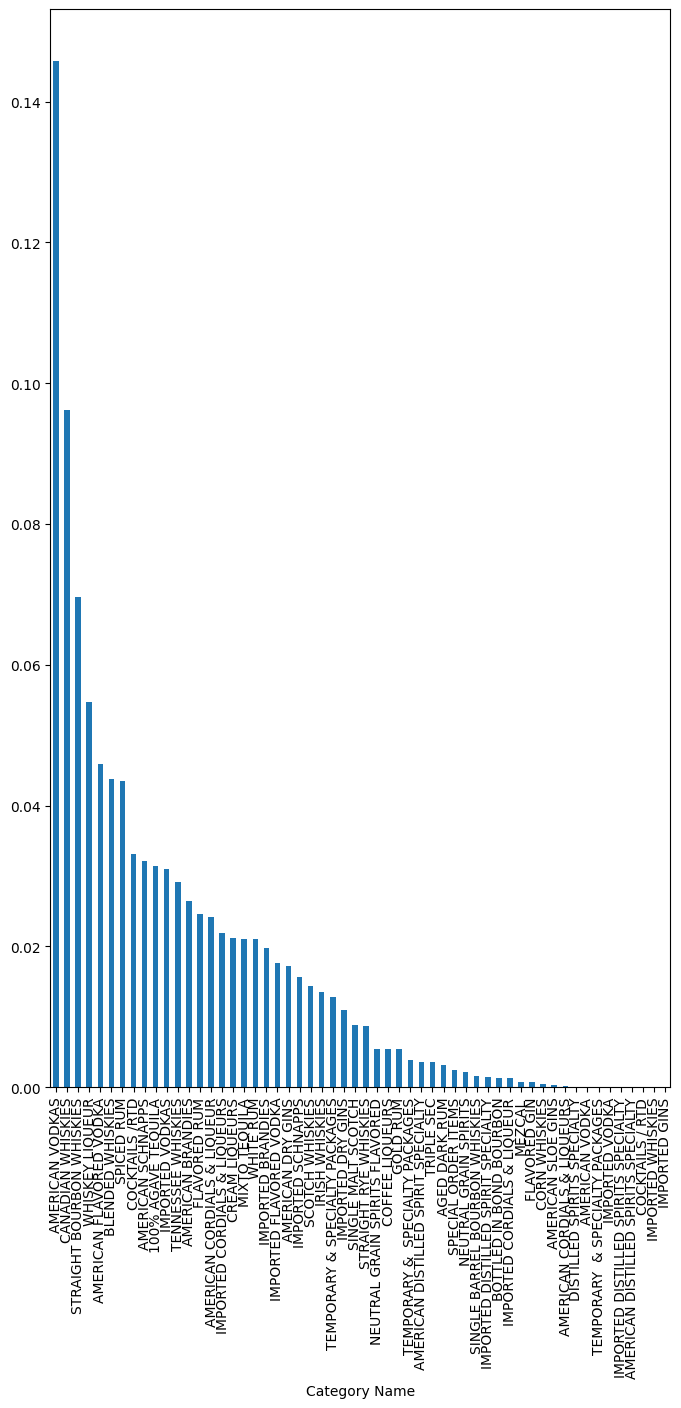

In [ ]:
# Pie chart
def plot_pienbar_cat(categorical: pd.DataFrame,title):
    fig, axs = plt.subplots(2)
    fig.set_size_inches(8,14)
    plt.title(title)
    categorical.frequency.plot(kind = 'bar',ax = axs[0])
    categorical.frequency.plot(kind = 'pie', ax = axs[1],autopct = '%.2f%%')

fig, axs = plt.subplots(1)
fig.set_size_inches(8,14)
category_s.relative_frequency.plot(kind = 'bar')

Interpretation: American Vodkas are the most demanded type of liquor as more than 14% of the orders belong to this category. Other popular liquors in Iowa are Canadian Whiskies, Straight Bourbon Whiskies and Whiskie liqueaur. Each one of these have been ordered more than one hundred thousand orders.

In contrast, other liquors such as AMERICAN DISTILLED SPIRITS SPECIALTY,
IMPORTED DISTILLED SPIRITS SPECIALTY, COCKTAILS / RTD, VODKA, GINS, and WHISKIES, IOWA DISTILLERIES, AMERICAN WHISKIES have been ordered less than 50 times each.


##### 1.1.1.2 City

In [ ]:
city_s = freq_dist_table('City')
city_s.shape

(442, 2)

There are 448 unique values for the category "city". Now let's see the most frequent cities that where liquors are ordered

In [ ]:
city_s.head(25)

frequency  relative_frequency
City                                          
DES MOINES          161537            0.080870
CEDAR RAPIDS        124582            0.062370
DAVENPORT            81936            0.041020
WEST DES MOINES      62333            0.031206
SIOUX CITY           61542            0.030810
WATERLOO             59131            0.029603
COUNCIL BLUFFS       57508            0.028790
AMES                 49142            0.024602
DUBUQUE              48571            0.024316
IOWA CITY            48155            0.024108
CEDAR FALLS          44694            0.022375
ANKENY               44463            0.022260
CORALVILLE           29974            0.015006
MASON CITY           26786            0.013410
URBANDALE            25697            0.012865
MUSCATINE            24778            0.012405
BURLINGTON           23089            0.011559
FORT DODGE           22869            0.011449
BETTENDORF           21491            0.010759
OTTUMWA              20917            0.010472
MARION               20391            0.010208
MARSHALLTOWN         20073            0.010049
CLINTON              19049            0.009537
ALTOONA              17756            0.008889
WINDSOR HEIGHTS      17397            0.008709

And the cities that order less liquor

In [ ]:
city_s.tail()

frequency  relative_frequency
City                                  
CASEY           36            0.000018
EARLING         28            0.000014
MALCOM          20            0.000010
MILO            18            0.000009
BOYDEN           3            0.000002

<Axes: xlabel='City'>

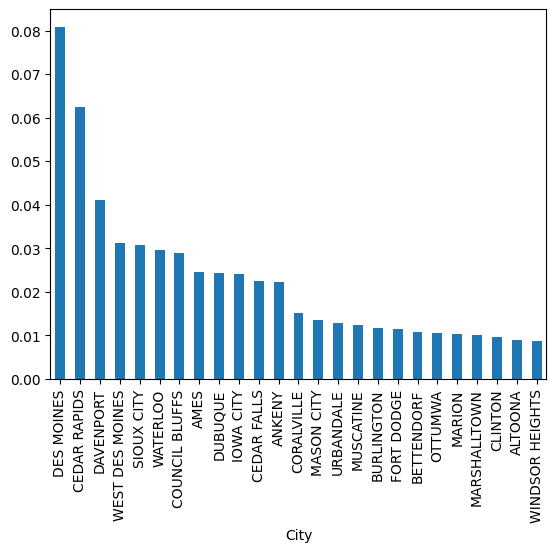

In [ ]:
city_s.iloc[0:25].relative_frequency.plot(kind = 'bar')

The city where people buy more liquor is Des Moines with 158672 orders. It means roughly the 8% of the total orders in Iowa. Other cities that order more than 3% of the liquor ara Cedar Rapids, Davenport, and West des Moines. Only twelve cities (out of 448) share more than 2% of the liquor order market.

Cities as Birmingham, Bonaparte and Denmark, ordered less than 10 units

##### 1.1.1.3 County

In [ ]:
county_s = freq_dist_table('County')
county_s.shape

(99, 2)

In [ ]:
county_s.head(25)

frequency  relative_frequency
County                                   
POLK           376628            0.188551
LINN           164116            0.082161
SCOTT          116434            0.058290
BLACK HAWK     113913            0.057028
JOHNSON         95835            0.047978
WOODBURY        67005            0.033545
POTTAWATTA      64650            0.032366
STORY           58951            0.029513
DUBUQUE         55304            0.027687
CERRO GORD      39291            0.019670
DES MOINES      30623            0.015331
DALLAS          30507            0.015273
MUSCATINE       28498            0.014267
CLINTON         27964            0.014000
DICKINSON       24847            0.012439
MARSHALL        23368            0.011699
WEBSTER         22859            0.011444
LEE             22286            0.011157
WAPELLO         21599            0.010813
WARREN          19958            0.009992
MARION          18552            0.009288
JASPER          15964            0.007992
POWESHIEK       15674            0.007847
CARROLL         14896            0.007457
BOONE           14892            0.007455

In [ ]:
county_s.tail(5)

frequency  relative_frequency
County                                 
DECATUR        1732            0.000867
WAYNE          1542            0.000772
DAVIS          1416            0.000709
RINGGOLD       1186            0.000594
FREMONT         591            0.000296

<Axes: xlabel='County'>

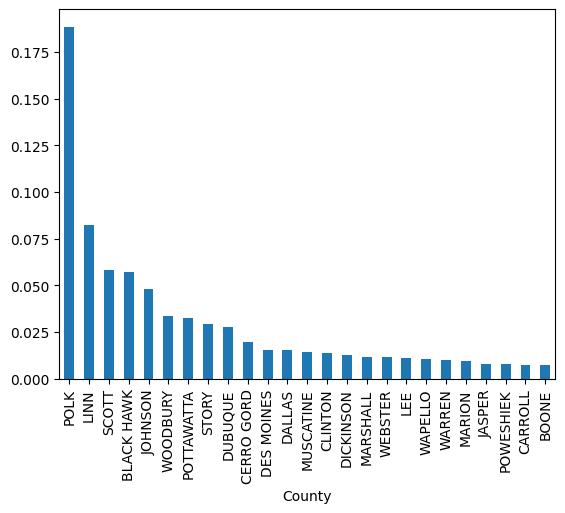

In [ ]:
county_s.iloc[0:25].relative_frequency.plot(kind = 'bar')

Counties of Polk, Linn, and Scorr are the counties where people order more liquor. Polk county shares more than 18% of the liquor ordering market in Iowa. LINN, SCOTT, BLACK HAWK, and JOHNSON	counties reported more than 95.000 orders in the period annalyzed

In [ ]:
print(cat_cols)

['Invoice/Item Number', 'Address', 'Store Name', 'Store Location', 'Category Name', 'City', 'Vendor Name', 'Item Description', 'County', 'Date']


##### 1.1.1.4 Vendor

Let's now annalyze the top liquor distributors in the state

In [ ]:
vendor_s = freq_dist_table('Vendor Name')
vendor_s.shape

(227, 2)

In [ ]:
vendor_s.head(25)

frequency  \
Vendor Name                                                     
DIAGEO AMERICAS                                        311119   
SAZERAC COMPANY  INC                                   201356   
JIM BEAM BRANDS                                        170094   
HEAVEN HILL BRANDS                                     155182   
LUXCO INC                                              142724   
PERNOD RICARD USA                                      115343   
PROXIMO                                                 88483   
BACARDI USA INC                                         87747   
SAZERAC NORTH AMERICA                                   86468   
E & J GALLO WINERY                                      69968   
BROWN FORMAN CORP.                                      69537   
PHILLIPS BEVERAGE                                       49387   
FIFTH GENERATION INC                                    48453   
MCCORMICK DISTILLING CO.                                44372   
LAIRD & COMPANY                                         37484   
MOET HENNESSY USA                                       31971   
CAMPARI AMERICA                                         22919   
INFINIUM SPIRITS                                        22065   
CONSTELLATION BRANDS INC                                21587   
MAST-JAGERMEISTER US, INC                               19001   
WILLIAM GRANT & SONS INC                                18578   
MHW LTD                                                 18314   
JDSO INC / RED BOOT DISTILLERY                          16841   
PRESTIGE WINE & SPIRITS GROUP                           13344   
PRESTIGE WINE & SPIRITS GROUP / UNITED STATES D...      12405   

                                                    relative_frequency  
Vendor Name                                                             
DIAGEO AMERICAS                                               0.155560  
SAZERAC COMPANY  INC                                          0.100678  
JIM BEAM BRANDS                                               0.085047  
HEAVEN HILL BRANDS                                            0.077591  
LUXCO INC                                                     0.071362  
PERNOD RICARD USA                                             0.057672  
PROXIMO                                                       0.044242  
BACARDI USA INC                                               0.043874  
SAZERAC NORTH AMERICA                                         0.043234  
E & J GALLO WINERY                                            0.034984  
BROWN FORMAN CORP.                                            0.034769  
PHILLIPS BEVERAGE                                             0.024694  
FIFTH GENERATION INC                                          0.024227  
MCCORMICK DISTILLING CO.                                      0.022186  
LAIRD & COMPANY                                               0.018742  
MOET HENNESSY USA                                             0.015986  
CAMPARI AMERICA                                               0.011460  
INFINIUM SPIRITS                                              0.011033  
CONSTELLATION BRANDS INC                                      0.010794  
MAST-JAGERMEISTER US, INC                                     0.009501  
WILLIAM GRANT & SONS INC                                      0.009289  
MHW LTD                                                       0.009157  
JDSO INC / RED BOOT DISTILLERY                                0.008421  
PRESTIGE WINE & SPIRITS GROUP                                 0.006672  
PRESTIGE WINE & SPIRITS GROUP / UNITED STATES D...            0.006203

In [ ]:
vendor_s.tail()

frequency  relative_frequency
Vendor Name                                                          
MILE HIGH SPIRITS LLC                           1        5.000010e-07
COPPER & KINGS AMERICAN BRANDY COMPANY          1        5.000010e-07
CHARBAY DISTILLERS LLC                          1        5.000010e-07
GRAND TETON DISTILLERY                          1        5.000010e-07
SHAND IMPORT LLC                                1        5.000010e-07

<Axes: xlabel='Vendor Name'>

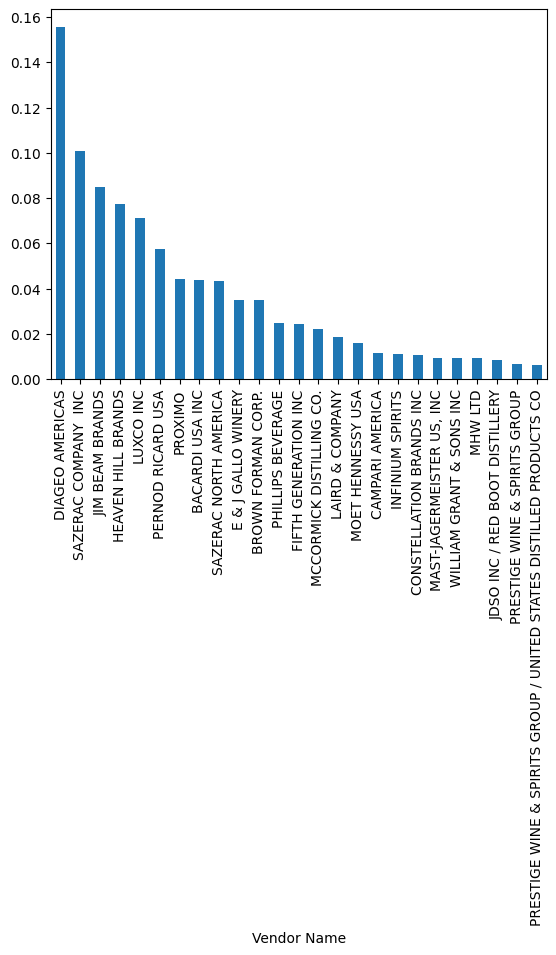

In [ ]:
vendor_s.iloc[0:25].relative_frequency.plot(kind = 'bar')

Diageo is the top distributor in Iowa according to the dataset. They distributed near to 16% of the orders which means above 300,000 orders in the dataset. The other two bigger distributors are Sazerac Company and Jim Beam Brands. The other distributors share each less than 8%

##### 1.1.1.5 Store

In [ ]:
store_s = freq_dist_table('Store Name')
store_s.shape

(1986, 2)

In [ ]:
store_s.head(25)

frequency  relative_frequency
Store Name                                                           
HY-VEE #3 / BDI / DES MOINES                13053            0.006527
CENTRAL CITY 2                              12965            0.006483
CENTRAL CITY LIQUOR, INC.                   12737            0.006369
HY-VEE FOOD STORE / CEDAR FALLS             11927            0.005964
HY-VEE #7 / CEDAR RAPIDS                    10470            0.005235
HY-VEE FOOD STORE #2 / STATE ANKENY         10283            0.005142
HAPPY'S WINE & SPIRITS                       9749            0.004875
HY-VEE WINE AND SPIRITS / BETTENDORF         9557            0.004778
BENZ DISTRIBUTING                            9479            0.004739
HY-VEE #4 / WDM                              9317            0.004659
HY-VEE FOOD STORE / CORALVILLE               9140            0.004570
HY-VEE FOOD STORE #2 / COUNCIL BLUFFS        8859            0.004430
HY-VEE FOOD STORE #3 / SIOUX CITY            8811            0.004405
HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT       8762            0.004381
HY-VEE WINE AND SPIRITS / WDM                8659            0.004330
HY-VEE FOOD AND DRUG #6 / CEDAR RAPIDS       8549            0.004274
CYCLONE LIQUORS                              8466            0.004233
HY-VEE FOOD STORE #1 / MASON CITY            8341            0.004170
HY-VEE #1044 / BURLINGTON                    8201            0.004100
HY-VEE / WAUKEE                              8113            0.004057
HY-VEE FOOD STORE #5 / CEDAR RAPIDS          8056            0.004028
HY-VEE FOOD STORE #3 / WATERLOO              8031            0.004015
HY-VEE WINE AND SPIRITS / ANKENY             7938            0.003969
HY-VEE FOOD STORE #1636 / SPENCER            7728            0.003864
HY-VEE FOOD STORE / MUSCATINE                7344            0.003672

In [ ]:
store_s.tail()

frequency  relative_frequency
Store Name                                                     
CASEY'S GENERAL STORE - #1762             1        5.000000e-07
STATION MART LIQUOR AND TOBACCO           1        5.000000e-07
HY-VEE #2 / ANKENY                        1        5.000000e-07
BOTTLE BOUTIQUE                           1        5.000000e-07
YESWAY STORE # 10016/ FORT DODGE          1        5.000000e-07

<Axes: xlabel='Store Name'>

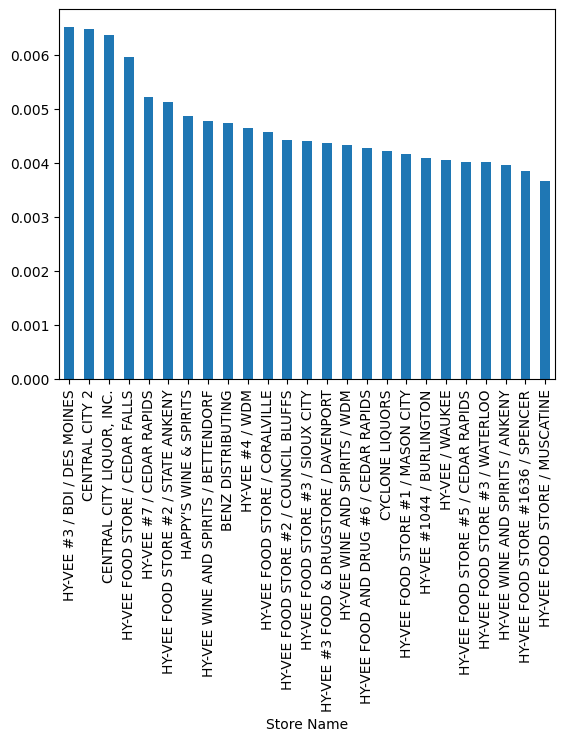

In [ ]:
store_s.iloc[0:25].relative_frequency.plot(kind = 'bar')

In [ ]:
print(cat_cols)

['Invoice/Item Number', 'Address', 'Store Name', 'Store Location', 'Category Name', 'City', 'Vendor Name', 'Item Description', 'County', 'Date']


Jut three stores share more than 6% of the distribution of liquor in Iowa. HY-VEE//DES MOINES, CENTRAL CITY 2 and CENTRAL CITY LIQUOR INC. tHE DISTRIBUTION OF THE OTHER TOP 25 STORES IS SOMEHOW EQUALLY DISTRIBUTED. THEESE STORES SHARE BETWEEN 4 AND 6% EACH.

##### 1.1.1.6 Dates

In [ ]:
#It makes no sense to analyze the date per day. It would be better to analyze it per month
chunk['date_'] = pd.to_datetime(chunk['Date'])
#The below line of code has been taken from https://sparkbyexamples.com/pandas/pandas-extract-month-and-year-separately-from-datetime-column/#:~:text=Pandas%20Extract%20Month%20and%20Year%20using%20Datetime.&text=strftime()%20method%20takes%20datetime,respectively%20from%20the%20pandas%20DataFrame.
chunk['Month_Year'] = chunk['date_'].dt.to_period('M')
#creating the frequency table for date
date_s = freq_dist_table('Month_Year')
date_s.size

72

In [ ]:
date_s.head(54)

frequency  relative_frequency
Month_Year                               
2020-12        253679        1.268395e-01
2020-06        242065        1.210325e-01
2021-03        229625        1.148125e-01
2020-09        220755        1.103775e-01
2020-10        217079        1.085395e-01
2021-07        211440        1.057200e-01
2021-01        196339        9.816950e-02
2021-04        195707        9.785350e-02
2021-02        189887        9.494350e-02
2020-08         22419        1.120950e-02
2021-10         17341        8.670500e-03
2016-11           455        2.275000e-04
2016-12           446        2.230000e-04
2016-10           423        2.115000e-04
2017-01           370        1.850000e-04
2017-05           358        1.790000e-04
2017-02           338        1.690000e-04
2017-03           324        1.620000e-04
2017-04           296        1.480000e-04
2017-06           291        1.455000e-04
2018-08           157        7.850000e-05
2019-02           130        6.500000e-05
2019-01            30        1.500000e-05
2021-08            19        9.500000e-06
2017-10            12        6.000000e-06
2016-09             2        1.000000e-06
2018-03             2        1.000000e-06
2017-11             2        1.000000e-06
2017-09             2        1.000000e-06
2018-07             1        5.000000e-07
2018-06             1        5.000000e-07
2018-02             1        5.000000e-07
2017-12             1        5.000000e-07
2017-08             1        5.000000e-07
2017-07             1        5.000000e-07
2018-04             1        5.000000e-07

<Axes: xlabel='Month_Year'>

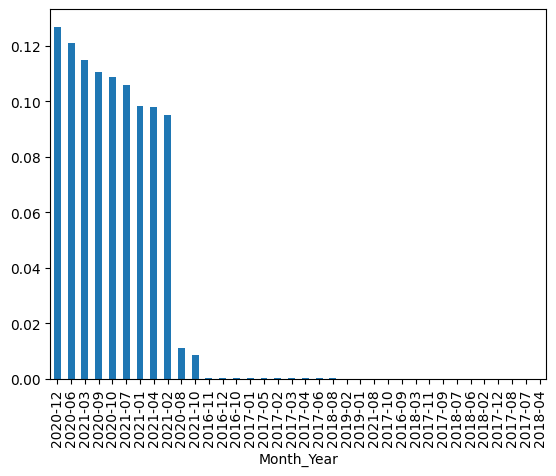

In [ ]:
date_s.relative_frequency.plot(kind = 'bar')

The data annalyzed in this report corresponds to a period of 11 months. December 2020 was the month were more liquor orders were made. 9 of those 11 mnths shares between 10 and 12% of the liquor orders

#### 1.1.2 One quantitative variable

In [ ]:
print(quan_cols)

['Volume Sold (Gallons)', 'Volume Sold (Liters)', 'Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail', 'State Bottle Cost', 'Pack']


##### 1.1.2.1 Volume Sold (Liters)

In [ ]:
def measures_center_spread(quant):
  print("MEASURES OF THE CENTER\n")
  print('mean: ',chunk[quant].mean())
  print('median: ', chunk[quant].median())
  print('mode: ', chunk[quant].mode())
  print('\nMEASURES OF THE SPREAD')
  print('standard deviation: ', chunk[quant].std())
  print('range: ', chunk[quant].max() - chunk[quant].min())
  IQR = chunk[quant].quantile(0.75)-chunk[quant].quantile(0.25)
  print('IQR: ', IQR)
  outliers = chunk[quant][(chunk[quant]< chunk[quant].quantile(0.25)-1.5*IQR)|(chunk[quant]>chunk[quant].quantile(0.75)+1.5*IQR)]
  print('amount of outliers: ', outliers.shape)


In [ ]:

  #Calculating the measures of the center and spread for Volume Sold (Liters)
  measures_center_spread('Volume Sold (Liters)')

MEASURES OF THE CENTER

mean:  9.411537370000001
median:  4.8
mode:  0    9.0
Name: Volume Sold (Liters), dtype: float64

MEASURES OF THE SPREAD
standard deviation:  45.20997250229091
range:  13199.98
IQR:  9.0
amount of outliers:  (75770,)


Text(0.5, 1.0, 'Volume Sold (Liters) BOXPLOT')

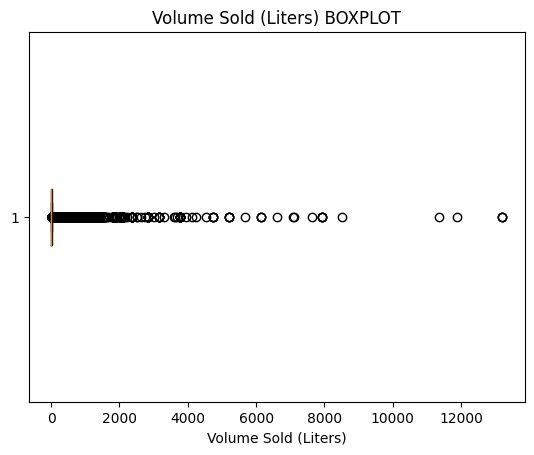

In [ ]:
#boxplot
plt.boxplot(chunk['Volume Sold (Liters)'],vert = False)
plt.xlabel('Volume Sold (Liters)')
plt.title('Volume Sold (Liters) BOXPLOT')

Text(0, 0.5, 'Density')

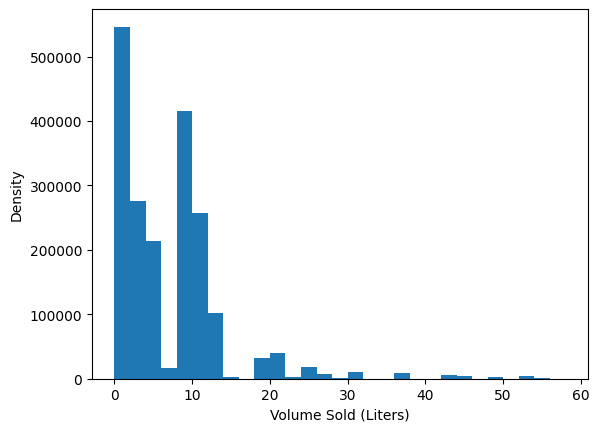

In [ ]:
bins_volume = [0 + 2*i for i in range(0,30)]
plt.hist(chunk['Volume Sold (Liters)'], bins = bins_volume)
plt.xlabel('Volume Sold (Liters)')
plt.ylabel('Density')

The volume sold in liters per order seems to be multimodal according to the histogram, with centers in 1 and 11.According to the boxplot, the distribution is skewed right with more than 75.000 outliers. 50% of the data is distributed in a range of 9 liters. The max value of liters in one single order was superior to 12.000 liters

##### 1.1.2.2 Sale (Dollars)

In [ ]:
measures_center_spread('Sale (Dollars)')

MEASURES OF THE CENTER

mean:  159.38157103000012
median:  85.44
mode:  0    90.0
Name: Sale (Dollars), dtype: float64

MEASURES OF THE SPREAD
standard deviation:  671.0227585053665
range:  250932.0
IQR:  122.31
amount of outliers:  (122892,)


Text(0.5, 1.0, 'Sale (Dollars) BOXPLOT')

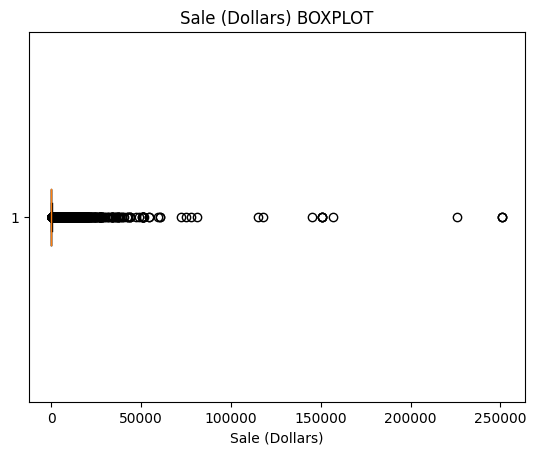

In [ ]:
#boxplot
plt.boxplot(chunk['Sale (Dollars)'],vert = False)
plt.xlabel('Sale (Dollars)')
plt.title('Sale (Dollars) BOXPLOT')

Text(0.5, 0, 'Sale (Dollars)')

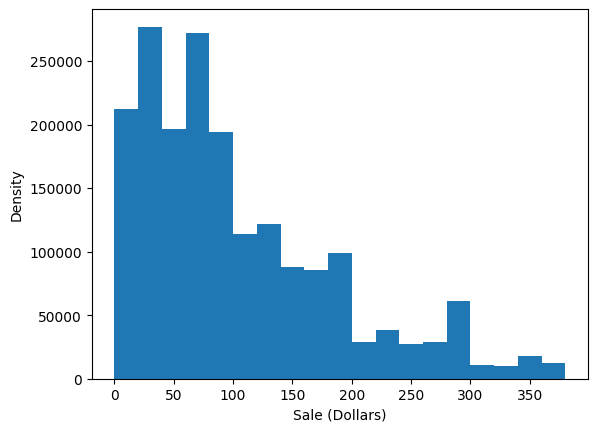

In [ ]:
bins_sales_t = [0 + 20* i for i in range(0,20)]
plt.hist(chunk['Sale (Dollars)'], bins = bins_sales_t)
plt.ylabel('Density')
plt.xlabel('Sale (Dollars)')

The sale in dollars per order is a skewed right distribution centered in 85 dollars. half of the orders were sold in a range of 122 dollars. More than 122.000 are outliers. The max value of a single order was of 25.000 dollars

##### 1.1.2.3 Bottles Sold

In [ ]:
measures_center_spread('Bottles Sold')

MEASURES OF THE CENTER

mean:  11.7585625
median:  6.0
mode:  0    12
Name: Bottles Sold, dtype: int64

MEASURES OF THE SPREAD
standard deviation:  39.487449411970445
range:  13199
IQR:  9.0
amount of outliers:  (108723,)


Text(0.5, 1.0, 'Bottles Sold BOXPLOT')

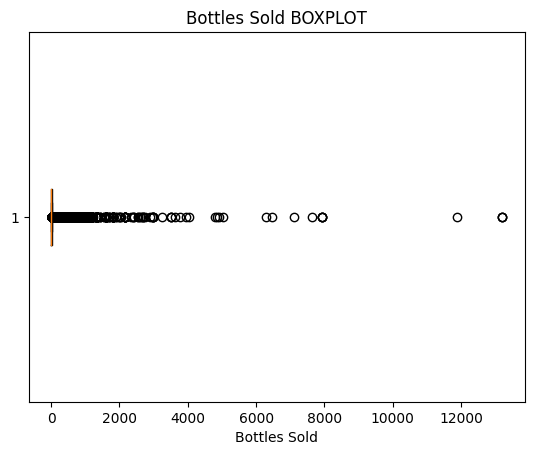

In [ ]:
#boxplot
plt.boxplot(chunk['Bottles Sold'],vert = False)
plt.xlabel('Bottles Sold')
plt.title('Bottles Sold BOXPLOT')

Text(0, 0.5, 'density')

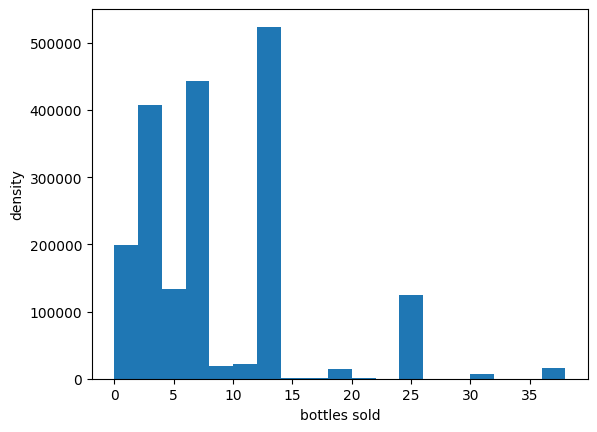

In [ ]:
bins_bottles = [0 + 2*i for i in range(0,20)]
plt.hist(chunk['Bottles Sold'], bins = bins_bottles)
plt.xlabel('bottles sold')
plt.ylabel('density')

The bottle sold per order seems to be double peaked, or multimodal, according to the Histogram; with one center in 12 and one center in 1. Is right skewed and roughly 108.00 orders are considered outliers. The range is 13.199.

##### 1.1.2.4 State Bottle Retail

In [ ]:
measures_center_spread('State Bottle Retail')

MEASURES OF THE CENTER

mean:  16.624764970000005
median:  13.13
mode:  0    11.25
Name: State Bottle Retail, dtype: float64

MEASURES OF THE SPREAD
standard deviation:  15.121852279696727
range:  3147.91
IQR:  11.25
amount of outliers:  (127094,)


Text(0.5, 1.0, 'State Bottle Retail BOXPLOT')

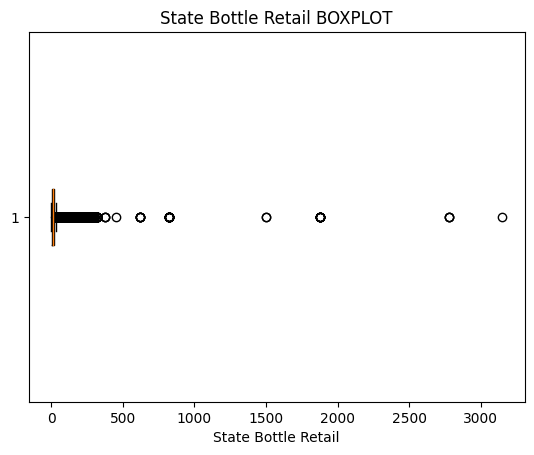

In [ ]:
#boxplot
plt.boxplot(chunk['State Bottle Retail'],vert = False)
plt.xlabel('State Bottle Retail')
plt.title('State Bottle Retail BOXPLOT')

Text(0, 0.5, 'density')

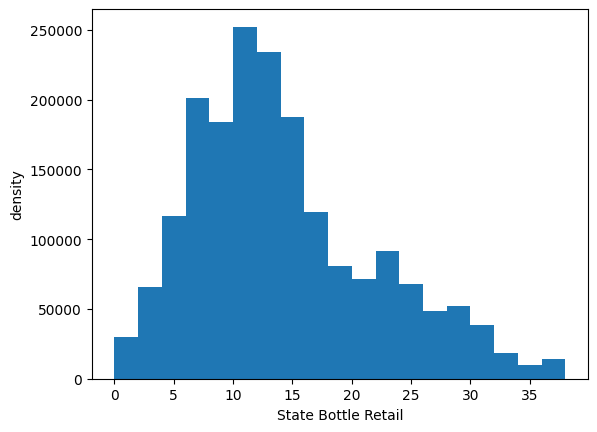

In [ ]:
bins_state_bottles = [0 + 2*i for i in range(0,20)]
plt.hist(chunk['State Bottle Retail'], bins = bins_state_bottles)
plt.xlabel('State Bottle Retail')
plt.ylabel('density')

The state bottle retail is a right skewed distribution with center in 13. It is a unimodal distribution. IQR is equal to 11.25. There are roughly 127.000 outliers

##### 1.1.2.5 State Bottle Cost

In [ ]:
measures_center_spread('State Bottle Cost')

MEASURES OF THE CENTER

mean:  11.081635215
median:  8.75
mode:  0    7.5
Name: State Bottle Cost, dtype: float64

MEASURES OF THE SPREAD
standard deviation:  10.082801845328927
range:  2098.61
IQR:  7.5
amount of outliers:  (127107,)


Text(0.5, 1.0, 'State Bottle Cost BOXPLOT')

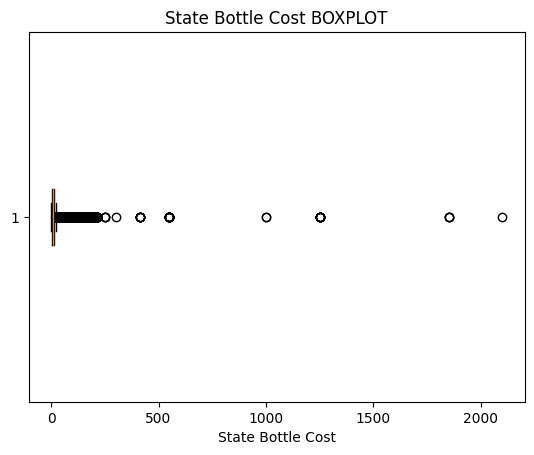

In [ ]:
#boxplot
plt.boxplot(chunk['State Bottle Cost'],vert = False)
plt.xlabel('State Bottle Cost')
plt.title('State Bottle Cost BOXPLOT')

Text(0, 0.5, 'density')

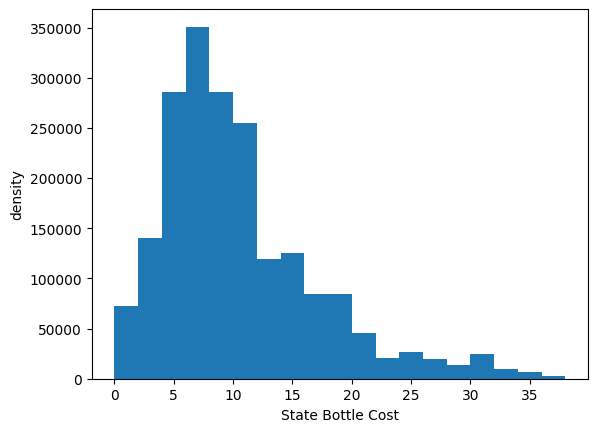

In [ ]:
bins_st_bottle_cost = [0 + 2*i for i in range(0,20)]
plt.hist(chunk['State Bottle Cost'], bins = bins_st_bottle_cost)
plt.xlabel('State Bottle Cost')
plt.ylabel('density')

State bottle cost is a unimoda distribution centered bwtween 6 and 7. It is a right skewed distribution with a range of 2098 and above 127,000 outliers

##### 1.1.2.6 Pack

In [ ]:
measures_center_spread('Pack')

MEASURES OF THE CENTER

mean:  12.0640835
median:  12.0
mode:  0    12
Name: Pack, dtype: int64

MEASURES OF THE SPREAD
standard deviation:  7.9872470040111505
range:  119
IQR:  6.0
amount of outliers:  (239172,)


Text(0.5, 1.0, 'Pack BOXPLOT')

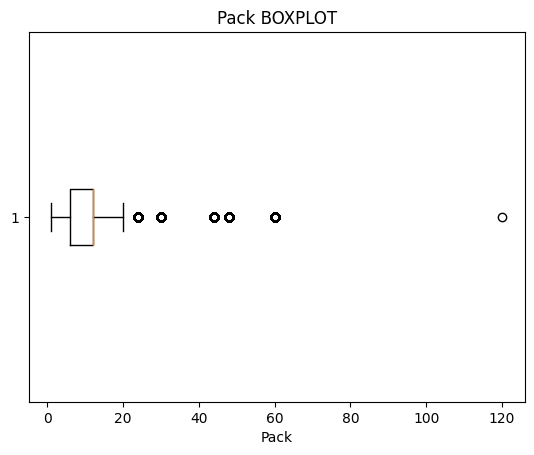

In [ ]:
#boxplot
plt.boxplot(chunk['Pack'],vert = False)
plt.xlabel('Pack')
plt.title('Pack BOXPLOT')

(array([2.060600e+04, 1.523600e+04, 6.235650e+05, 4.950600e+04,
        1.051466e+06, 2.890000e+02, 1.600000e+02, 0.000000e+00,
        1.798010e+05, 0.000000e+00, 2.450000e+02, 0.000000e+00,
        0.000000e+00, 0.000000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
        39., 42.]),
 <BarContainer object of 14 artists>)

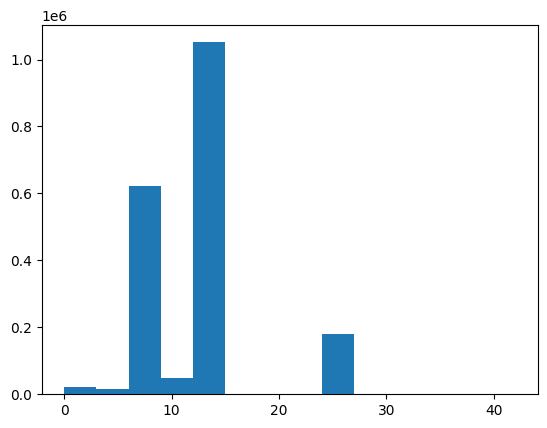

In [ ]:
bins_pack = [0 + i*3 for i in range(0,15)]
plt.hist(chunk['Pack'],histtype='bar',bins = bins_pack)

Pack distribution seems to be unimodal right skewed distribution. Thi distribution has more than 200,000 outliers. But, the IQR is only of 6 while the max pack value is 120

### 1.2 Examining Relationships: Explanatory and response

#### 1.2.1 Categorical -> Quantitative

In this section, in the boxplot graphs I will not show outliers to allow good comprehension of the majority of the data. Besides, I will annalyze only the values of each category more relevants according to section 1.1 results

##### 1.2.1.1 Category name -> (Sold (liters), Sale (Dollars), bottles sold, state bottle retail, state bttle cost, pack)

###### Category name - Volume Sold (Liters)

In [ ]:
chunk_df = chunk.copy()
def relation_cat_quant_descr(Categ, quant,cat_df,n):
  """
  This formula creates a descriptive statistics table of a quantitative variable that is compared with a categorical variable.
  Categ: Categorical variable (Explanatory)
  quant: quanttitative variabl(Response)
  cat_df: Pandas dataframe of the frequency distribution table of the categorical variable
  n: Top n variables of the categorical
  """
  category_relevant = cat_df.index[0:n]
  med = []
  for i in range(0,len(category_relevant)):
    if i == 0:
      ins_df_cat_sold = pd.DataFrame(chunk[(chunk[Categ] == category_relevant[i])][quant].describe())
      ins_df_cat_sold.columns = [category_relevant[i]]
      #appending the mean of the quantitative value to the list that will be added at the end of the table
      med.append(np.median(pd.DataFrame(chunk_df[(chunk_df[Categ] == category_relevant[i])][quant])))
    else:
      ins_df_cat_sold[category_relevant[i]] = list(chunk_df[(chunk_df[Categ] == category_relevant[i])][quant].describe())
      #appending the mean of the quantitative value to the list that will be added at the end of the table
      med.append(np.median(pd.DataFrame(chunk_df[(chunk_df[Categ] == category_relevant[i])][quant])))
  #Adding the mean of all values
  ins_df_cat_sold.loc['median'] = med

  return ins_df_cat_sold

ds_cat_volume = relation_cat_quant_descr('Category Name','Volume Sold (Liters)',category_s,10)
ds_cat_volume.head(10)

AMERICAN VODKAS  CANADIAN WHISKIES  STRAIGHT BOURBON WHISKIES  \
count     291684.000000      192358.000000              139285.000000   
mean          14.423725          12.439066                   7.301424   
std           88.057948          55.004491                  20.675764   
min            0.050000           0.050000                   0.050000   
25%            4.500000           2.250000                   1.500000   
50%            9.000000           9.000000                   4.500000   
75%           10.500000          10.500000                   9.000000   
max        13200.000000        4725.000000                2223.000000   
median         9.000000           9.000000                   4.500000   

        WHISKEY LIQUEUR  AMERICAN FLAVORED VODKA  BLENDED WHISKIES  \
count     109526.000000             91798.000000      87479.000000   
mean           8.120812                 6.022413          7.558762   
std           22.352029                 8.596452         12.064741   
min            0.050000                 0.050000          0.050000   
25%            0.750000                 1.500000          2.250000   
50%            4.800000                 3.000000          4.500000   
75%            9.600000                 9.000000         10.500000   
max         2520.000000               333.000000       1050.000000   
median         4.800000                 3.000000          4.500000   

          SPICED RUM  COCKTAILS /RTD  AMERICAN SCHNAPPS  100% AGAVE TEQUILA  
count   87092.000000    66187.000000       64169.000000        62781.000000  
mean       12.844796       13.717369           6.183826            6.556892  
std        41.504966       57.264931          12.105644           29.282147  
min         0.050000        0.020000           0.050000            0.050000  
25%         2.250000        5.250000           0.750000            1.500000  
50%         9.000000       10.500000           3.000000            4.500000  
75%        10.500000       10.500000           9.000000            6.000000  
max      2171.250000     6615.000000         660.000000         4116.000000  
median      9.000000       10.500000           3.000000            4.500000

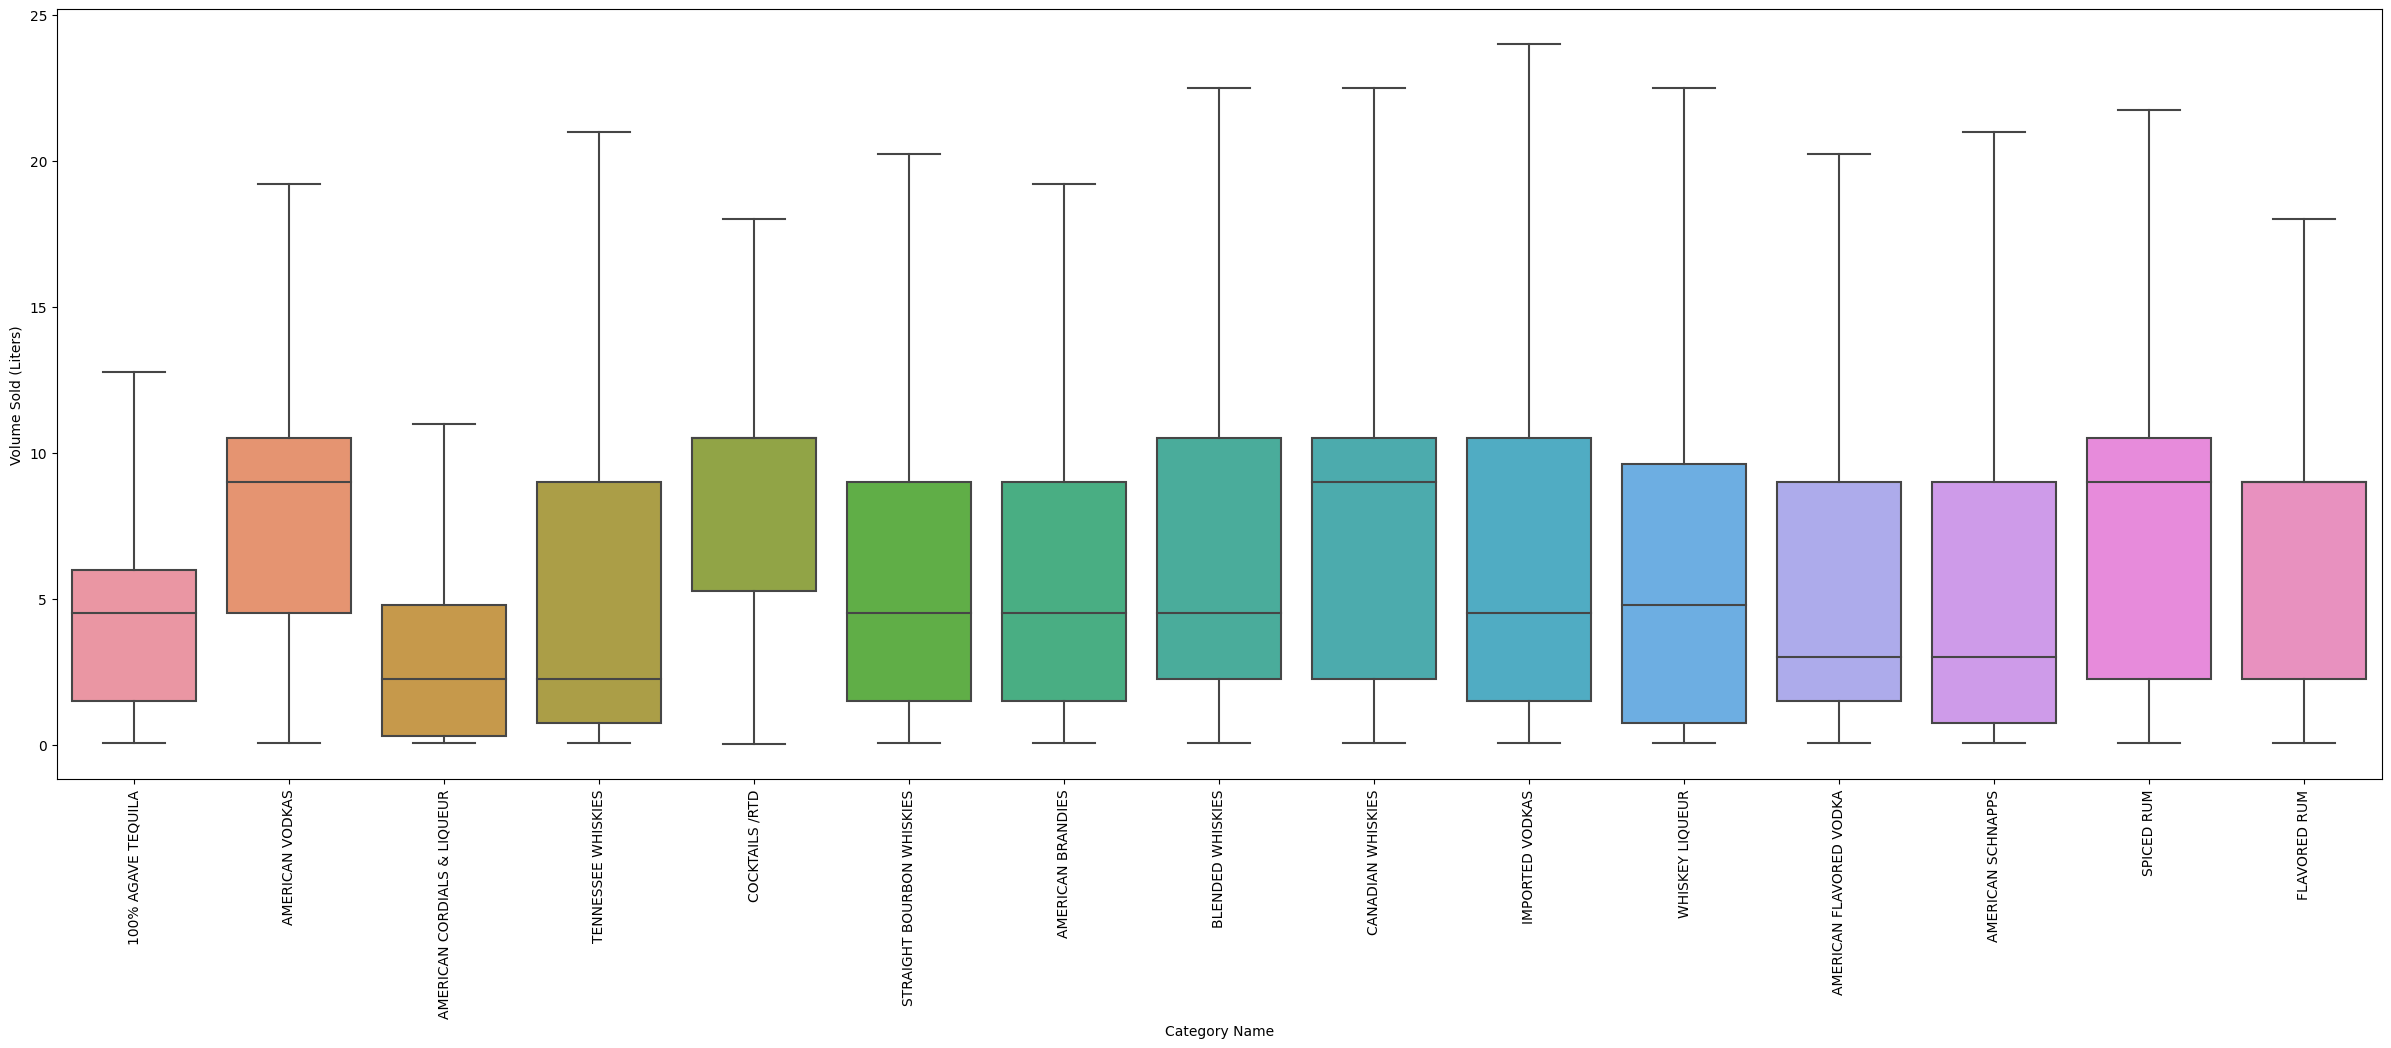

In [ ]:
def plot_box_cat_quan(categ,quant,n,df):
  """
  plot the quantitative boxplot of the first n values of a categorical variable
  categ = categorical variable
  quant = quantitative variable
  n = n most important values of the categorical variable
  df = dataframe of the frequency rable of the categ variable ordered by most frequent
  """
  a_df = chunk[chunk[categ].isin(list(df.index[0:n]))]
  fig , axs = plt.subplots(1)
  fig.set_size_inches(30,10)
  sns.boxplot(x = categ,y = quant, data = a_df, showfliers = False)
  plt.xticks(rotation=90)

plot_box_cat_quan('Category Name','Volume Sold (Liters)',15,category_s)

Agave Tequila, American Cordials and Liqueur, Tennessee whiskies, Straight burbon whiskies, american brandies and blendd whiskies are sold per order in less than 7 liters. While American Vodkas, Canadian Whiskies and Spiced Rums are sold in volumes above 7 liters per order (in average). Imported Vodkas seem to have a wider 95%  range with a max of roughly 25 liters in the distribution.

###### Category name ->  Sale (Dollars)

In [ ]:
print(cat_cols)
print(quan_cols)

['Store Name', 'Invoice/Item Number', 'Vendor Name', 'Date', 'Store Location', 'Address', 'Item Description', 'City', 'County', 'Category Name']
['Volume Sold (Gallons)', 'Volume Sold (Liters)', 'Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail', 'State Bottle Cost', 'Pack']


In [ ]:
ds_cat_volume = relation_cat_quant_descr('Category Name','Sale (Dollars)',category_s,10)
ds_cat_volume.head(10)


AMERICAN VODKAS  CANADIAN WHISKIES  STRAIGHT BOURBON WHISKIES  \
count     291684.000000      192358.000000              139285.000000   
mean         152.846381         191.734818                 182.588418   
std         1271.852324         753.622878                 636.933309   
min            1.340000           2.340000                   1.880000   
25%           59.400000          48.000000                  42.000000   
50%           67.260000          94.200000                  97.200000   
75%          132.000000         208.500000                 189.000000   
max       250932.000000      156807.000000               77805.000000   
median        67.260000          94.200000                  97.200000   

        WHISKEY LIQUEUR  AMERICAN FLAVORED VODKA  BLENDED WHISKIES  \
count     109526.000000             91798.000000      87479.000000   
mean         169.563737                87.878447        110.479227   
std          350.810733               118.122645        254.641311   
min            1.350000                 1.500000          1.880000   
25%           64.800000                24.760000         37.680000   
50%          138.000000                56.250000         72.000000   
75%          192.000000               135.000000        116.640000   
max        33120.000000              4995.000000      22620.000000   
median       138.000000                56.250000         72.000000   

          SPICED RUM  COCKTAILS /RTD  AMERICAN SCHNAPPS  100% AGAVE TEQUILA  
count   87092.000000    66187.000000       64169.000000        62781.000000  
mean      199.164394      102.513229          76.495142          242.947122  
std       648.608539      332.489263         134.170955          624.094067  
min         4.130000        2.370000           1.340000            0.000000  
25%        45.000000       49.500000          19.500000           60.300000  
50%       103.980000       78.660000          58.260000          129.150000  
75%       163.080000       90.360000          92.760000          261.000000  
max     39343.050000    34020.000000        7794.600000        40477.920000  
median    103.980000       78.660000          58.260000          129.150000

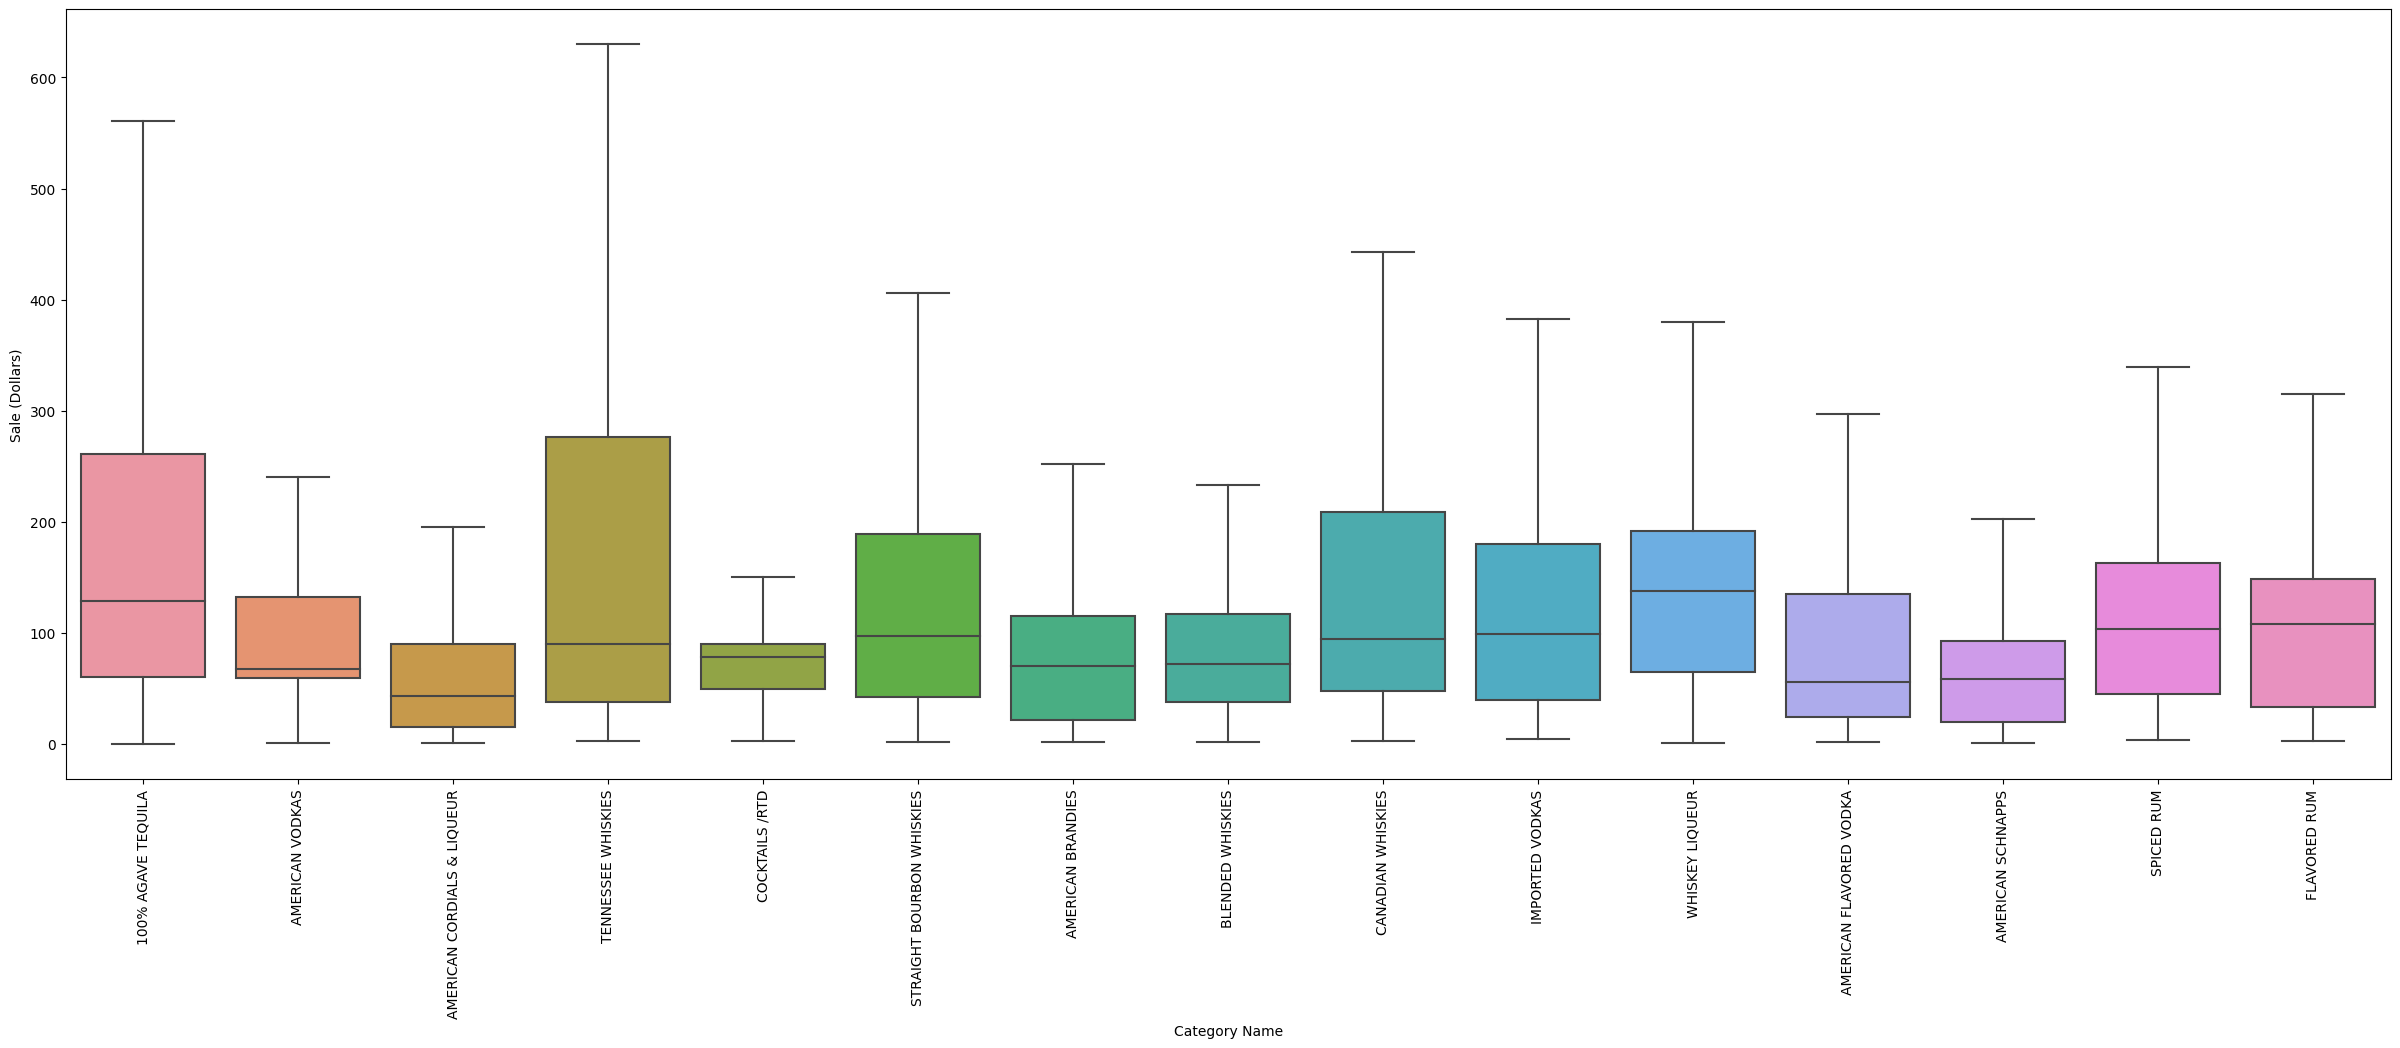

In [ ]:
plot_box_cat_quan('Category Name','Sale (Dollars)',15,category_s)


All average values of sale (dollars) per order are centered between 50 and 150. Tennessee whiskies have a wider range of sales per order as 50% of data is between 75 and 280 dollars; while, for example, cocktails/RTD have a IQR just above 50 dollars

###### Category name -> bottles sold

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Category Name','Bottles Sold',category_s,10)
ds_cat_volume.head(10)


AMERICAN VODKAS  CANADIAN WHISKIES  STRAIGHT BOURBON WHISKIES  \
count     291684.000000      192358.000000              139285.000000   
mean          15.555577          12.789595                   9.022960   
std           74.398954          38.383370                  23.687854   
min            1.000000           1.000000                   1.000000   
25%            6.000000           4.000000                   2.000000   
50%           12.000000           6.000000                   6.000000   
75%           12.000000          12.000000                  12.000000   
max        13200.000000        6300.000000                2964.000000   
median        12.000000           6.000000                   6.000000   

        WHISKEY LIQUEUR  AMERICAN FLAVORED VODKA  BLENDED WHISKIES  \
count     109526.000000             91798.000000      87479.000000   
mean          26.833592                 8.245005          8.800043   
std           54.581912                10.560384         12.559548   
min            1.000000                 1.000000          1.000000   
25%            4.000000                 2.000000          3.000000   
50%           12.000000                 6.000000          6.000000   
75%           24.000000                12.000000         12.000000   
max         1440.000000               444.000000        660.000000   
median        12.000000                 6.000000          6.000000   

          SPICED RUM  COCKTAILS /RTD  AMERICAN SCHNAPPS  100% AGAVE TEQUILA  
count   87092.000000    66187.000000       64169.000000        62781.000000  
mean       13.018831        9.614396           9.109851            8.868878  
std        32.277600       35.023373          14.800047           23.342089  
min         1.000000        1.000000           1.000000            1.000000  
25%         4.000000        6.000000           2.000000            2.000000  
50%         6.000000        6.000000           6.000000            6.000000  
75%        12.000000        6.000000          12.000000           12.000000  
max      2895.000000     3780.000000         660.000000         2352.000000  
median      6.000000        6.000000           6.000000            6.000000

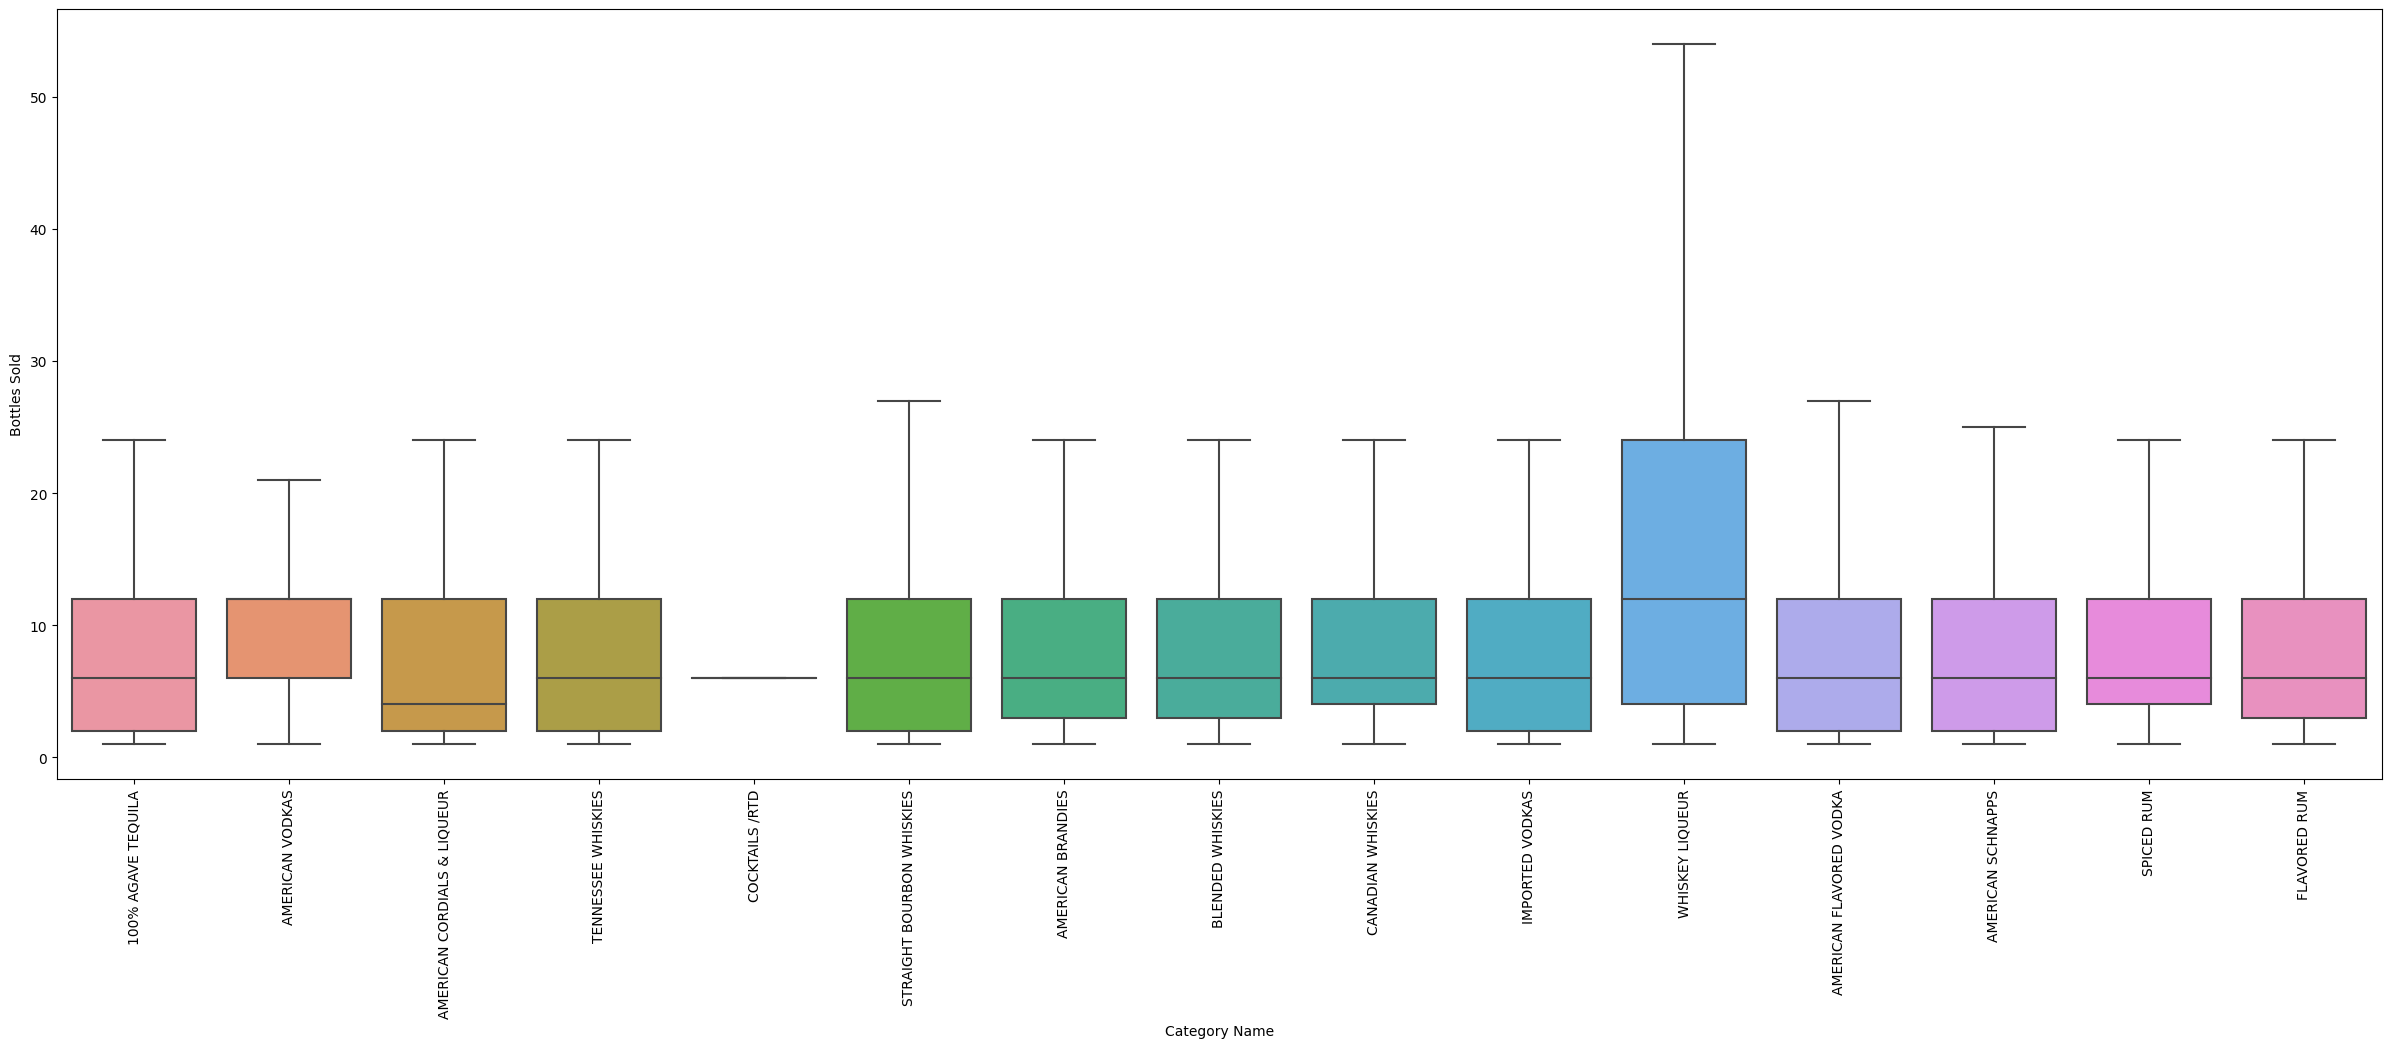

In [ ]:
plot_box_cat_quan('Category Name','Bottles Sold',15,category_s)


Bottles sold among categories seems to be a more equally distributed relation. Bottles sold average values per category are between 6 and 12 in the majority of the top categories of whiskies. Anyway, Whiskey Liqueur have a wider range or distribution with an IQR score of 20

###### Category name ->  state bottle retail

In [ ]:

ds_cat_volume = relation_cat_quant_descr('Category Name','State Bottle Retail',category_s,10)
ds_cat_volume.head(10)



AMERICAN VODKAS  CANADIAN WHISKIES  STRAIGHT BOURBON WHISKIES  \
count     291684.000000      192358.000000              139285.000000   
mean          10.265527          15.688925                  21.083490   
std            6.410513          10.230168                  21.109471   
min            1.340000           1.340000                   0.500000   
25%            5.060000           7.850000                  12.000000   
50%           10.380000          12.750000                  17.700000   
75%           12.380000          20.250000                  27.150000   
max           75.600000         142.500000                1875.000000   
median        10.380000          12.750000                  17.700000   

        WHISKEY LIQUEUR  AMERICAN FLAVORED VODKA  BLENDED WHISKIES  \
count     109526.000000             91798.000000      87479.000000   
mean          17.024619                10.946352         13.947774   
std           15.667546                 3.415240          9.031676   
min            1.350000                 1.500000          1.880000   
25%            7.500000                10.500000          8.250000   
50%           13.470000                11.250000         12.000000   
75%           23.000000                12.380000         17.850000   
max           90.000000                30.750000        207.000000   
median        13.470000                11.250000         12.000000   

          SPICED RUM  COCKTAILS /RTD  AMERICAN SCHNAPPS  100% AGAVE TEQUILA  
count   87092.000000    66187.000000       64169.000000        62781.000000  
mean       14.216704       11.584350           9.491340           29.795807  
std         6.716438        3.463674           6.223579           18.332746  
min         4.110000        2.250000           1.340000            2.250000  
25%         8.490000        9.000000           7.500000           20.250000  
50%        13.590000       13.110000           9.750000           23.190000  
75%        17.630000       13.110000          11.250000           41.250000  
max        54.990000       81.300000          90.000000          449.960000  
median     13.590000       13.110000           9.750000           23.190000

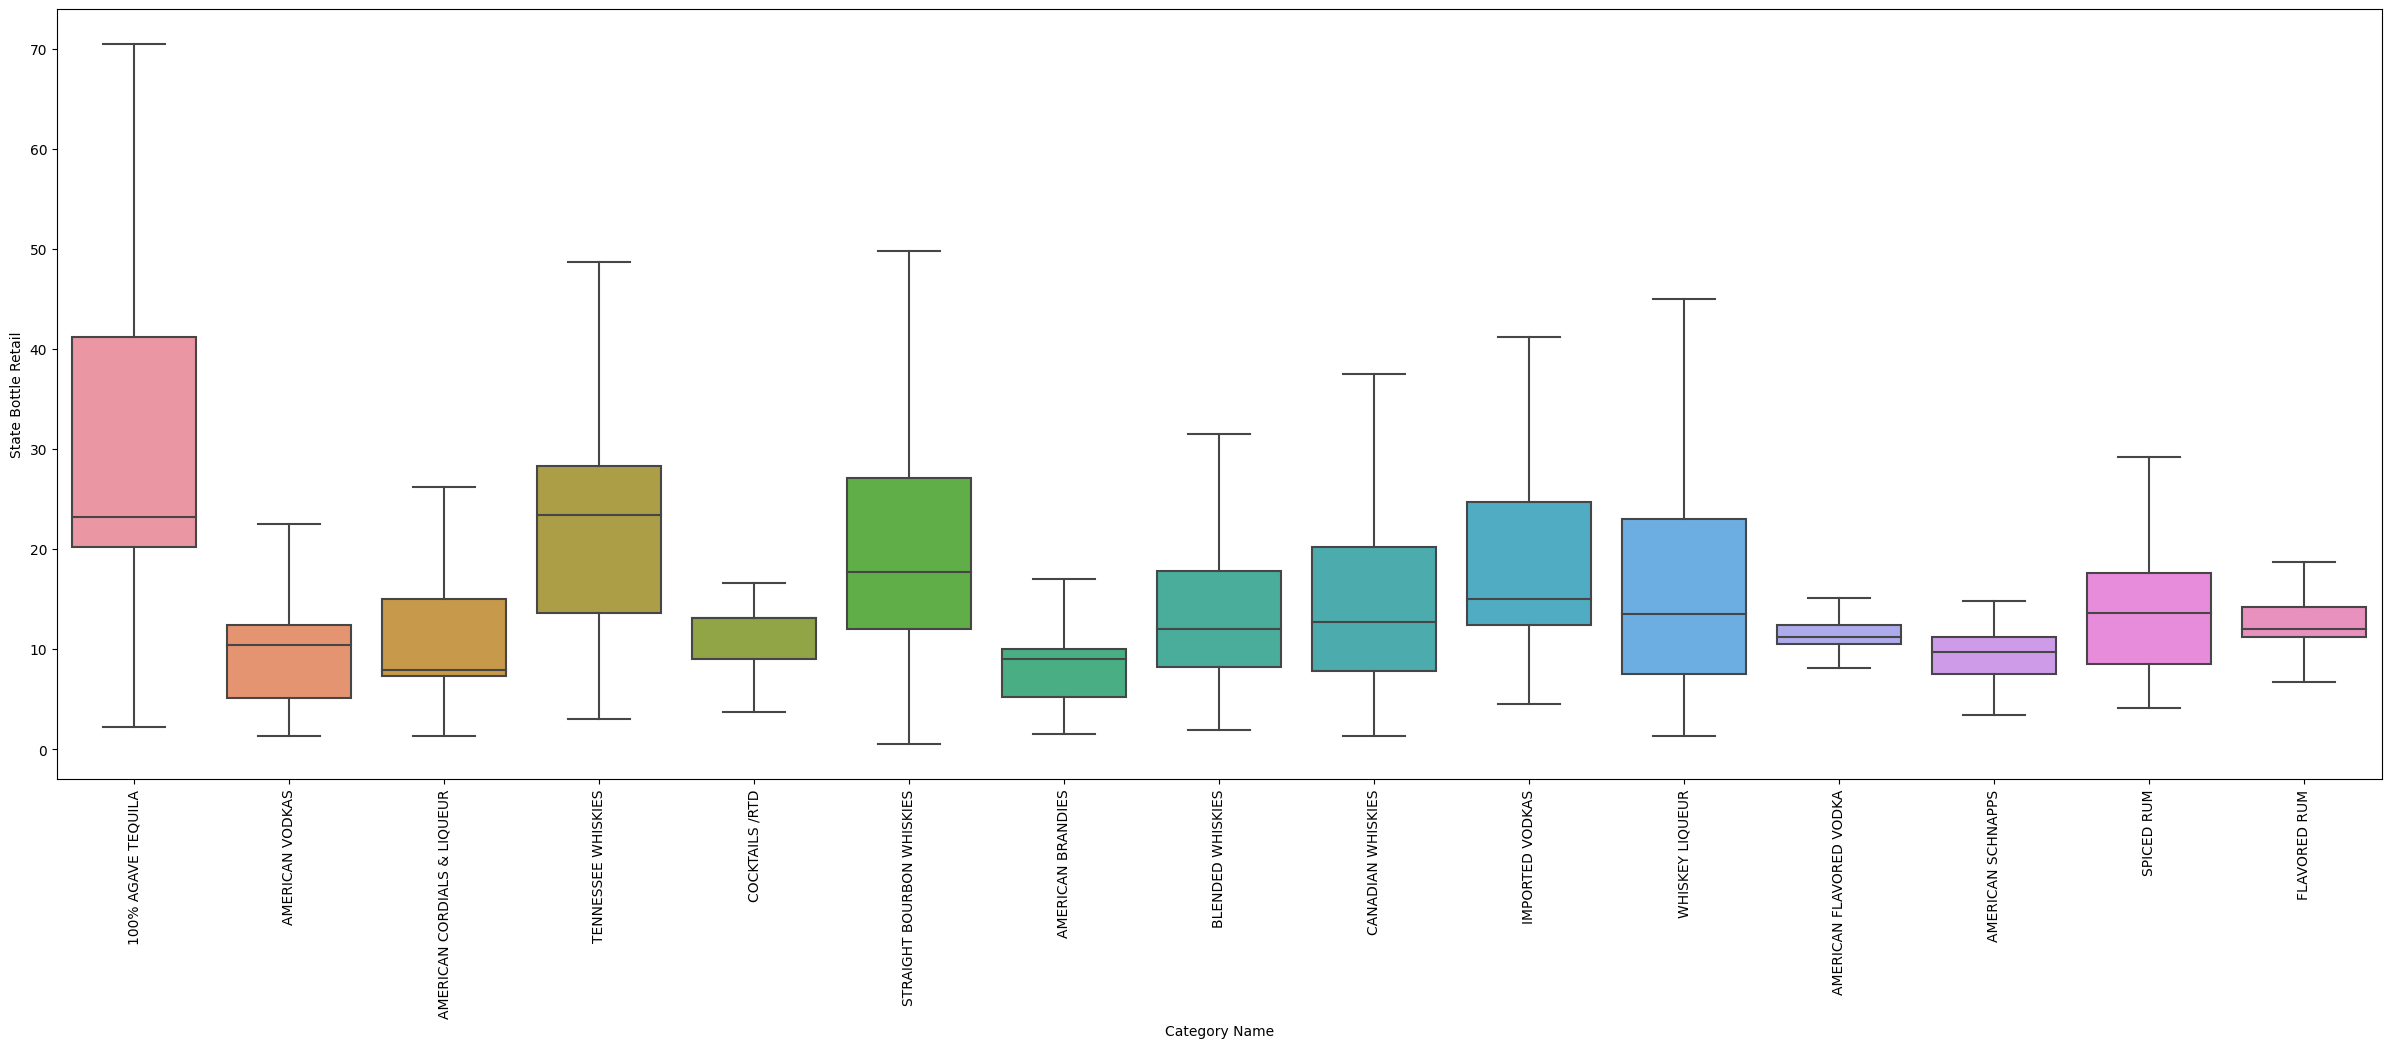

In [ ]:
plot_box_cat_quan('Category Name','State Bottle Retail',15,category_s)

100% agave Tequila jas the highest distribution of the 50% of the data. it is between 20 and 40 State Bottle Retail. Other categories such as flavored rum, american schnapps, American Flavored Vodka, American brandies,  Cocktails; have a shorter distribution of the 5% of the data.

The state bottle retail value per category is centered between 9 and 29

###### Category name -> state bttle cost

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Category Name','State Bottle Cost',category_s,10)
ds_cat_volume.head(10)



AMERICAN VODKAS  CANADIAN WHISKIES  STRAIGHT BOURBON WHISKIES  \
count     291684.000000      192358.000000              139285.000000   
mean           6.842199          10.464666                  14.055214   
std            4.273869           6.844777                  14.072823   
min            0.890000           0.890000                   0.330000   
25%            3.370000           5.230000                   8.000000   
50%            6.920000           8.500000                  11.800000   
75%            8.250000          13.500000                  18.100000   
max           50.400000          95.000000                1250.000000   
median         6.920000           8.500000                  11.800000   

        WHISKEY LIQUEUR  AMERICAN FLAVORED VODKA  BLENDED WHISKIES  \
count     109526.000000             91798.000000      87479.000000   
mean          11.348732                 7.296438          9.297832   
std           10.445176                 2.276578          6.021359   
min            0.900000                 1.000000          1.250000   
25%            5.000000                 7.000000          5.500000   
50%            8.980000                 7.500000          8.000000   
75%           15.330000                 8.250000         11.900000   
max           60.000000                20.500000        138.000000   
median         8.980000                 7.500000          8.000000   

          SPICED RUM  COCKTAILS /RTD  AMERICAN SCHNAPPS  100% AGAVE TEQUILA  
count   87092.000000    66187.000000        64169.00000        62781.000000  
mean        9.476548        7.722508            6.32664           19.861702  
std         4.477521        2.309284            4.14898           12.222229  
min         2.740000        1.500000            0.89000            1.500000  
25%         5.660000        6.000000            5.00000           13.500000  
50%         9.060000        8.740000            6.50000           15.460000  
75%        11.750000        8.740000            7.50000           27.500000  
max        36.660000       54.200000           60.00000          299.970000  
median      9.060000        8.740000            6.50000           15.460000

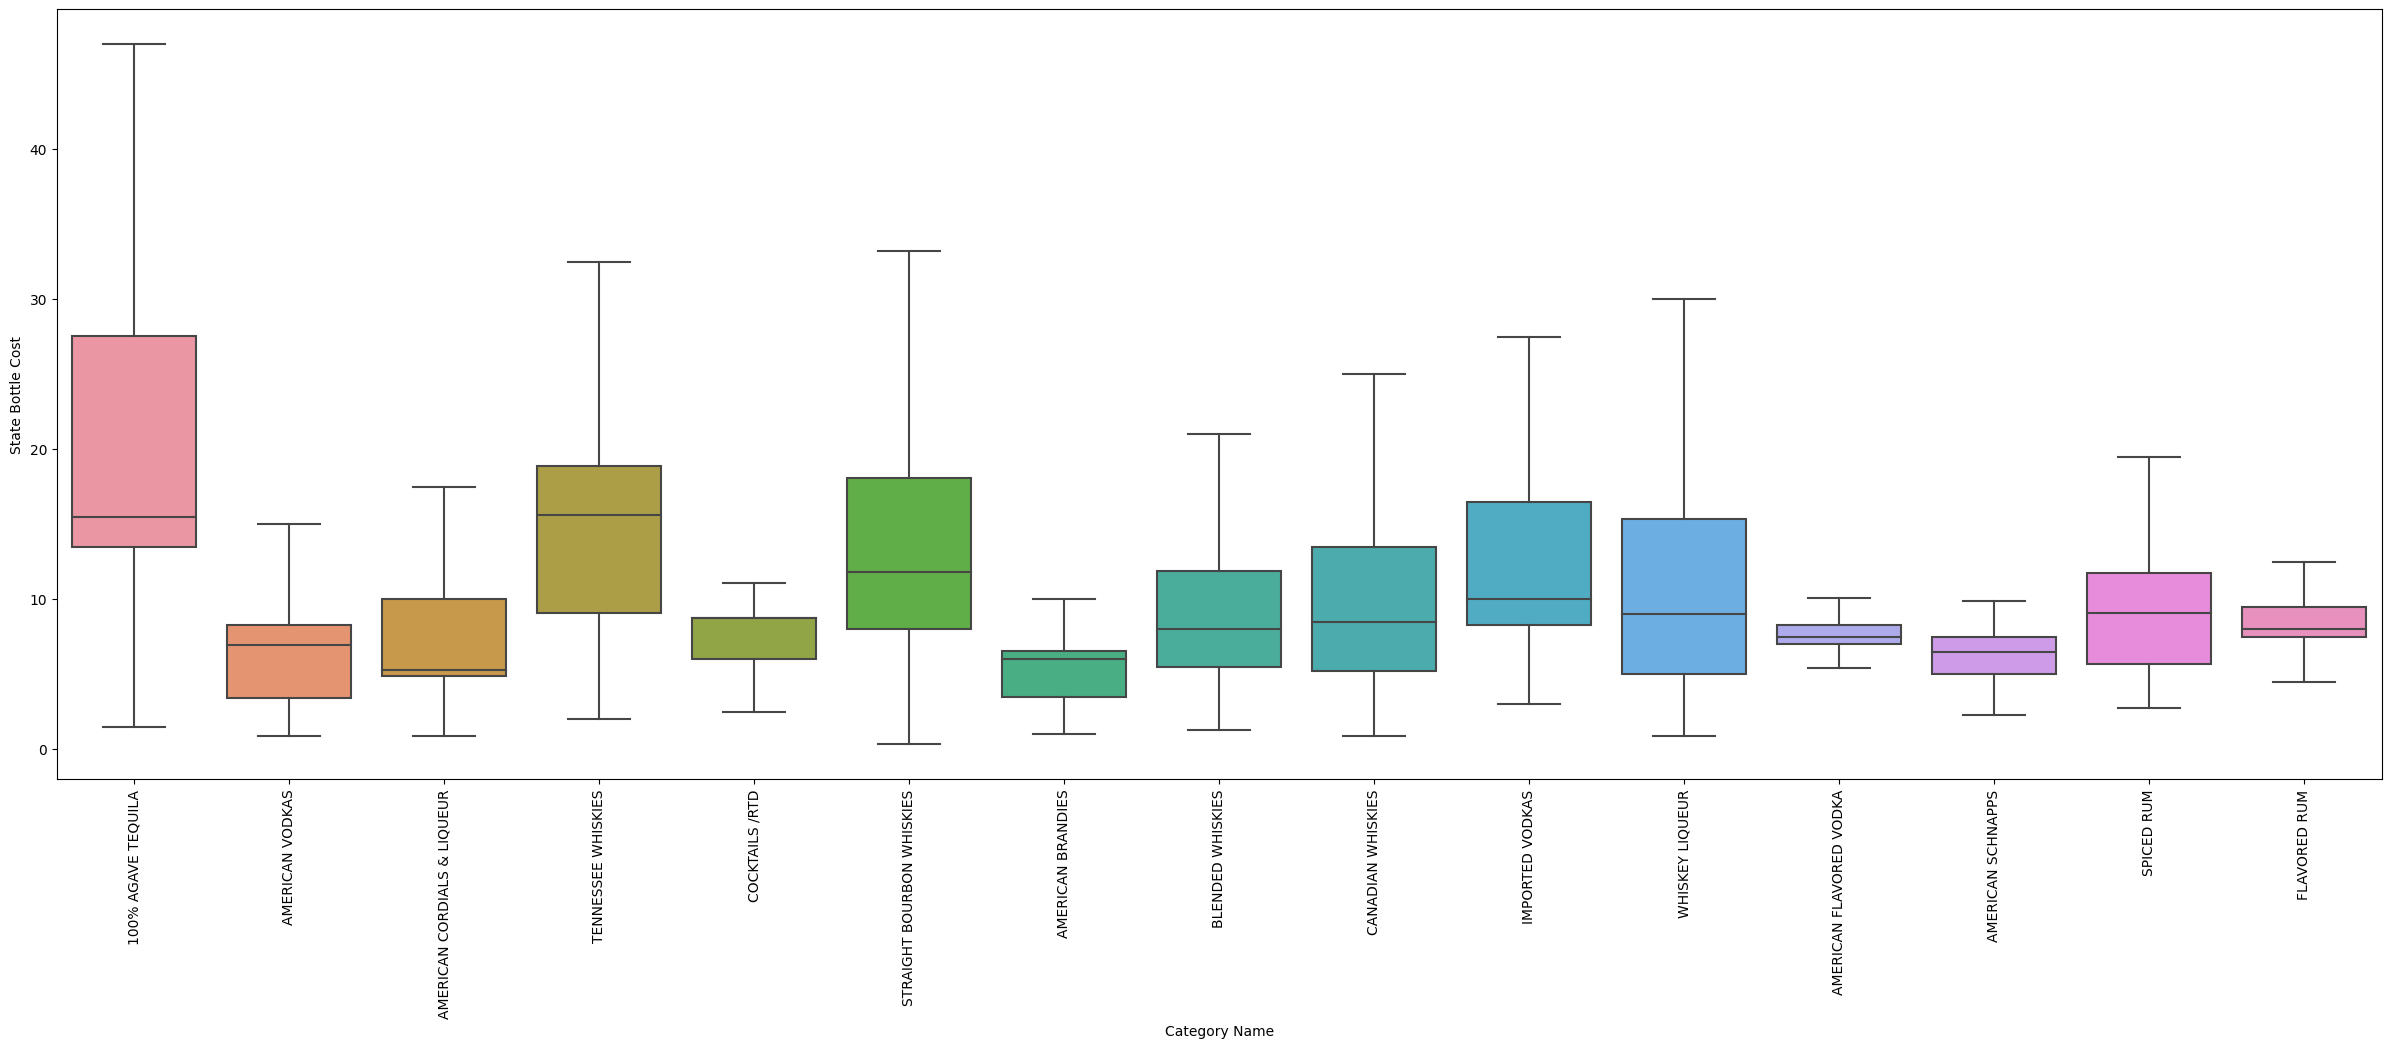

In [ ]:
plot_box_cat_quan('Category Name','State Bottle Cost',15,category_s)


The comparison of ranges and centers of State Bottle cost is similar wo State bottle retail. The most notory difference is that the values per category are centered between 6 and 29

###### Category name ->  pack)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Category Name','Pack',category_s,10)
ds_cat_volume.head(10)

AMERICAN VODKAS  CANADIAN WHISKIES  STRAIGHT BOURBON WHISKIES  \
count     291684.000000      192358.000000              139285.000000   
mean          12.668696          12.981836                  11.064781   
std            8.729194           8.733611                   6.698245   
min            1.000000           1.000000                   1.000000   
25%            6.000000           6.000000                   6.000000   
50%           12.000000          12.000000                  12.000000   
75%           12.000000          12.000000                  12.000000   
max           48.000000          48.000000                  48.000000   
median        12.000000          12.000000                  12.000000   

        WHISKEY LIQUEUR  AMERICAN FLAVORED VODKA  BLENDED WHISKIES  \
count     109526.000000             91798.000000      87479.000000   
mean          17.089440                12.645668         10.825867   
std           15.371146                 4.796384          7.695291   
min            1.000000                 5.000000          1.000000   
25%            6.000000                12.000000          6.000000   
50%           12.000000                12.000000         12.000000   
75%           24.000000                12.000000         12.000000   
max           48.000000                48.000000         48.000000   
median        12.000000                12.000000         12.000000   

          SPICED RUM  COCKTAILS /RTD  AMERICAN SCHNAPPS  100% AGAVE TEQUILA  
count   87092.000000    66187.000000       64169.000000        62781.000000  
mean       12.815953        7.377340          12.307656            9.742470  
std         7.991777        5.488979           6.318249            5.363099  
min         1.000000        1.000000           1.000000            2.000000  
25%         6.000000        6.000000          10.000000            6.000000  
50%        12.000000        6.000000          12.000000           12.000000  
75%        12.000000        6.000000          12.000000           12.000000  
max        48.000000       60.000000          48.000000           48.000000  
median     12.000000        6.000000          12.000000           12.000000

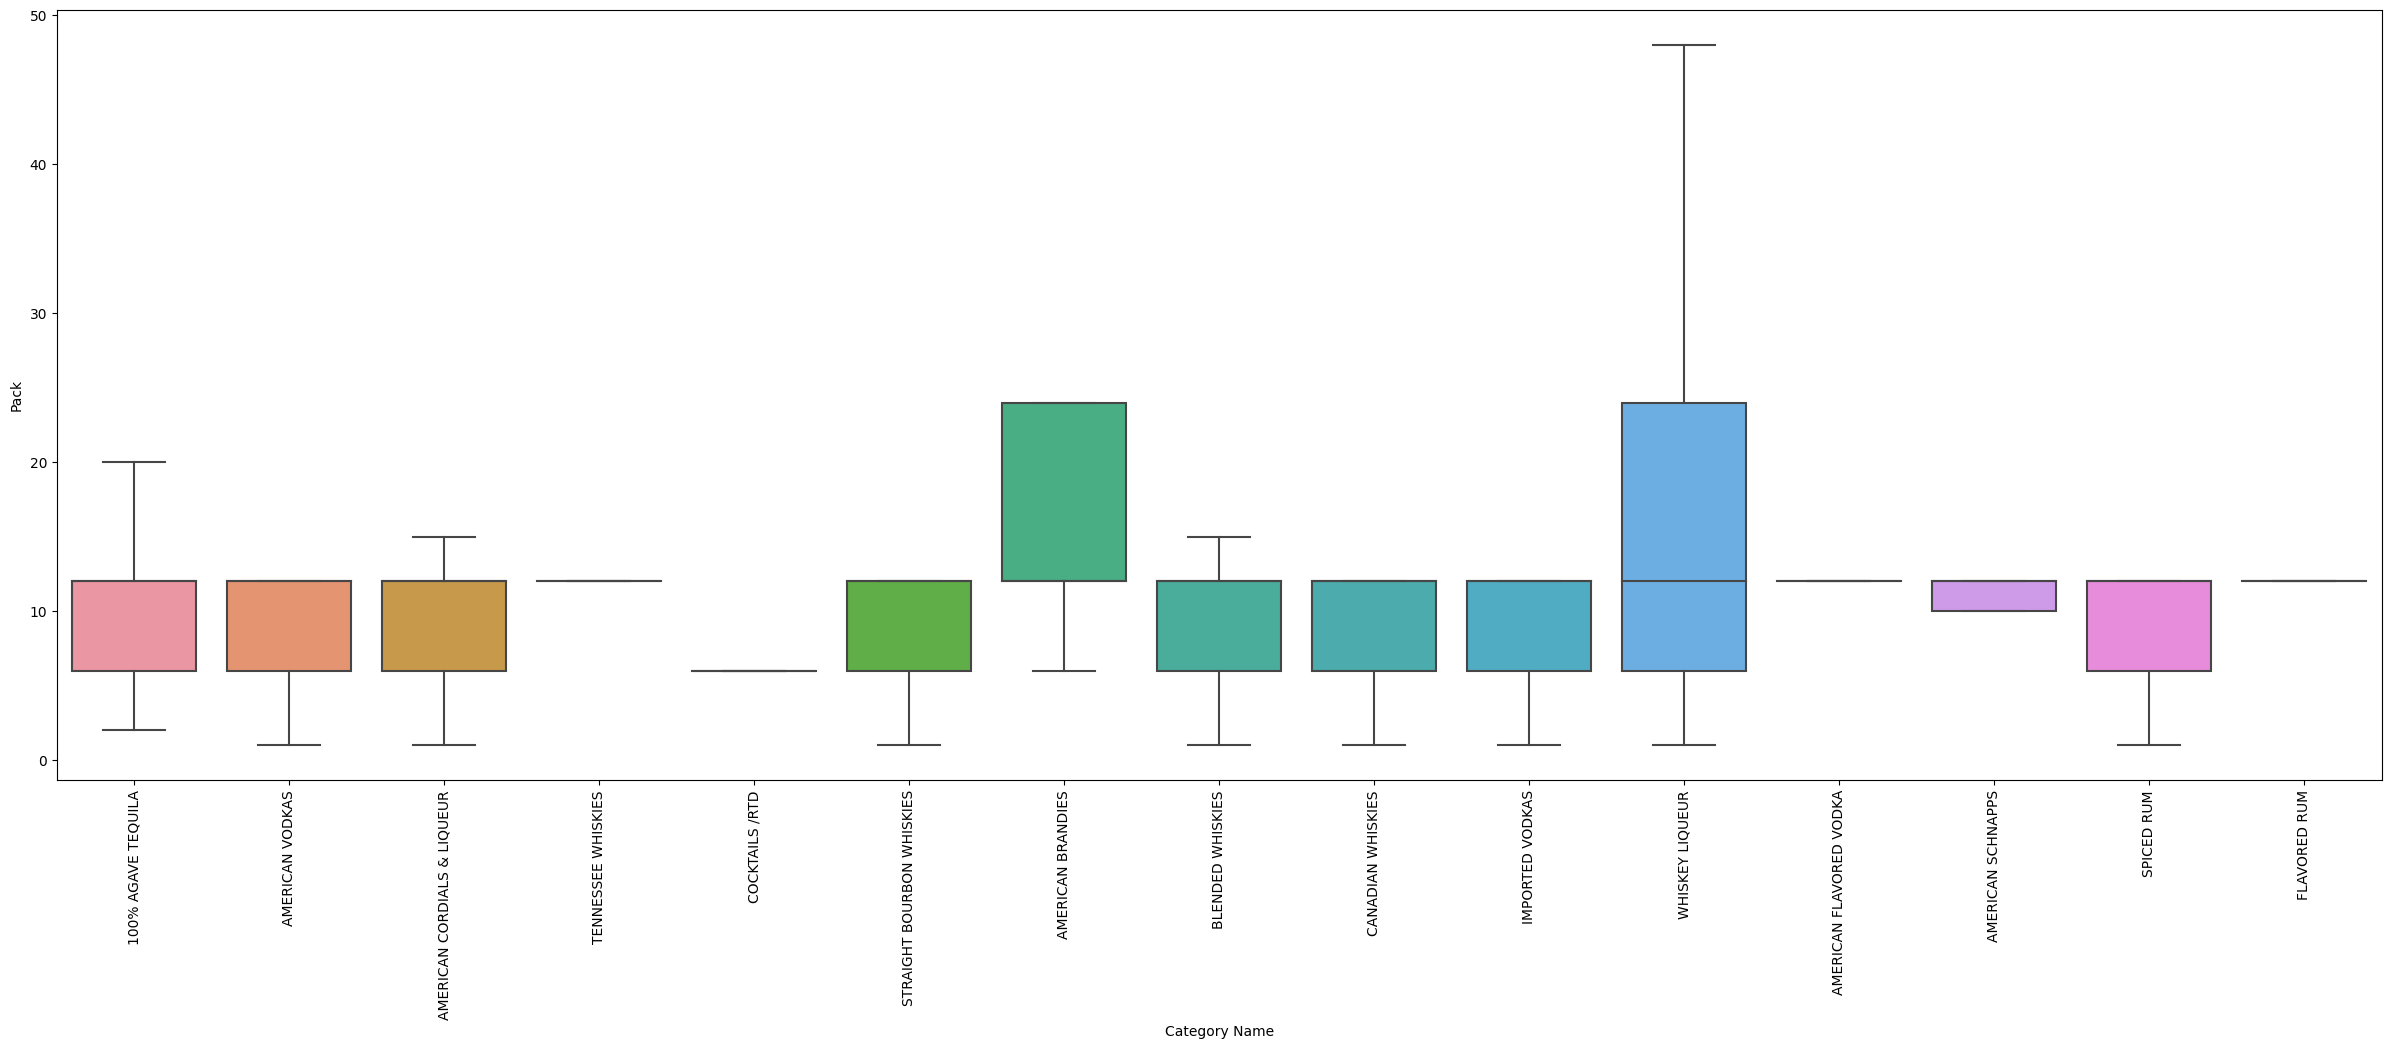

In [ ]:
plot_box_cat_quan('Category Name','Pack',15,category_s)


the ranges of pack across the majority of categores are between 6 and 12. Only American Brandies and Whiskey luqueur have a wider distribution of the center with 75% quartile values higher than 20. Other categories such as Tennessee Whiskies and Flavored rum have all the data centered in just one value

##### 1.2.1.2 city ->  (Sold (liters), Sale (Dollars), bottles sold, state bottle retail, state bttle cost, pack)

In [ ]:
print(quan_cols)
print(cat_cols)

['Volume Sold (Gallons)', 'Volume Sold (Liters)', 'Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail', 'State Bottle Cost', 'Pack']
['Store Name', 'Invoice/Item Number', 'Vendor Name', 'Date', 'Store Location', 'Address', 'Item Description', 'City', 'County', 'Category Name']


###### City -> Sold (liters)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('City','Volume Sold (Liters)',city_s,10)
ds_cat_volume.head(10)

DES MOINES   CEDAR RAPIDS     DAVENPORT  WEST DES MOINES  \
count   161537.000000  124582.000000  81936.000000     62333.000000   
mean        11.690622       9.502371     11.816085        12.251953   
std         74.910490      31.067091     57.066147       110.195182   
min          0.020000       0.020000      0.020000         0.020000   
25%          1.600000       1.600000      2.250000         1.500000   
50%          9.000000       4.500000      9.000000         4.500000   
75%         10.500000      10.500000     10.500000         9.000000   
max      13200.000000    2100.000000   7920.000000     11340.000000   
median       9.000000       4.500000      9.000000         4.500000   

          SIOUX CITY      WATERLOO  COUNCIL BLUFFS          AMES  \
count   61542.000000  59131.000000    57508.000000  49142.000000   
mean        9.771207      9.820645       10.884466     10.289562   
std        44.320988     34.817923       49.116579     48.989579   
min         0.020000      0.020000        0.020000      0.020000   
25%         1.500000      1.500000        1.500000      2.000000   
50%         9.000000      4.800000        9.000000      4.500000   
75%        10.500000     10.500000       10.500000     10.500000   
max      7920.000000   3150.000000     7920.000000   7632.000000   
median      9.000000      4.800000        9.000000      4.500000   

             DUBUQUE     IOWA CITY  
count   48571.000000  48155.000000  
mean       10.121289     11.030436  
std        47.415181     51.952377  
min         0.050000      0.020000  
25%         1.750000      2.250000  
50%         4.800000      6.000000  
75%        10.500000     10.500000  
max      7920.000000   7116.000000  
median      4.800000      6.000000

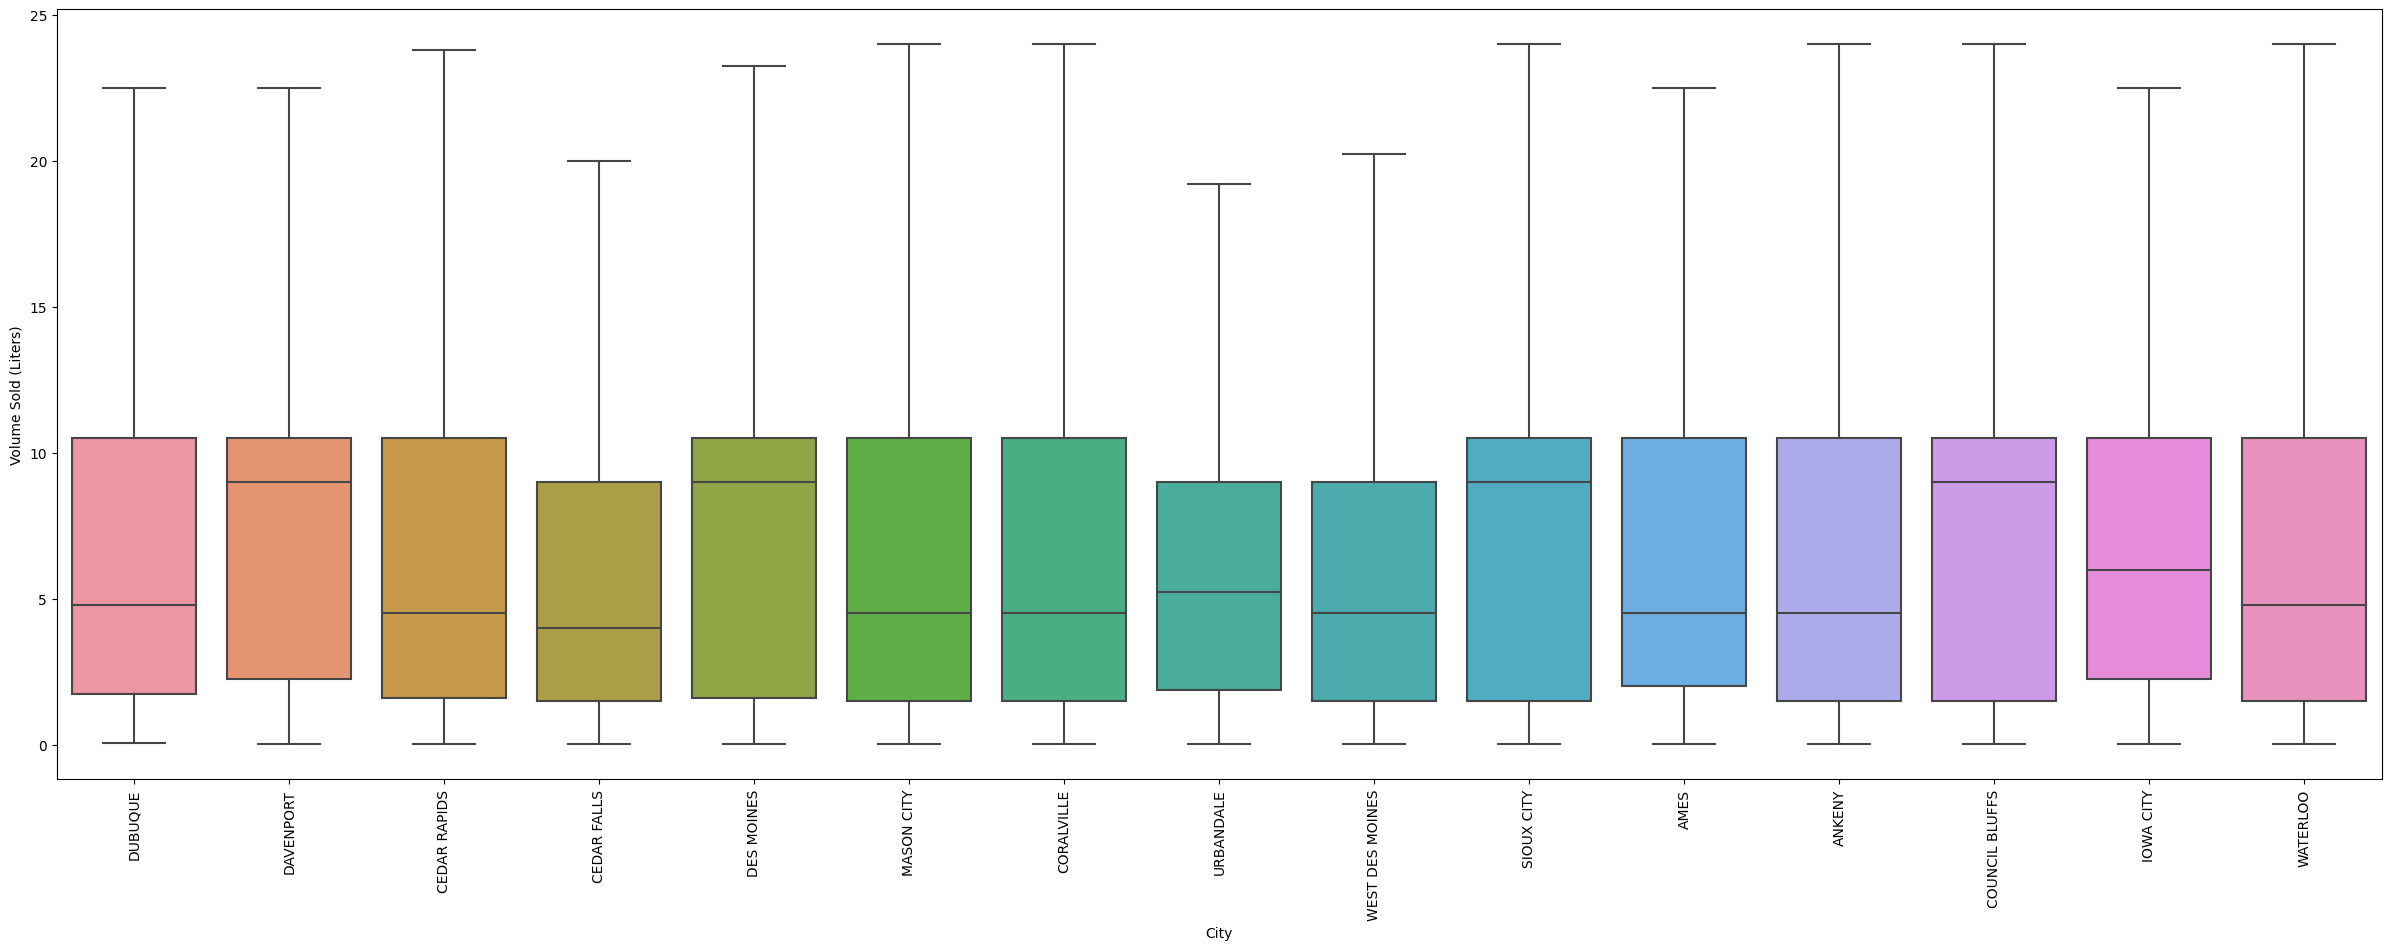

In [ ]:
plot_box_cat_quan('City','Volume Sold (Liters)',15,city_s)


Distribution of the center of volume sold (liters) per city seems to be somehow similar. With a 50% of the data between 1.6 and 10.5 liters. In Desmoines there is a order of 13.200 liters of one liquor. Cities such as Des Moines, Daven Port and Soux city have an average of volume sold per order superior to 7 liters.

###### City ->  Sale (Dollars)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('City','Sale (Dollars)',city_s,10)
ds_cat_volume.head(10)

DES MOINES   CEDAR RAPIDS      DAVENPORT  WEST DES MOINES  \
count   161537.000000  124582.000000   81936.000000     62333.000000   
mean       222.251345     162.933780     205.009692       215.493296   
std       1389.322527     412.311168     781.654800      1055.268522   
min          1.340000       1.340000       0.000000         1.350000   
25%         48.680000      42.480000      58.500000        40.770000   
50%        100.620000      85.440000     103.350000        90.000000   
75%        194.400000     163.080000     192.000000       171.000000   
max     250932.000000   18000.000000  150559.200000     81064.800000   
median     100.620000      85.440000     103.350000        90.000000   

           SIOUX CITY      WATERLOO  COUNCIL BLUFFS           AMES  \
count    61542.000000  59131.000000    57508.000000   49142.000000   
mean       167.969685    176.208489      189.494490     174.252980   
std        746.807069    487.025060      820.785396     825.281386   
min          1.340000      1.350000        1.340000       0.000000   
25%         43.560000     42.320000       48.555000      45.000000   
50%         93.560000     90.000000       97.200000      90.000000   
75%        180.000000    180.000000      186.840000     171.000000   
max     150559.200000  51300.000000   150559.200000  145084.320000   
median      93.560000     90.000000       97.200000      90.000000   

              DUBUQUE     IOWA CITY  
count    48571.000000  48155.000000  
mean       166.706308    195.130885  
std        808.155553    564.240181  
min          1.350000      1.350000  
25%         45.000000     54.000000  
50%         84.960000    102.000000  
75%        163.080000    189.000000  
max     150559.200000  42411.360000  
median      84.960000    102.000000

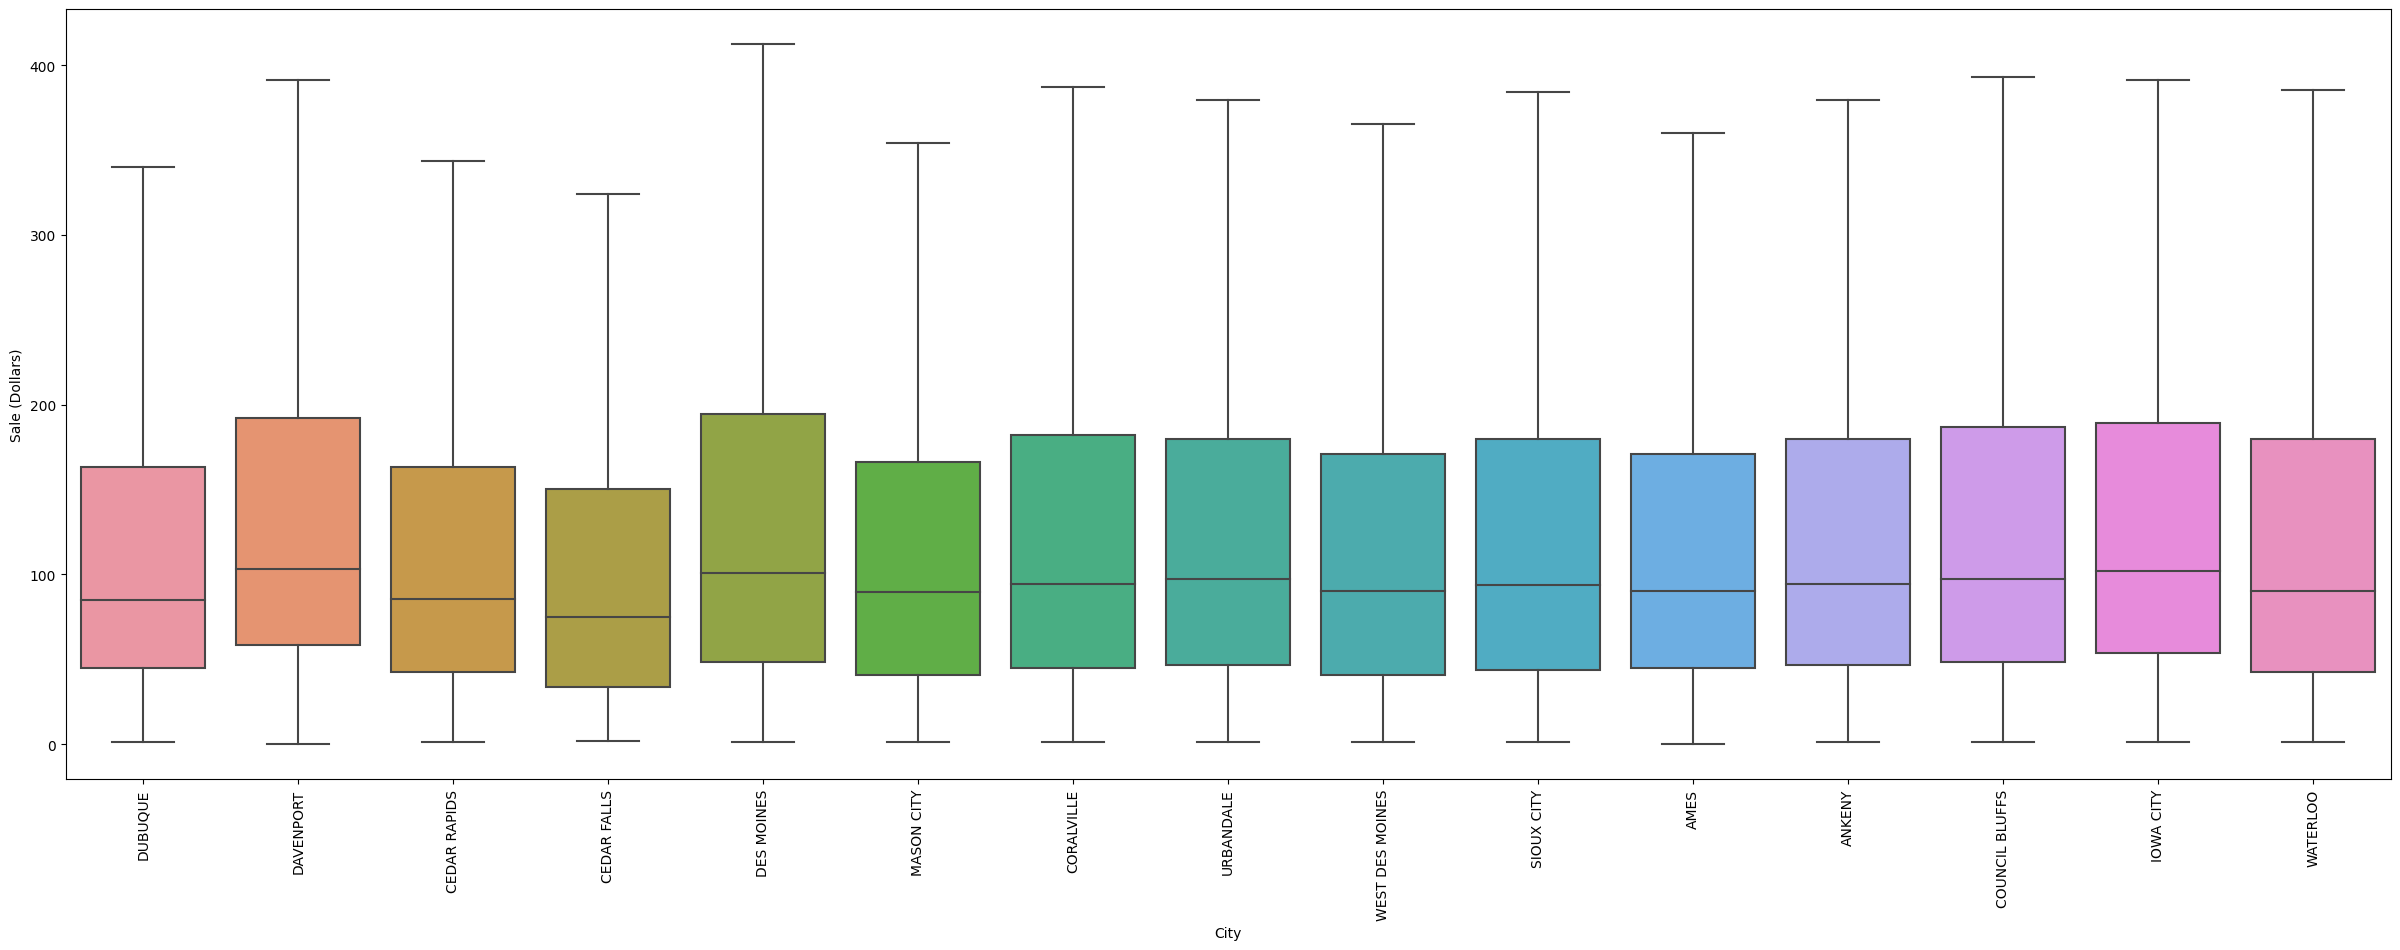

In [ ]:
plot_box_cat_quan('City','Sale (Dollars)',15,city_s)


Sale dollars per order per city seems to be centered around 100 dollars.Des Moines City have a wider center range with a interquartil 0.75 of 194.4 dollars

###### City -> bottles sold

In [ ]:
ds_cat_volume = relation_cat_quant_descr('City','Bottles Sold',city_s,10)
ds_cat_volume.head(10)

DES MOINES   CEDAR RAPIDS     DAVENPORT  WEST DES MOINES  \
count   161537.000000  124582.000000  81936.000000     62333.000000   
mean        16.965735      12.670659     16.710506        13.084016   
std         77.423714      29.395534     47.255064        66.612836   
min          1.000000       1.000000      1.000000         1.000000   
25%          4.000000       3.000000      4.000000         3.000000   
50%          9.000000       6.000000     12.000000         6.000000   
75%         12.000000      12.000000     12.000000        12.000000   
max      13200.000000    1200.000000   7920.000000      6480.000000   
median       9.000000       6.000000     12.000000         6.000000   

          SIOUX CITY      WATERLOO  COUNCIL BLUFFS          AMES  \
count   61542.000000  59131.000000    57508.000000  49142.000000   
mean       13.263641     15.330284       15.413334     11.135994   
std        43.976129     35.283179       48.712691     44.060740   
min         1.000000      1.000000        1.000000      1.000000   
25%         3.000000      3.000000        4.000000      3.000000   
50%         6.000000      6.000000        8.000000      6.000000   
75%        12.000000     12.000000       12.000000     12.000000   
max      7920.000000   1800.000000     7920.000000   7632.000000   
median      6.000000      6.000000        8.000000      6.000000   

             DUBUQUE     IOWA CITY  
count   48571.000000  48155.000000  
mean       12.170822     13.772422  
std        43.639258     52.505174  
min         1.000000      1.000000  
25%         3.000000      4.000000  
50%         6.000000      6.000000  
75%        12.000000     12.000000  
max      7920.000000   7116.000000  
median      6.000000      6.000000

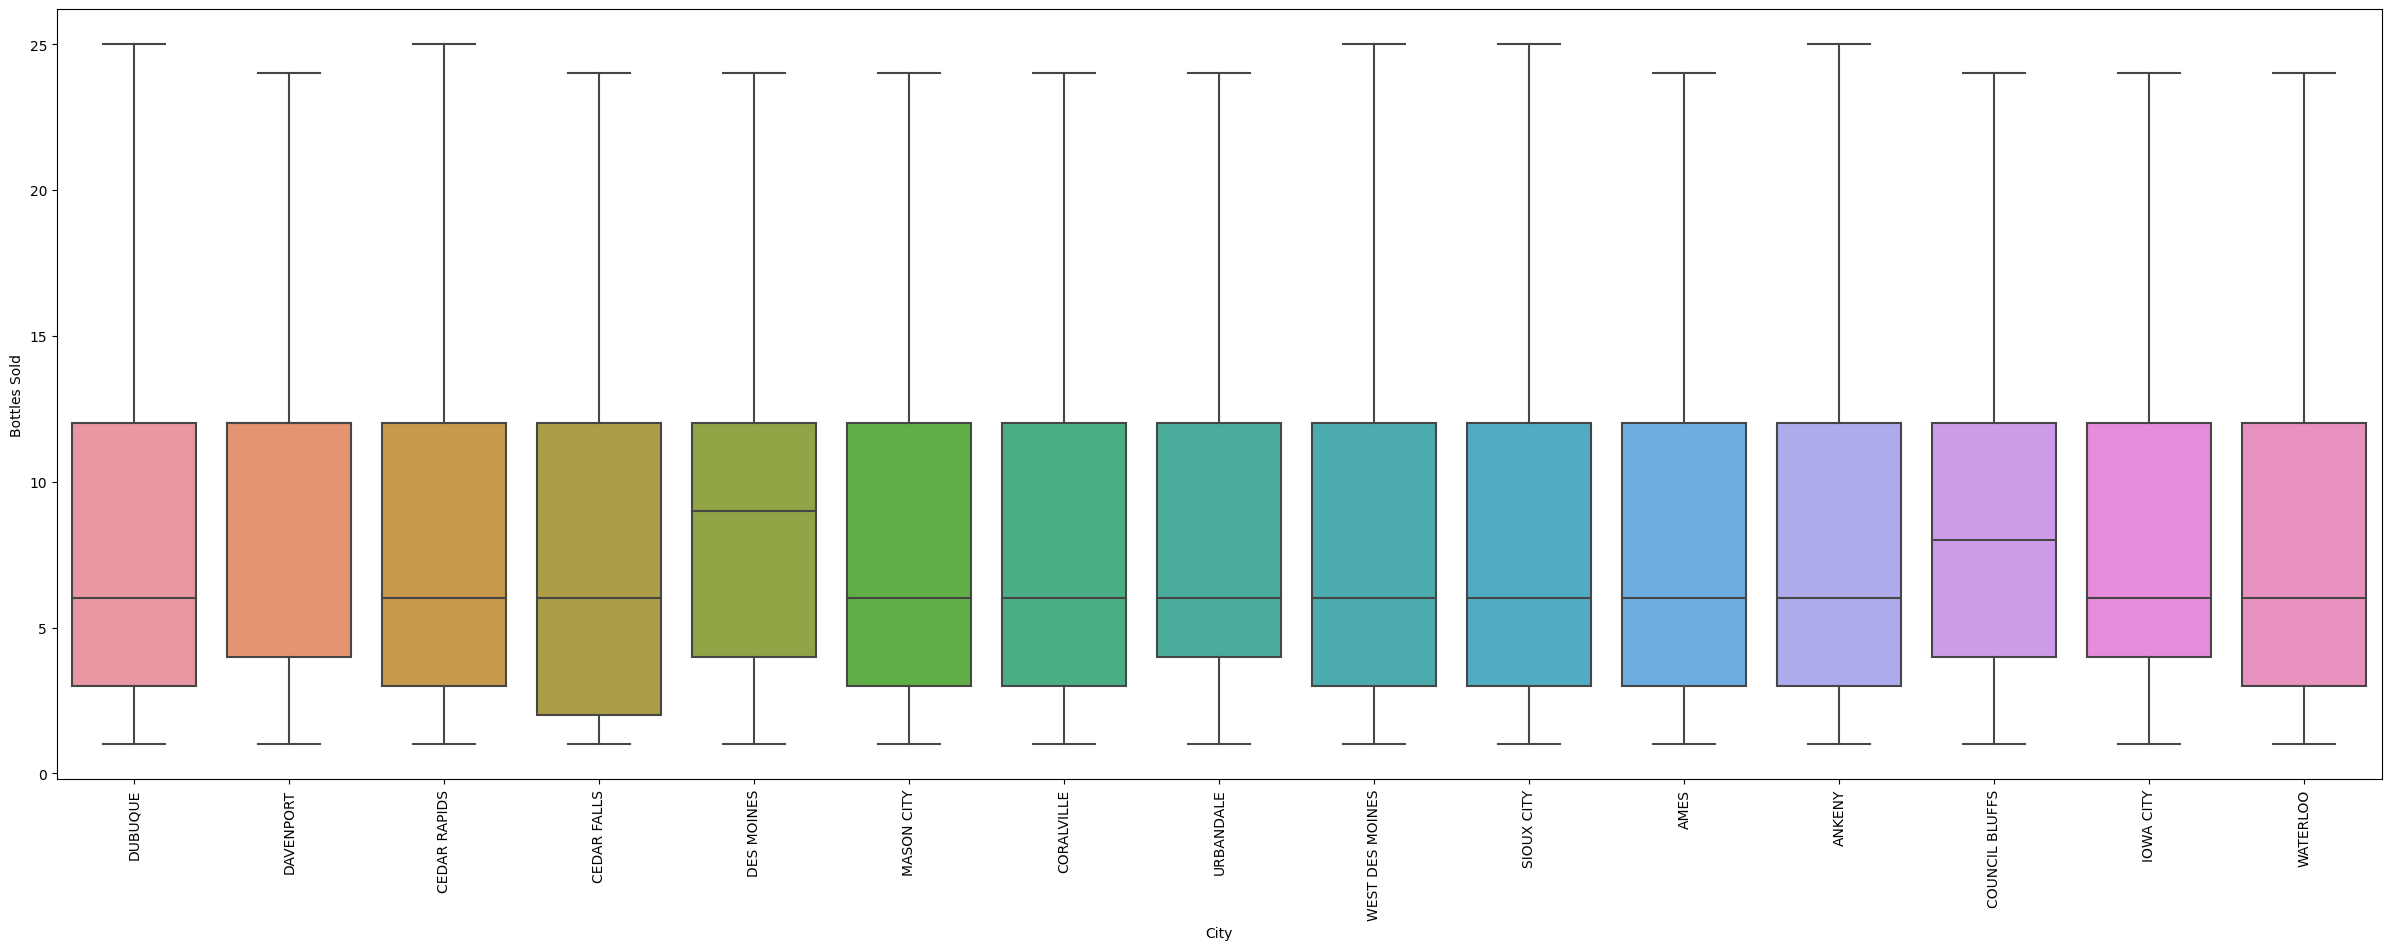

In [ ]:
plot_box_cat_quan('City','Bottles Sold',15,city_s)


The distribution of center of the bottles sold distribution across the majority of cities is between 2 and 12. Des Moines, DavenPort and Waterloo have an average of bottles sold per order of 16. Though, according to the median, Davenport city is the city where there are ordered in average 12 bottles of liquor

###### City ->  state bottle retail

In [ ]:
ds_cat_volume = relation_cat_quant_descr('City','State Bottle Retail',city_s,10)
ds_cat_volume.head(10)

DES MOINES   CEDAR RAPIDS     DAVENPORT  WEST DES MOINES  \
count   161537.000000  124582.000000  81936.000000     62333.000000   
mean        16.799396      16.388096     16.050441        18.187578   
std         18.222903      17.751464     16.868953        15.958715   
min          0.500000       1.340000      1.340000         0.500000   
25%          8.000000       8.130000      7.500000         9.740000   
50%         12.510000      12.750000     12.380000        13.590000   
75%         21.000000      20.250000     20.250000        22.500000   
max       2775.000000    2775.000000   1875.000000       300.000000   
median      12.510000      12.750000     12.380000        13.590000   

          SIOUX CITY      WATERLOO  COUNCIL BLUFFS          AMES  \
count   61542.000000  59131.000000    57508.000000  49142.000000   
mean       16.038414     15.825229       15.268446     18.157489   
std        12.957314     15.019090       12.740196     18.756774   
min         1.340000      1.340000        0.500000      1.340000   
25%         8.130000      7.500000        7.740000     10.380000   
50%        12.750000     12.380000       12.000000     14.940000   
75%        20.250000     20.100000       19.010000     23.000000   
max       323.640000    824.990000      300.000000   2775.000000   
median     12.750000     12.380000       12.000000     14.940000   

             DUBUQUE     IOWA CITY  
count   48571.000000  48155.000000  
mean       16.504175     16.982144  
std        13.491989     15.266485  
min         1.340000      0.500000  
25%         8.270000      8.700000  
50%        13.110000     13.470000  
75%        20.525000     21.000000  
max       281.250000    824.990000  
median     13.110000     13.470000

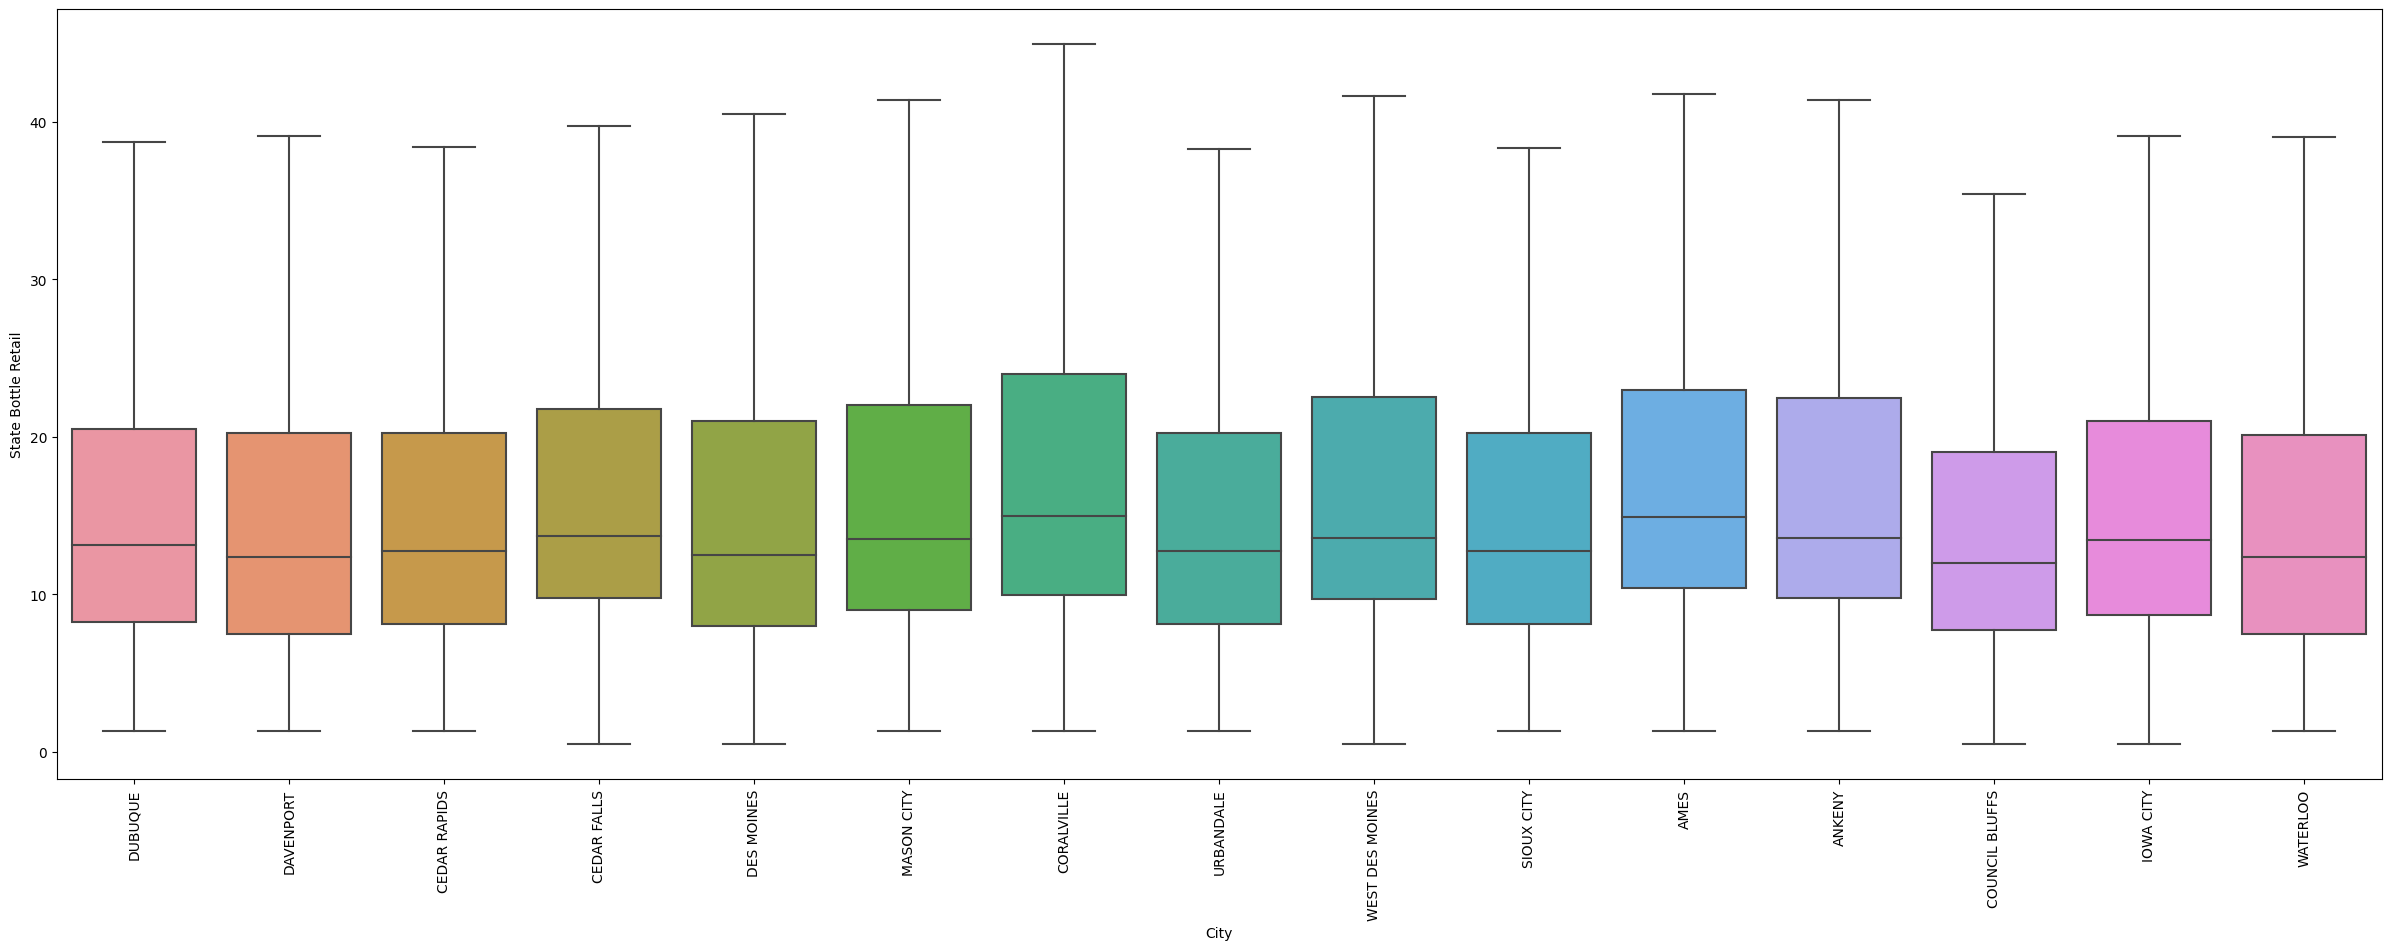

In [ ]:
plot_box_cat_quan('City','State Bottle Retail',15,city_s)


State bottle retail across cities is centered between 12, and 13.3 dollars according to the median values.

###### City -> state bttle cost

In [ ]:


ds_cat_volume = relation_cat_quant_descr('City','State Bottle Cost',city_s,10)
ds_cat_volume.head(10)


DES MOINES   CEDAR RAPIDS     DAVENPORT  WEST DES MOINES  \
count   161537.000000  124582.000000  81936.000000     62333.000000   
mean        11.197961      10.922795     10.697857        12.124021   
std         12.150589      11.834258     11.246317        10.640976   
min          0.330000       0.890000      0.890000         0.330000   
25%          5.330000       5.420000      5.000000         6.490000   
50%          8.340000       8.500000      8.250000         9.060000   
75%         14.000000      13.500000     13.500000        15.000000   
max       1850.000000    1850.000000   1250.000000       200.000000   
median       8.340000       8.500000      8.250000         9.060000   

          SIOUX CITY      WATERLOO  COUNCIL BLUFFS          AMES  \
count   61542.000000  59131.000000    57508.000000  49142.000000   
mean       10.689663     10.546121       10.176188     12.102887   
std         8.637735     10.013413        8.494061     12.504211   
min         0.890000      0.890000        0.330000      0.890000   
25%         5.420000      5.000000        5.160000      6.920000   
50%         8.500000      8.250000        8.000000      9.960000   
75%        13.500000     13.340000       12.670000     15.330000   
max       215.760000    549.990000      200.000000   1850.000000   
median      8.500000      8.250000        8.000000      9.960000   

             DUBUQUE     IOWA CITY  
count   48571.000000  48155.000000  
mean       11.000355     11.318807  
std         8.994566     10.177406  
min         0.890000      0.330000  
25%         5.510000      5.750000  
50%         8.740000      8.980000  
75%        13.680000     14.000000  
max       187.500000    549.990000  
median      8.740000      8.980000

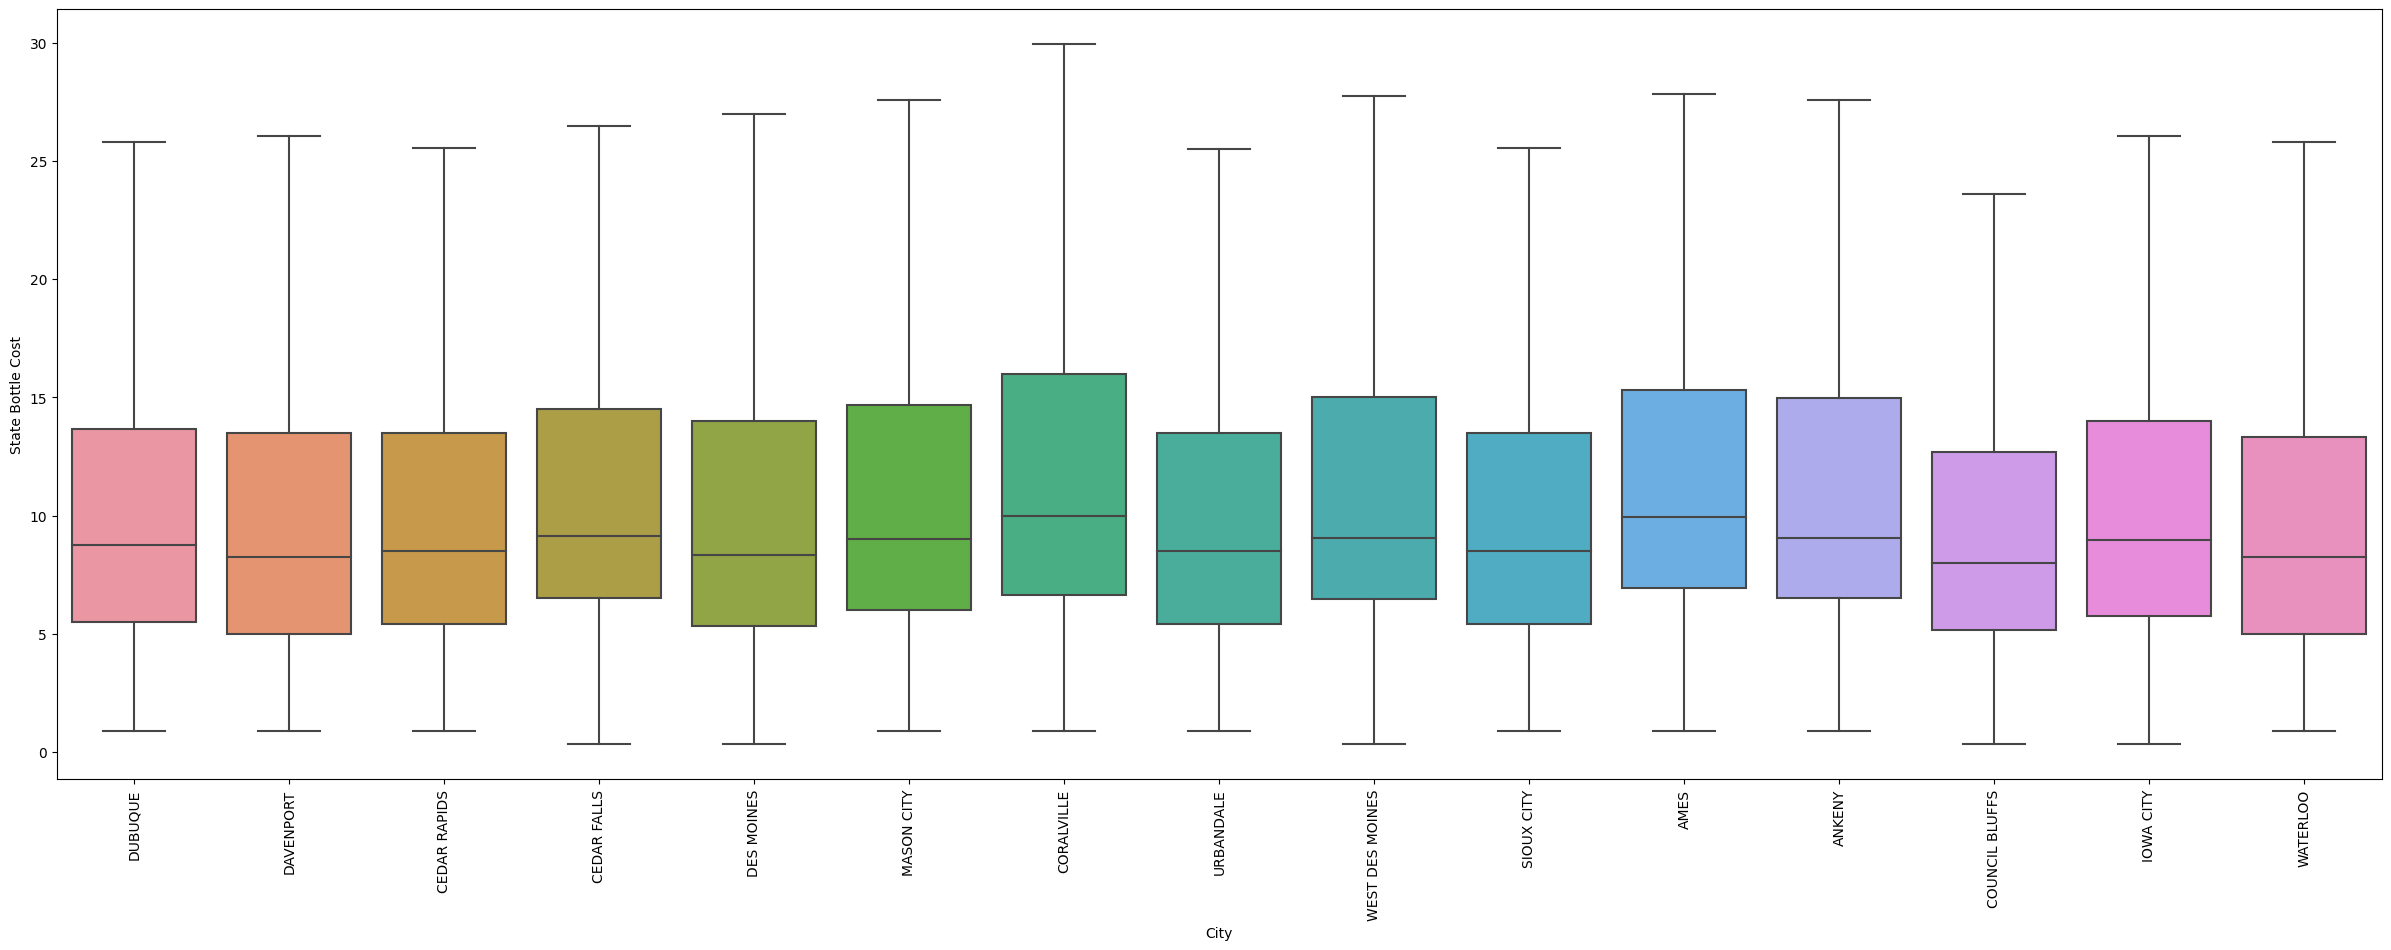

In [ ]:
plot_box_cat_quan("City",'State Bottle Cost',15,city_s)


State bottle cost per order, per city is centered between 8 and 9 dollars according to the median values.

###### City ->  pack)

In [ ]:

ds_cat_volume = relation_cat_quant_descr('City','Pack',city_s,10)
ds_cat_volume.head(10)


DES MOINES   CEDAR RAPIDS     DAVENPORT  WEST DES MOINES  \
count   161537.000000  124582.000000  81936.000000     62333.000000   
mean        13.453320      12.887905     13.593427        11.787657   
std          9.411533       8.929402      9.973071         7.825835   
min          1.000000       1.000000      1.000000         1.000000   
25%          6.000000       6.000000      6.000000         6.000000   
50%         12.000000      12.000000     12.000000        12.000000   
75%         12.000000      12.000000     12.000000        12.000000   
max         60.000000      60.000000     60.000000        60.000000   
median      12.000000      12.000000     12.000000        12.000000   

          SIOUX CITY      WATERLOO  COUNCIL BLUFFS          AMES  \
count   61542.000000  59131.000000    57508.000000  49142.000000   
mean       12.757353     13.816847       13.398014     11.033881   
std         8.841490      9.676833        9.915122      6.201852   
min         1.000000      1.000000        1.000000      1.000000   
25%         6.000000      6.000000        6.000000      6.000000   
50%        12.000000     12.000000       12.000000     12.000000   
75%        12.000000     12.000000       12.000000     12.000000   
max        60.000000     60.000000       60.000000     60.000000   
median     12.000000     12.000000       12.000000     12.000000   

             DUBUQUE     IOWA CITY  
count   48571.000000  48155.000000  
mean       12.206337     12.135168  
std         7.963948      7.803481  
min         1.000000      1.000000  
25%         6.000000      6.000000  
50%        12.000000     12.000000  
75%        12.000000     12.000000  
max        60.000000     60.000000  
median     12.000000     12.000000

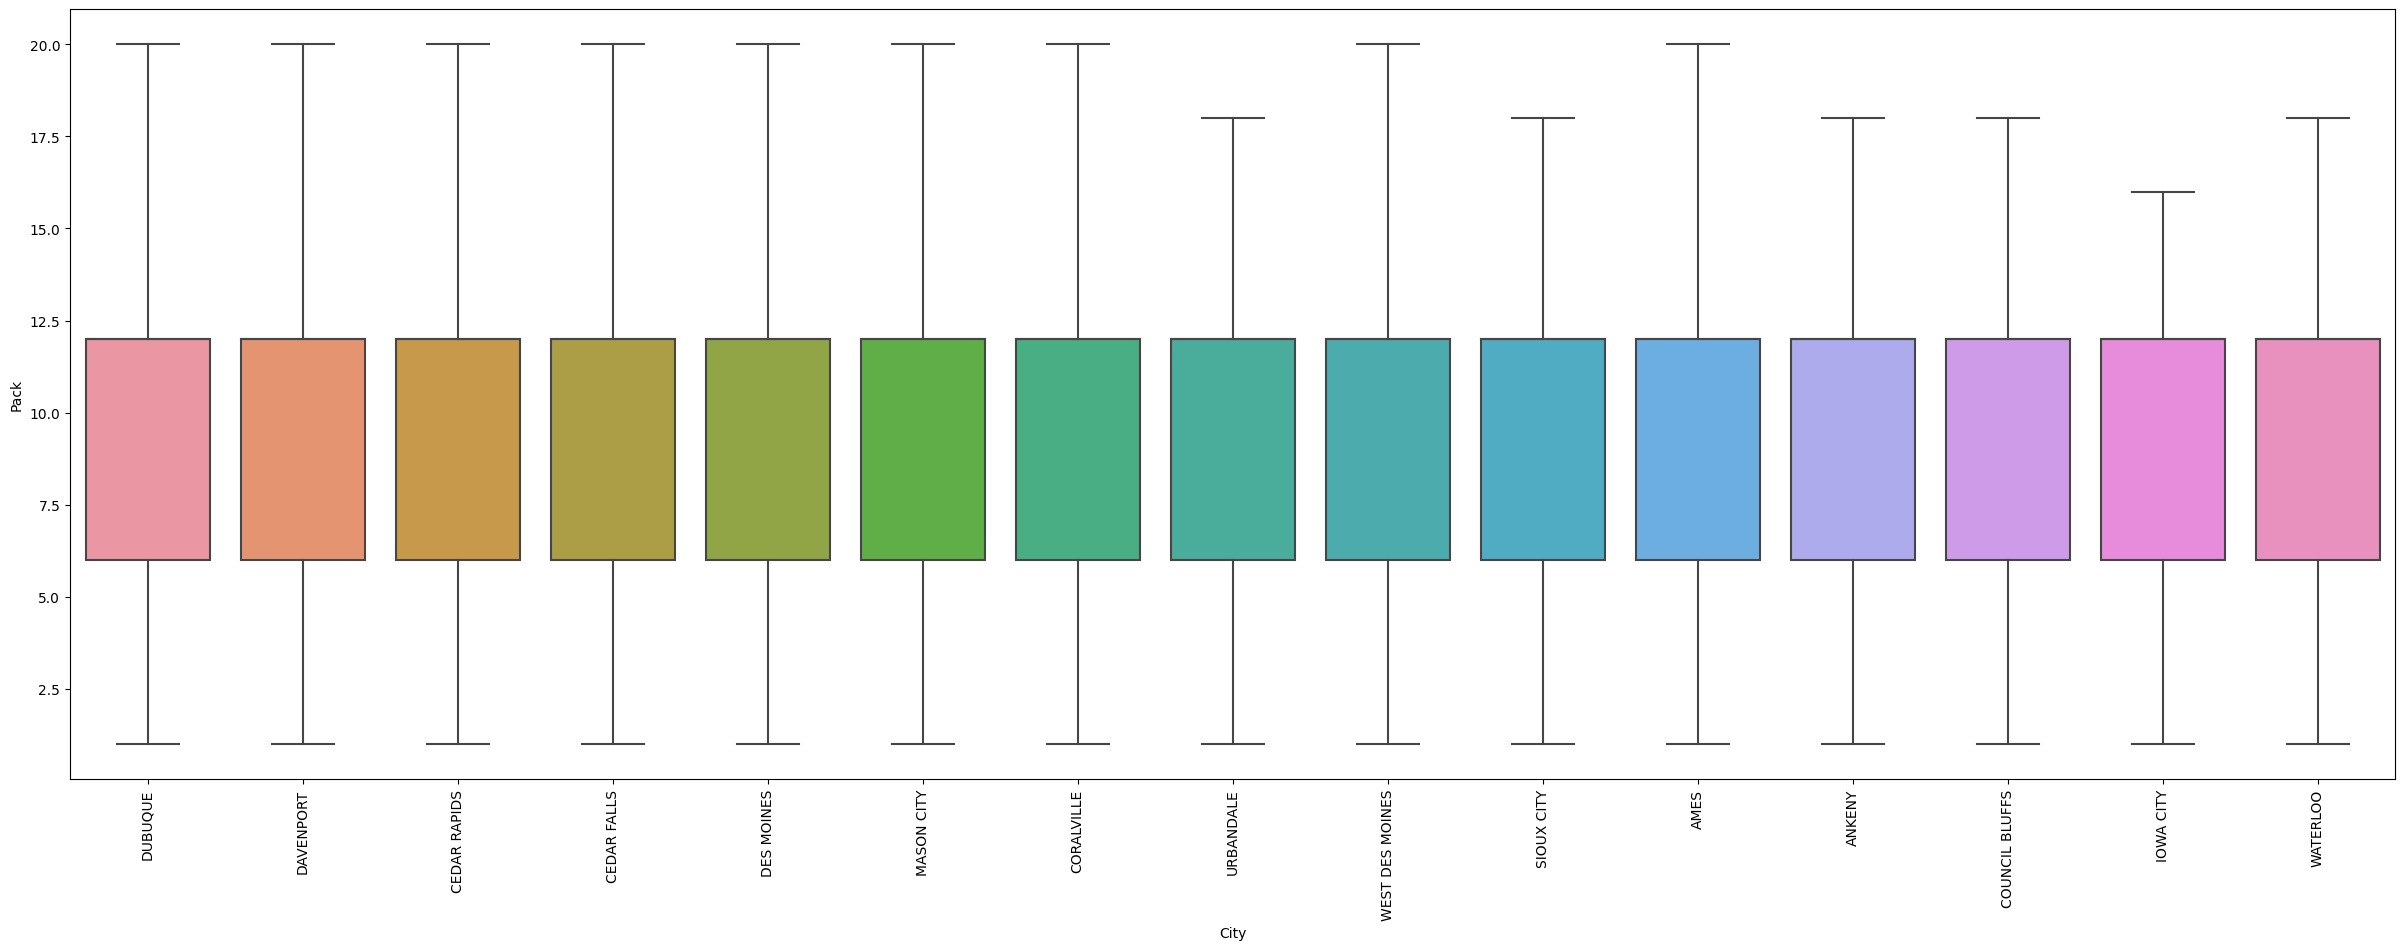

In [ ]:
plot_box_cat_quan('City','Pack',15,city_s)


There is no difference in the median of pack values across cities. It is 12.IQR in all cities are also similar, with a value of 6

##### 1.2.1.3 county -> (Sold (liters), Sale (Dollars), bottles sold, state bottle retail, state bttle cost, pack)

###### County -> Sold (liters)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('County','Volume Sold (Liters)',county_s,10)
ds_cat_volume.head(10)

POLK           LINN          SCOTT     BLACK HAWK  \
count   376628.000000  164116.000000  116434.000000  113913.000000   
mean        10.437216       9.858177      11.380009       8.772679   
std         57.354937      31.965079      49.526381      29.381441   
min          0.020000       0.020000       0.020000       0.020000   
25%          1.500000       2.000000       2.250000       1.500000   
50%          4.800000       4.800000       9.000000       4.500000   
75%          9.000000      10.500000      10.500000       9.600000   
max      13200.000000    2100.000000    7920.000000    3150.000000   
median       4.800000       4.800000       9.000000       4.500000   

             JOHNSON      WOODBURY    POTTAWATTA         STORY       DUBUQUE  \
count   95835.000000  67005.000000  64650.000000  58951.000000  55304.000000   
mean       10.845286      9.435119     10.247730      9.806632     10.280812   
std        68.569451     42.691821     46.388726     46.383300     47.482766   
min         0.020000      0.020000      0.020000      0.020000      0.050000   
25%         1.500000      1.500000      1.500000      1.750000      2.000000   
50%         4.500000      7.000000      8.800000      4.500000      5.000000   
75%         9.600000     10.500000     10.500000     10.500000     10.500000   
max      7116.000000   7920.000000   7920.000000   7632.000000   7920.000000   
median      4.500000      7.000000      8.800000      4.500000      5.000000   

          CERRO GORD  
count   39291.000000  
mean       10.207729  
std        39.632762  
min         0.020000  
25%         1.500000  
50%         4.500000  
75%        10.500000  
max      3150.000000  
median      4.500000

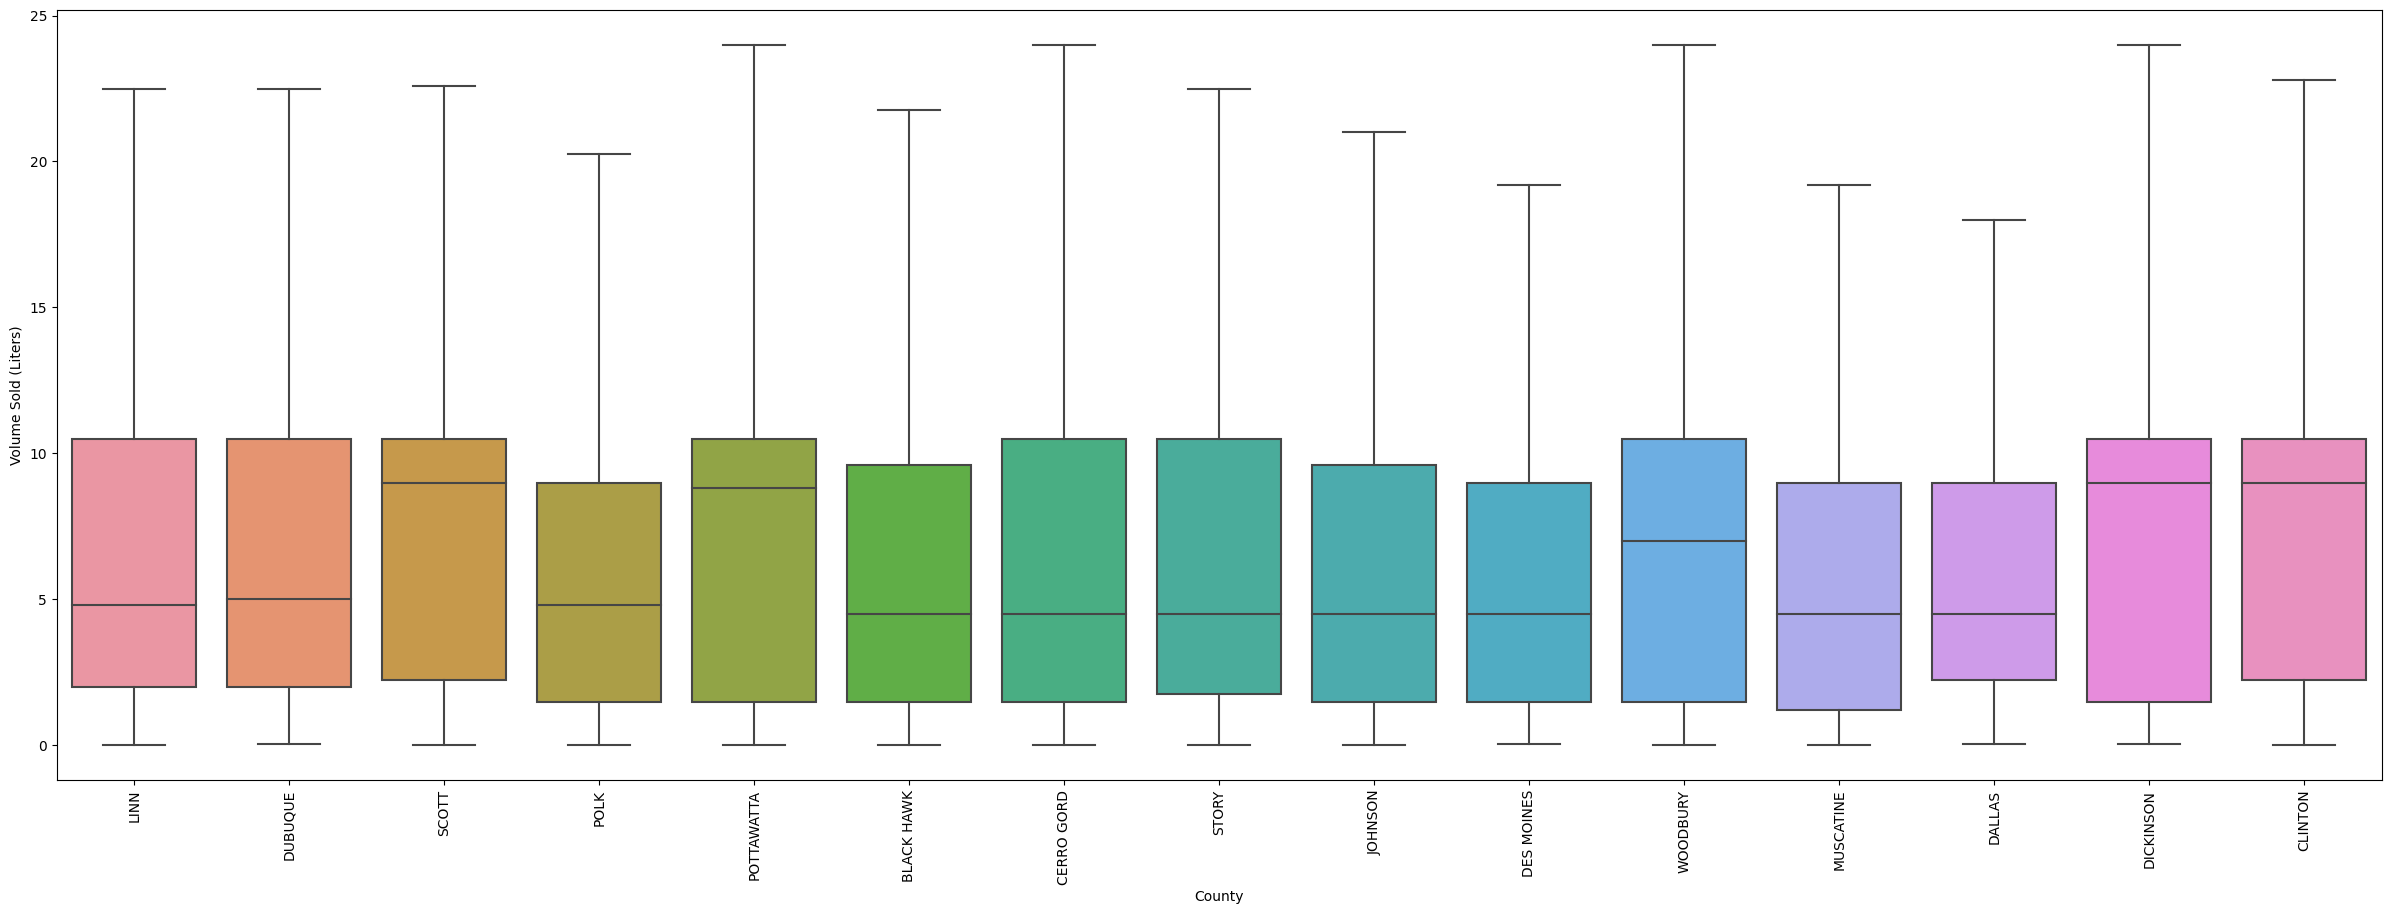

In [ ]:
plot_box_cat_quan('County','Volume Sold (Liters)',15,county_s)


Woodbury, Pottawa, and Scott Counties have a median higher than other counties. While in Scott the mean volume sold per order is 9, in Johnson it is of 5. The distribution of the center for the majority of cities is between 2 and 10 approx.

###### County ->  Sale (Dollars)

In [ ]:


ds_cat_volume = relation_cat_quant_descr('County','Sale (Dollars)',county_s,10)
ds_cat_volume.head(10)


POLK           LINN          SCOTT    BLACK HAWK  \
count   376628.000000  164116.000000  116434.000000  113913.00000   
mean       195.064185     165.058822     199.640120     153.62313   
std       1105.640731     415.059948     690.635398     413.12927   
min          1.340000       1.340000       0.000000       1.35000   
25%         45.000000      44.970000      51.750000      36.08000   
50%         94.200000      89.940000      98.940000      78.75000   
75%        180.000000     165.000000     189.000000     162.00000   
max     250932.000000   19390.200000  150559.200000   51300.00000   
median      94.200000      89.940000      98.940000      78.75000   

             JOHNSON       WOODBURY     POTTAWATTA          STORY  \
count   95835.000000   67005.000000   64650.000000   58951.000000   
mean      192.689740     161.586265     178.433117     163.178958   
std       686.428753     718.259957     775.173062     763.720216   
min         1.350000       1.340000       1.340000       0.000000   
25%        45.000000      42.000000      45.000000      42.520000   
50%        94.080000      90.000000      93.560000      89.960000   
75%       180.000000     177.720000     180.000000     163.080000   
max     43910.100000  150559.200000  150559.200000  145084.320000   
median     94.080000      90.000000      93.560000      89.960000   

              DUBUQUE    CERRO GORD  
count    55304.000000  39291.000000  
mean       165.340913    167.109518  
std        772.872892    490.457326  
min          1.350000      1.340000  
25%         45.000000     41.610000  
50%         85.440000     85.320000  
75%        163.080000    162.000000  
max     150559.200000  22932.000000  
median      85.440000     85.320000

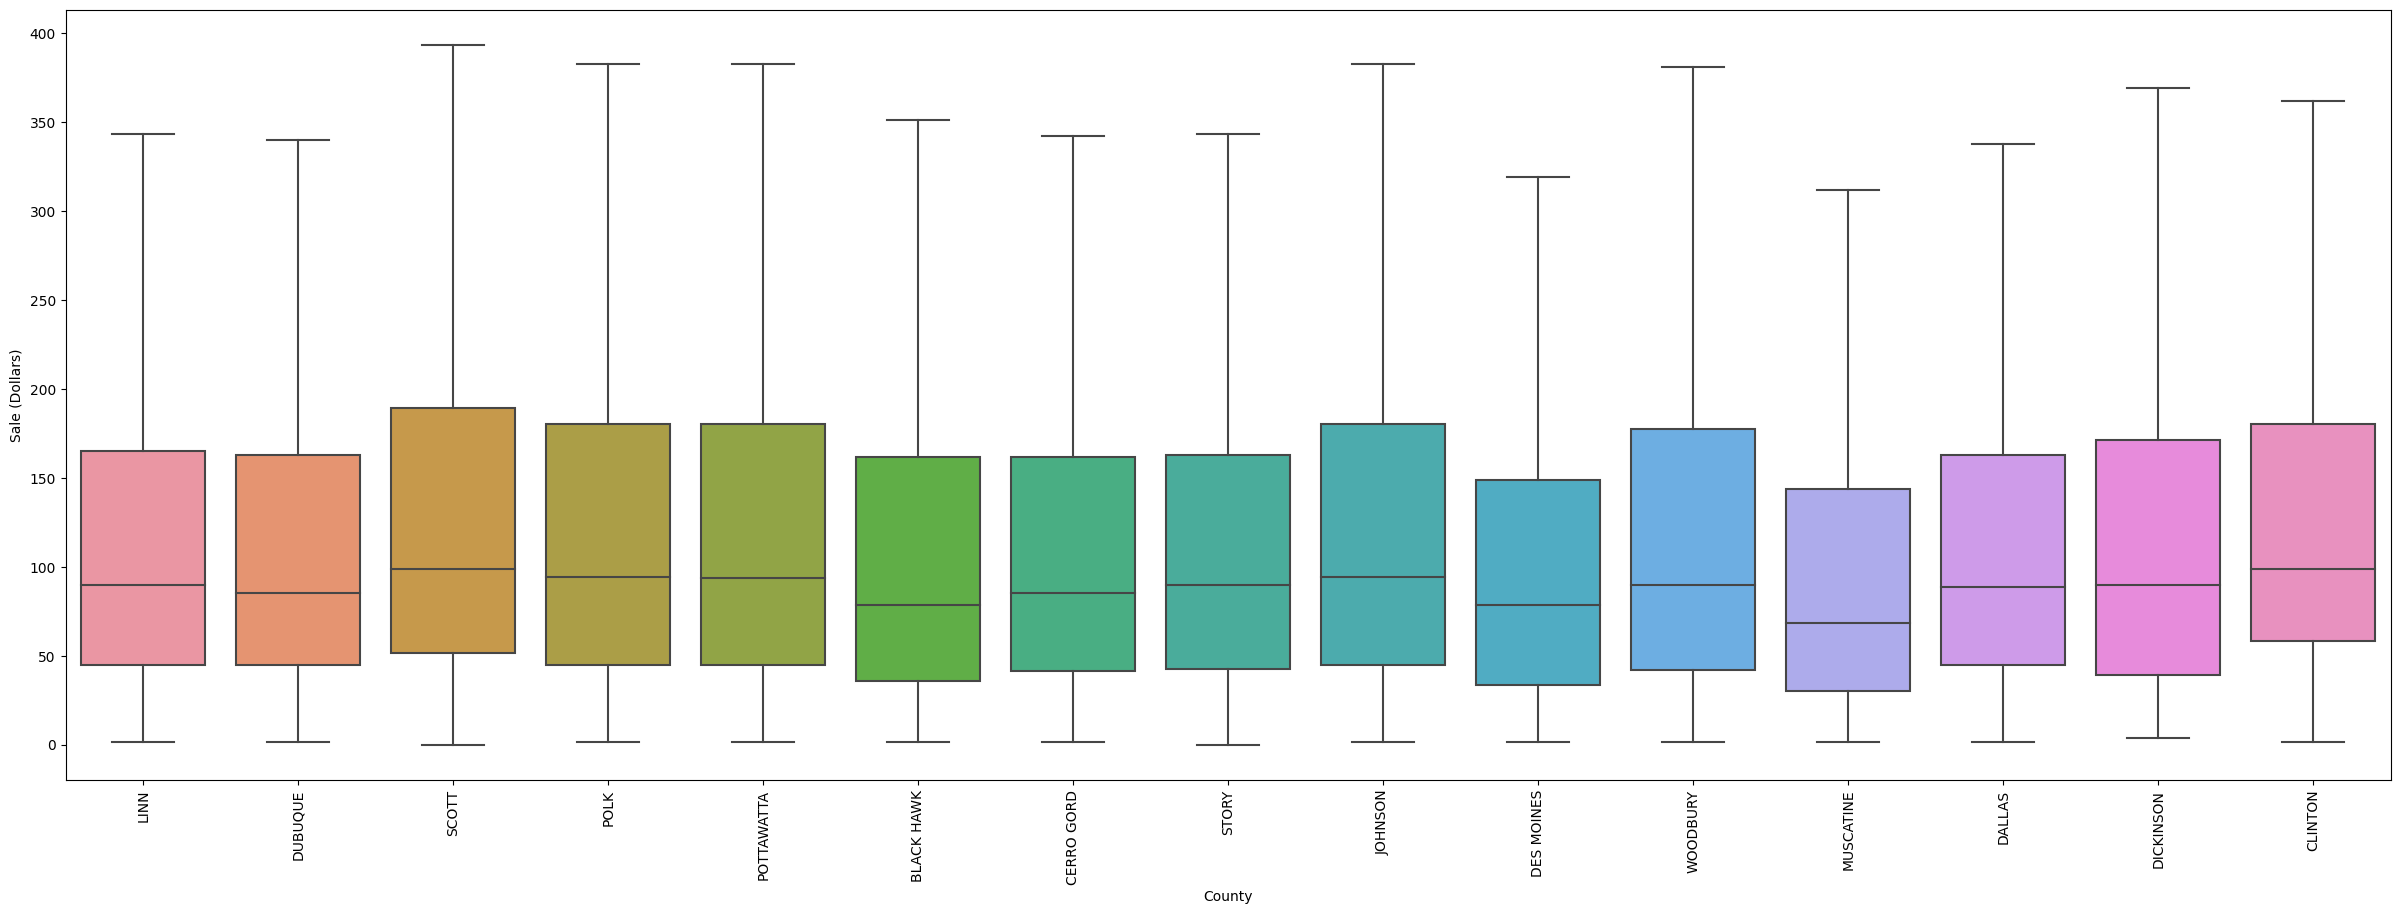

In [ ]:
plot_box_cat_quan('County','Sale (Dollars)',15,county_s)

Sale in dollars per order by county is located between 78 and 95 according to the median values.

###### County -> bottles sold

In [ ]:


ds_cat_volume = relation_cat_quant_descr('County','Bottles Sold',county_s,10)
ds_cat_volume.head(10)

POLK           LINN          SCOTT     BLACK HAWK  \
count   376628.000000  164116.000000  116434.000000  113913.000000   
mean        13.920234      12.827738      15.556221      12.295936   
std         59.314377      30.612729      41.679220      28.453598   
min          1.000000       1.000000       1.000000       1.000000   
25%          3.000000       3.000000       4.000000       2.000000   
50%          6.000000       6.000000       6.000000       6.000000   
75%         12.000000      12.000000      12.000000      12.000000   
max      13200.000000    1320.000000    7920.000000    1800.000000   
median       6.000000       6.000000       6.000000       6.000000   

             JOHNSON      WOODBURY    POTTAWATTA         STORY       DUBUQUE  \
count   95835.000000  67005.000000  64650.000000  58951.000000  55304.000000   
mean       12.643251     12.820655     14.637494     10.750267     11.990001   
std        51.032663     42.330606     46.119062     40.975378     42.080397   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%         3.000000      3.000000      4.000000      3.000000      3.000000   
50%         6.000000      6.000000      6.000000      6.000000      6.000000   
75%        12.000000     12.000000     12.000000     12.000000     12.000000   
max      7116.000000   7920.000000   7920.000000   7632.000000   7920.000000   
median      6.000000      6.000000      6.000000      6.000000      6.000000   

          CERRO GORD  
count   39291.000000  
mean       12.512000  
std        35.457382  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%        12.000000  
max      1800.000000  
median      6.000000

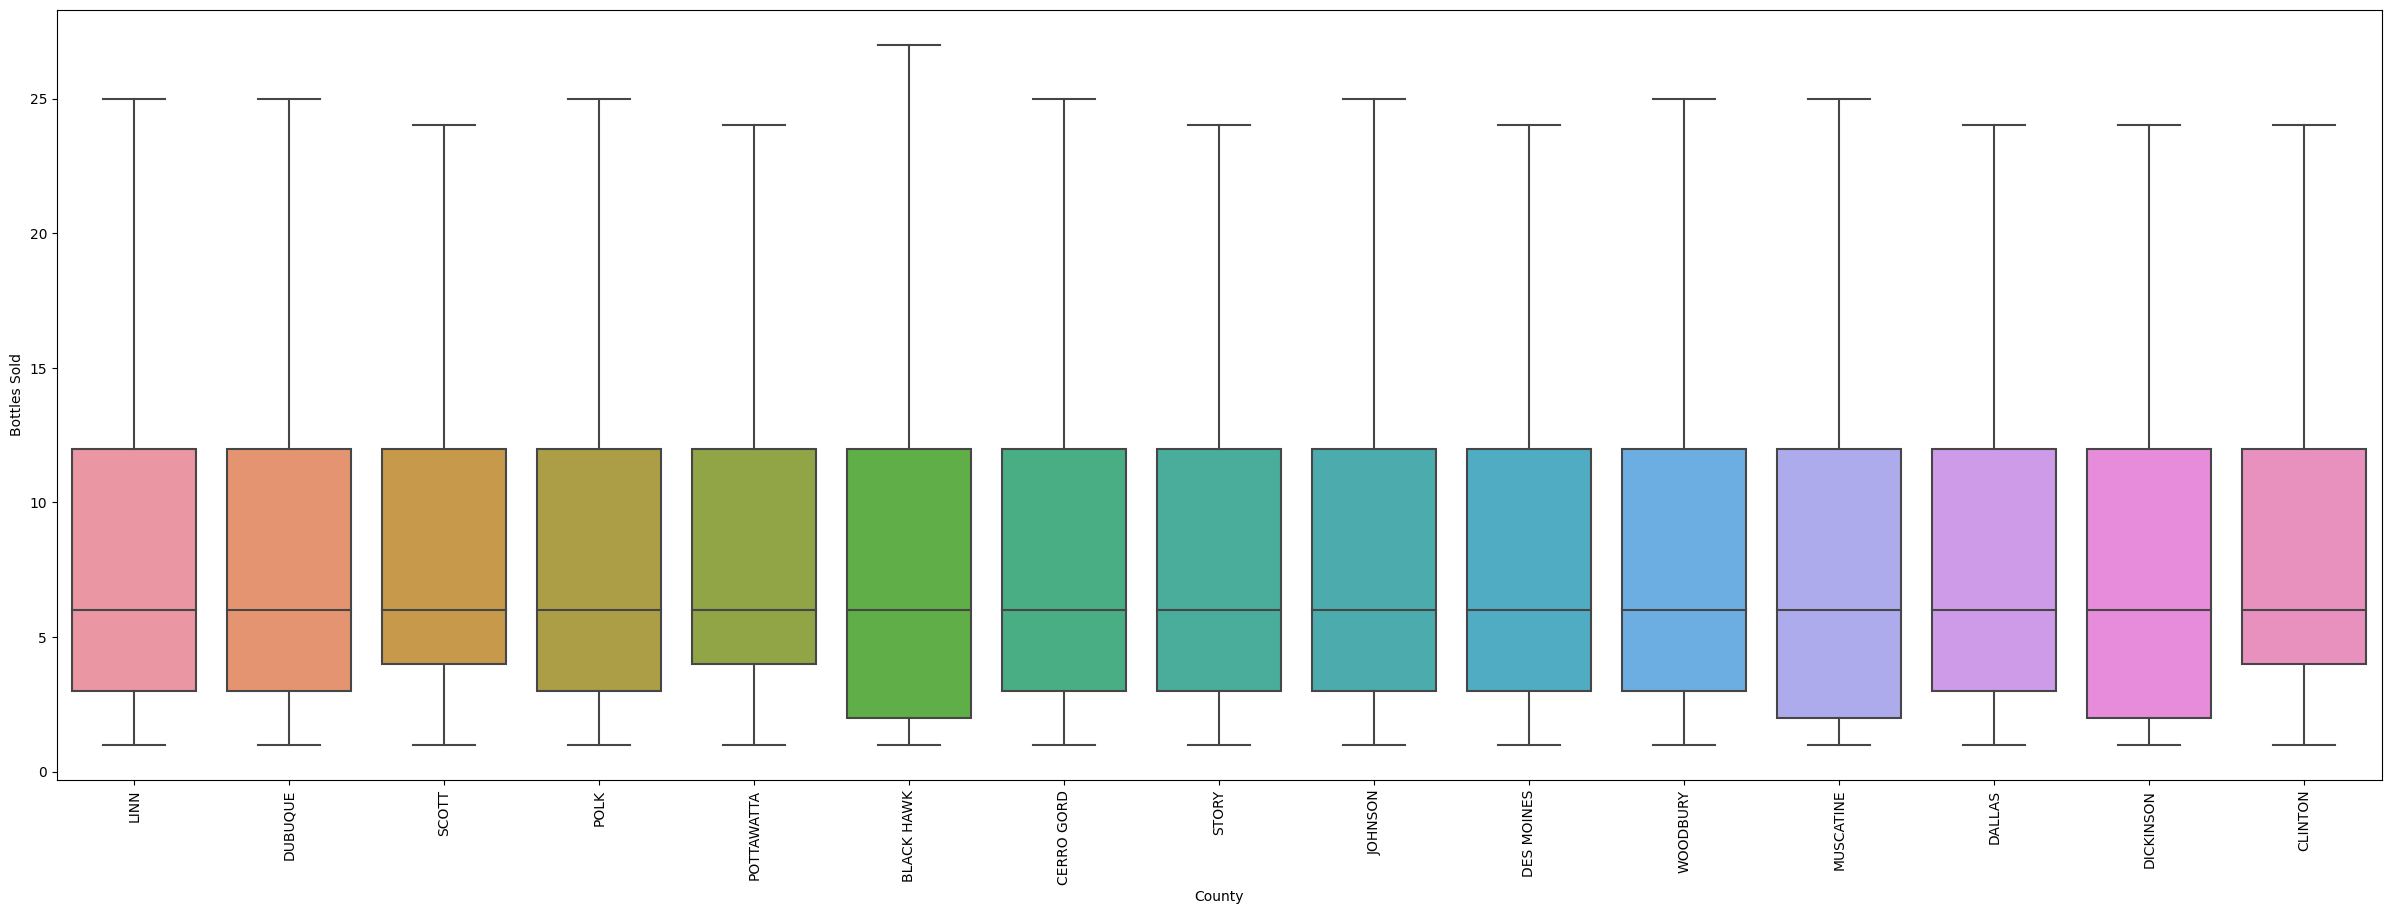

In [ ]:
plot_box_cat_quan('County','Bottles Sold',15,county_s)


The median of bottle sold per order in all counties is of 6. All distributions are similar with some differences is counties as Scorr, Pottawatta, Dallas, and Clinton.

###### County ->  state bottle retail

In [ ]:


ds_cat_volume = relation_cat_quant_descr('County','State Bottle Retail',county_s,10)
ds_cat_volume.head(10)

POLK           LINN          SCOTT     BLACK HAWK  \
count   376628.000000  164116.000000  116434.000000  113913.000000   
mean        17.225858      16.304931      16.538645      16.521243   
std         16.440228      17.215645      16.454255      14.504385   
min          0.500000       1.340000       1.340000       0.500000   
25%          8.480000       8.250000       8.000000       8.250000   
50%         13.310000      12.900000      12.750000      12.990000   
75%         21.750000      20.250000      20.730000      20.250000   
max       2775.000000    2775.000000    1875.000000     824.990000   
median      13.310000      12.900000      12.750000      12.990000   

             JOHNSON     WOODBURY    POTTAWATTA         STORY       DUBUQUE  \
count   95835.000000  67005.00000  64650.000000  58951.000000  55304.000000   
mean       17.777269     15.85404     15.135938     17.505882     16.435472   
std        16.419589     12.69243     12.461692     17.590559     13.078849   
min         0.500000      1.34000      0.500000      1.340000      1.340000   
25%         9.000000      8.13000      7.740000      9.750000      8.490000   
50%        13.590000     12.75000     12.000000     13.800000     13.110000   
75%        22.490000     19.52000     18.890000     22.490000     20.250000   
max       824.990000    323.64000    300.000000   2775.000000    281.250000   
median     13.590000     12.75000     12.000000     13.800000     13.110000   

          CERRO GORD  
count   39291.000000  
mean       17.715990  
std        15.694278  
min         1.340000  
25%         9.620000  
50%        13.710000  
75%        22.130000  
max       323.640000  
median     13.710000

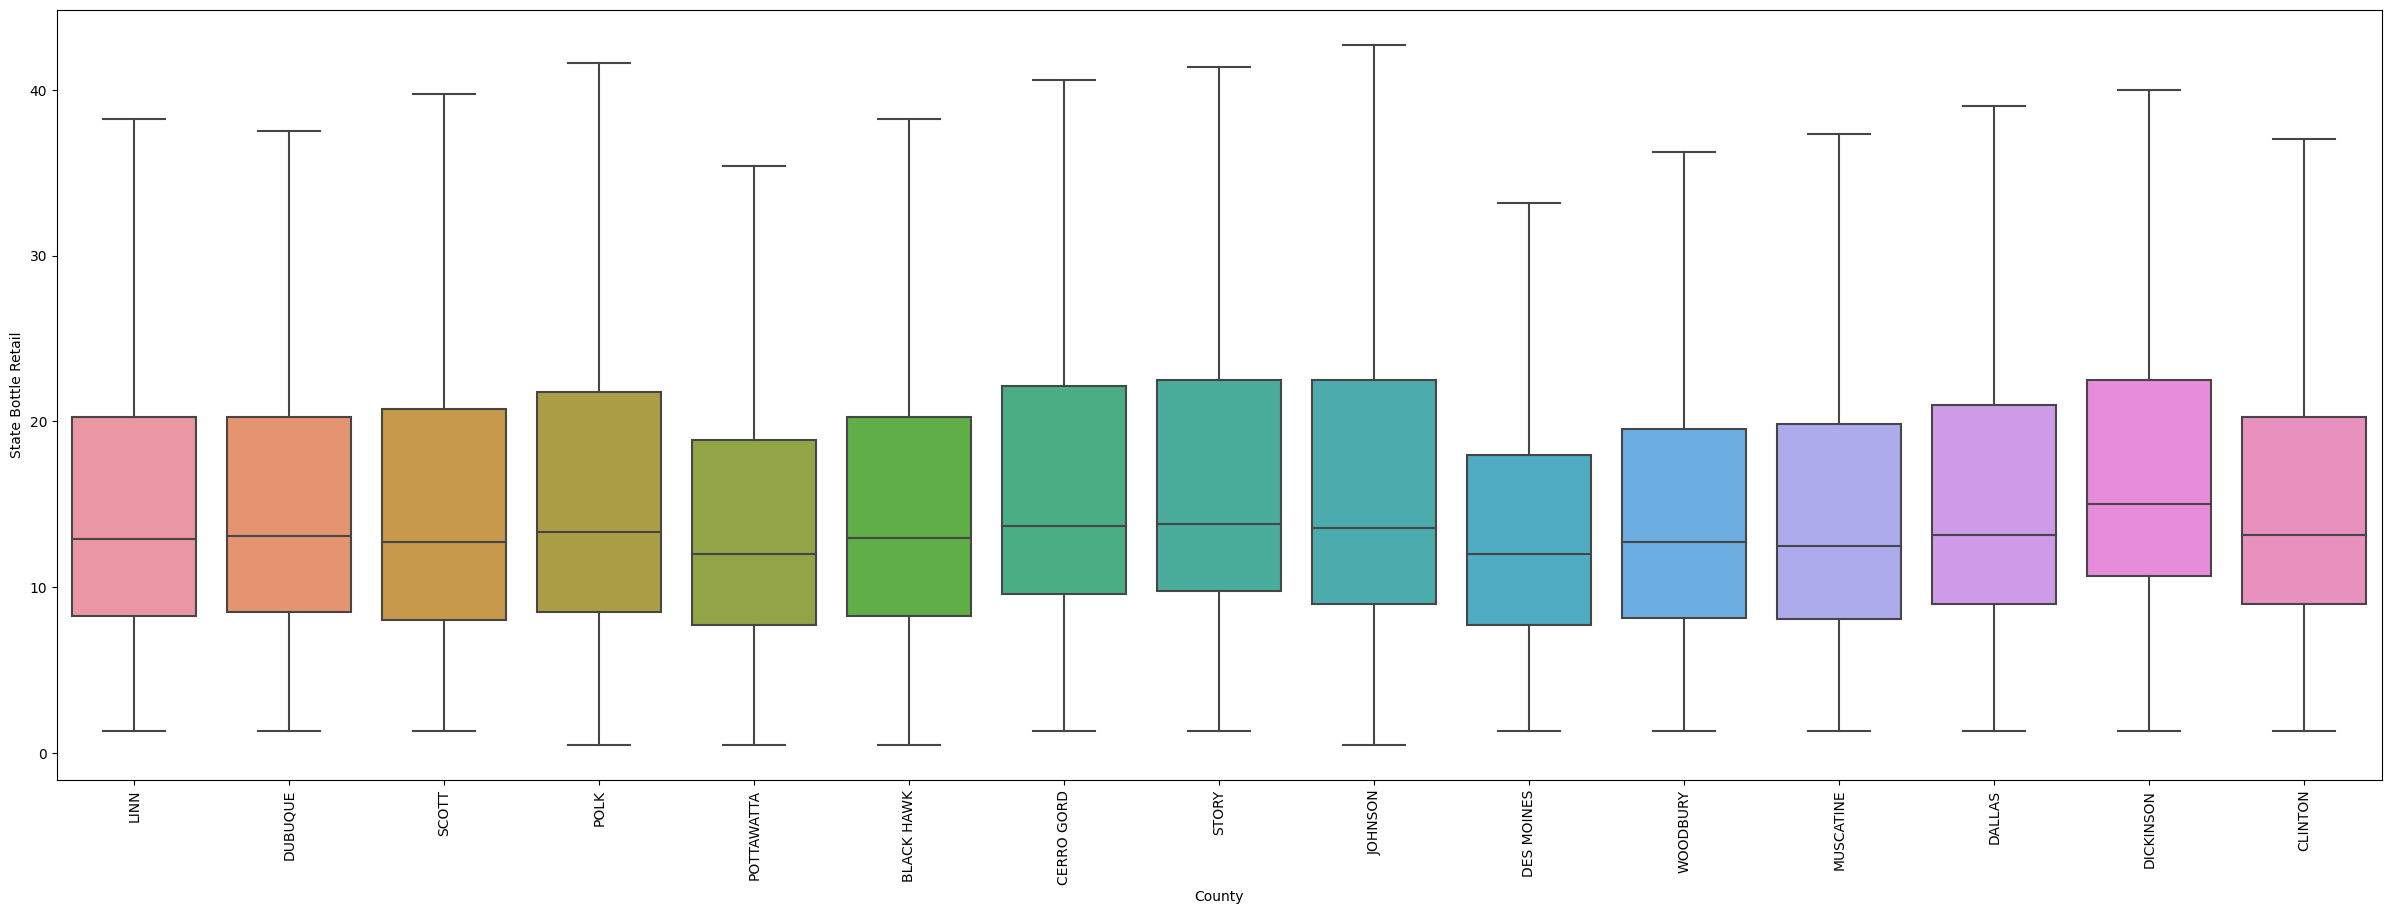

In [ ]:
plot_box_cat_quan('County','State Bottle Retail',15,county_s)


State bottle retail median values across counties are between 12.75 and 13.8. And IQR seems to be similar in all counties with valoues of IQR around 12

###### County -> state bttle cost

In [ ]:


ds_cat_volume = relation_cat_quant_descr('County','State Bottle Cost',county_s,10)
ds_cat_volume.head(10)


POLK           LINN          SCOTT     BLACK HAWK  \
count   376628.000000  164116.000000  116434.000000  113913.000000   
mean        11.482413      10.867584      11.023410      11.011368   
std         10.961606      11.477080      10.969656       9.670937   
min          0.330000       0.890000       0.890000       0.330000   
25%          5.540000       5.500000       5.330000       5.500000   
50%          8.870000       8.600000       8.500000       8.660000   
75%         14.500000      13.500000      13.820000      13.500000   
max       1850.000000    1850.000000    1250.000000     549.990000   
median       8.870000       8.600000       8.500000       8.660000   

             JOHNSON      WOODBURY    POTTAWATTA         STORY       DUBUQUE  \
count   95835.000000  67005.000000  64650.000000  58951.000000  55304.000000   
mean       11.848335     10.566856     10.087884     11.668579     10.954421   
std        10.946099      8.461154      8.308377     11.726757      8.719271   
min         0.330000      0.890000      0.330000      0.890000      0.890000   
25%         6.000000      5.420000      5.160000      6.500000      5.650000   
50%         9.060000      8.500000      8.000000      9.200000      8.740000   
75%        14.990000     13.010000     12.590000     14.990000     13.500000   
max       549.990000    215.760000    200.000000   1850.000000    187.500000   
median      9.060000      8.500000      8.000000      9.200000      8.740000   

          CERRO GORD  
count   39291.000000  
mean       11.809785  
std        10.463990  
min         0.890000  
25%         6.410000  
50%         9.140000  
75%        14.750000  
max       215.760000  
median      9.140000

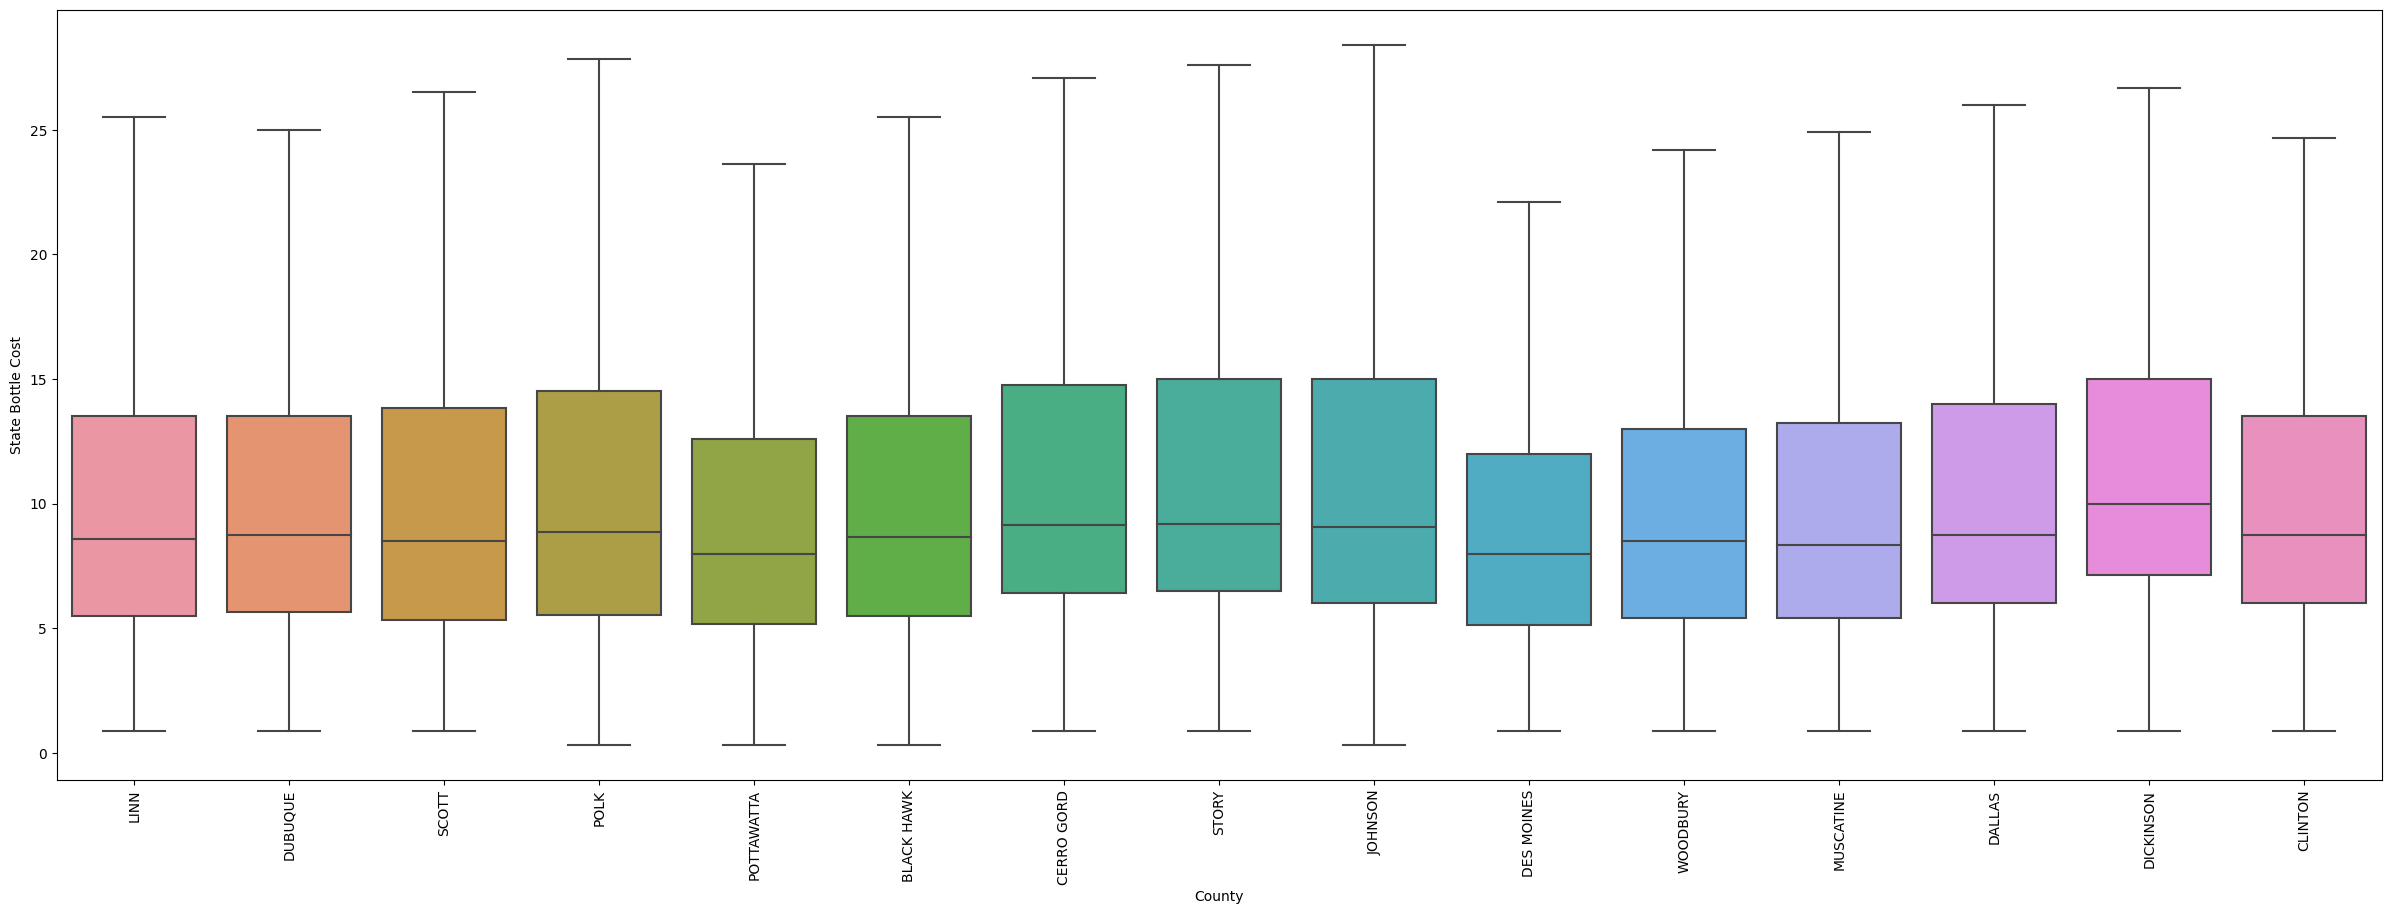

In [ ]:
plot_box_cat_quan('County','State Bottle Cost',15,county_s)


Median values of State bottle cost among counties are between 8 and 9

###### County ->  pack)

In [ ]:

ds_cat_volume = relation_cat_quant_descr('County','Pack',county_s,10)
ds_cat_volume.head(10)


POLK           LINN          SCOTT     BLACK HAWK  \
count   376628.000000  164116.000000  116434.000000  113913.000000   
mean        12.474394      12.672134      13.064311      12.661733   
std          8.477966       8.617924       9.412376       8.605233   
min          1.000000       1.000000       1.000000       1.000000   
25%          6.000000       6.000000       6.000000       6.000000   
50%         12.000000      12.000000      12.000000      12.000000   
75%         12.000000      12.000000      12.000000      12.000000   
max         60.000000      60.000000      60.000000      60.000000   
median      12.000000      12.000000      12.000000      12.000000   

             JOHNSON      WOODBURY    POTTAWATTA         STORY       DUBUQUE  \
count   95835.000000  67005.000000  64650.000000  58951.000000  55304.000000   
mean       11.946199     12.804686     13.388198     11.263897     12.050900   
std         7.669445      8.902287      9.770146      6.546313      7.758212   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%         6.000000      6.000000      6.000000      6.000000      6.000000   
50%        12.000000     12.000000     12.000000     12.000000     12.000000   
75%        12.000000     12.000000     12.000000     12.000000     12.000000   
max        60.000000     60.000000     60.000000     60.000000     60.000000   
median     12.000000     12.000000     12.000000     12.000000     12.000000   

          CERRO GORD  
count   39291.000000  
mean       11.406709  
std         7.471890  
min         1.000000  
25%         6.000000  
50%        12.000000  
75%        12.000000  
max        60.000000  
median     12.000000

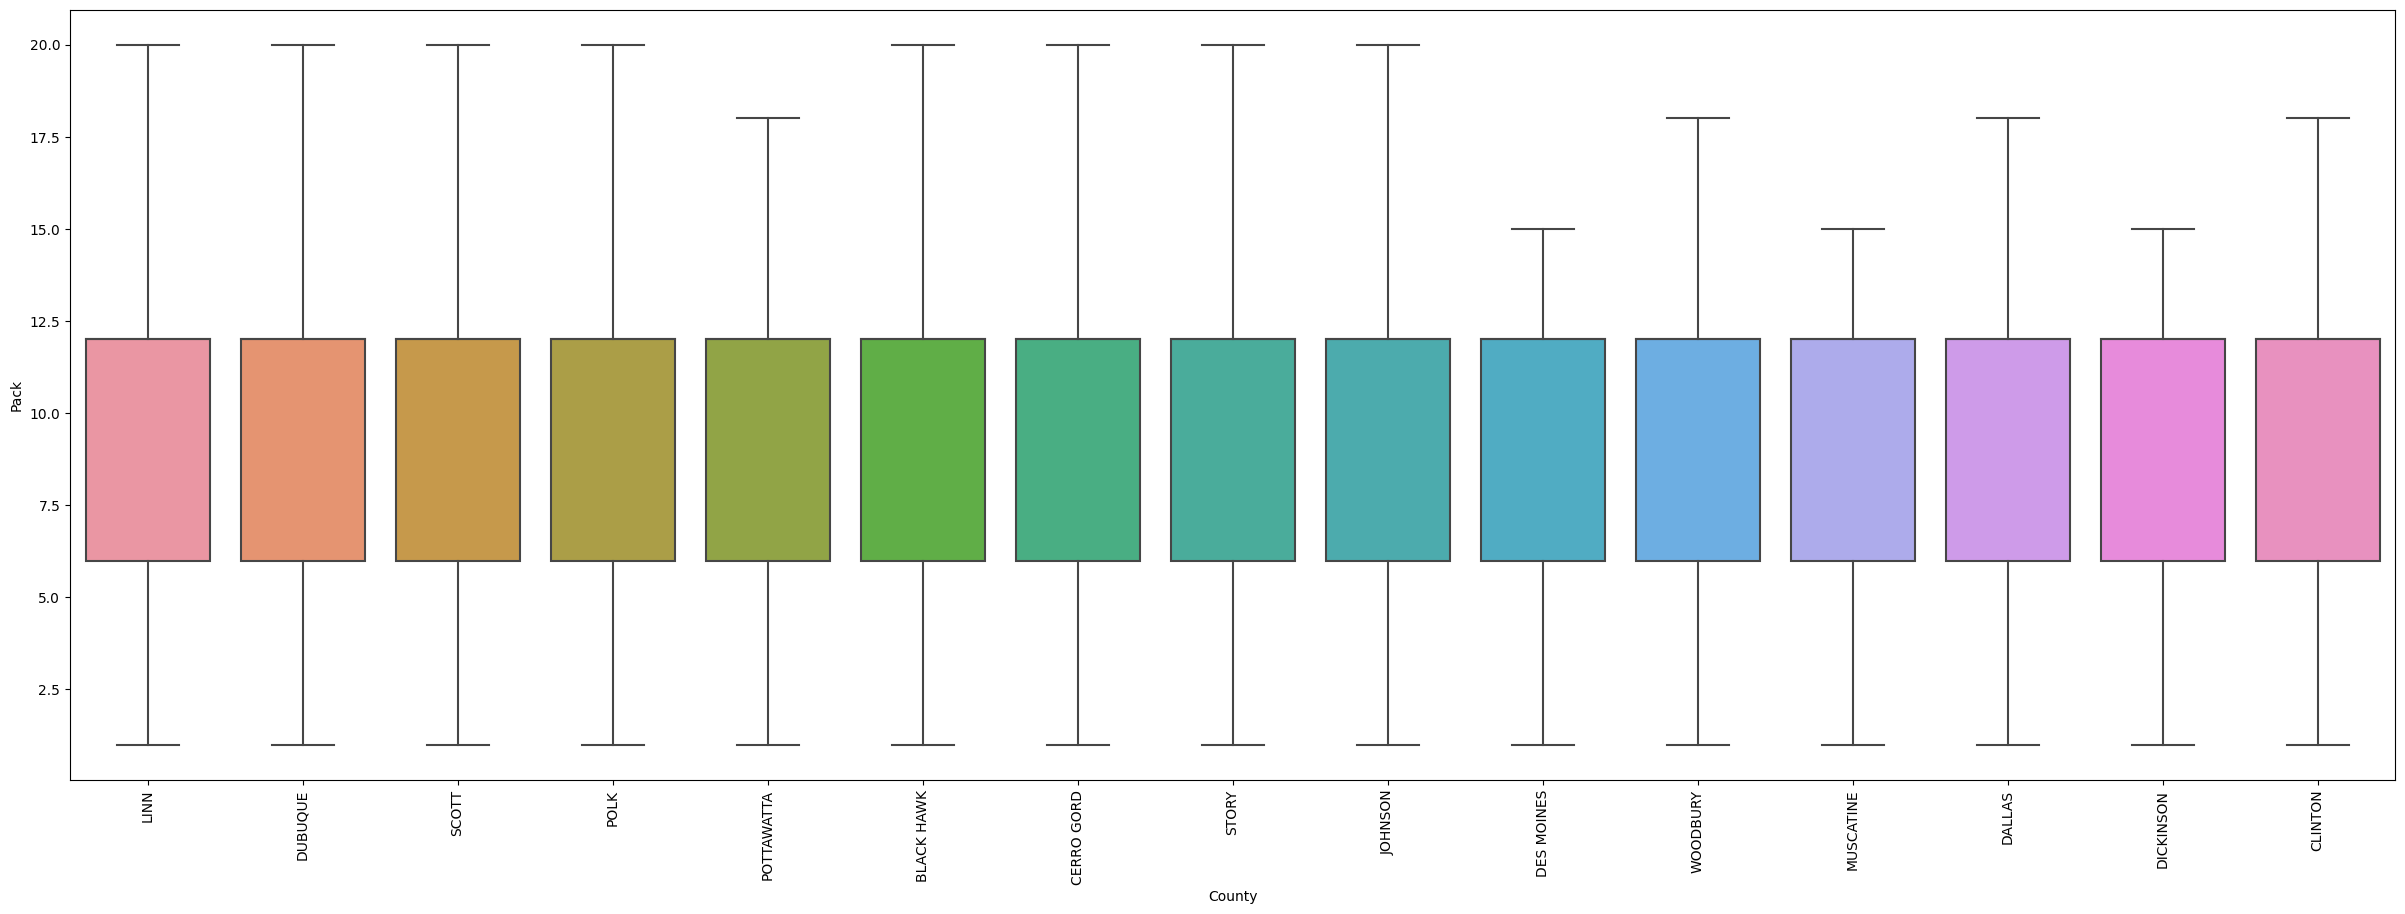

In [ ]:
plot_box_cat_quan('County','Pack',15,county_s)


Distribitions are similar and there are no big differences of pack values per county. All median values are 12 pack.

##### 1.2.1.4 vendor ->  (Sold (liters), Sale (Dollars), bottles sold, state bottle retail, state bttle cost, pack)

In [ ]:
print(cat_cols)

['Store Name', 'Invoice/Item Number', 'Vendor Name', 'Date', 'Store Location', 'Address', 'Item Description', 'City', 'County', 'Category Name']


###### vendor -> Sold (liters)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Vendor Name','Volume Sold (Liters)',vendor_s,10)
ds_cat_volume.head(10)


DIAGEO AMERICAS  SAZERAC COMPANY  INC  JIM BEAM BRANDS  \
count     311119.000000         201356.000000    170094.000000   
mean           8.845419             11.430226         7.715311   
std           30.588519             53.242239        18.353785   
min            0.050000              0.050000         0.050000   
25%            1.500000              1.500000         1.500000   
50%            4.500000              6.000000         4.500000   
75%            9.000000             10.500000         9.600000   
max         4725.000000           7116.000000      2223.000000   
median         4.500000              6.000000         4.500000   

        HEAVEN HILL BRANDS      LUXCO INC  PERNOD RICARD USA       PROXIMO  \
count        155182.000000  142724.000000      115343.000000  88483.000000   
mean             12.345562      10.618599           7.658105      9.002344   
std              52.557796      23.394022          19.477340     20.300860   
min               0.050000       0.050000           0.050000      0.050000   
25%               2.620000       3.000000           1.500000      2.250000   
50%               9.000000       9.000000           4.500000      9.000000   
75%              10.500000      10.500000           9.000000     10.500000   
max            2100.000000    1320.000000        1917.000000    787.500000   
median            9.000000       9.000000           4.500000      9.000000   

        BACARDI USA INC  SAZERAC NORTH AMERICA  E & J GALLO WINERY  
count      87747.000000           86468.000000        69968.000000  
mean           7.481635              13.158514            5.551674  
std           18.109977              45.930686            9.466317  
min            0.050000               0.050000            0.050000  
25%            1.500000               1.750000            1.500000  
50%            4.500000               9.000000            3.000000  
75%            9.000000              10.500000            9.000000  
max          661.500000            3636.000000          525.000000  
median         4.500000               9.000000            3.000000

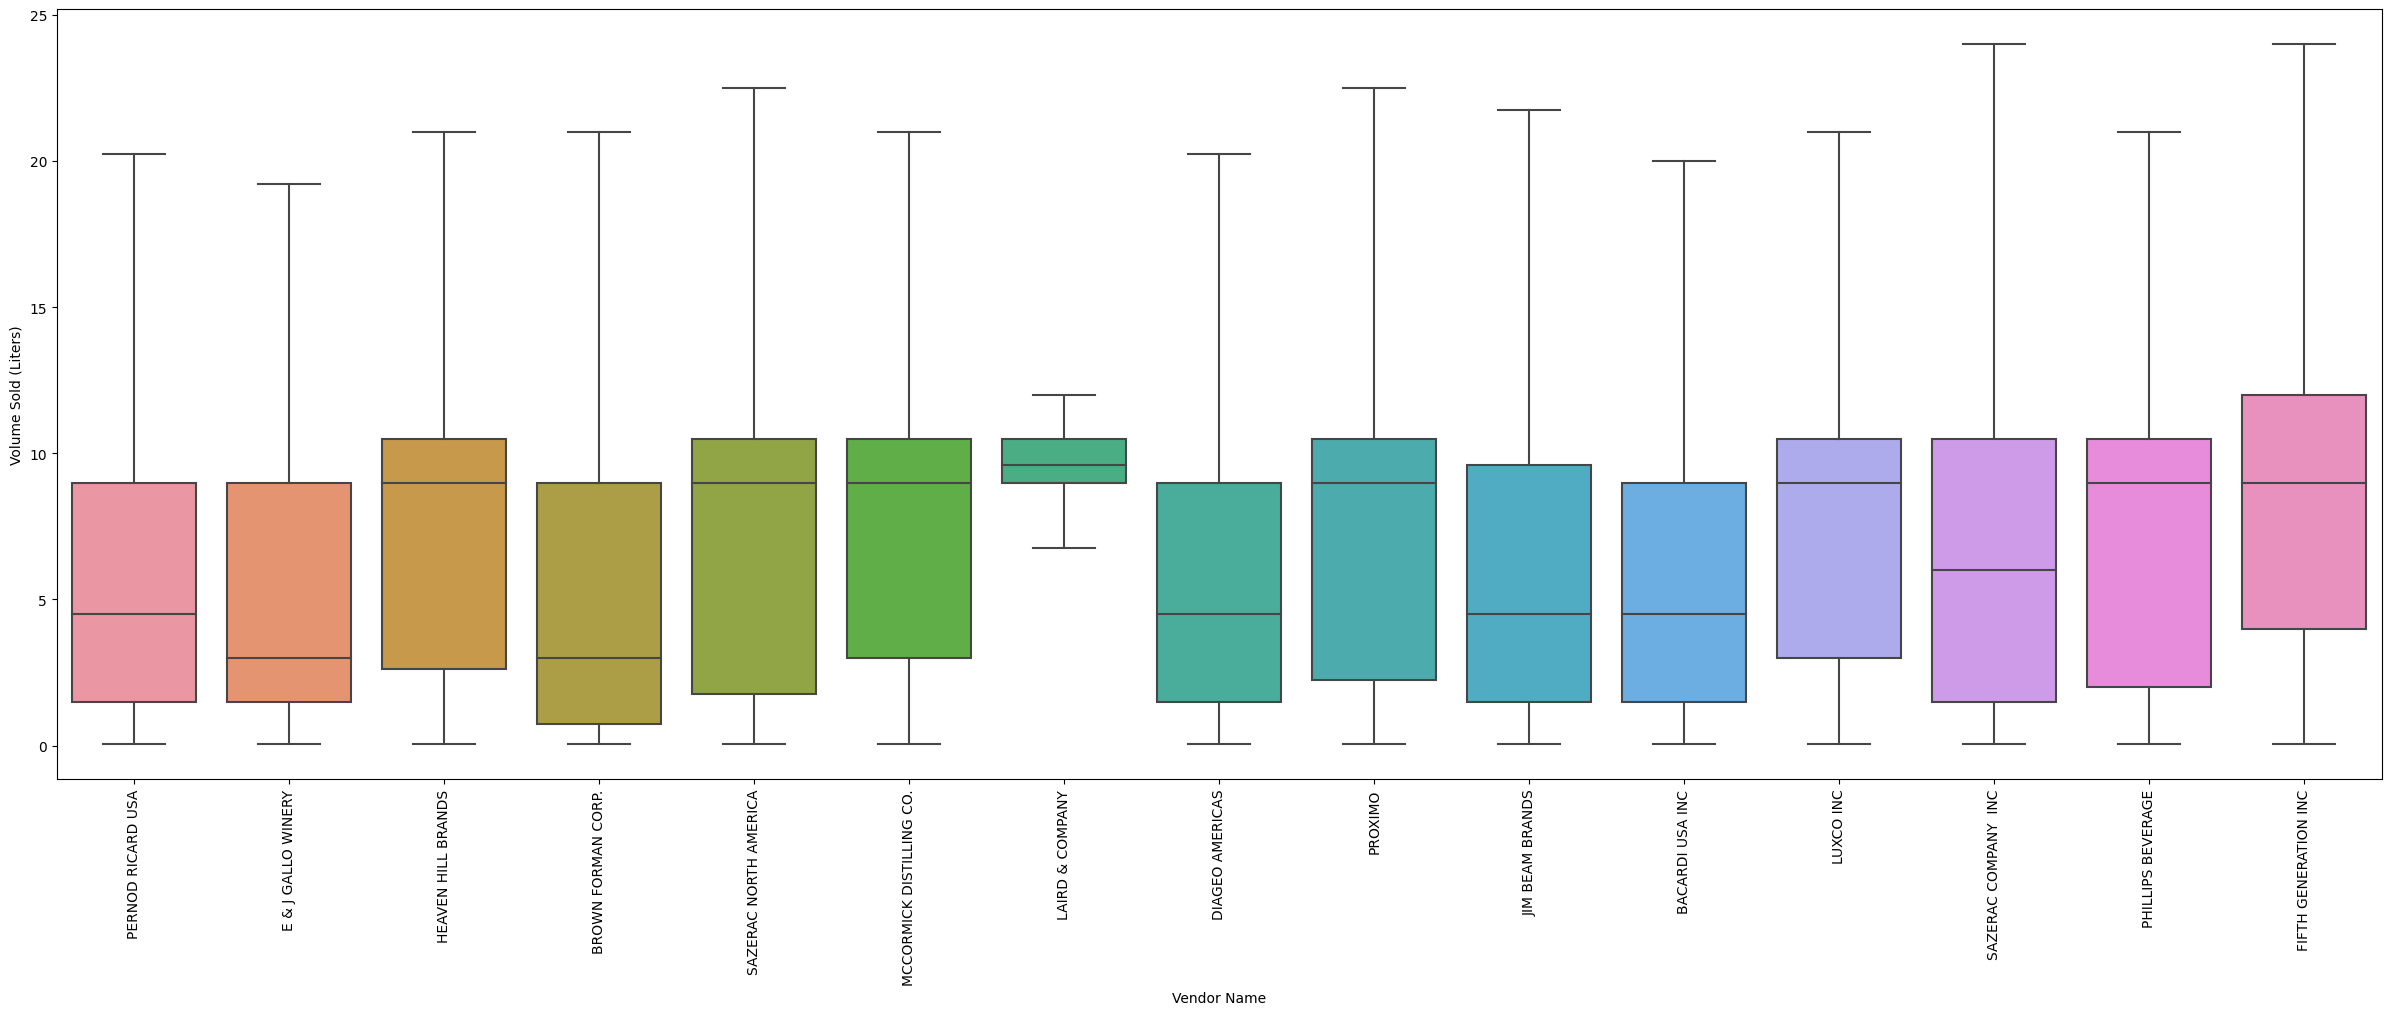

In [ ]:
plot_box_cat_quan('Vendor Name','Volume Sold (Liters)',15,vendor_s)


Laird and Company distributor sell only orders around 10 litters while other distributors have a wider range of volume sold per order. Diageo America sells in average 4.5 litters of liquor per order whil Heaven Hill brands sell an averaage value of 9

###### vendor ->  Sale (Dollars)

In [ ]:

ds_cat_volume = relation_cat_quant_descr('Vendor Name','Sale (Dollars)',vendor_s,10)
ds_cat_volume.head(10)

DIAGEO AMERICAS  SAZERAC COMPANY  INC  JIM BEAM BRANDS  \
count     311119.000000         201356.000000    170094.000000   
mean         202.610175            165.510575       139.742372   
std          686.088171            490.634684       413.446479   
min            0.000000              1.340000         1.880000   
25%           44.260000             46.200000        32.250000   
50%          116.640000             90.000000        90.120000   
75%          243.000000            177.840000       180.000000   
max       156807.000000          51528.960000     77805.000000   
median       116.640000             90.000000        90.120000   

        HEAVEN HILL BRANDS      LUXCO INC  PERNOD RICARD USA       PROXIMO  \
count        155182.000000  142724.000000      115343.000000  88483.000000   
mean            136.235778      86.872843         175.963130    131.936261   
std             477.390089     219.458606         490.562358    258.616621   
min               2.340000       1.730000           0.000000      4.500000   
25%              40.410000      33.000000          35.970000     44.640000   
50%              94.200000      64.560000         106.500000     78.660000   
75%             119.400000      90.000000         179.880000    188.160000   
max           18816.000000   15510.000000       50469.600000  12870.000000   
median           94.200000      64.560000         106.500000     78.660000   

        BACARDI USA INC  SAZERAC NORTH AMERICA  E & J GALLO WINERY  
count      87747.000000           86468.000000        69968.000000  
mean         192.822915              99.281241           86.922165  
std          472.830939             307.546339          134.851602  
min            3.750000               1.340000            1.500000  
25%           42.000000              36.000000           22.500000  
50%          110.960000              62.280000           63.000000  
75%          180.000000              83.160000          130.320000  
max        29700.000000           21670.560000         6750.000000  
median       110.960000              62.280000           63.000000

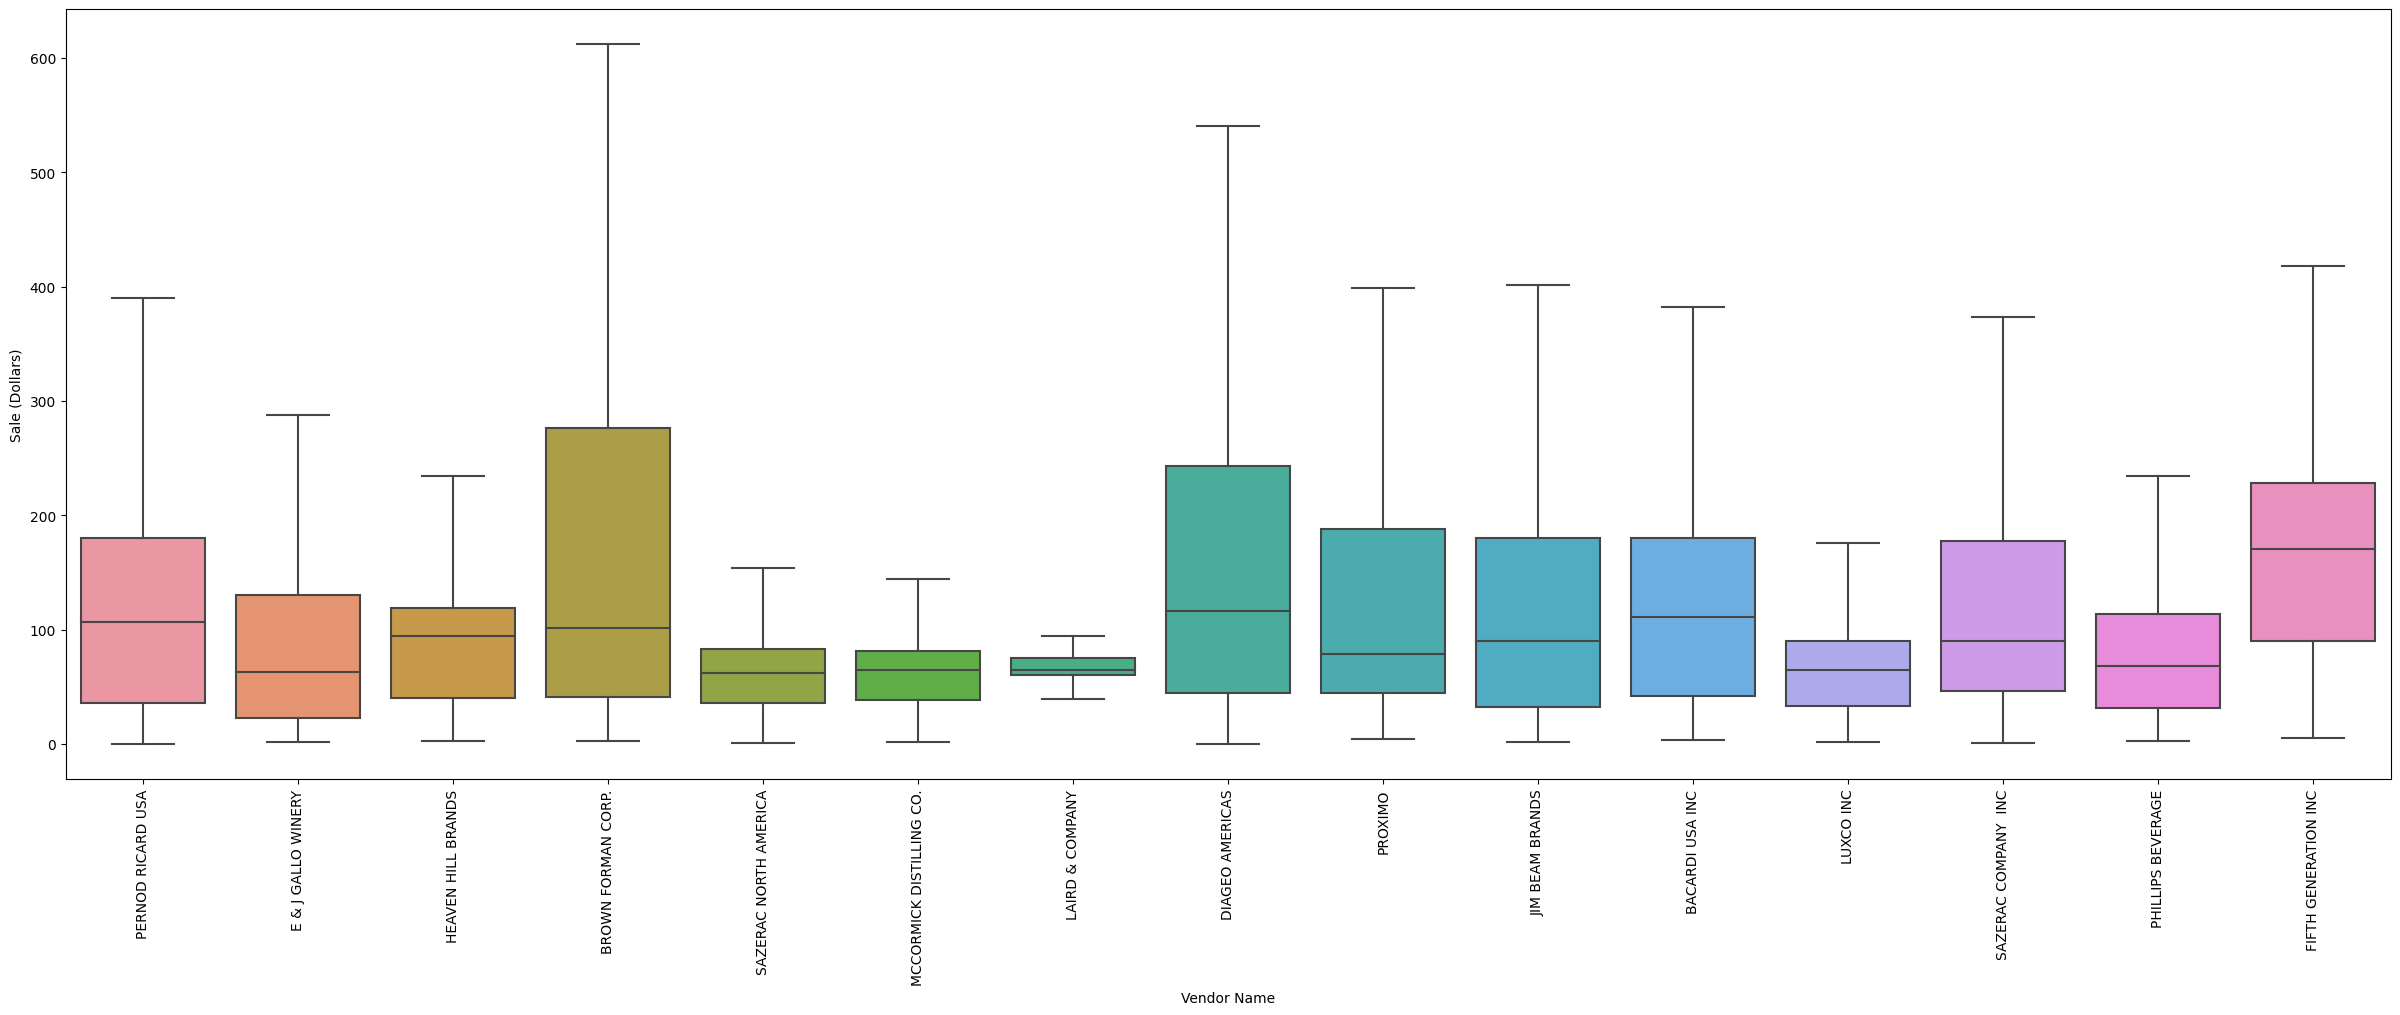

In [ ]:
plot_box_cat_quan('Vendor Name','Sale (Dollars)',15,vendor_s)


Diageo Americas and Brown Forman Corp sell a wider range of dollars per order. Brown forman Corp sale in dollars IQR is 250 dollars. Laird and Company have the shorter distribution. The mean of dollars sold per order of their company is around 90 dollars

###### vendor -> bottles sold

In [ ]:


ds_cat_volume = relation_cat_quant_descr('Vendor Name','Bottles Sold',vendor_s,10)
ds_cat_volume.head(10)

DIAGEO AMERICAS  SAZERAC COMPANY  INC  JIM BEAM BRANDS  \
count     311119.000000         201356.000000    170094.000000   
mean          10.600568             21.097688         9.423231   
std           29.548962             55.083635        19.095797   
min            1.000000              1.000000         1.000000   
25%            3.000000              3.000000         3.000000   
50%            6.000000              6.000000         6.000000   
75%           12.000000             12.000000        12.000000   
max         6300.000000           7116.000000      2964.000000   
median         6.000000              6.000000         6.000000   

        HEAVEN HILL BRANDS      LUXCO INC  PERNOD RICARD USA       PROXIMO  \
count        155182.000000  142724.000000      115343.000000  88483.000000   
mean             12.074010      10.764090          10.041693      8.823672   
std              31.144282      22.869037          23.286180     17.639889   
min               1.000000       1.000000           1.000000      1.000000   
25%               4.000000       4.000000           2.000000      3.000000   
50%               6.000000       6.000000           6.000000      6.000000   
75%              12.000000      12.000000          12.000000     12.000000   
max            1200.000000    1320.000000        2556.000000    912.000000   
median            6.000000       6.000000           6.000000      6.000000   

        BACARDI USA INC  SAZERAC NORTH AMERICA  E & J GALLO WINERY  
count      87747.000000           86468.000000        69968.000000  
mean           8.901022              13.176458            9.671979  
std           16.174849              39.948673           14.776262  
min            1.000000               1.000000            1.000000  
25%            2.000000               4.000000            3.000000  
50%            6.000000               6.000000            6.000000  
75%           12.000000              12.000000           12.000000  
max          720.000000            3636.000000          672.000000  
median         6.000000               6.000000            6.000000

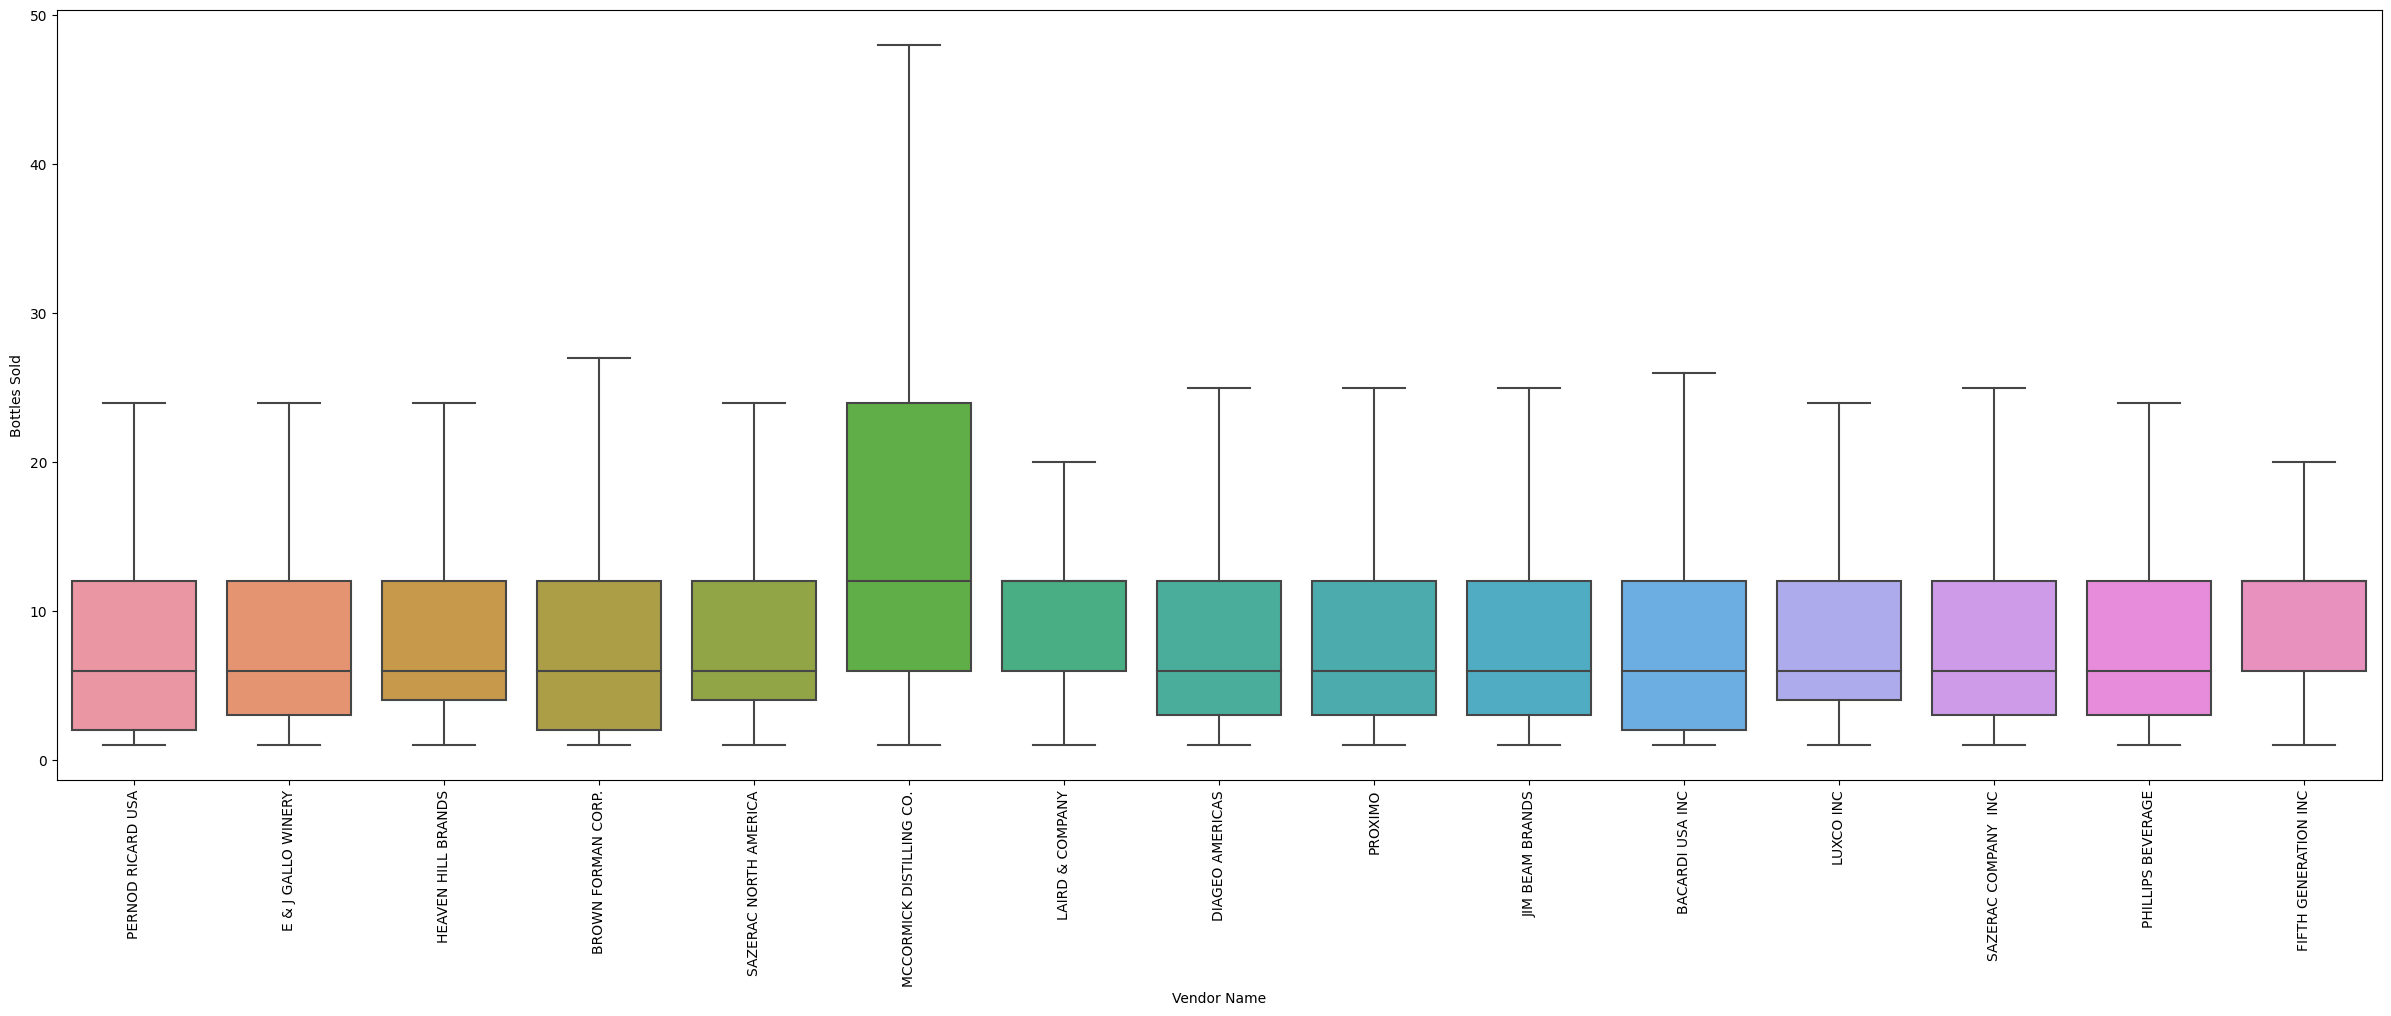

In [ ]:
plot_box_cat_quan('Vendor Name','Bottles Sold',15,vendor_s)


Bottles sold per order distributions are centered in 6 for the majority of distributors. Only Mccormick Distilling Co. have a median higher than 10

###### vendor ->  state bottle retail

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Vendor Name','State Bottle Retail',vendor_s,10)
ds_cat_volume.head(10)

DIAGEO AMERICAS  SAZERAC COMPANY  INC  JIM BEAM BRANDS  \
count     311119.000000         201356.000000    170094.000000   
mean          20.058692             15.908930        15.752894   
std           15.192916             19.737932         9.507260   
min            2.630000              1.340000         1.880000   
25%           12.000000              7.740000         9.710000   
50%           16.500000             12.990000        14.570000   
75%           24.750000             17.700000        18.750000   
max          281.250000           1875.000000        93.750000   
median        16.500000             12.990000        14.570000   

        HEAVEN HILL BRANDS      LUXCO INC  PERNOD RICARD USA       PROXIMO  \
count        155182.000000  142724.000000      115343.000000  88483.000000   
mean             12.059507       9.261697          19.219092     16.405109   
std               7.483981       6.263433          14.083688      7.092111   
min               2.340000       1.730000           1.460000      2.250000   
25%               7.850000       6.000000          11.240000     13.110000   
50%              11.240000       8.250000          14.990000     15.680000   
75%              15.680000      11.250000          24.740000     19.500000   
max             112.500000      97.500000         374.820000    187.500000   
median           11.240000       8.250000          14.990000     15.680000   

        BACARDI USA INC  SAZERAC NORTH AMERICA  E & J GALLO WINERY  
count      87747.000000           86468.000000        69968.000000  
mean          22.437888              10.214637           10.727989  
std           14.438389              10.222010            7.420902  
min            3.750000               1.340000            1.500000  
25%           12.390000               6.510000            5.250000  
50%           20.250000               9.000000           11.250000  
75%           27.740000              10.530000           11.250000  
max          300.000000              90.000000          216.990000  
median        20.250000               9.000000           11.250000

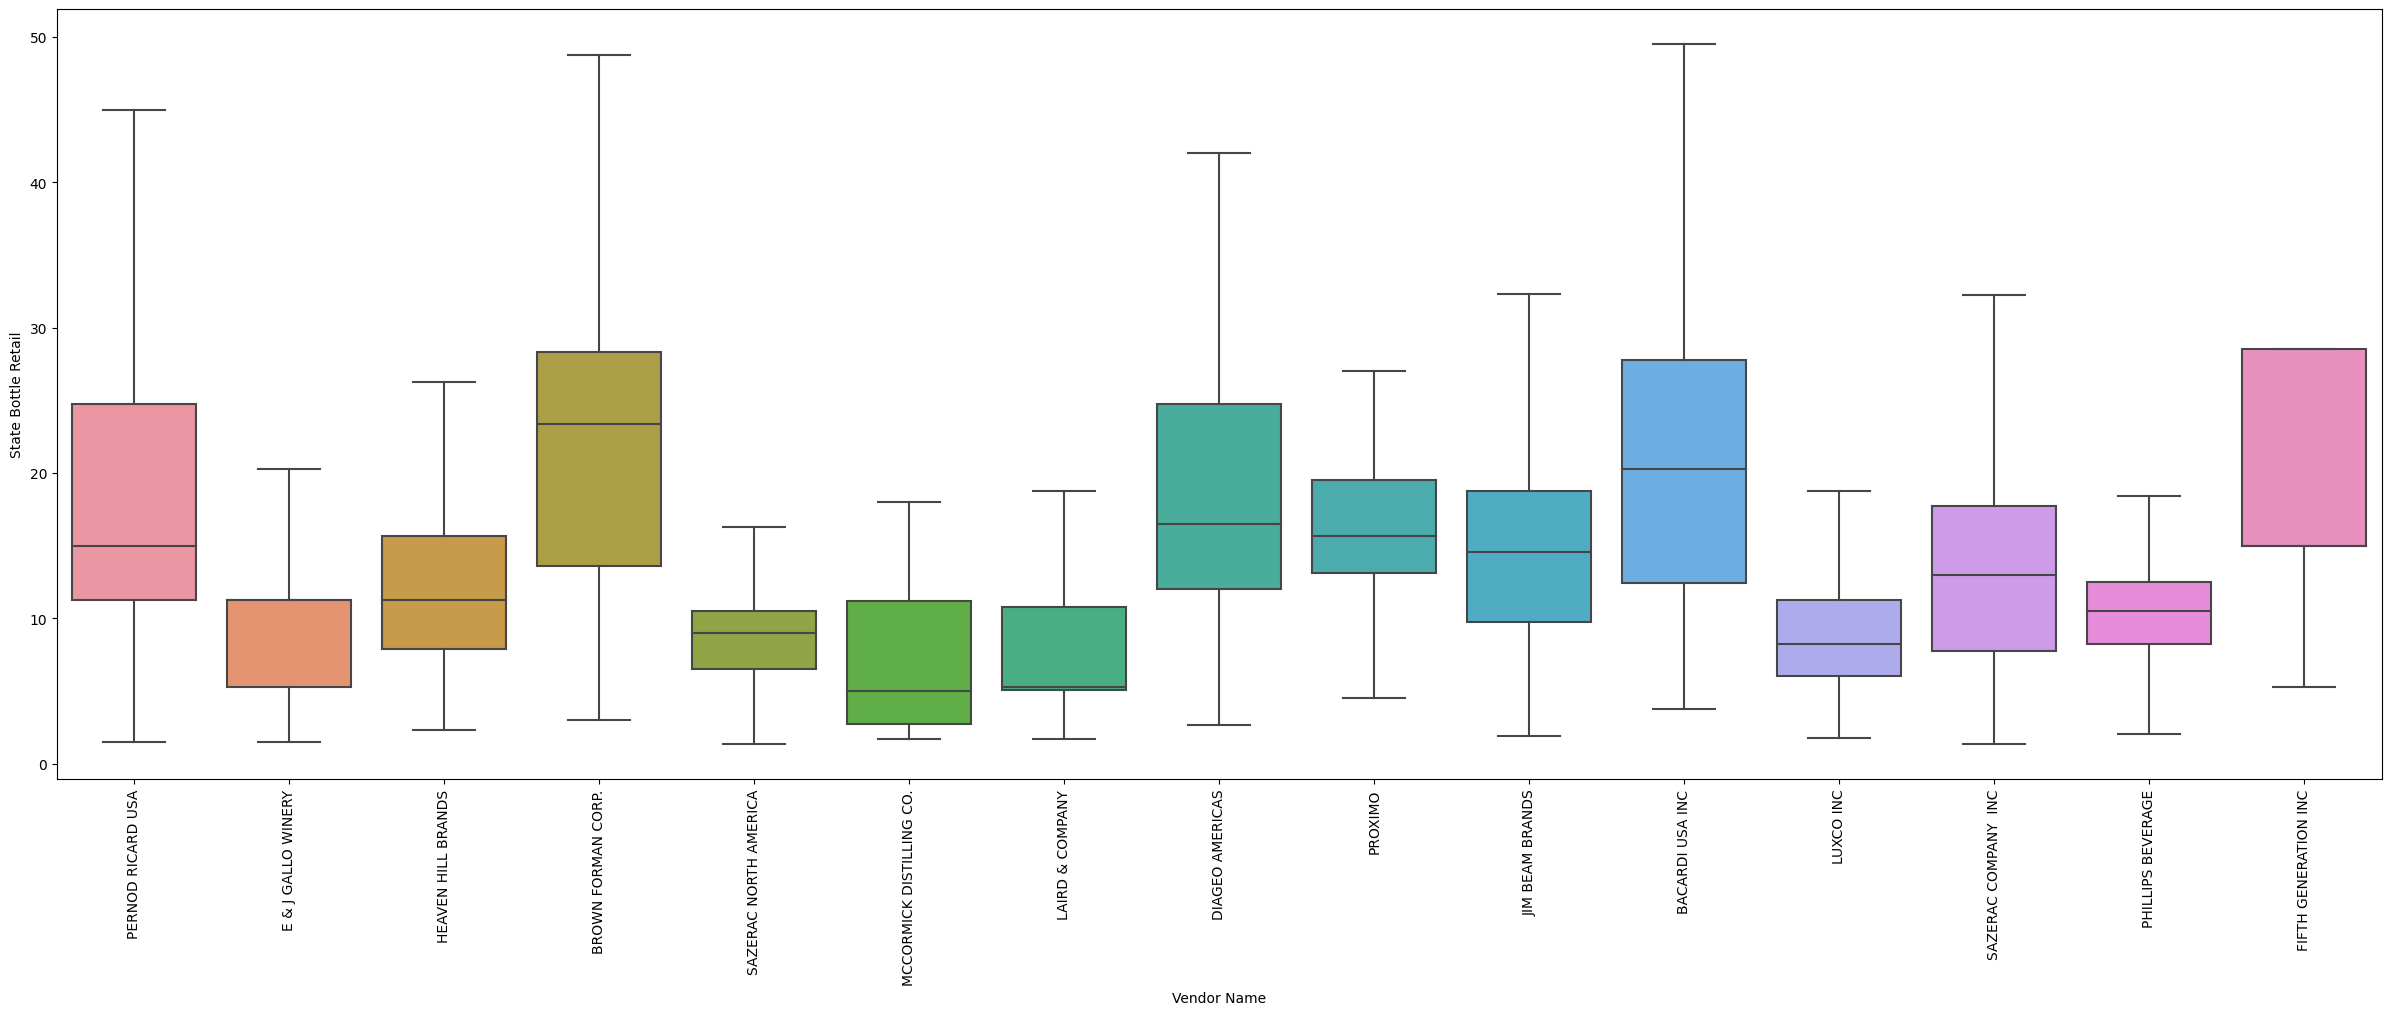

In [ ]:
plot_box_cat_quan('Vendor Name','State Bottle Retail',15,vendor_s)


State bottle retail by distributor seems to be much more different than by other categorical values. The medians are located between 8 and 16. Diageo Americas is the distributor with a higher median state bottle retail.

###### vendor -> state bttle cost

In [ ]:


ds_cat_volume = relation_cat_quant_descr('Vendor Name','State Bottle Cost',vendor_s,10)
ds_cat_volume.head(10)

DIAGEO AMERICAS  SAZERAC COMPANY  INC  JIM BEAM BRANDS  \
count     311119.000000         201356.000000    170094.000000   
mean          13.370593             10.612431        10.501177   
std           10.128502             13.170960         6.338464   
min            1.750000              0.890000         1.250000   
25%            8.000000              5.160000         6.470000   
50%           11.000000              8.660000         9.710000   
75%           16.500000             11.800000        12.500000   
max          187.500000           1250.000000        62.500000   
median        11.000000              8.660000         9.710000   

        HEAVEN HILL BRANDS      LUXCO INC  PERNOD RICARD USA       PROXIMO  \
count        155182.000000  142724.000000      115343.000000  88483.000000   
mean              8.037719       6.173390          12.810270     10.936083   
std               4.989483       4.175552           9.389506      4.727966   
min               1.560000       1.150000           0.970000      1.500000   
25%               5.230000       4.000000           7.490000      8.740000   
50%               7.490000       5.500000           9.990000     10.450000   
75%              10.450000       7.500000          16.490000     13.000000   
max              75.000000      65.000000         249.880000    125.000000   
median            7.490000       5.500000           9.990000     10.450000   

        BACARDI USA INC  SAZERAC NORTH AMERICA  E & J GALLO WINERY  
count      87747.000000           86468.000000        69968.000000  
mean          14.957835               6.808852            7.131869  
std            9.625554               6.814980            4.949549  
min            2.500000               0.890000            1.000000  
25%            8.260000               4.340000            3.500000  
50%           13.500000               6.000000            7.330000  
75%           18.490000               7.020000            7.500000  
max          200.000000              60.000000          144.660000  
median        13.500000               6.000000            7.330000

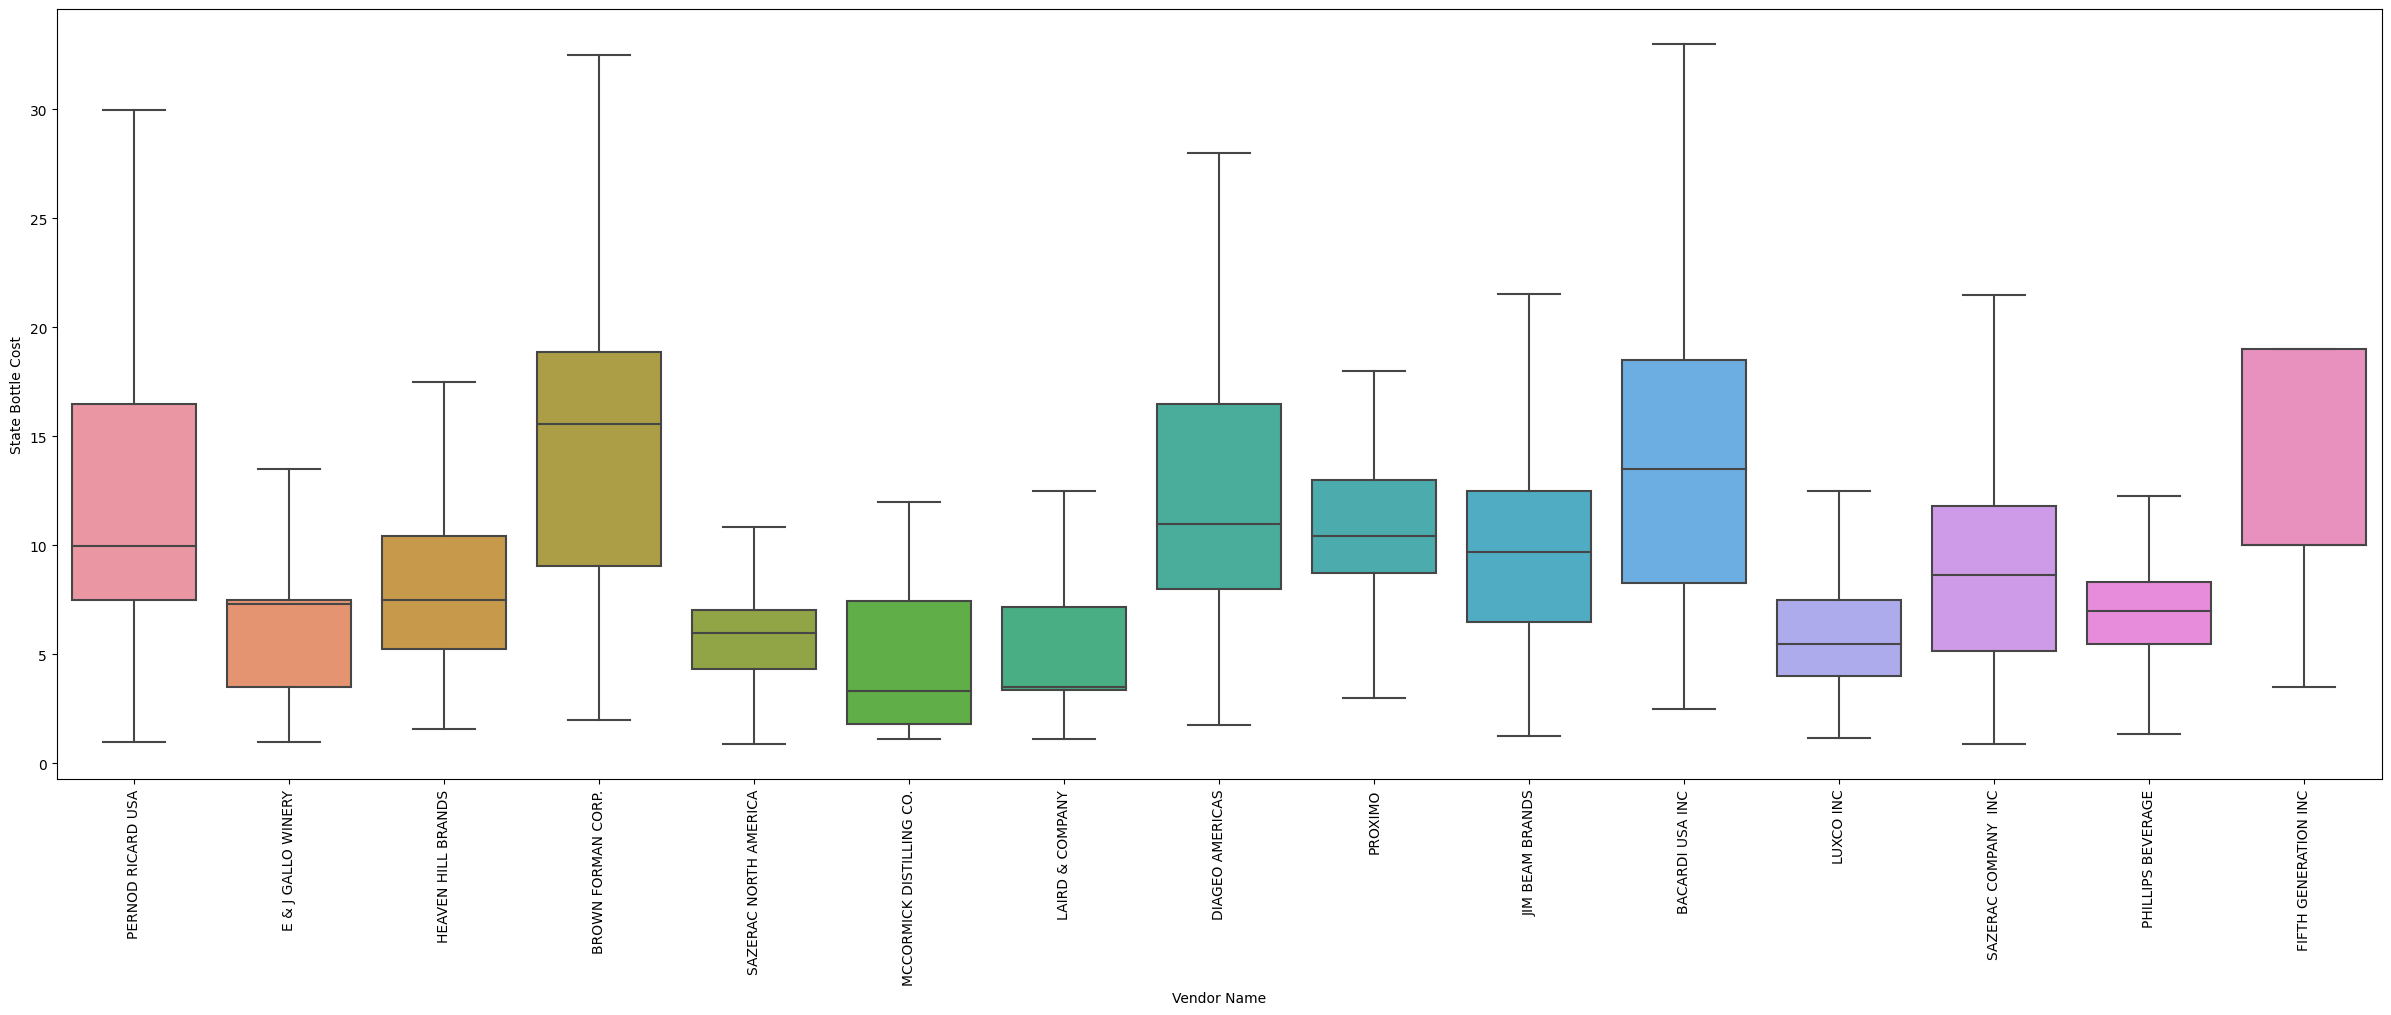

In [ ]:
plot_box_cat_quan('Vendor Name','State Bottle Cost',15,vendor_s)


State bottle median cost by distributor is located between 5.5 and 13.5 dollars. Brown Formann Corp. seems to have the higher median values of the distributors annalyzed

###### vendor ->  pack)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Vendor Name','Pack',vendor_s,10)
ds_cat_volume.head(10)

DIAGEO AMERICAS  SAZERAC COMPANY  INC  JIM BEAM BRANDS  \
count     311119.000000         201356.000000    170094.000000   
mean          12.951061             14.256998        12.124566   
std            7.333804             12.457316         6.979573   
min            3.000000              1.000000         3.000000   
25%           12.000000              6.000000        12.000000   
50%           12.000000             12.000000        12.000000   
75%           12.000000             12.000000        12.000000   
max           48.000000             48.000000        60.000000   
median        12.000000             12.000000        12.000000   

        HEAVEN HILL BRANDS     LUXCO INC  PERNOD RICARD USA       PROXIMO  \
count        155182.000000  142724.00000      115343.000000  88483.000000   
mean             11.816892      10.87527          12.692084     10.980878   
std               7.356732       5.41567           7.200794      8.481142   
min               1.000000       3.00000           3.000000      3.000000   
25%               6.000000       6.00000          10.000000      6.000000   
50%              12.000000      12.00000          12.000000     12.000000   
75%              12.000000      12.00000          12.000000     12.000000   
max              48.000000      48.00000          48.000000     48.000000   
median           12.000000      12.00000          12.000000     12.000000   

        BACARDI USA INC  SAZERAC NORTH AMERICA  E & J GALLO WINERY  
count      87747.000000           86468.000000        69968.000000  
mean          11.130477              10.916940           14.806440  
std            4.830573               9.051435            6.909549  
min            1.000000               1.000000            1.000000  
25%            6.000000               6.000000           12.000000  
50%           12.000000              10.000000           12.000000  
75%           12.000000              12.000000           24.000000  
max           48.000000              48.000000           48.000000  
median        12.000000              10.000000           12.000000

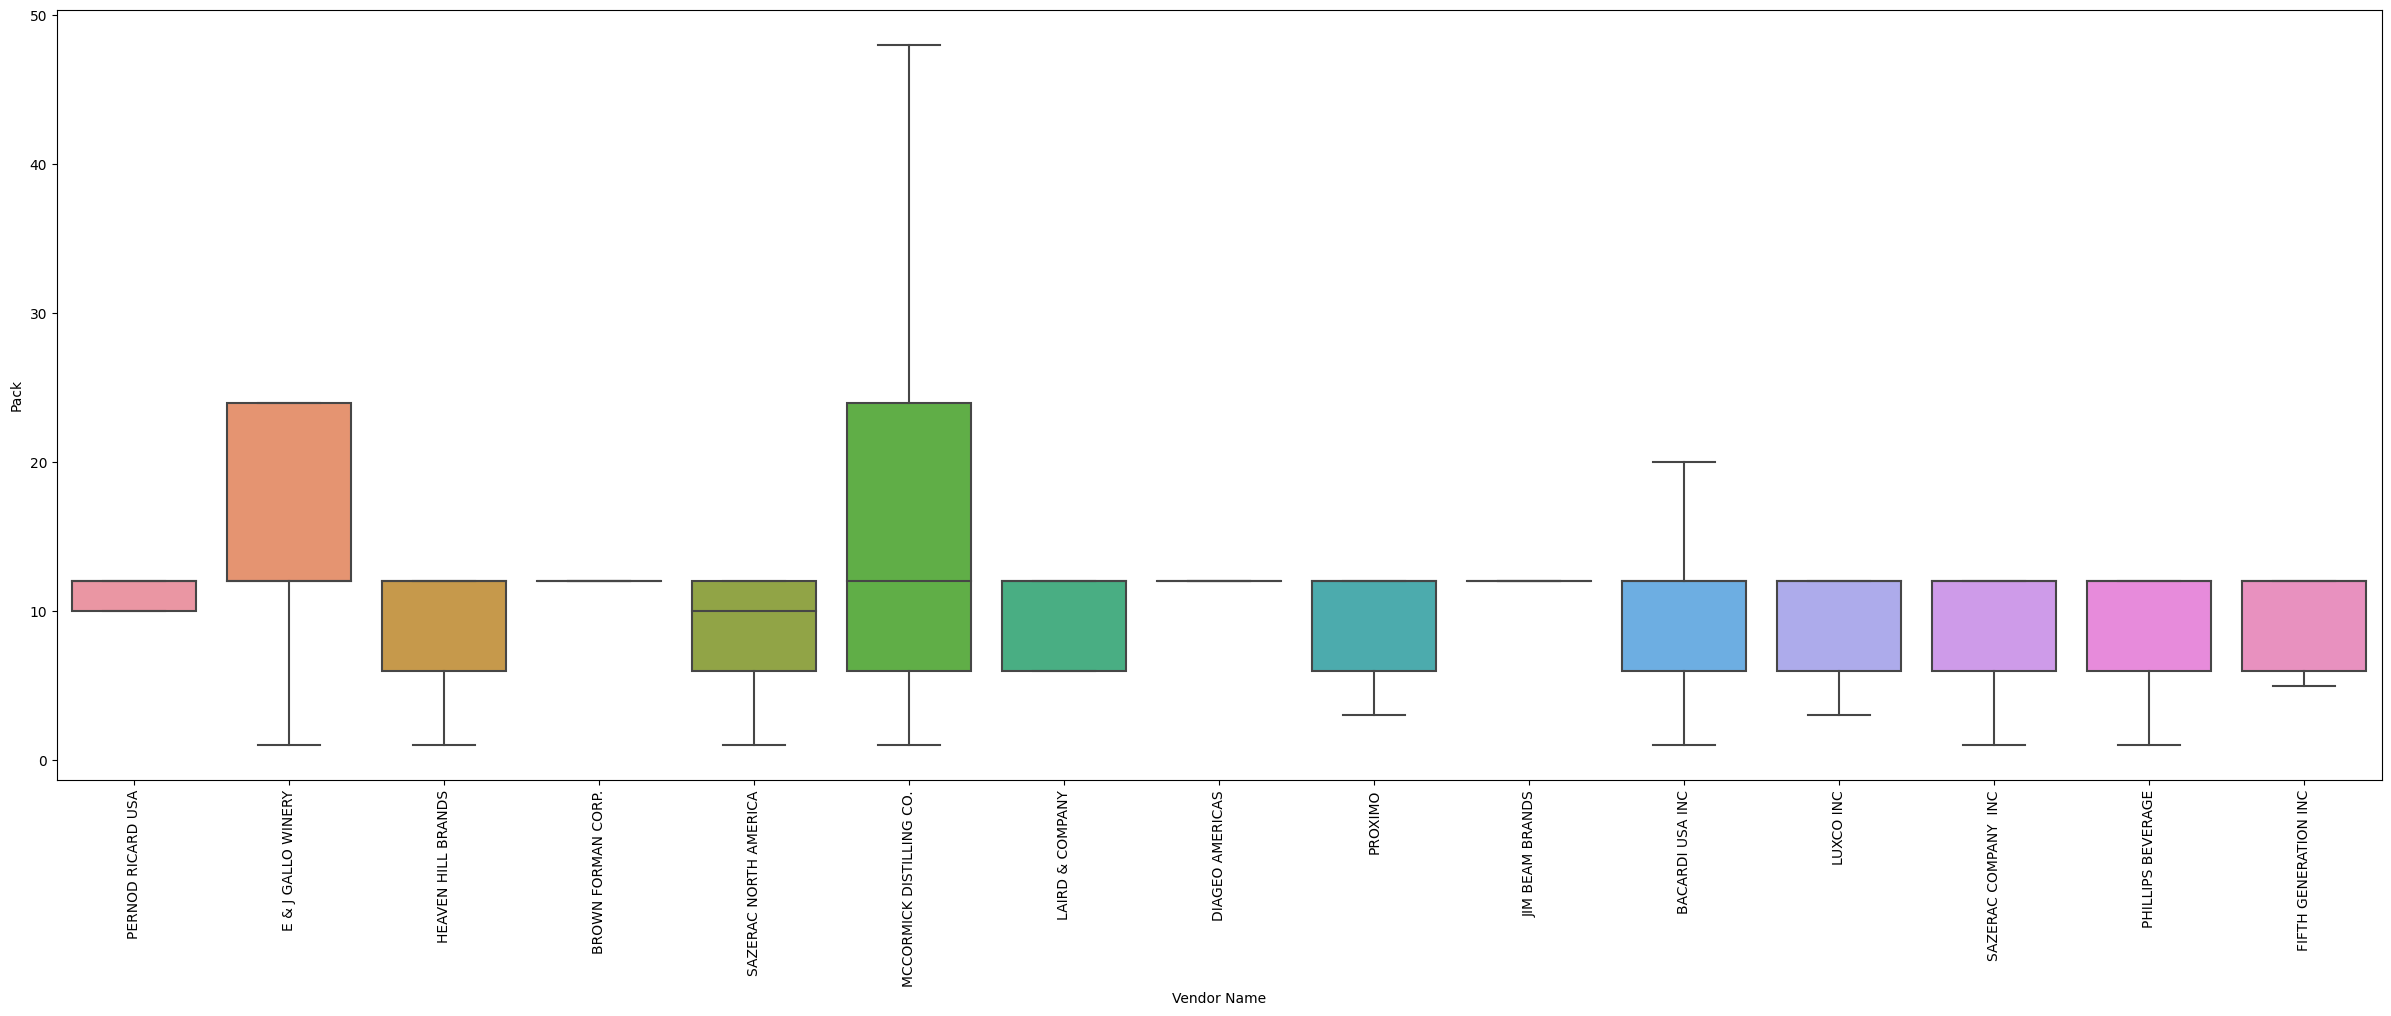

In [ ]:
plot_box_cat_quan('Vendor Name','Pack',15,vendor_s)


Pack by distributors median is 12. Only Saxerac northamerica have a median value of 10.

##### 1.2.1.5 store ->  (Sold (liters), Sale (Dollars), bottles sold, state bottle retail, state bttle cost, pack)

###### store -> Sold (liters)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Store Name','Volume Sold (Liters)',store_s,10)
ds_cat_volume.head(10)

HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
count                   13053.000000    12965.000000   
mean                       34.875184       32.958204   
std                       244.743290       65.619100   
min                         0.020000        0.050000   
25%                         9.000000        9.000000   
50%                        12.000000       12.000000   
75%                        24.000000       36.000000   
max                     13200.000000      900.000000   
median                     12.000000       12.000000   

        CENTRAL CITY LIQUOR, INC.  HY-VEE FOOD STORE / CEDAR FALLS  \
count                12737.000000                     11927.000000   
mean                     6.182183                         6.016251   
std                     17.035779                        24.625253   
min                      0.050000                         0.050000   
25%                      1.500000                         1.500000   
50%                      2.250000                         2.620000   
75%                      9.000000                         4.800000   
max                    525.000000                      1050.000000   
median                   2.250000                         2.620000   

        HY-VEE #7 / CEDAR RAPIDS  HY-VEE FOOD STORE #2 / STATE ANKENY  \
count               10470.000000                         10283.000000   
mean                    9.004313                             8.861232   
std                    33.198272                            25.500949   
min                     0.050000                             0.050000   
25%                     2.000000                             0.800000   
50%                     4.500000                             4.500000   
75%                    10.500000                             9.000000   
max                  2100.000000                           840.000000   
median                  4.500000                             4.500000   

        HAPPY'S WINE & SPIRITS  HY-VEE WINE AND SPIRITS / BETTENDORF  \
count              9749.000000                           9557.000000   
mean                  9.135495                              9.030314   
std                  22.447017                             21.516961   
min                   0.050000                              0.050000   
25%                   1.500000                              2.250000   
50%                   4.500000                              4.500000   
75%                  10.500000                              9.000000   
max                1018.500000                            829.500000   
median                4.500000                              4.500000   

        BENZ DISTRIBUTING  HY-VEE #4 / WDM  
count         9479.000000      9317.000000  
mean            14.356679        10.651797  
std             27.200641        36.773992  
min              0.020000         0.050000  
25%              2.250000         3.000000  
50%              9.000000         4.500000  
75%             12.000000         9.000000  
max            744.000000      1417.500000  
median           9.000000         4.500000

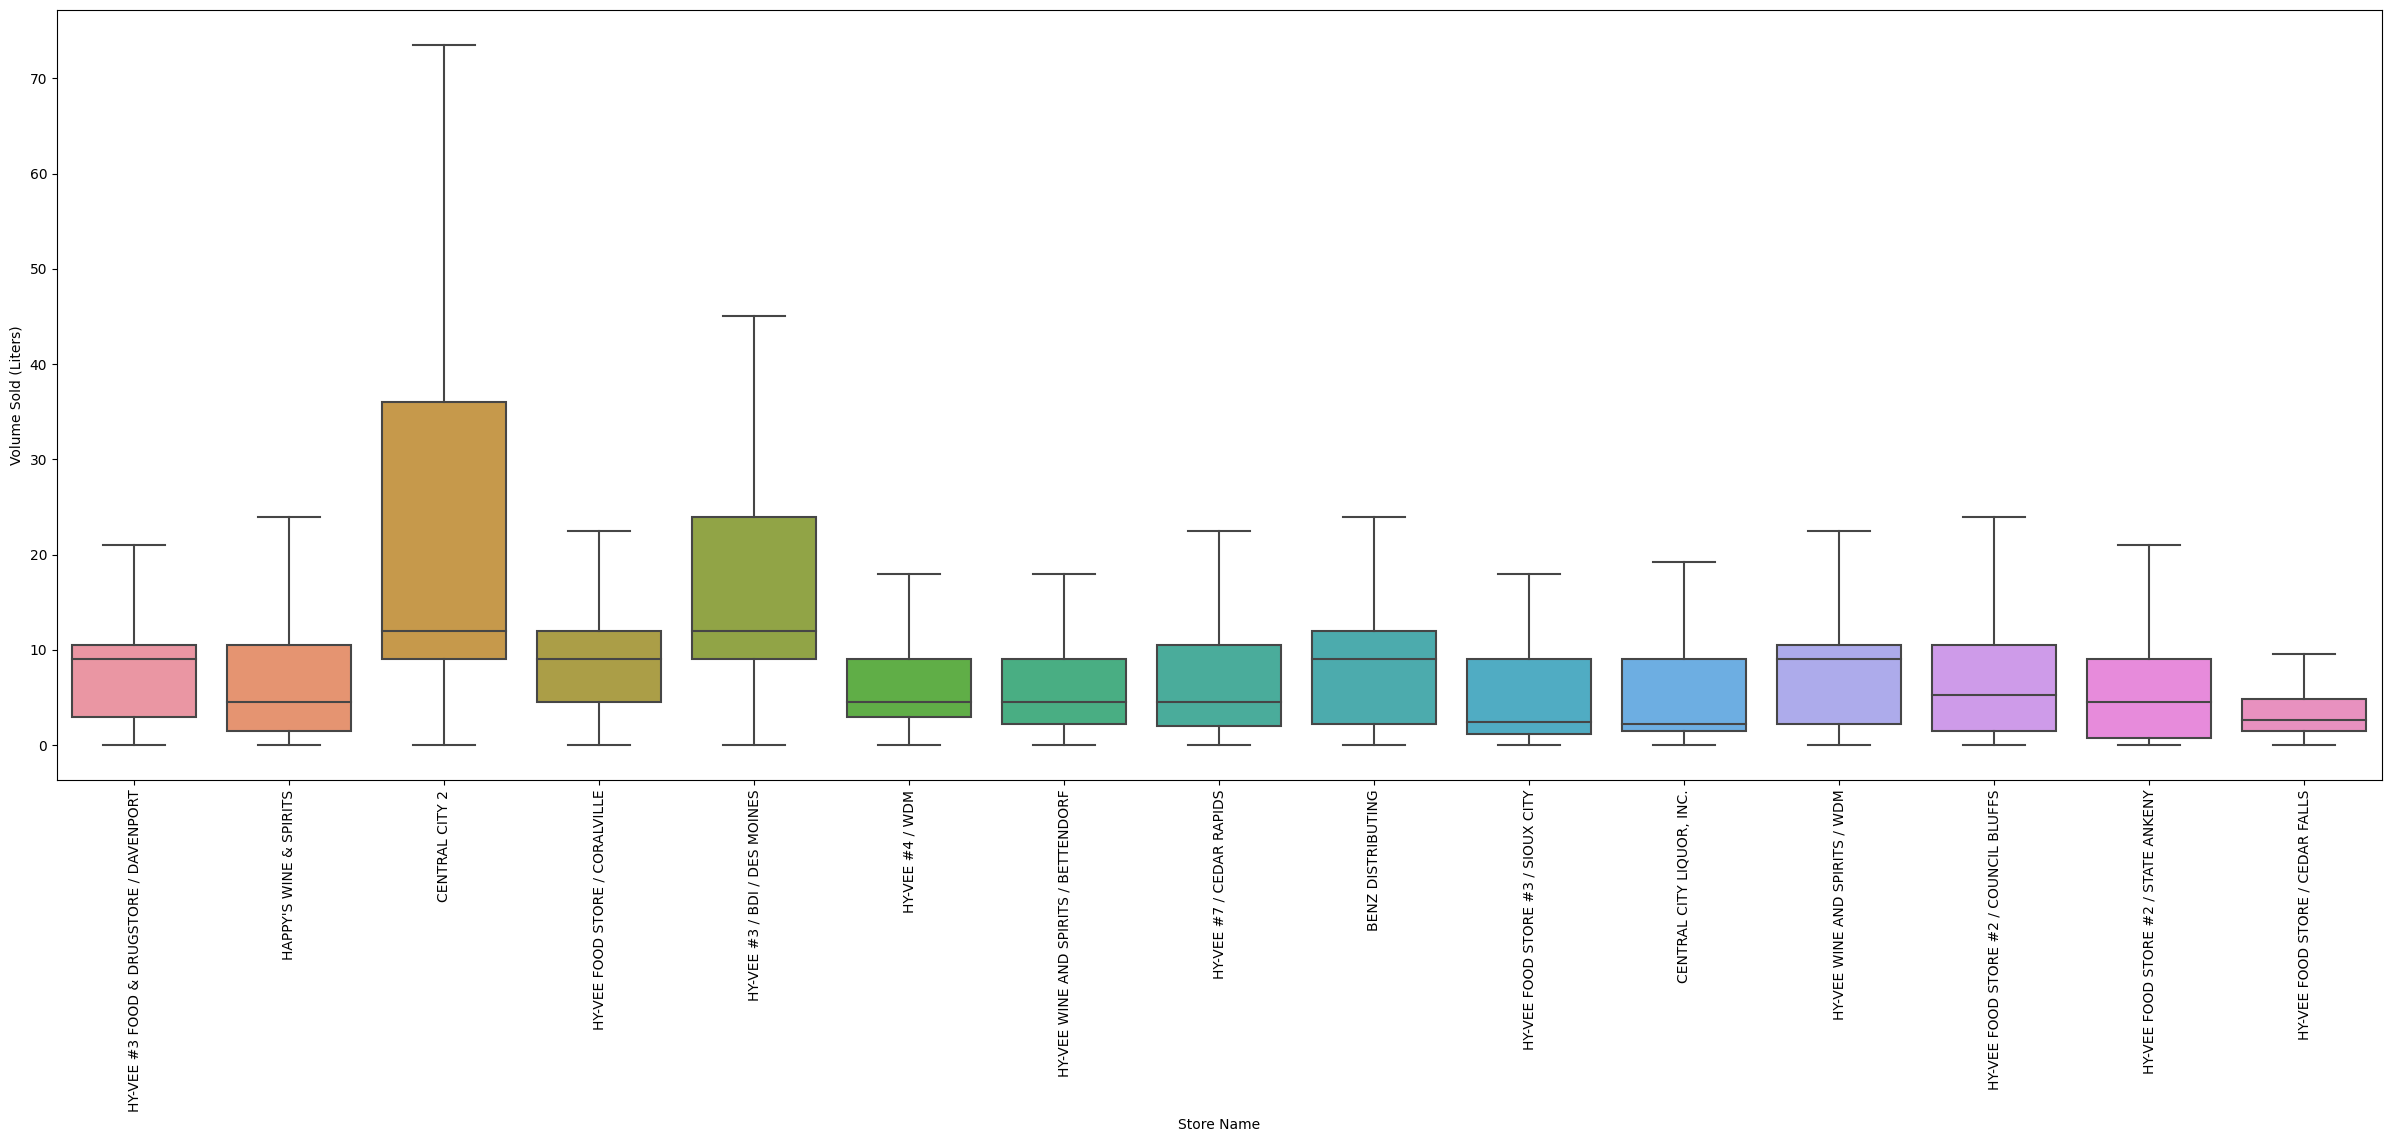

In [ ]:
plot_box_cat_quan('Store Name','Volume Sold (Liters)',15,store_s)

Central city 2 and HY-VEE #3/BDI/DES MOINES are the stores with a higher median value of voolume sold per order. Their medians are 12. Other stores sell less than 5 liters per order in average.

###### store ->  Sale (Dollars)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Store Name','Sale (Dollars)',store_s,10)
ds_cat_volume.head(10)

HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
count                   13053.000000    12965.000000   
mean                      642.728795      610.466423   
std                      4610.199630     1074.064730   
min                         4.520000        4.950000   
25%                       134.460000      148.560000   
50%                       202.500000      287.520000   
75%                       405.000000      620.640000   
max                    250932.000000    26202.540000   
median                    202.500000      287.520000   

        CENTRAL CITY LIQUOR, INC.  HY-VEE FOOD STORE / CEDAR FALLS  \
count                12737.000000                     11927.000000   
mean                   167.647974                       102.796396   
std                    395.078205                       395.091874   
min                      2.790000                         2.990000   
25%                     32.520000                        28.130000   
50%                     74.980000                        49.500000   
75%                    180.000000                        90.000000   
max                  12706.320000                     17100.000000   
median                  74.980000                        49.500000   

        HY-VEE #7 / CEDAR RAPIDS  HY-VEE FOOD STORE #2 / STATE ANKENY  \
count               10470.000000                         10283.000000   
mean                  166.869629                           180.713632   
std                   508.420038                           551.057258   
min                     2.990000                             2.700000   
25%                    35.430000                            43.560000   
50%                    72.000000                           105.000000   
75%                   148.560000                           180.480000   
max                 18000.000000                         28350.000000   
median                 72.000000                           105.000000   

        HAPPY'S WINE & SPIRITS  HY-VEE WINE AND SPIRITS / BETTENDORF  \
count              9749.000000                           9557.000000   
mean                173.307150                            164.343897   
std                 363.143276                            376.090459   
min                   2.940000                              4.950000   
25%                  33.000000                             45.000000   
50%                  90.000000                             88.500000   
75%                 180.000000                            162.840000   
max                9933.600000                           9598.500000   
median               90.000000                             88.500000   

        BENZ DISTRIBUTING  HY-VEE #4 / WDM  
count         9479.000000      9317.000000  
mean           275.404326       215.071762  
std            461.644620       645.703677  
min              1.430000         4.950000  
25%             78.750000        72.000000  
50%            148.500000       120.240000  
75%            283.440000       188.940000  
max           9124.800000     17812.800000  
median         148.500000       120.240000

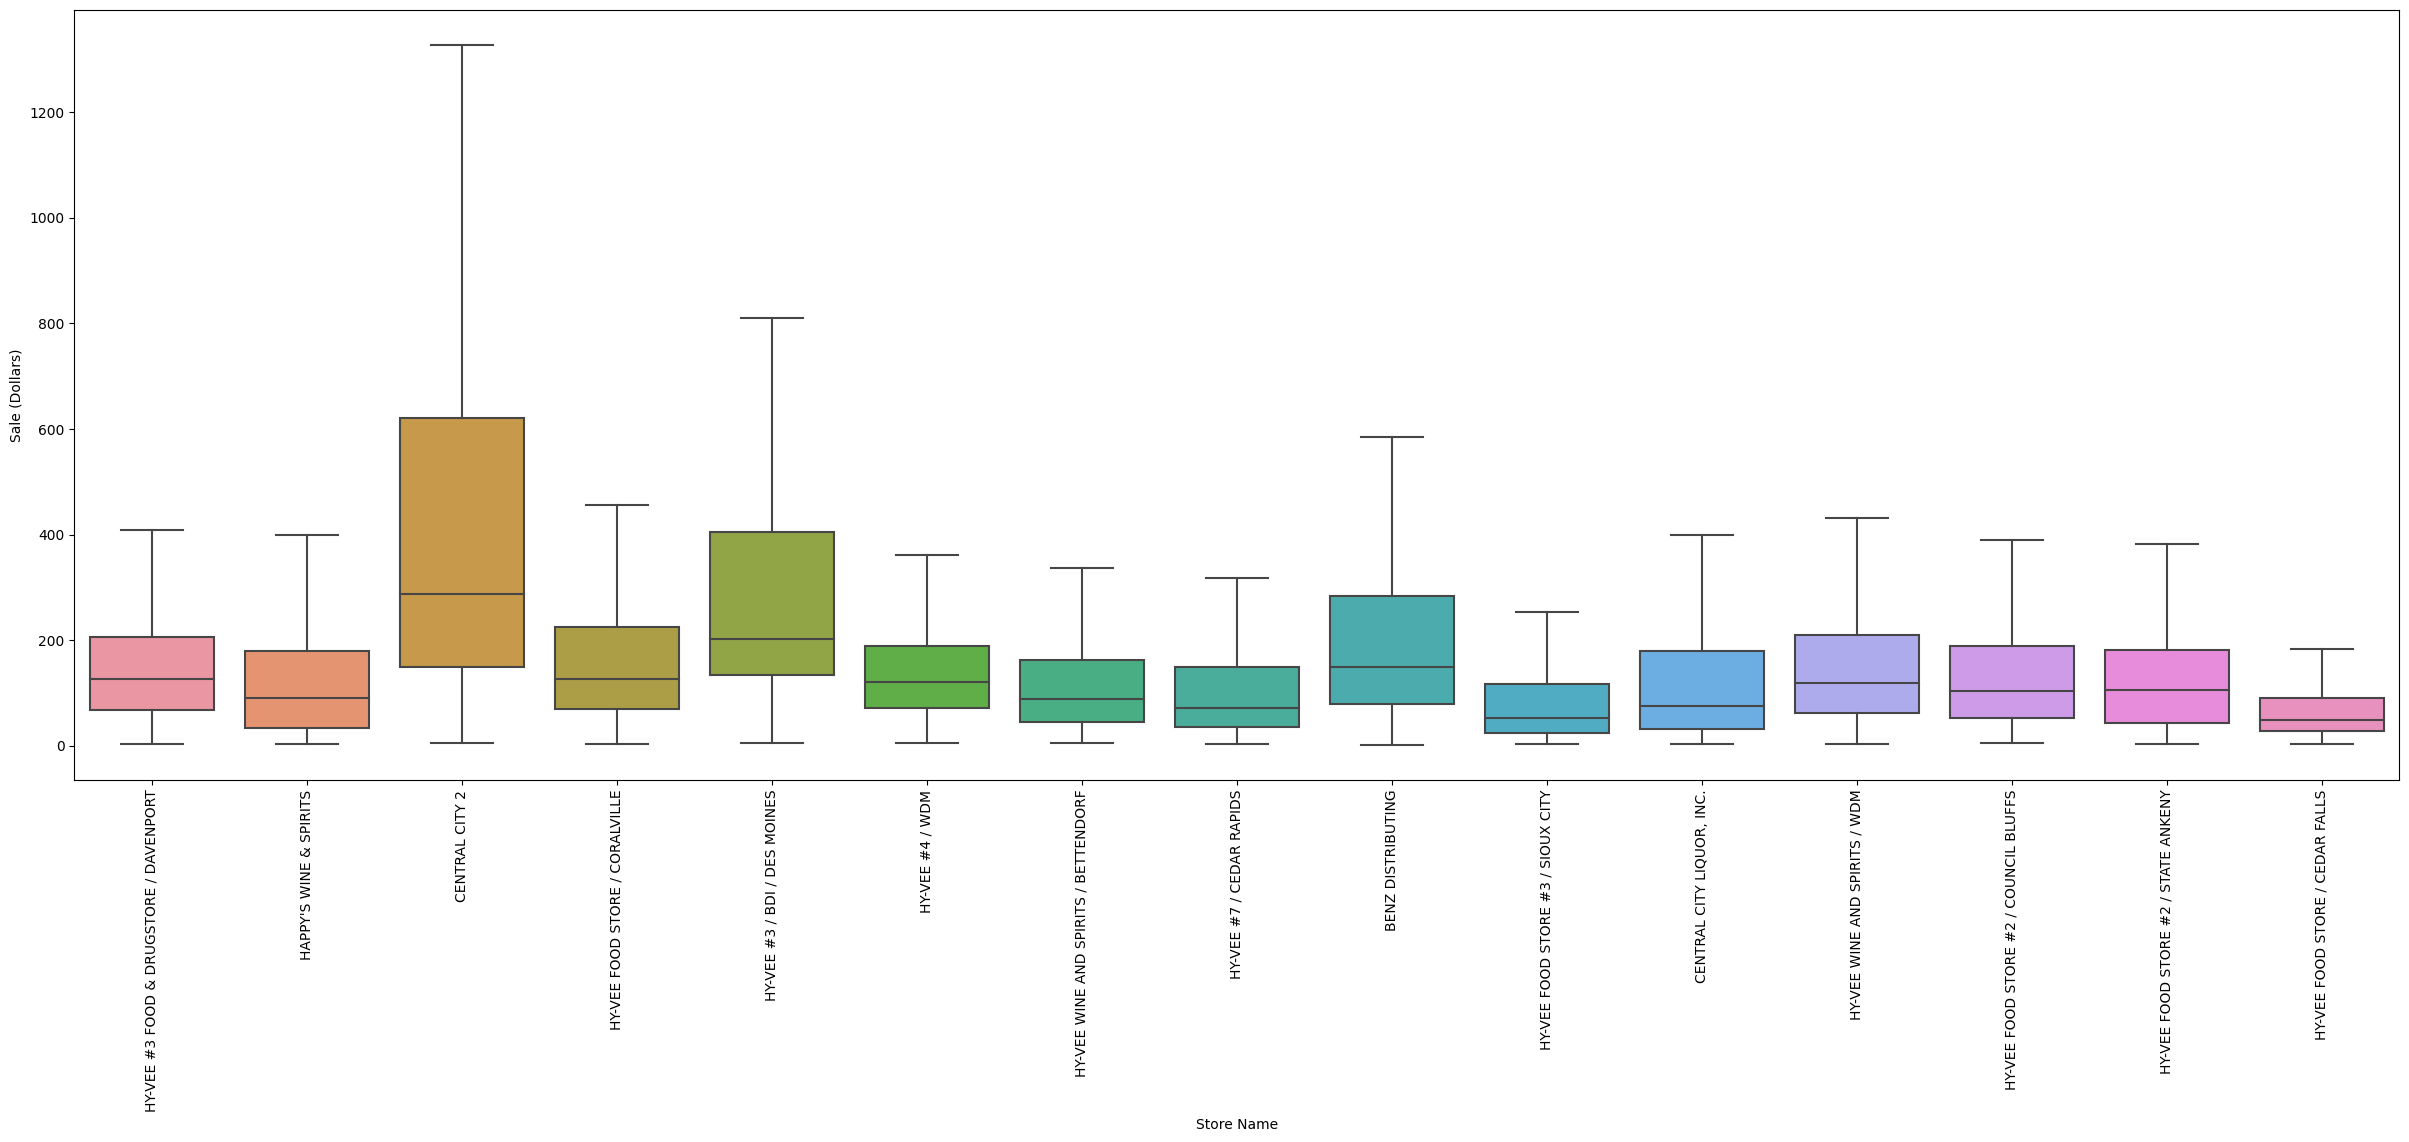

In [ ]:
plot_box_cat_quan('Store Name','Sale (Dollars)',15,store_s)

As in volume sold in liters, the median sale in dollars per order in Central City 2 and Y-VEE #3/BDI/DES MOINES stores is higher than in other stores. Their median values per order are higher than 200 dollars.Other stores median values are lesser than 150 dollars

###### store -> bottles sold

In [ ]:


ds_cat_volume = relation_cat_quant_descr('Store Name','Bottles Sold',store_s,10)
ds_cat_volume.head(10)

HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
count                   13053.000000    12965.000000   
mean                       36.841952       35.158041   
std                       244.500634       65.837893   
min                         1.000000        1.000000   
25%                        12.000000       12.000000   
50%                        12.000000       12.000000   
75%                        24.000000       36.000000   
max                     13200.000000      900.000000   
median                     12.000000       12.000000   

        CENTRAL CITY LIQUOR, INC.  HY-VEE FOOD STORE / CEDAR FALLS  \
count                12737.000000                     11927.000000   
mean                     8.943786                         6.182443   
std                     19.591978                        18.999442   
min                      1.000000                         1.000000   
25%                      2.000000                         2.000000   
50%                      3.000000                         3.000000   
75%                     12.000000                         6.000000   
max                    480.000000                       660.000000   
median                   3.000000                         3.000000   

        HY-VEE #7 / CEDAR RAPIDS  HY-VEE FOOD STORE #2 / STATE ANKENY  \
count               10470.000000                         10283.000000   
mean                   10.016810                            10.289410   
std                    27.771709                            25.049581   
min                     1.000000                             1.000000   
25%                     3.000000                             2.000000   
50%                     6.000000                             6.000000   
75%                    12.000000                            12.000000   
max                  1200.000000                          1080.000000   
median                  6.000000                             6.000000   

        HAPPY'S WINE & SPIRITS  HY-VEE WINE AND SPIRITS / BETTENDORF  \
count              9749.000000                           9557.000000   
mean                 10.092727                             10.162708   
std                  19.267053                             20.293880   
min                   1.000000                              1.000000   
25%                   2.000000                              3.000000   
50%                   6.000000                              6.000000   
75%                  12.000000                             12.000000   
max                 582.000000                            474.000000   
median                6.000000                              6.000000   

        BENZ DISTRIBUTING  HY-VEE #4 / WDM  
count         9479.000000      9317.000000  
mean            15.328938        12.003005  
std             27.696781        30.885062  
min              1.000000         1.000000  
25%              3.000000         6.000000  
50%             12.000000         6.000000  
75%             12.000000        12.000000  
max            744.000000       810.000000  
median          12.000000         6.000000

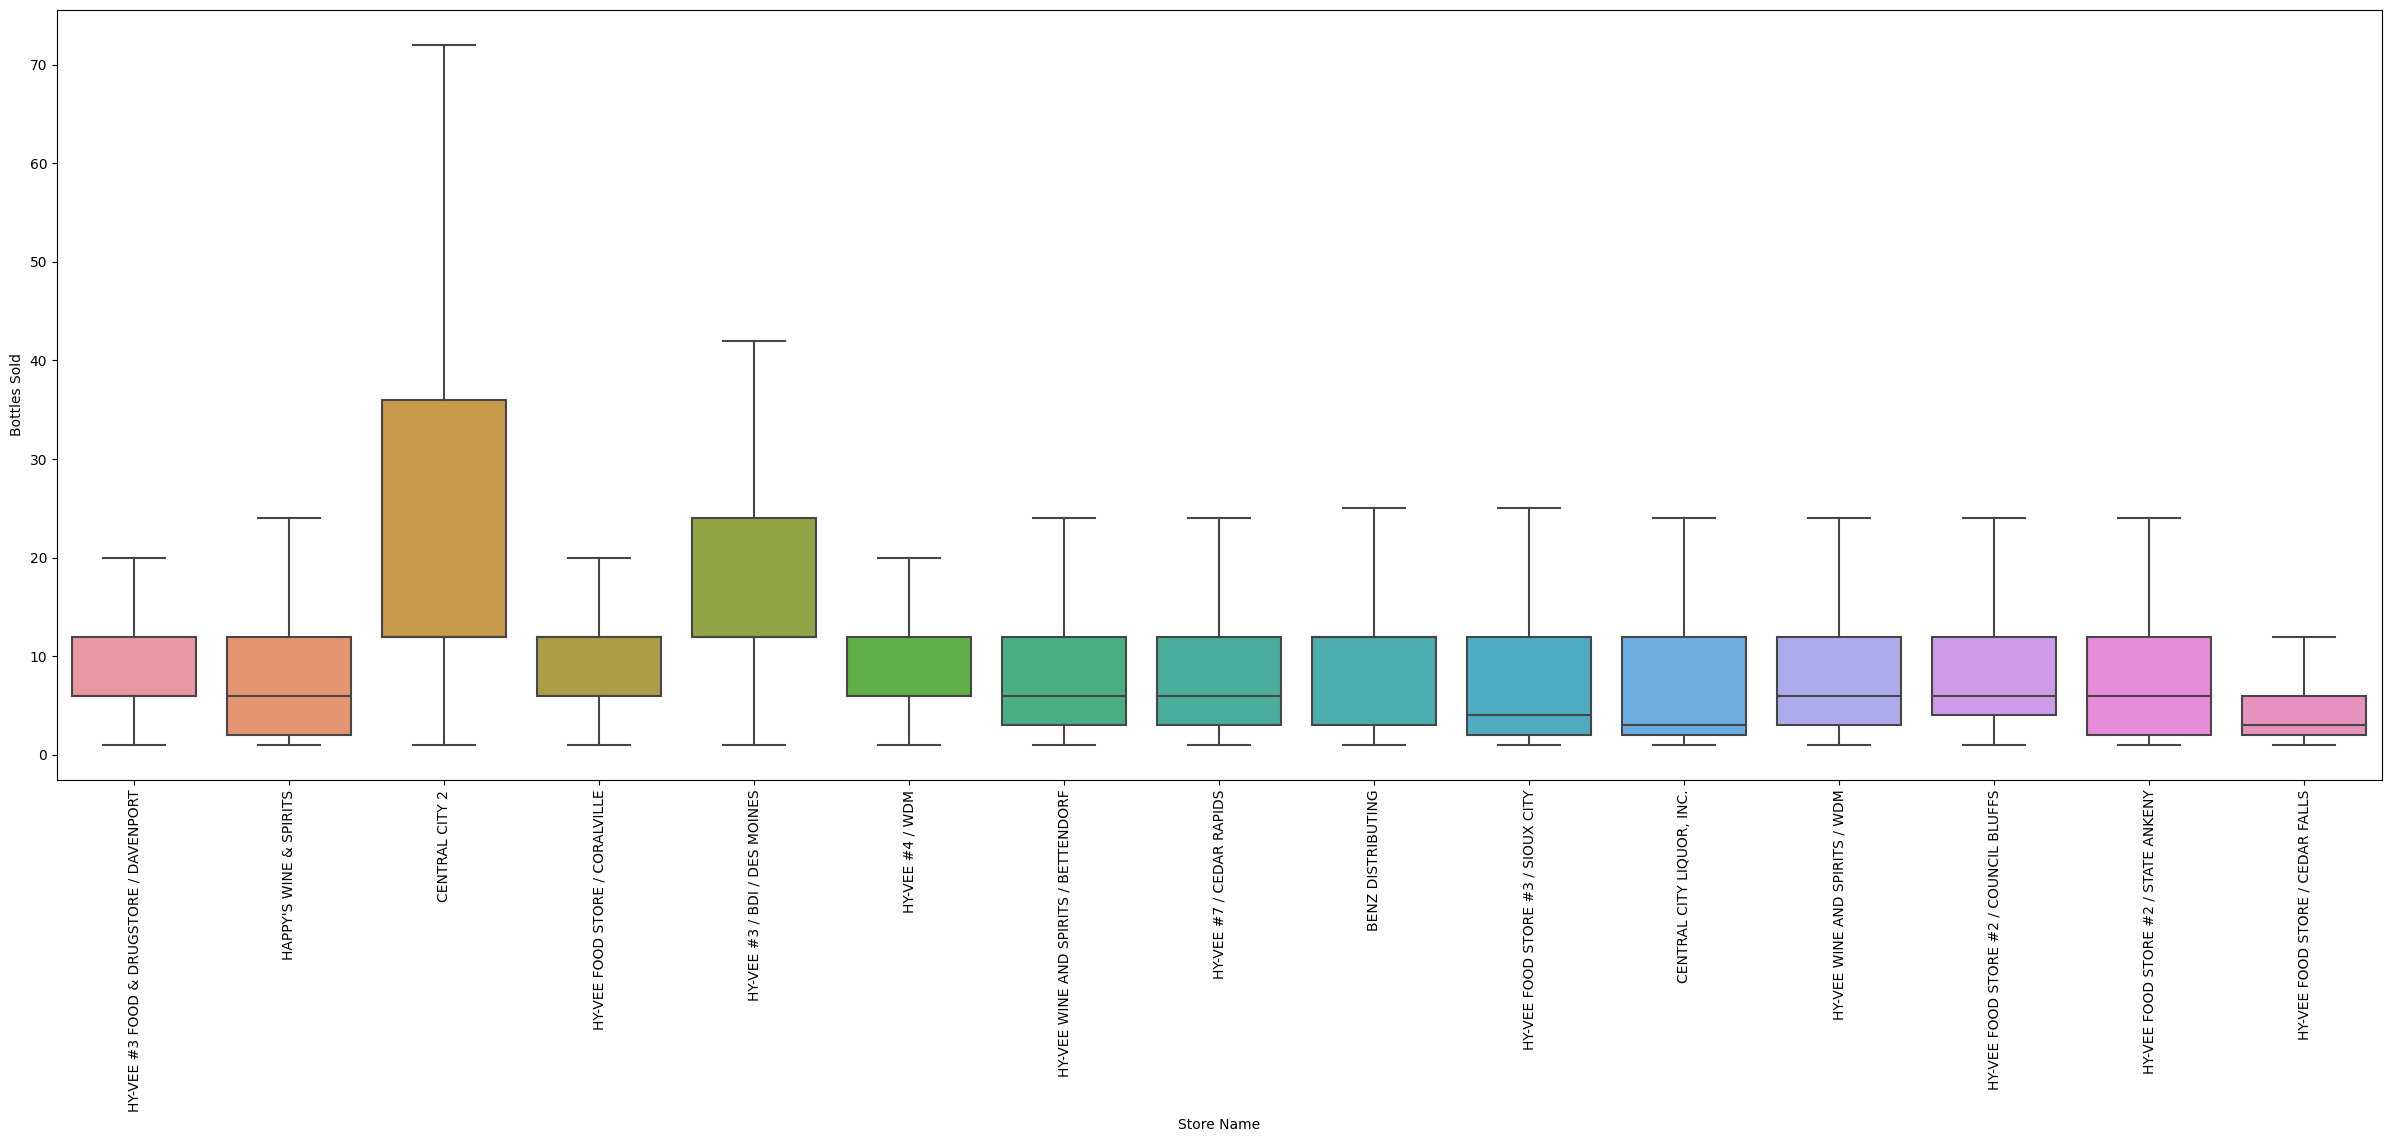

In [ ]:
plot_box_cat_quan('Store Name','Bottles Sold',15,store_s)


The bottle cost median values by store is between 3 and 12. Central city 2 as well as Y-VEE #3/BDI/DES MOINES have a higher number of bottles sold per order.

###### store ->  state bottle retail

In [ ]:


ds_cat_volume = relation_cat_quant_descr('Store Name','State Bottle Retail',store_s,10)
ds_cat_volume.head(10)

HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
count                   13053.000000    12965.000000   
mean                       19.885399       20.195172   
std                        30.316148       13.624721   
min                         2.790000        3.200000   
25%                        11.250000       11.990000   
50%                        15.750000       17.250000   
75%                        24.740000       24.890000   
max                      2775.000000      300.000000   
median                     15.750000       17.250000   

        CENTRAL CITY LIQUOR, INC.  HY-VEE FOOD STORE / CEDAR FALLS  \
count                12737.000000                     11927.000000   
mean                    25.173651                        16.991725   
std                     25.706199                        12.217961   
min                      1.340000                         1.340000   
25%                     11.250000                         9.750000   
50%                     18.750000                        13.880000   
75%                     30.750000                        20.630000   
max                    824.990000                       195.000000   
median                  18.750000                        13.880000   

        HY-VEE #7 / CEDAR RAPIDS  HY-VEE FOOD STORE #2 / STATE ANKENY  \
count               10470.000000                         10283.000000   
mean                   18.116353                            19.807396   
std                    15.265721                            15.546881   
min                     1.340000                             1.350000   
25%                    10.500000                            10.500000   
50%                    14.570000                            15.000000   
75%                    22.402500                            24.000000   
max                   323.640000                           262.910000   
median                 14.570000                            15.000000   

        HAPPY'S WINE & SPIRITS  HY-VEE WINE AND SPIRITS / BETTENDORF  \
count              9749.000000                           9557.000000   
mean                 20.502906                             19.593364   
std                  16.476518                             17.608490   
min                   1.350000                              1.350000   
25%                  11.210000                             10.500000   
50%                  15.780000                             15.000000   
75%                  25.500000                             23.970000   
max                 281.250000                            300.000000   
median               15.780000                             15.000000   

        BENZ DISTRIBUTING  HY-VEE #4 / WDM  
count         9479.000000      9317.000000  
mean            24.563270        21.024573  
std             35.325768        17.835267  
min              1.430000         1.350000  
25%             12.000000        11.250000  
50%             19.520000        15.750000  
75%             29.220000        24.750000  
max           2775.000000       300.000000  
median          19.520000        15.750000

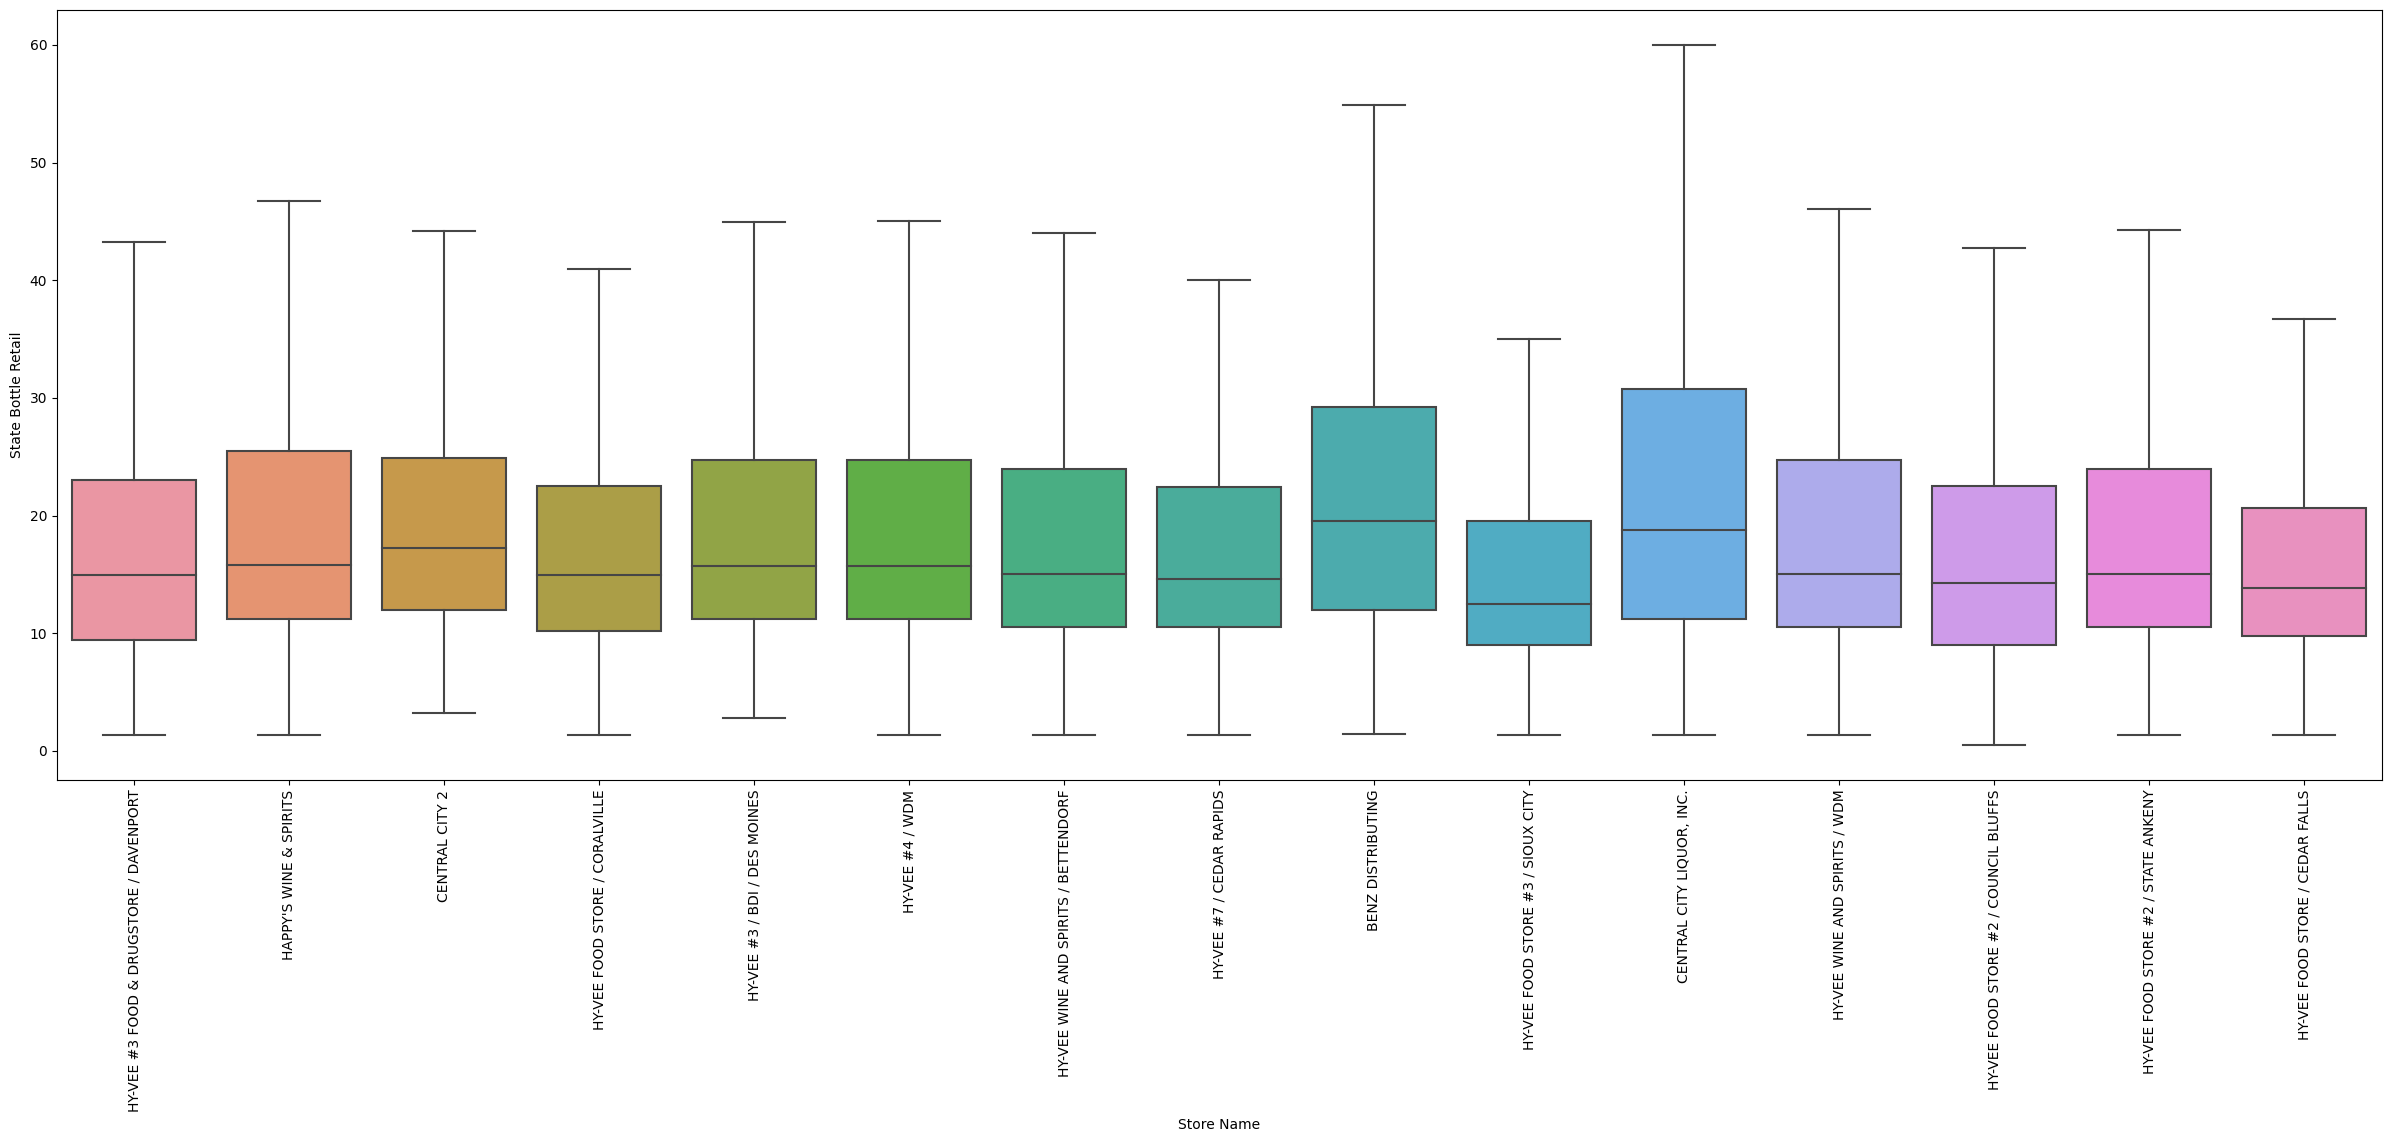

In [ ]:
plot_box_cat_quan('Store Name','State Bottle Retail',15,store_s)


State bottle retail by store median values are between 14 and 19.5

###### store -> state bttle cost

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Store Name','State Bottle Cost',store_s,10)
ds_cat_volume.head(10)

HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
count                   13053.000000    12965.000000   
mean                       13.255043       13.461945   
std                        20.210287        9.083140   
min                         1.860000        2.130000   
25%                         7.500000        7.990000   
50%                        10.500000       11.500000   
75%                        16.490000       16.590000   
max                      1850.000000      200.000000   
median                     10.500000       11.500000   

        CENTRAL CITY LIQUOR, INC.  HY-VEE FOOD STORE / CEDAR FALLS  \
count                12737.000000                     11927.000000   
mean                    16.786431                        11.326500   
std                     17.145987                         8.145231   
min                      0.890000                         0.890000   
25%                      7.500000                         6.500000   
50%                     12.500000                         9.250000   
75%                     20.500000                        13.750000   
max                    549.990000                       130.000000   
median                  12.500000                         9.250000   

        HY-VEE #7 / CEDAR RAPIDS  HY-VEE FOOD STORE #2 / STATE ANKENY  \
count               10470.000000                         10283.000000   
mean                   12.074507                            13.203675   
std                    10.175793                            10.364629   
min                     0.890000                             0.900000   
25%                     7.000000                             7.000000   
50%                     9.710000                            10.000000   
75%                    14.900000                            16.000000   
max                   215.760000                           175.270000   
median                  9.710000                            10.000000   

        HAPPY'S WINE & SPIRITS  HY-VEE WINE AND SPIRITS / BETTENDORF  \
count              9749.000000                           9557.000000   
mean                 13.664787                             13.058310   
std                  10.982630                             11.738041   
min                   0.900000                              0.900000   
25%                   7.470000                              7.000000   
50%                  10.520000                             10.000000   
75%                  17.000000                             15.980000   
max                 187.500000                            200.000000   
median               10.520000                             10.000000   

        BENZ DISTRIBUTING  HY-VEE #4 / WDM  
count         9479.000000      9317.000000  
mean            16.371099        14.013376  
std             23.549762        11.890717  
min              0.950000         0.900000  
25%              8.000000         7.500000  
50%             13.010000        10.500000  
75%             19.480000        16.500000  
max           1850.000000       200.000000  
median          13.010000        10.500000

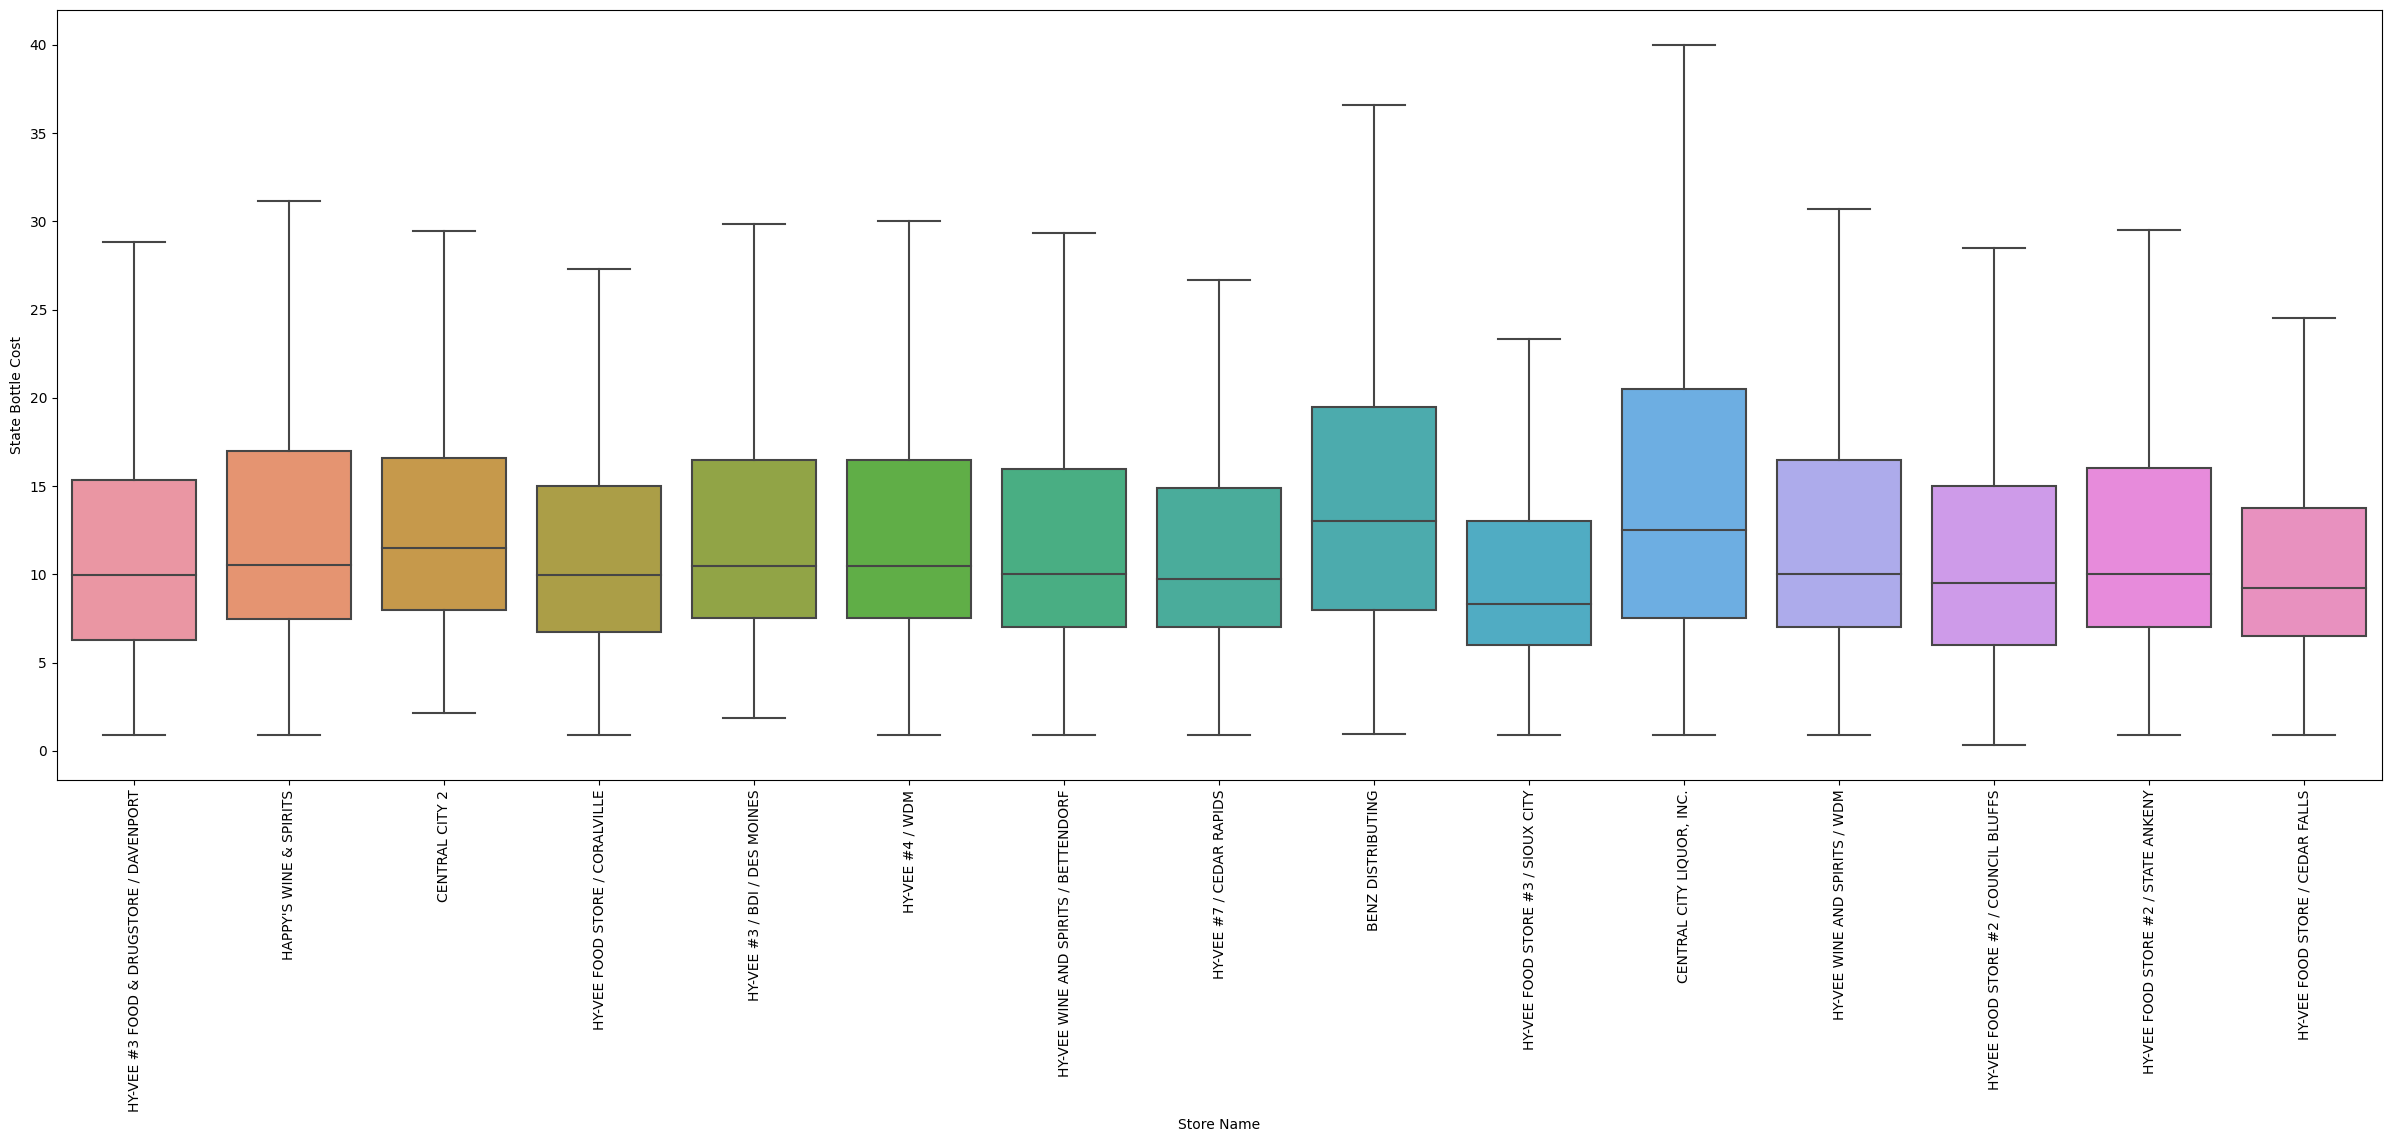

In [ ]:
plot_box_cat_quan('Store Name','State Bottle Cost',15,store_s)

State bottle cost median values by store are located between 9.7 and 13. Benz distributing reports the higher median state bottle cost.

###### store ->  pack)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Store Name','Pack',store_s,10)
ds_cat_volume.head(10)

HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
count                   13053.000000    12965.000000   
mean                       10.527159       10.558272   
std                         2.665710        2.749453   
min                         1.000000        1.000000   
25%                        12.000000       12.000000   
50%                        12.000000       12.000000   
75%                        12.000000       12.000000   
max                        24.000000       48.000000   
median                     12.000000       12.000000   

        CENTRAL CITY LIQUOR, INC.  HY-VEE FOOD STORE / CEDAR FALLS  \
count                12737.000000                     11927.000000   
mean                    11.115098                        10.922529   
std                      7.226478                         6.322291   
min                      1.000000                         1.000000   
25%                      6.000000                         6.000000   
50%                     12.000000                        12.000000   
75%                     12.000000                        12.000000   
max                     60.000000                        48.000000   
median                  12.000000                        12.000000   

        HY-VEE #7 / CEDAR RAPIDS  HY-VEE FOOD STORE #2 / STATE ANKENY  \
count               10470.000000                         10283.000000   
mean                   11.495320                            10.212584   
std                     7.386983                             5.667669   
min                     1.000000                             1.000000   
25%                     6.000000                             6.000000   
50%                    12.000000                            12.000000   
75%                    12.000000                            12.000000   
max                    60.000000                            48.000000   
median                 12.000000                            12.000000   

        HAPPY'S WINE & SPIRITS  HY-VEE WINE AND SPIRITS / BETTENDORF  \
count              9749.000000                           9557.000000   
mean                 10.489691                             10.545569   
std                   5.498706                              6.409441   
min                   1.000000                              1.000000   
25%                   6.000000                              6.000000   
50%                  12.000000                             12.000000   
75%                  12.000000                             12.000000   
max                  48.000000                             48.000000   
median               12.000000                             12.000000   

        BENZ DISTRIBUTING  HY-VEE #4 / WDM  
count         9479.000000      9317.000000  
mean             9.899145        10.291510  
std              3.470394         6.226909  
min              1.000000         1.000000  
25%              6.000000         6.000000  
50%             12.000000        12.000000  
75%             12.000000        12.000000  
max             60.000000        60.000000  
median          12.000000        12.000000

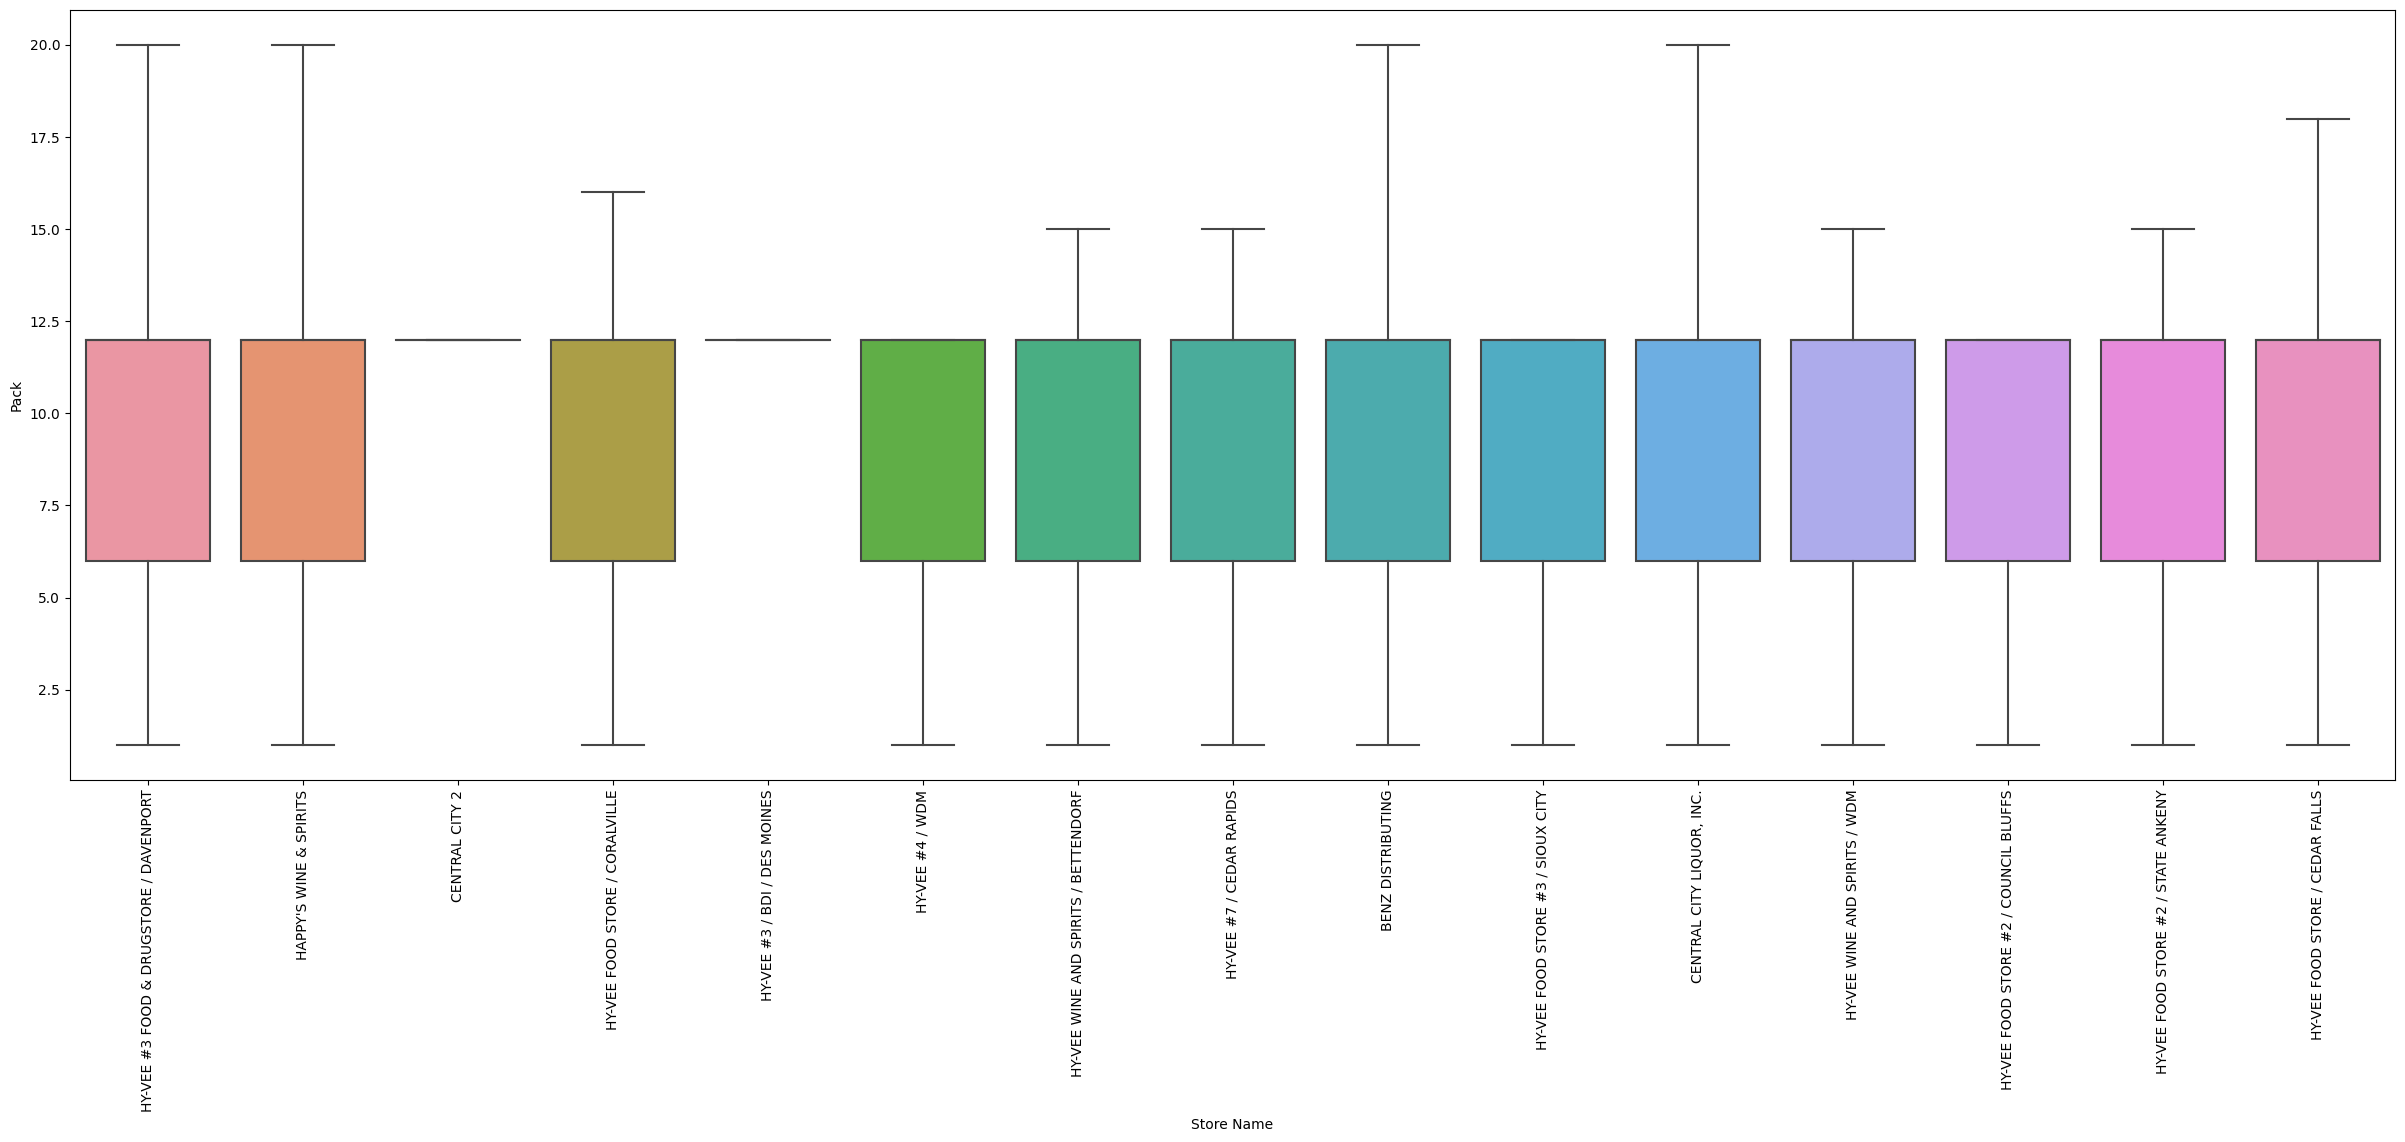

In [ ]:
plot_box_cat_quan('Store Name','Pack',15,store_s)


all pack median values are 12 per store

##### 1.2.1.6 Dates ->  (Sold (liters), Sale (Dollars), bottles sold, state bottle retail, state bttle cost, pack)

###### Dates -> Sold (liters)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Month_Year','Volume Sold (Liters)',date_s,10)
ds_cat_volume.head(10)

2020-12        2020-06        2021-03        2020-09  \
count   253679.000000  242065.000000  229625.000000  220755.000000   
mean         9.300205       9.176135       9.241152      10.007966   
std         40.820301      38.546927      32.354451      63.487766   
min          0.020000       0.020000       0.020000       0.020000   
25%          1.500000       1.500000       1.500000       1.500000   
50%          4.500000       4.800000       4.800000       4.500000   
75%         10.500000      10.500000      10.500000      10.500000   
max       6142.500000    6615.000000    4725.000000    8505.000000   
median       4.500000       4.800000       4.800000       4.500000   

              2020-10        2021-07        2021-01        2021-04  \
count   217079.000000  211440.000000  196339.000000  195707.000000   
mean         9.821382       9.824521       8.774144       9.129884   
std         48.718422      57.366554      32.061951      40.229087   
min          0.020000       0.020000       0.020000       0.020000   
25%          1.500000       1.500000       1.500000       1.500000   
50%          4.800000       4.800000       4.500000       4.500000   
75%         10.500000      10.500000      10.500000      10.500000   
max      13200.000000   13200.000000    5197.500000   13200.000000   
median       4.800000       4.800000       4.500000       4.500000   

              2021-02       2020-08  
count   189887.000000  22419.000000  
mean         9.332783      9.208150  
std         35.141711     26.689648  
min          0.020000      0.020000  
25%          1.750000      1.750000  
50%          4.800000      6.000000  
75%         10.500000     10.500000  
max       4725.000000   1320.000000  
median       4.800000      6.000000

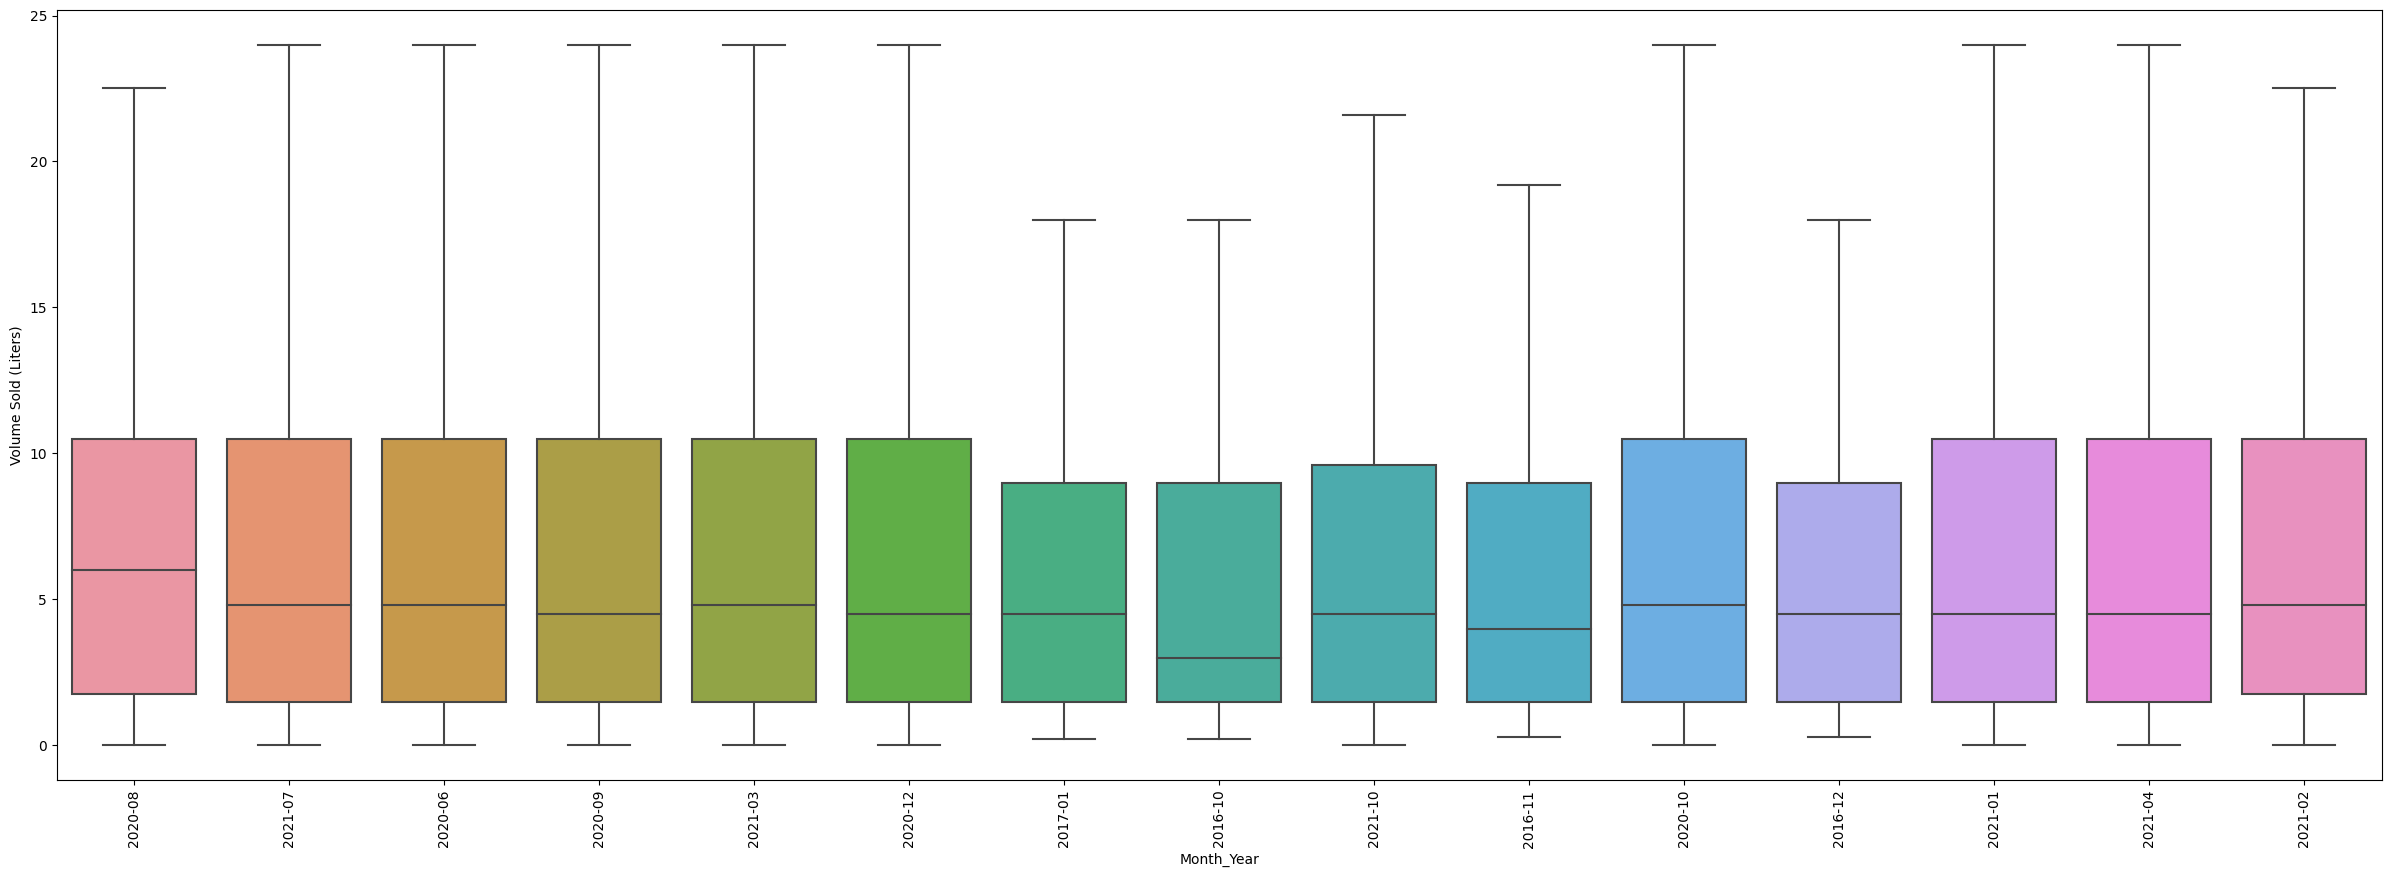

In [ ]:
plot_box_cat_quan('Month_Year','Volume Sold (Liters)',15,date_s)

There seems to be no much difference of the volume sold per order by month. All median values per month are located between 4.5 and 6.

###### Dates ->  Sale (Dollars)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Month_Year','Sale (Dollars)',date_s,10)
ds_cat_volume.head(10)

2020-12        2020-06        2021-03        2020-09  \
count   253679.000000  242065.000000  229625.000000  220755.000000   
mean       160.709739     148.656109     159.389058     166.517083   
std        493.833040     439.329371     436.235480    1004.519692   
min          1.340000       1.340000       1.340000       1.340000   
25%         42.000000      39.000000      40.770000      39.720000   
50%         88.800000      82.500000      85.500000      83.100000   
75%        163.080000     162.000000     170.040000     161.640000   
max      43910.100000   75279.600000   35763.000000  150559.200000   
median      88.800000      82.500000      85.500000      83.100000   

              2020-10        2021-07        2021-01        2021-04  \
count   217079.000000  211440.000000  196339.000000  195707.000000   
mean       172.423833     165.365578     145.901865     156.217028   
std        844.239277     774.399012     378.205263     686.419407   
min          1.340000       1.340000       1.340000       1.340000   
25%         42.000000      41.347500      40.500000      40.500000   
50%         89.280000      86.400000      82.500000      85.480000   
75%        166.440000     163.080000     159.090000     163.080000   
max     250932.000000  250932.000000   37154.700000  250932.000000   
median      89.280000      86.400000      82.500000      85.480000   

              2021-02       2020-08  
count   189887.000000  22419.000000  
mean       155.887349    150.658082  
std        410.240239    373.909459  
min          1.340000      1.500000  
25%         41.960000     42.480000  
50%         88.520000     85.800000  
75%        166.560000    162.000000  
max      33777.000000  13680.000000  
median      88.520000     85.800000

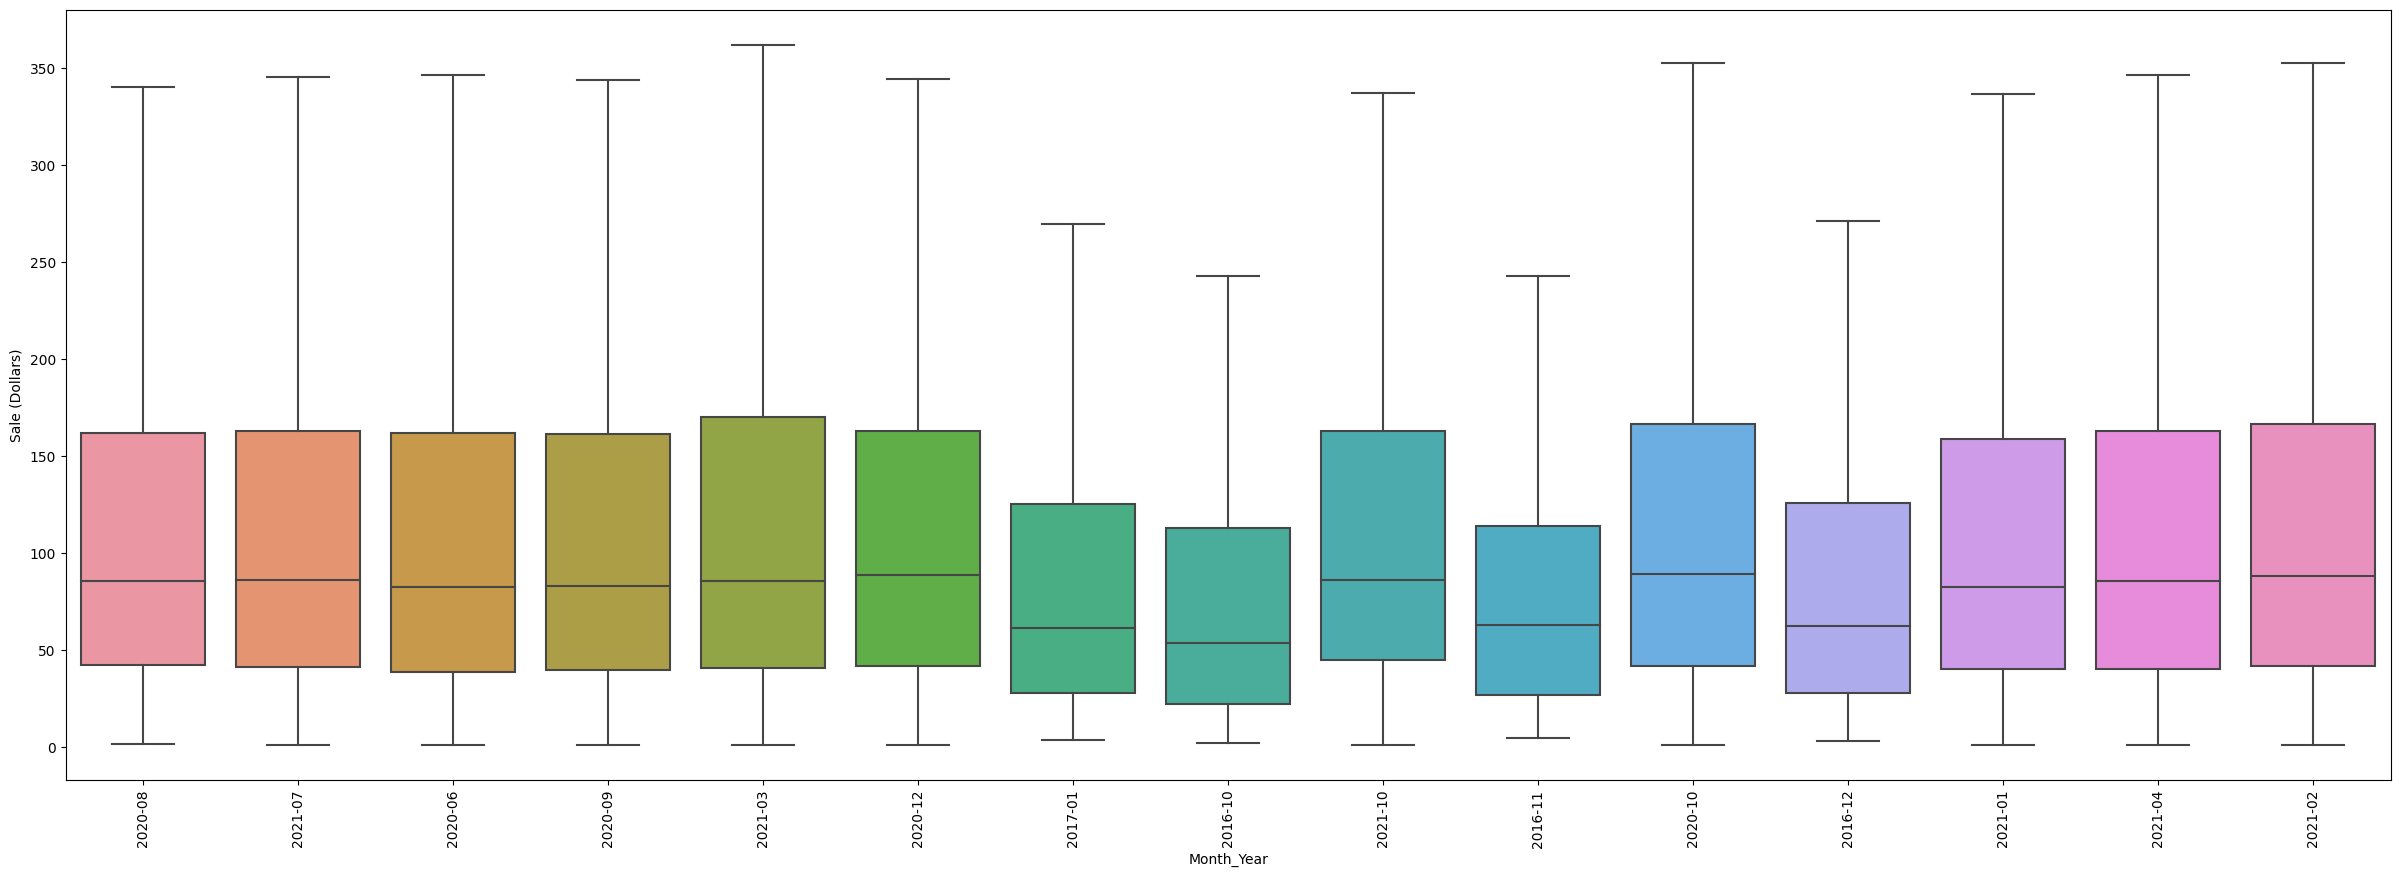

In [ ]:
plot_box_cat_quan('Month_Year','Sale (Dollars)',15,date_s)

Three months have a max value of 250.932. The median of sale in dollars per month is between 82.5 and 86.4

###### Dates -> bottles sold

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Month_Year','Bottles Sold',date_s,10)
ds_cat_volume.head(10)

2020-12        2020-06        2021-03        2020-09  \
count   253679.000000  242065.000000  229625.000000  220755.000000   
mean        11.473386      11.250458      11.658343      12.042314   
std         31.180038      30.923489      28.320731      54.470943   
min          1.000000       1.000000       1.000000       1.000000   
25%          3.000000       3.000000       3.000000       3.000000   
50%          6.000000       6.000000       6.000000       6.000000   
75%         12.000000      12.000000      12.000000      12.000000   
max       3510.000000    3960.000000    2700.000000    7920.000000   
median       6.000000       6.000000       6.000000       6.000000   

              2020-10        2021-07        2021-01        2021-04  \
count   217079.000000  211440.000000  196339.000000  195707.000000   
mean        12.523878      12.024371      11.215001      11.861804   
std         46.290934      47.425634      27.541154      40.479305   
min          1.000000       1.000000       1.000000       1.000000   
25%          3.000000       3.000000       3.000000       3.000000   
50%          6.000000       6.000000       6.000000       6.000000   
75%         12.000000      12.000000      12.000000      12.000000   
max      13200.000000   13200.000000    2970.000000   13200.000000   
median       6.000000       6.000000       6.000000       6.000000   

              2021-02       2020-08  
count   189887.000000  22419.000000  
mean        11.712729     11.533342  
std         28.747197     25.665849  
min          1.000000      1.000000  
25%          3.000000      3.000000  
50%          6.000000      6.000000  
75%         12.000000     12.000000  
max       2700.000000   1320.000000  
median       6.000000      6.000000

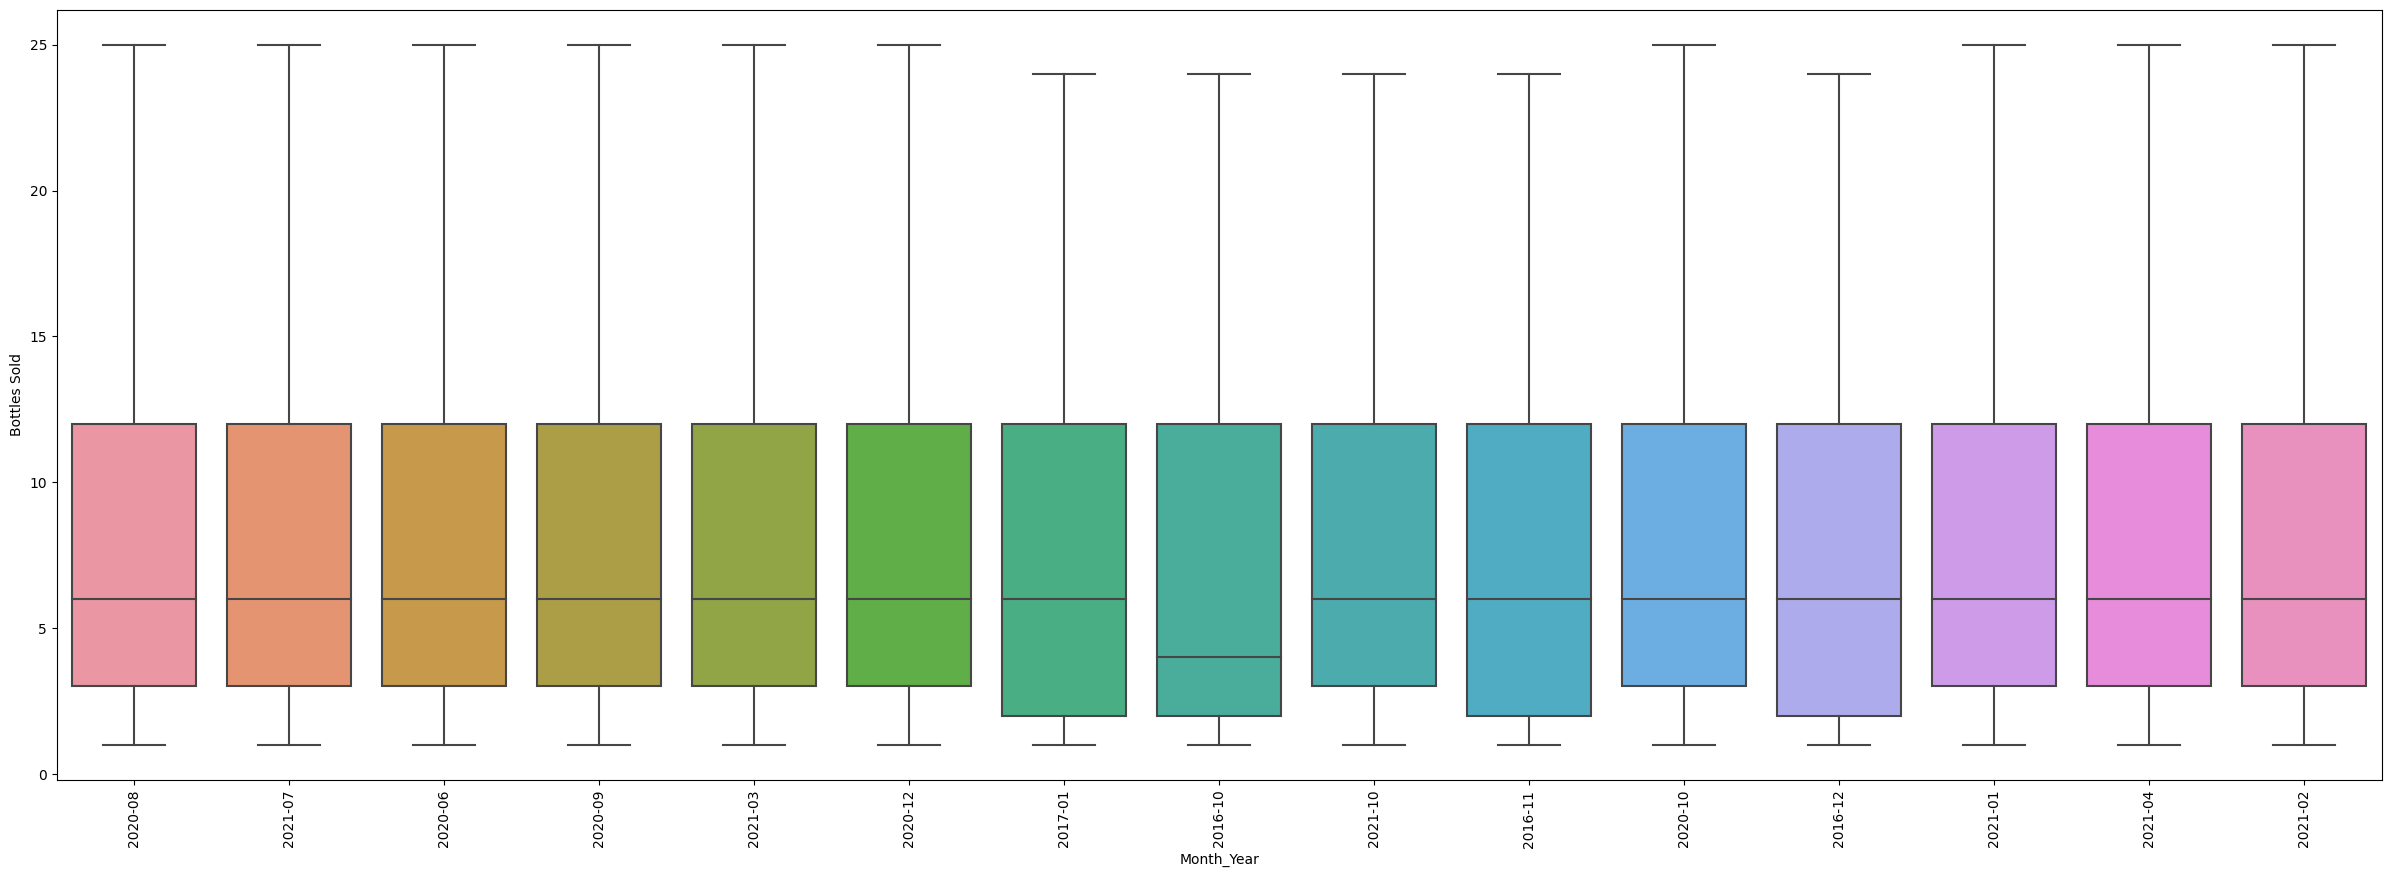

In [ ]:
plot_box_cat_quan('Month_Year','Bottles Sold',15,date_s)

Distributions of bottles sold per month seems to be similar. The median in all months is of 6.

###### Dates ->  state bottle retail

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Month_Year','State Bottle Retail',date_s,10)
ds_cat_volume.head(10)

2020-12        2020-06        2021-03        2020-09  \
count   253679.000000  242065.000000  229625.000000  220755.000000   
mean        16.887109      16.265130      16.790450      16.469413   
std         13.756452      13.188057      13.397979      15.348615   
min          0.500000       1.340000       1.340000       1.340000   
25%          9.000000       9.000000       9.000000       8.630000   
50%         13.500000      13.110000      13.470000      13.110000   
75%         21.000000      20.240000      21.150000      20.250000   
max        824.990000     824.990000     281.250000    2775.000000   
median      13.500000      13.110000      13.470000      13.110000   

              2020-10        2021-07       2021-01        2021-04  \
count   217079.000000  211440.000000  196339.00000  195707.000000   
mean        16.780498      16.701349      16.52366      16.558096   
std         14.343561      14.274075      15.64696      20.499959   
min          0.500000       0.990000       1.34000       1.340000   
25%          9.000000       9.000000       8.31000       8.310000   
50%         13.130000      13.440000      13.11000      13.110000   
75%         20.250000      20.280000      20.25000      20.250000   
max        824.990000    1500.000000    2775.00000    3148.410000   
median      13.130000      13.440000      13.11000      13.110000   

              2021-02       2020-08  
count   189887.000000  22419.000000  
mean        16.651293     16.036482  
std         15.777700     12.242746  
min          1.340000      1.340000  
25%          8.510000      9.000000  
50%         13.470000     13.110000  
75%         20.880000     20.240000  
max       2775.000000    262.910000  
median      13.470000     13.110000

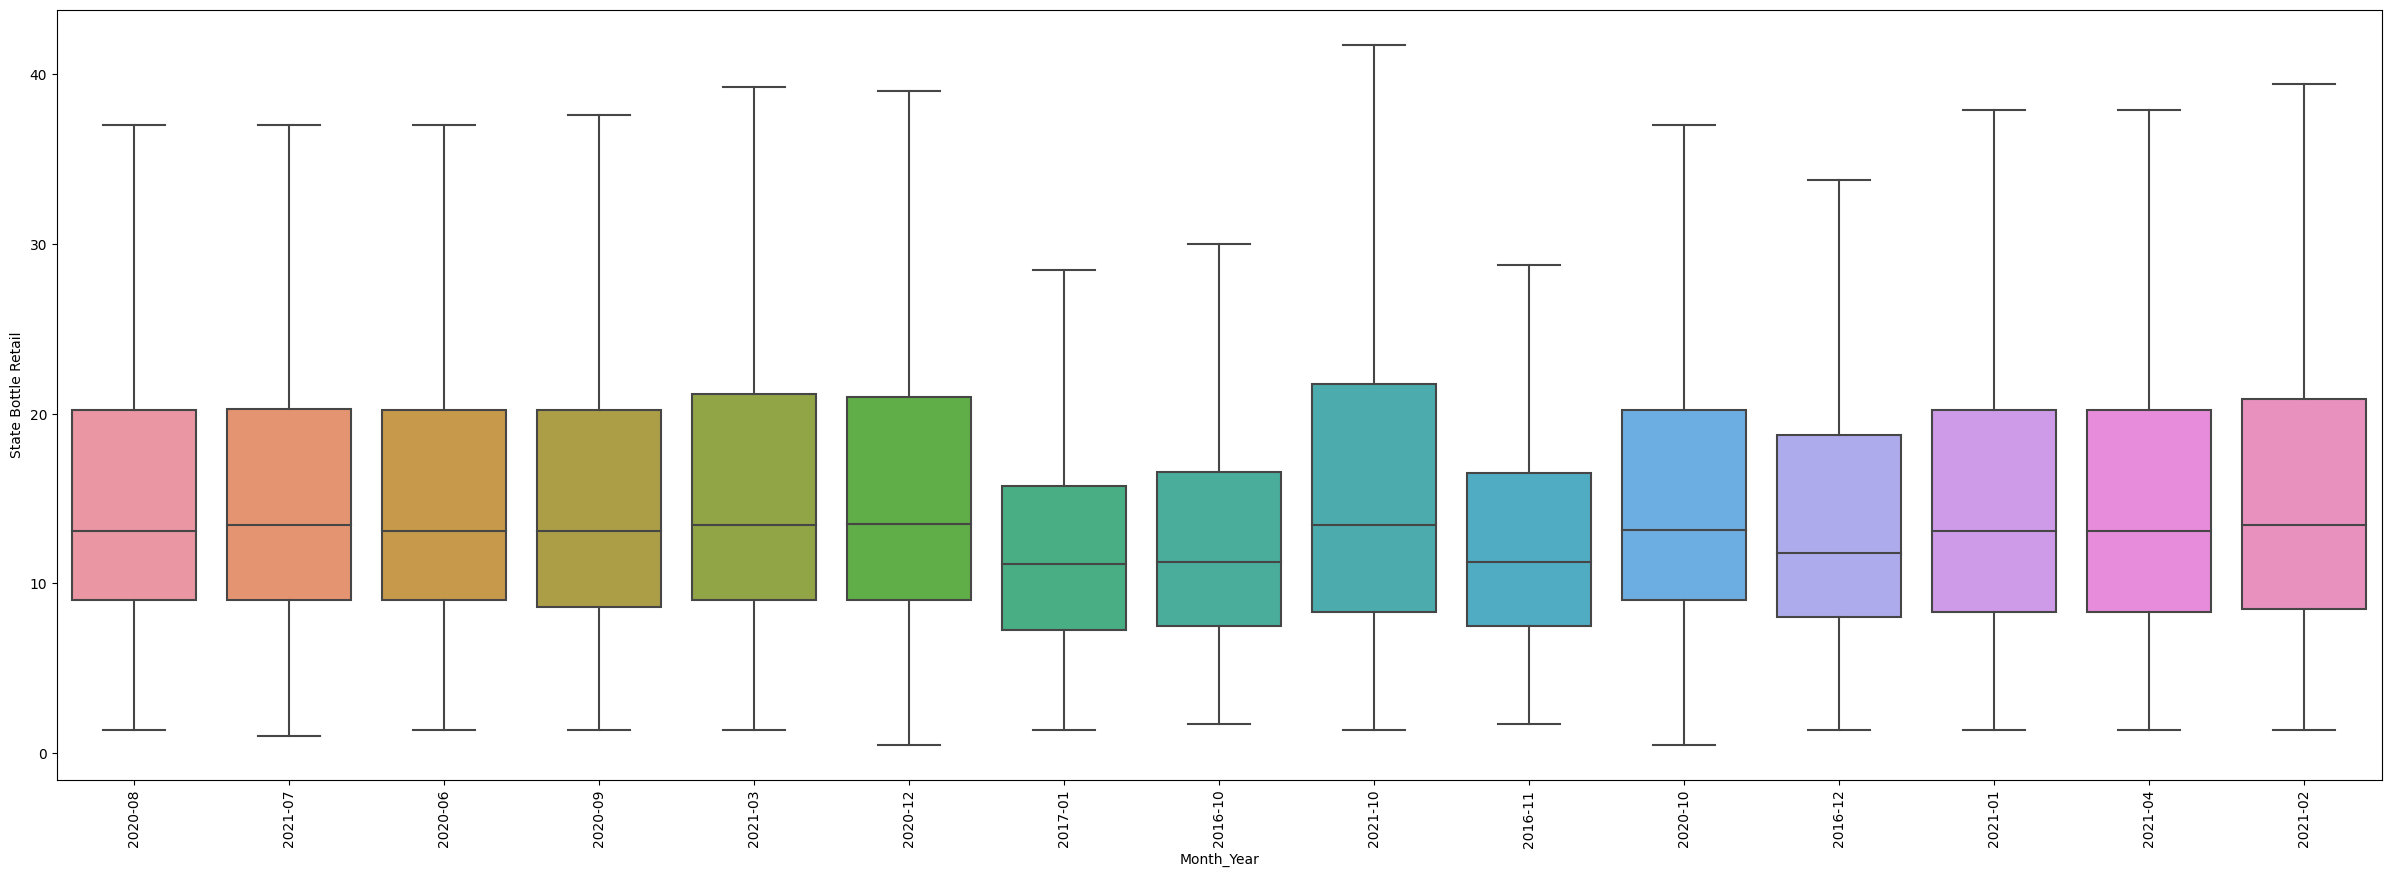

In [ ]:
plot_box_cat_quan('Month_Year','State Bottle Retail',15,date_s)

The state bottle retail median per month is located between 13.1 and 13.5

###### Dates -> state bttle cost

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Month_Year','State Bottle Cost',date_s,10)
ds_cat_volume.head(10)

2020-12        2020-06        2021-03        2020-09  \
count   253679.000000  242065.000000  229625.000000  220755.000000   
mean        11.257637      10.842163      11.191824      10.975389   
std          9.175747       8.792032       8.933368      10.231884   
min          0.330000       0.890000       0.890000       0.890000   
25%          6.000000       6.000000       6.000000       5.750000   
50%          9.000000       8.740000       8.980000       8.740000   
75%         14.000000      13.490000      14.100000      13.500000   
max        549.990000     549.990000     187.500000    1850.000000   
median       9.000000       8.740000       8.980000       8.740000   

              2020-10        2021-07        2021-01        2021-04  \
count   217079.000000  211440.000000  196339.000000  195707.000000   
mean        11.184375      11.133000      11.015774      11.037383   
std          9.562832       9.516018      10.436986      13.666577   
min          0.330000       0.660000       0.890000       0.890000   
25%          6.000000       6.000000       5.540000       5.540000   
50%          8.750000       8.960000       8.740000       8.740000   
75%         13.500000      13.520000      13.500000      13.500000   
max        549.990000    1000.000000    1850.000000    2098.940000   
median       8.750000       8.960000       8.740000       8.740000   

              2021-02       2020-08  
count   189887.000000  22419.000000  
mean        11.099949     10.689737  
std         10.521680      8.161859  
min          0.890000      0.890000  
25%          5.660000      6.000000  
50%          8.980000      8.740000  
75%         13.920000     13.490000  
max       1850.000000    175.270000  
median       8.980000      8.740000

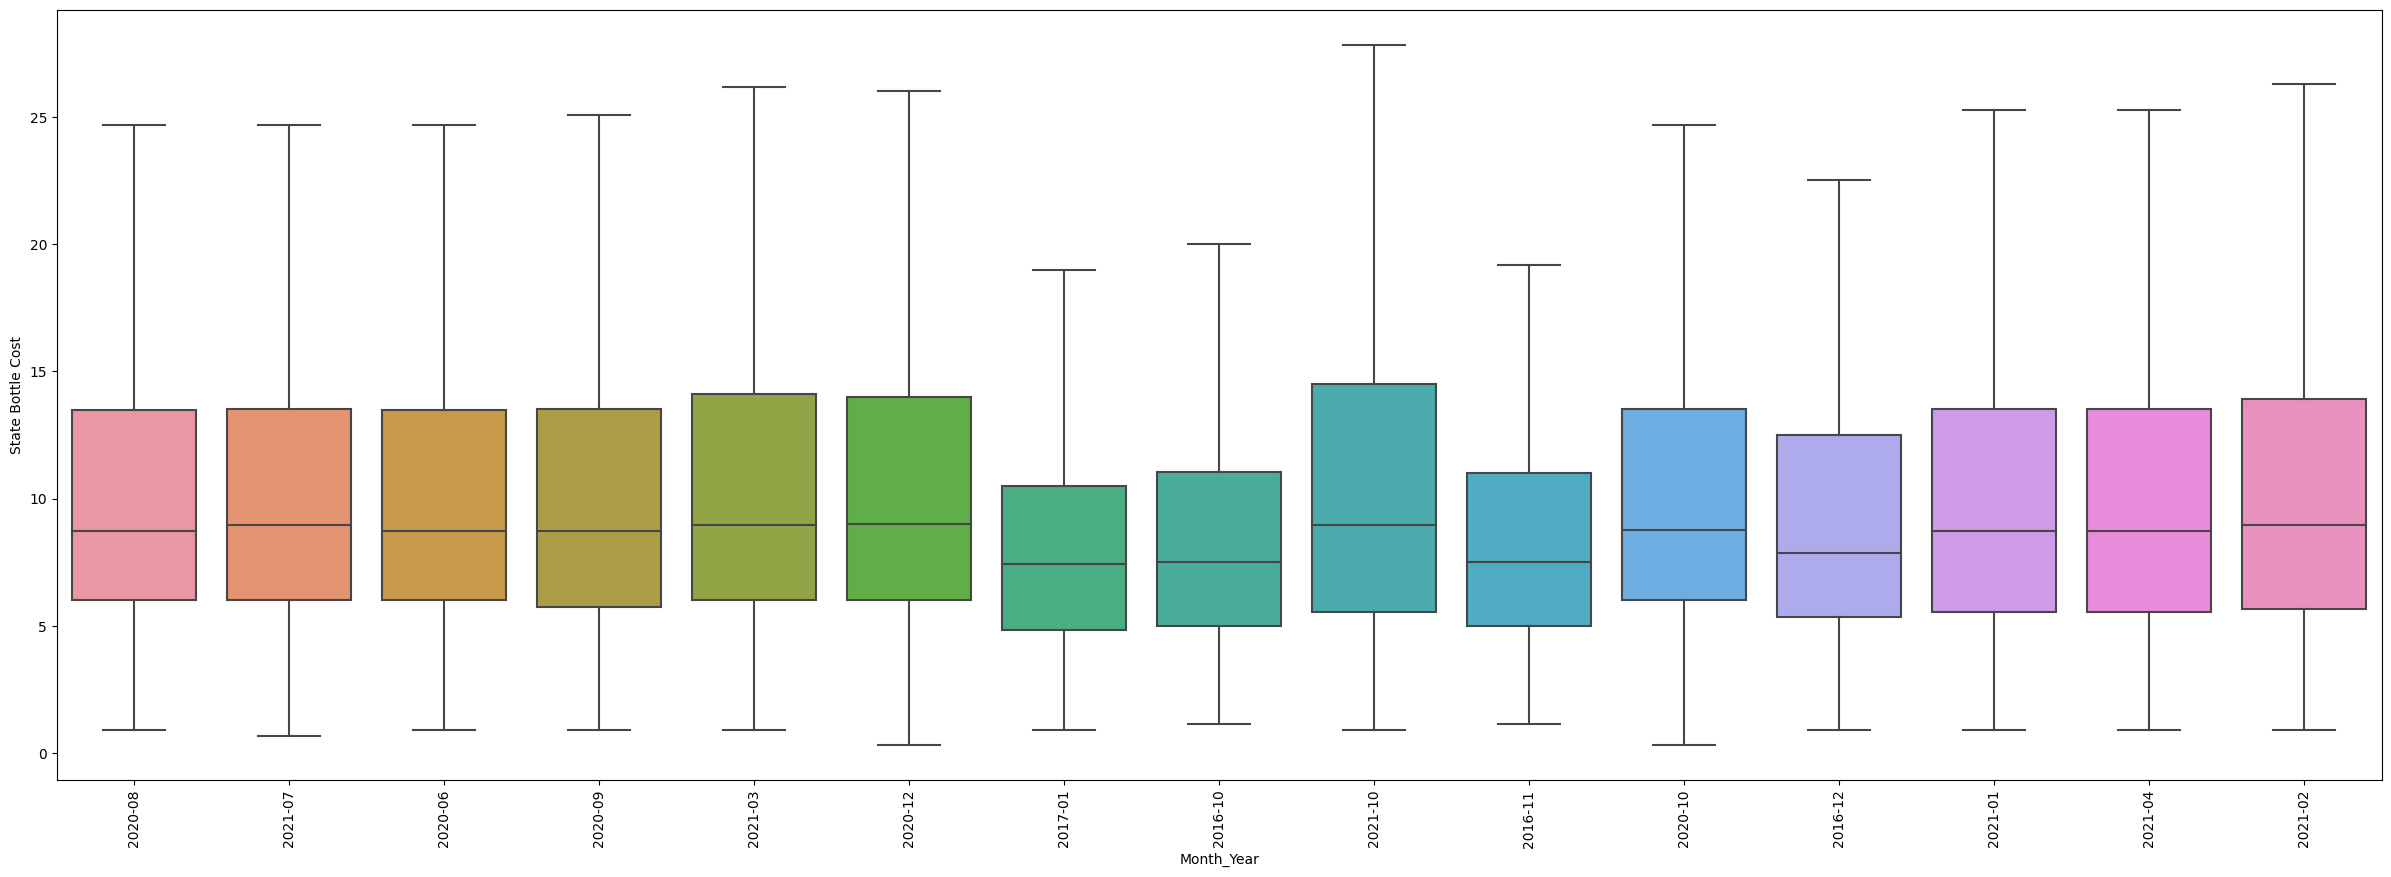

In [ ]:
plot_box_cat_quan('Month_Year','State Bottle Cost',15,date_s)

###### Dates ->  pack)

In [ ]:
ds_cat_volume = relation_cat_quant_descr('Month_Year','Pack',date_s,10)
ds_cat_volume.head(10)

2020-12        2020-06        2021-03        2020-09  \
count   253679.000000  242065.000000  229625.000000  220755.000000   
mean        11.918547      12.068093      12.076564      12.128282   
std          7.756393       8.012071       7.912629       8.112153   
min          1.000000       1.000000       1.000000       1.000000   
25%          6.000000       6.000000       6.000000       6.000000   
50%         12.000000      12.000000      12.000000      12.000000   
75%         12.000000      12.000000      12.000000      12.000000   
max         60.000000      60.000000      60.000000      60.000000   
median      12.000000      12.000000      12.000000      12.000000   

              2020-10        2021-07        2021-01        2021-04  \
count   217079.000000  211440.000000  196339.000000  195707.000000   
mean        12.136153      11.901759      12.102965      12.090906   
std          8.161020       7.872896       7.984345       8.050262   
min          1.000000       1.000000       1.000000       1.000000   
25%          6.000000       6.000000       6.000000       6.000000   
50%         12.000000      12.000000      12.000000      12.000000   
75%         12.000000      12.000000      12.000000      12.000000   
max         60.000000     120.000000      60.000000      60.000000   
median      12.000000      12.000000      12.000000      12.000000   

              2021-02       2020-08  
count   189887.000000  22419.000000  
mean        12.162391     12.180204  
std          8.033063      8.112511  
min          1.000000      1.000000  
25%          6.000000      6.000000  
50%         12.000000     12.000000  
75%         12.000000     12.000000  
max         60.000000     60.000000  
median      12.000000     12.000000

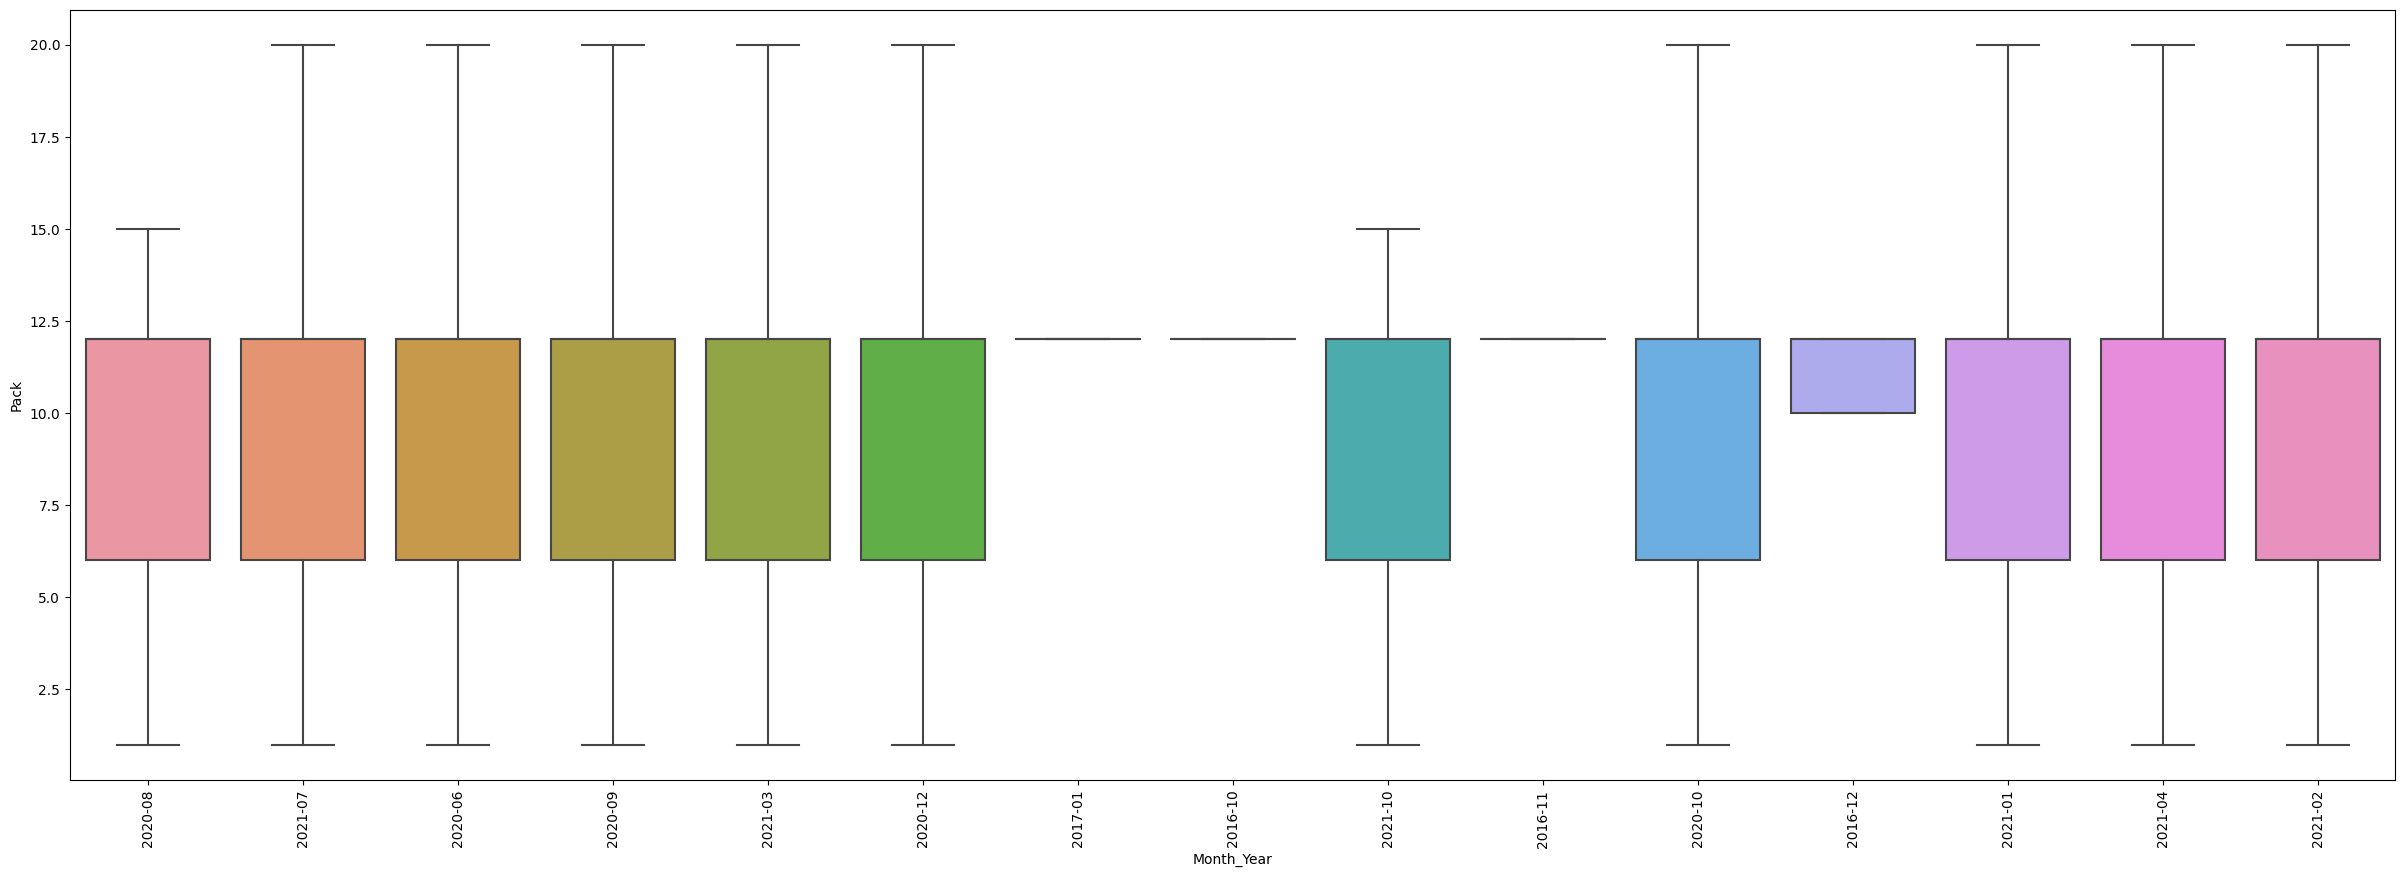

In [ ]:
plot_box_cat_quan('Month_Year','Pack',15,date_s)

The median value of pack per month is 12 for all months. The distributions of the center are also similar (between 6 and 12 pack). Months with lesser center distributions are also those months with less amount of data analyzed.

#### 1.2.2 Categorical -> Categorical

In [ ]:
print(cat_cols)

['Vendor Name', 'County', 'Store Name', 'Store Location', 'City', 'Category Name', 'Date', 'Item Description', 'Address', 'Invoice/Item Number']


To chose what categories can be compared to each other, let's first analyze what categories belong to other categories

 - Item descriptions belongs to the category of 'Category Name'
 - Vendor belongs to a store, the store belong to a city, and the city belong to a county.

 Therefore, the comparisons that are relevant for this analysis are:

 Category Name - Store

 Category Name - City

 Category Name - County

 Date - Store

 Date - City

 Date - County

 Category Name - Date


 ##### Category Name - Store


In [ ]:
def two_way_table(expl,resp,exp_ft,resp_ft,n):
  """
  this function creates a two way table between an explanatory and a response categorical variables
  expl: categorical variable explanatory
  resp: categorical variable of response
  exp_ft: dataframa of the most important values of the expl categorical var.
  resp_ft: dataframe of the most important values of the resp categorical var.
  """
  c_c = pd.DataFrame(chunk.groupby([expl,resp])[expl].count())
  c_c.columns = ['frequency']
  c_c_df = pd.pivot_table(c_c,index=expl,columns=resp)
  c_c_df.columns = list(c_c_df.columns.get_level_values(1))
  #In one test of the table I found out that there are NaN values. So I am going to replace them with 0
  c_c_df.fillna(value = 0,inplace = True)

  #Calculating the total of each row and appending a column with the total
  l = []
  for i,row in c_c_df.iterrows():
      total = 0
      for j in c_c_df.columns:
          total += row[j]
      l.append(total)
  c_c_df['total']=l

  #Calculating the total of each column and appending a row with the total
  l_tot = []
  for i in range(0,len(c_c_df.columns)):
    l_tot.append(np.sum(c_c_df[c_c_df.columns[i]]))
  c_c_df.loc['total_'] = l_tot

  #creating a sub dataframe with the most important nxn values and plotting it with the total of the entire dataframe

  r = list(exp_ft.index[0:n])
  r.append('total_')
  col = list(resp_ft.index[0:n])
  col.append('total')

  c = c_c_df.loc[r,col]
  return c

cat_sto = two_way_table('Category Name','Store Name',category_s,store_s,15)
cat_sto.head(25)

HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
Category Name                                                               
AMERICAN VODKAS                                     731.0           696.0   
CANADIAN WHISKIES                                   476.0           500.0   
STRAIGHT BOURBON WHISKIES                           706.0           847.0   
WHISKEY LIQUEUR                                     182.0           249.0   
AMERICAN FLAVORED VODKA                            1398.0          1456.0   
BLENDED WHISKIES                                    385.0           389.0   
SPICED RUM                                          184.0           169.0   
COCKTAILS /RTD                                       98.0            80.0   
AMERICAN SCHNAPPS                                   705.0           498.0   
100% AGAVE TEQUILA                                  869.0          1065.0   
IMPORTED VODKAS                                     403.0           413.0   
TENNESSEE WHISKIES                                  238.0           283.0   
AMERICAN BRANDIES                                   137.0            98.0   
FLAVORED RUM                                        501.0           468.0   
AMERICAN CORDIALS & LIQUEUR                         407.0           347.0   
total_                                            13053.0         12965.0   

                             CENTRAL CITY LIQUOR, INC.  \
Category Name                                            
AMERICAN VODKAS                                  799.0   
CANADIAN WHISKIES                                624.0   
STRAIGHT BOURBON WHISKIES                        980.0   
WHISKEY LIQUEUR                                  280.0   
AMERICAN FLAVORED VODKA                          432.0   
BLENDED WHISKIES                                 343.0   
SPICED RUM                                       219.0   
COCKTAILS /RTD                                   160.0   
AMERICAN SCHNAPPS                                188.0   
100% AGAVE TEQUILA                               958.0   
IMPORTED VODKAS                                  521.0   
TENNESSEE WHISKIES                               273.0   
AMERICAN BRANDIES                                543.0   
FLAVORED RUM                                     255.0   
AMERICAN CORDIALS & LIQUEUR                      242.0   
total_                                         12737.0   

                             HY-VEE FOOD STORE / CEDAR FALLS  \
Category Name                                                  
AMERICAN VODKAS                                        957.0   
CANADIAN WHISKIES                                      668.0   
STRAIGHT BOURBON WHISKIES                              941.0   
WHISKEY LIQUEUR                                        307.0   
AMERICAN FLAVORED VODKA                                912.0   
BLENDED WHISKIES                                       534.0   
SPICED RUM                                             344.0   
COCKTAILS /RTD                                         586.0   
AMERICAN SCHNAPPS                                      454.0   
100% AGAVE TEQUILA                                     552.0   
IMPORTED VODKAS                                        348.0   
TENNESSEE WHISKIES                                     190.0   
AMERICAN BRANDIES                                      371.0   
FLAVORED RUM                                           375.0   
AMERICAN CORDIALS & LIQUEUR                            394.0   
total_                                               11927.0   

                             HY-VEE #7 / CEDAR RAPIDS  \
Category Name                                           
AMERICAN VODKAS                                 983.0   
CANADIAN WHISKIES                               580.0   
STRAIGHT BOURBON WHISKIES                       798.0   
WHISKEY LIQUEUR                                 300.0   
AMERICAN FLAVORED VODKA                         645.0   
BLENDED WHISKIES                             

In [ ]:


print(l)


[[731.0, 476.0, 706.0, 182.0, 1398.0, 385.0, 184.0, 98.0, 705.0, 869.0, 403.0, 238.0, 137.0, 501.0, 407.0], [696.0, 500.0, 847.0, 249.0, 1456.0, 389.0, 169.0, 80.0, 498.0, 1065.0, 413.0, 283.0, 98.0, 468.0, 347.0], [799.0, 624.0, 980.0, 280.0, 432.0, 343.0, 219.0, 160.0, 188.0, 958.0, 521.0, 273.0, 543.0, 255.0, 242.0], [957.0, 668.0, 941.0, 307.0, 912.0, 534.0, 344.0, 586.0, 454.0, 552.0, 348.0, 190.0, 371.0, 375.0, 394.0], [983.0, 580.0, 798.0, 300.0, 645.0, 279.0, 298.0, 574.0, 274.0, 497.0, 341.0, 188.0, 366.0, 297.0, 345.0], [850.0, 575.0, 890.0, 345.0, 490.0, 464.0, 244.0, 475.0, 360.0, 525.0, 338.0, 295.0, 140.0, 265.0, 256.0], [641.0, 543.0, 743.0, 251.0, 654.0, 357.0, 189.0, 252.0, 375.0, 436.0, 323.0, 209.0, 187.0, 317.0, 346.0], [931.0, 453.0, 781.0, 312.0, 617.0, 394.0, 237.0, 485.0, 275.0, 408.0, 271.0, 244.0, 248.0, 215.0, 252.0], [518.0, 485.0, 688.0, 216.0, 409.0, 429.0, 186.0, 60.0, 392.0, 666.0, 287.0, 206.0, 92.0, 289.0, 183.0], [891.0, 454.0, 828.0, 347.0, 466.0, 32

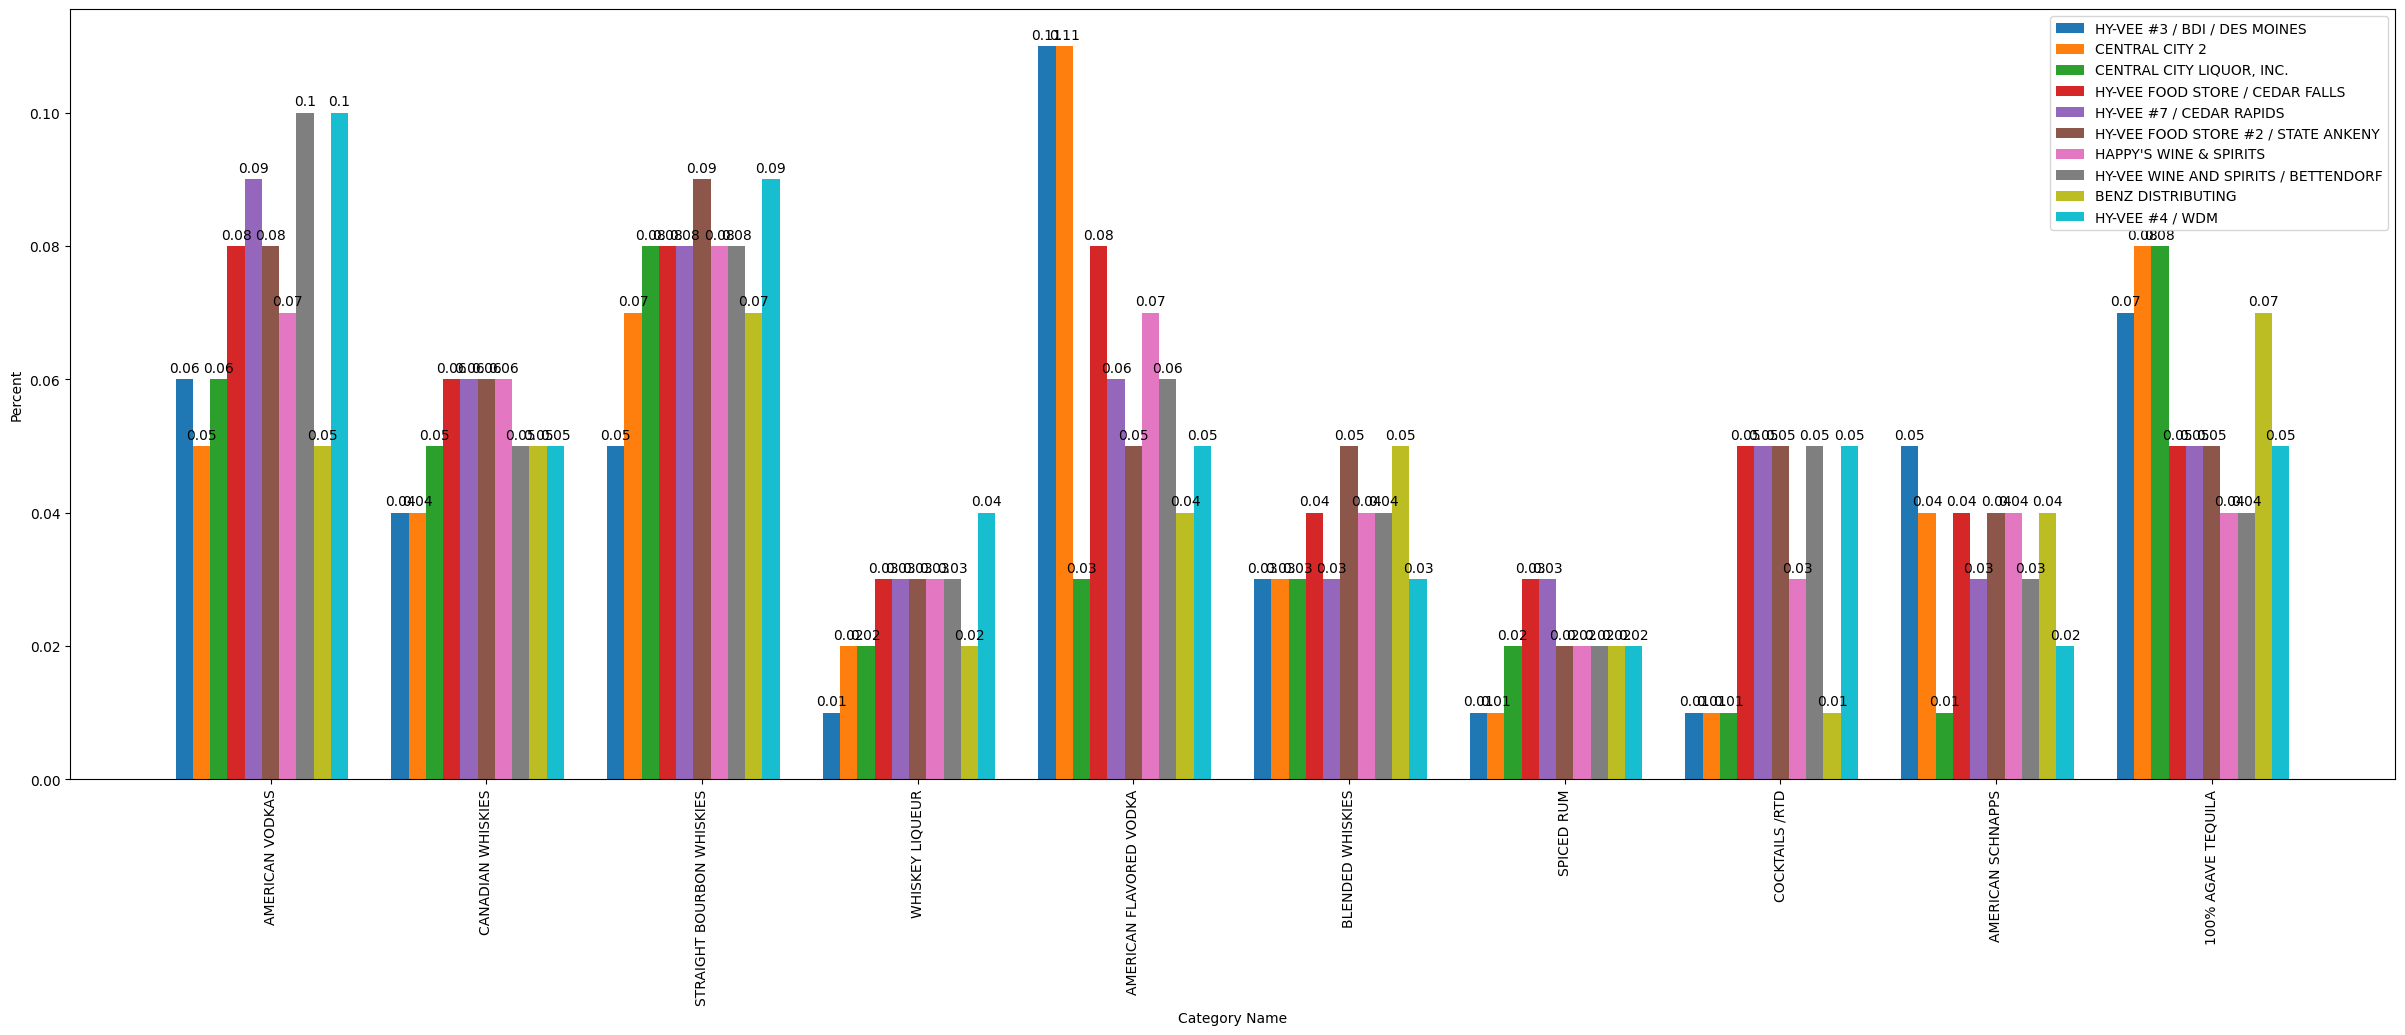

In [ ]:
#Plotting the double bar chart of the 4 most important caregorical values.
def double_bar_chart(explan,expl_ft,resp_ft,cat_cat):
  """
  prints the double bar chart of the 10 most important results of explanatory and esponse categorical values
  """
  labels = list(expl_ft.index[0:10])
  labels_exp = list(resp_ft.index[0:10])
  #3

  # conditional percentages (%)
  l = []
  for i in range(0,len(cat_cat.columns)-1):
    ar = np.array(cat_cat[resp_ft.index[i]])
    cond_perc = list(np.round(ar[0:-1]/ar[-1],2))
    #cond_perc = list(ar[0:-1])
    l.append(cond_perc)
  x = np.arange(len(labels))

  #plotting the two way table
  width = 0.08
  fig, ax = plt.subplots(figsize=(30,10))
  rects1 = ax.bar(x -width*5, l[0][0:10], width, label= labels_exp[0])
  rects2 = ax.bar(x - width*4, l[1][0:10], width,label=labels_exp[1])
  rects3 = ax.bar(x - width*3, l[2][0:10], width, label=labels_exp[2])
  rects4 = ax.bar(x - width*2, l[3][0:10], width,label= labels_exp[3])
  rects5 = ax.bar(x - width*1, l[4][0:10], width, label=labels_exp[4])
  rects6 = ax.bar(x + width*0, l[5][0:10], width,label= labels_exp[5])
  rects7 = ax.bar(x + width*1, l[6][0:10], width, label=labels_exp[6])
  rects8 = ax.bar(x + width*2, l[7][0:10], width,label= labels_exp[7])
  rects9 = ax.bar(x + width*3, l[8][0:10], width, label=labels_exp[8])
  rects10 = ax.bar(x + width*4, l[9][0:10], width,label= labels_exp[9])
  ax.set_ylabel('Percent')
  ax.set_xlabel(explan)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
  ax.bar_label(rects3, padding=3)
  ax.bar_label(rects4, padding=3)
  ax.bar_label(rects5, padding=3)
  ax.bar_label(rects6, padding=3)
  ax.bar_label(rects7, padding=3)
  ax.bar_label(rects8, padding=3)
  ax.bar_label(rects9, padding=3)
  ax.bar_label(rects10, padding=3)
  plt.xticks(rotation=90)

double_bar_chart('Category Name',category_s,store_s,cat_sto)

Interpretation: Central City 2 and HYVEE stores sell more American Flavored Vodka than any other type of liquor. The stores that sell more American Flavored Vodkas are Bettendorf and WDM. Central City Liquor Inc sells more 100% Agave Tequila (8% of the total share)

##### Category Name - City


In [ ]:
cat_city = two_way_table('Category Name','City',category_s,city_s,15)
cat_city.head(25)

DES MOINES  CEDAR RAPIDS  DAVENPORT  \
Category Name                                                      
AMERICAN VODKAS                 24299.0       18658.0    12019.0   
CANADIAN WHISKIES               12303.0       10127.0     5492.0   
STRAIGHT BOURBON WHISKIES        9581.0        8178.0     4913.0   
WHISKEY LIQUEUR                  8315.0        6597.0     4417.0   
AMERICAN FLAVORED VODKA          9049.0        5737.0     3652.0   
BLENDED WHISKIES                 5849.0        4997.0     4474.0   
SPICED RUM                       5221.0        5588.0     2550.0   
COCKTAILS /RTD                   3241.0        4166.0     2881.0   
AMERICAN SCHNAPPS                3909.0        3294.0     2925.0   
100% AGAVE TEQUILA               8248.0        4808.0     3351.0   
IMPORTED VODKAS                  5868.0        4551.0     2602.0   
TENNESSEE WHISKIES               4616.0        3276.0     2167.0   
AMERICAN BRANDIES                5872.0        3650.0     3446.0   
FLAVORED RUM                     3031.0        2841.0     1683.0   
AMERICAN CORDIALS & LIQUEUR      3139.0        2717.0     2026.0   
total_                         161536.0      124582.0    81935.0   

                             WEST DES MOINES  SIOUX CITY  WATERLOO  \
Category Name                                                        
AMERICAN VODKAS                       9664.0      8015.0    8090.0   
CANADIAN WHISKIES                     4669.0      5841.0    4783.0   
STRAIGHT BOURBON WHISKIES             5312.0      3872.0    2956.0   
WHISKEY LIQUEUR                       3092.0      3883.0    2371.0   
AMERICAN FLAVORED VODKA               3161.0      3486.0    2422.0   
BLENDED WHISKIES                      1956.0      2440.0    2455.0   
SPICED RUM                            2290.0      2543.0    1877.0   
COCKTAILS /RTD                        2497.0      1911.0    1998.0   
AMERICAN SCHNAPPS                     1034.0      2029.0    1600.0   
100% AGAVE TEQUILA                    2281.0      2381.0    2890.0   
IMPORTED VODKAS                       2496.0      1914.0    2242.0   
TENNESSEE WHISKIES                    1811.0      1876.0    1425.0   
AMERICAN BRANDIES                     1079.0      1724.0    3885.0   
FLAVORED RUM                          1226.0      1624.0    1137.0   
AMERICAN CORDIALS & LIQUEUR           1107.0      1967.0    1243.0   
total_                               62332.0     61542.0   59129.0   

                             COUNCIL BLUFFS     AMES  DUBUQUE  IOWA CITY  \
Category Name                                                              
AMERICAN VODKAS                      7922.0   6255.0   6908.0     7531.0   
CANADIAN WHISKIES                    4263.0   3801.0   3603.0     3155.0   
STRAIGHT BOURBON WHISKIES            4533.0   4203.0   3568.0     3871.0   
WHISKEY LIQUEUR                      4134.0   1846.0   2415.0     1815.0   
AMERICAN FLAVORED VODKA              2785.0   2958.0   2257.0     2976.0   
BLENDED WHISKIES                     3048.0   1634.0   2661.0     1530.0   
SPICED RUM                           2616.0   1864.0   1883.0     1673.0   
COCKTAILS /RTD                       1575.0   1740.0   1672.0     1570.0   
AMERICAN SCHNAPPS                    2685.0   1535.0   1357.0      935.0   
100% AGAVE TEQUILA                   1585.0   1692.0   1587.0     1913.0   
IMPORTED VODKAS                      1727.0   1511.0   1560.0     1714.0   
TENNESSEE WHISKIES                   2189.0   1135.0   1207.0     1077.0   
AMERICAN BRANDIES                    1340.0   1082.0   1579.0     1225.0   
FLAVORED RUM                         1112.0   1426.0   1218.0     1044.0   
AMERICAN CORDIALS & LIQUEUR          2112.0   1196.0   1340.0      850.0   
total_                              57508.0  49141.0  48571.0    48155.0   

                             CEDAR FALLS   ANKENY  CORALVILLE  MASON CITY  \
Category Name                                                               
AMERICAN VODKAS     

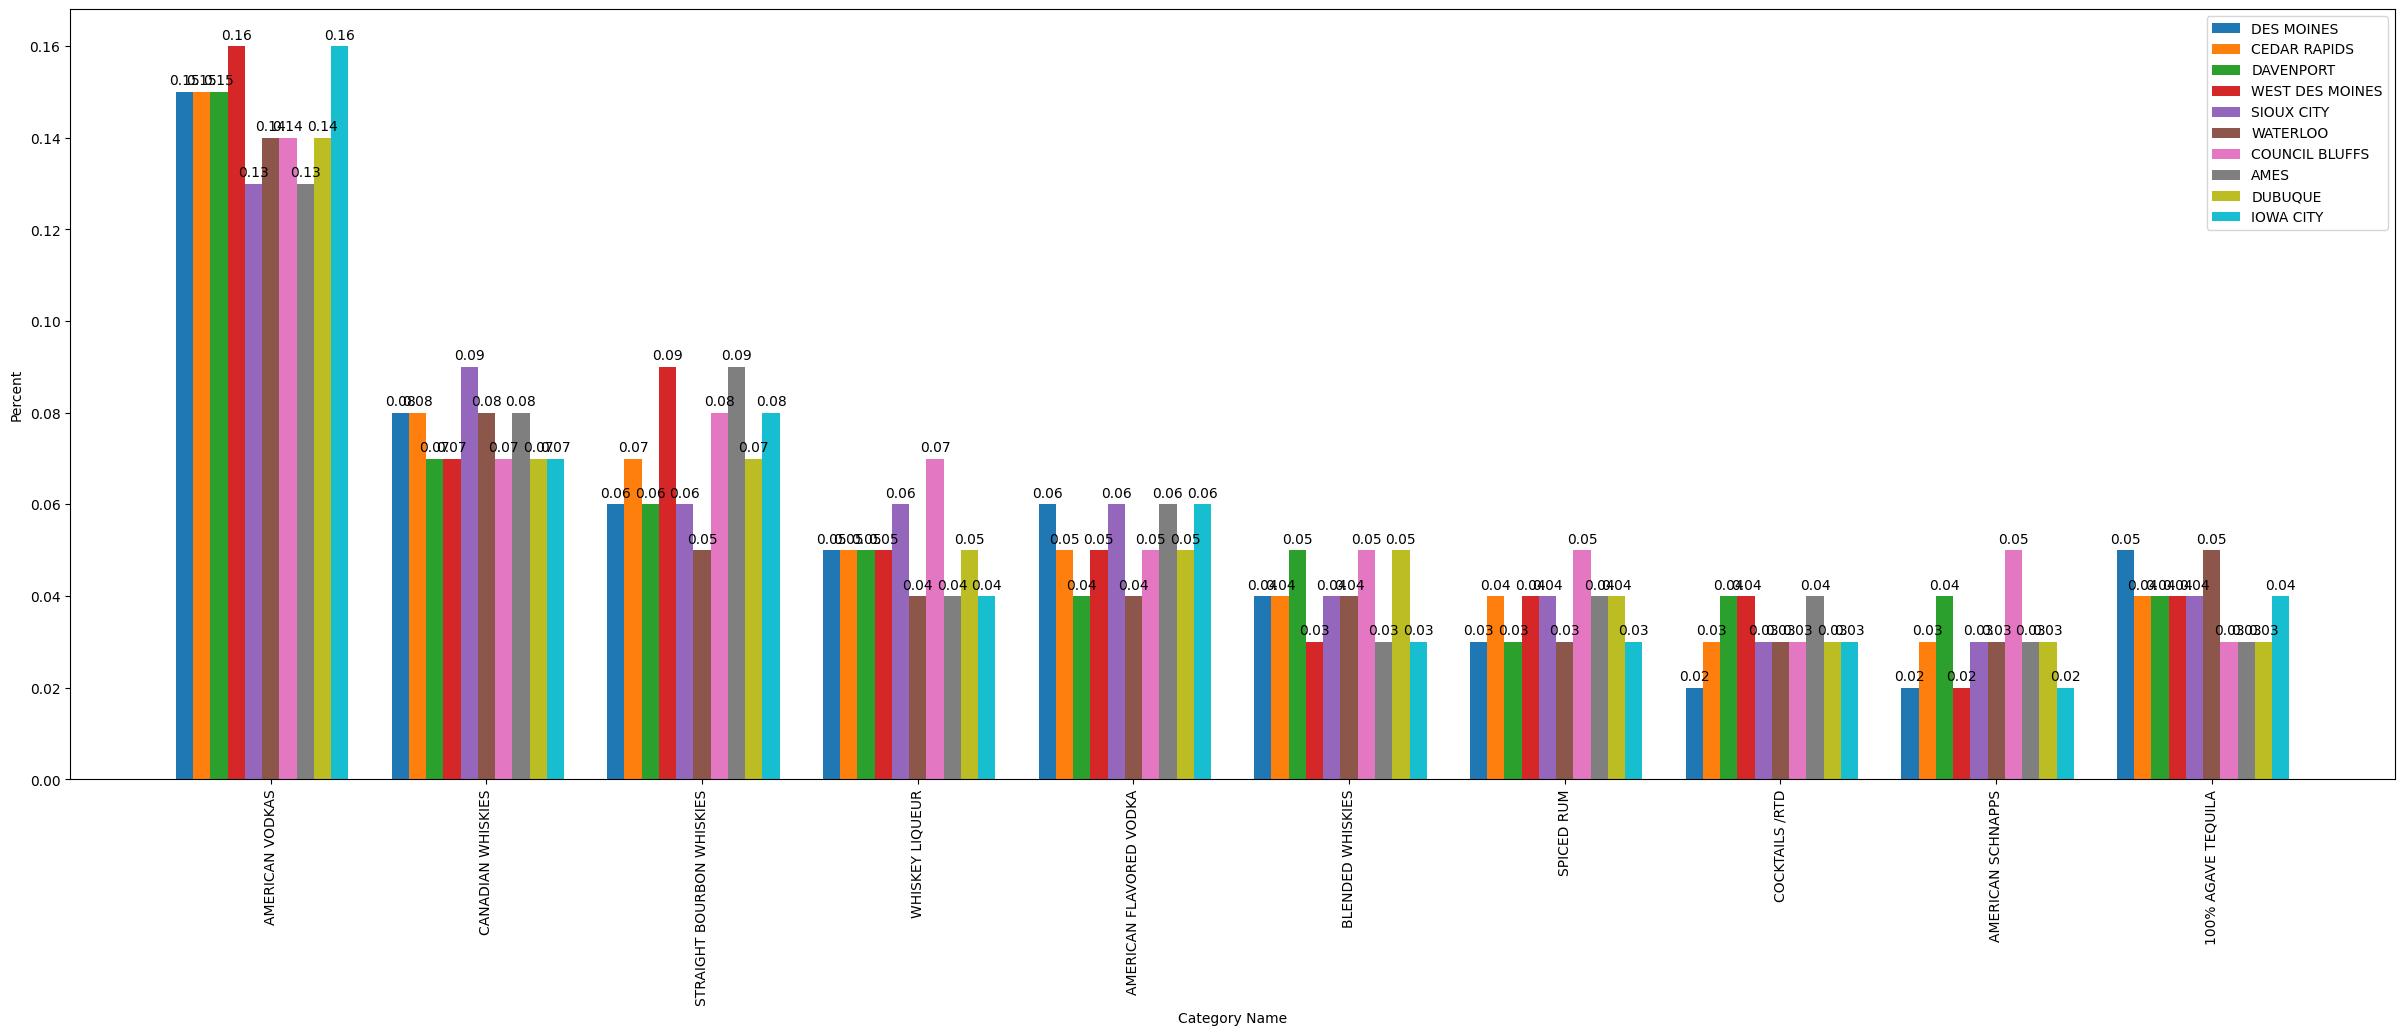

In [ ]:
double_bar_chart('Category Name',category_s,city_s,cat_city)

In Iowa City, Ames, and West Des Moines, the straight Bourbon Whiskies are mor popular than Canadian Whiskies. But in the other cities Canadian Whiskies are more popular. In overall, American Vodkas are sold more than any other liquor in all cities. 100% Agave Tequilas share max of 5% market share in any city.

 ##### Category Name - County


In [ ]:
cat_county = two_way_table('Category Name','County',category_s,county_s,15)
cat_county.head(25)

POLK      LINN     SCOTT  BLACK HAWK  \
Category Name                                                           
AMERICAN VODKAS               60256.0   25592.0   16469.0     14537.0   
CANADIAN WHISKIES             30106.0   14053.0    7946.0      9089.0   
STRAIGHT BOURBON WHISKIES     27327.0   10702.0    7405.0      6966.0   
WHISKEY LIQUEUR               20469.0    8974.0    6150.0      4756.0   
AMERICAN FLAVORED VODKA       19225.0    7430.0    5222.0      5652.0   
BLENDED WHISKIES              13283.0    6724.0    6271.0      5103.0   
SPICED RUM                    14387.0    7674.0    3779.0      3926.0   
COCKTAILS /RTD                11007.0    5427.0    4098.0      3912.0   
AMERICAN SCHNAPPS              8255.0    4443.0    4079.0      3648.0   
100% AGAVE TEQUILA            15320.0    5893.0    4732.0      4583.0   
IMPORTED VODKAS               13801.0    5778.0    3729.0      3820.0   
TENNESSEE WHISKIES            11344.0    4400.0    3228.0      2802.0   
AMERICAN BRANDIES              9463.0    4396.0    4165.0      5011.0   
FLAVORED RUM                   7510.0    3778.0    2481.0      2785.0   
AMERICAN CORDIALS & LIQUEUR    7032.0    3426.0    2811.0      2838.0   
total_                       376625.0  164116.0  116433.0    113911.0   

                             JOHNSON  WOODBURY  POTTAWATTA    STORY  DUBUQUE  \
Category Name                                                                  
AMERICAN VODKAS              14536.0    8898.0      9128.0   8333.0   7904.0   
CANADIAN WHISKIES             6810.0    6746.0      5399.0   5121.0   4407.0   
STRAIGHT BOURBON WHISKIES     7784.0    4206.0      5007.0   5003.0   4001.0   
WHISKEY LIQUEUR               3998.0    4405.0      4871.0   2602.0   2786.0   
AMERICAN FLAVORED VODKA       4834.0    3728.0      3039.0   3326.0   2493.0   
BLENDED WHISKIES              3378.0    2663.0      3413.0   2097.0   3067.0   
SPICED RUM                    3511.0    2898.0      3046.0   2462.0   2330.0   
COCKTAILS /RTD                3108.0    2079.0      1701.0   2031.0   1977.0   
AMERICAN SCHNAPPS             2051.0    2255.0      2947.0   1802.0   1660.0   
100% AGAVE TEQUILA            3629.0    2450.0      1649.0   1759.0   1662.0   
IMPORTED VODKAS               3622.0    2054.0      1903.0   1734.0   1730.0   
TENNESSEE WHISKIES            2302.0    2102.0      2500.0   1466.0   1421.0   
AMERICAN BRANDIES             2351.0    1804.0      1486.0   1238.0   1752.0   
FLAVORED RUM                  2016.0    1732.0      1201.0   1675.0   1374.0   
AMERICAN CORDIALS & LIQUEUR   1562.0    2104.0      2266.0   1350.0   1566.0   
total_                       95835.0   67005.0     64650.0  58950.0  55304.0   

                             CERRO GORD  DES MOINES   DALLAS  MUSCATINE  \
Category Name                                                             
AMERICAN VODKAS                  4622.0      4799.0   5356.0     3942.0   
CANADIAN WHISKIES                3693.0      2827.0   3048.0     2433.0   
STRAIGHT BOURBON WHISKIES        2814.0      1807.0   2525.0     2222.0   
WHISKEY LIQUEUR                  1953.0      1631.0   2003.0     2162.0   
AMERICAN FLAVORED VODKA          1588.0      1603.0   1434.0     1206.0   
BLENDED WHISKIES                 1511.0      1571.0    959.0     1462.0   
SPICED RUM                       1517.0      1416.0   1634.0     1195.0   
COCKTAILS /RTD                   1690.0       816.0   1206.0      913.0   
AMERICAN SCHNAPPS                1543.0      1055.0    543.0     1122.0   
100% AGAVE TEQUILA               1231.0       719.0    828.0      910.0   
IMPORTED VODKAS                  1455.0      1159.0    993.0      845.0   
TENNESSEE WHISKIES               1011.0       942.0    901.0      896.0   
AMERICAN BRANDIES                1143.0      1326.0    400.0      485.0   
FLAVORED RUM                     1068.0       610.0    720.0      781.0   
AMERICAN CORDIALS & LIQUEUR      1030.0       686.0    542.0      860.0   
to

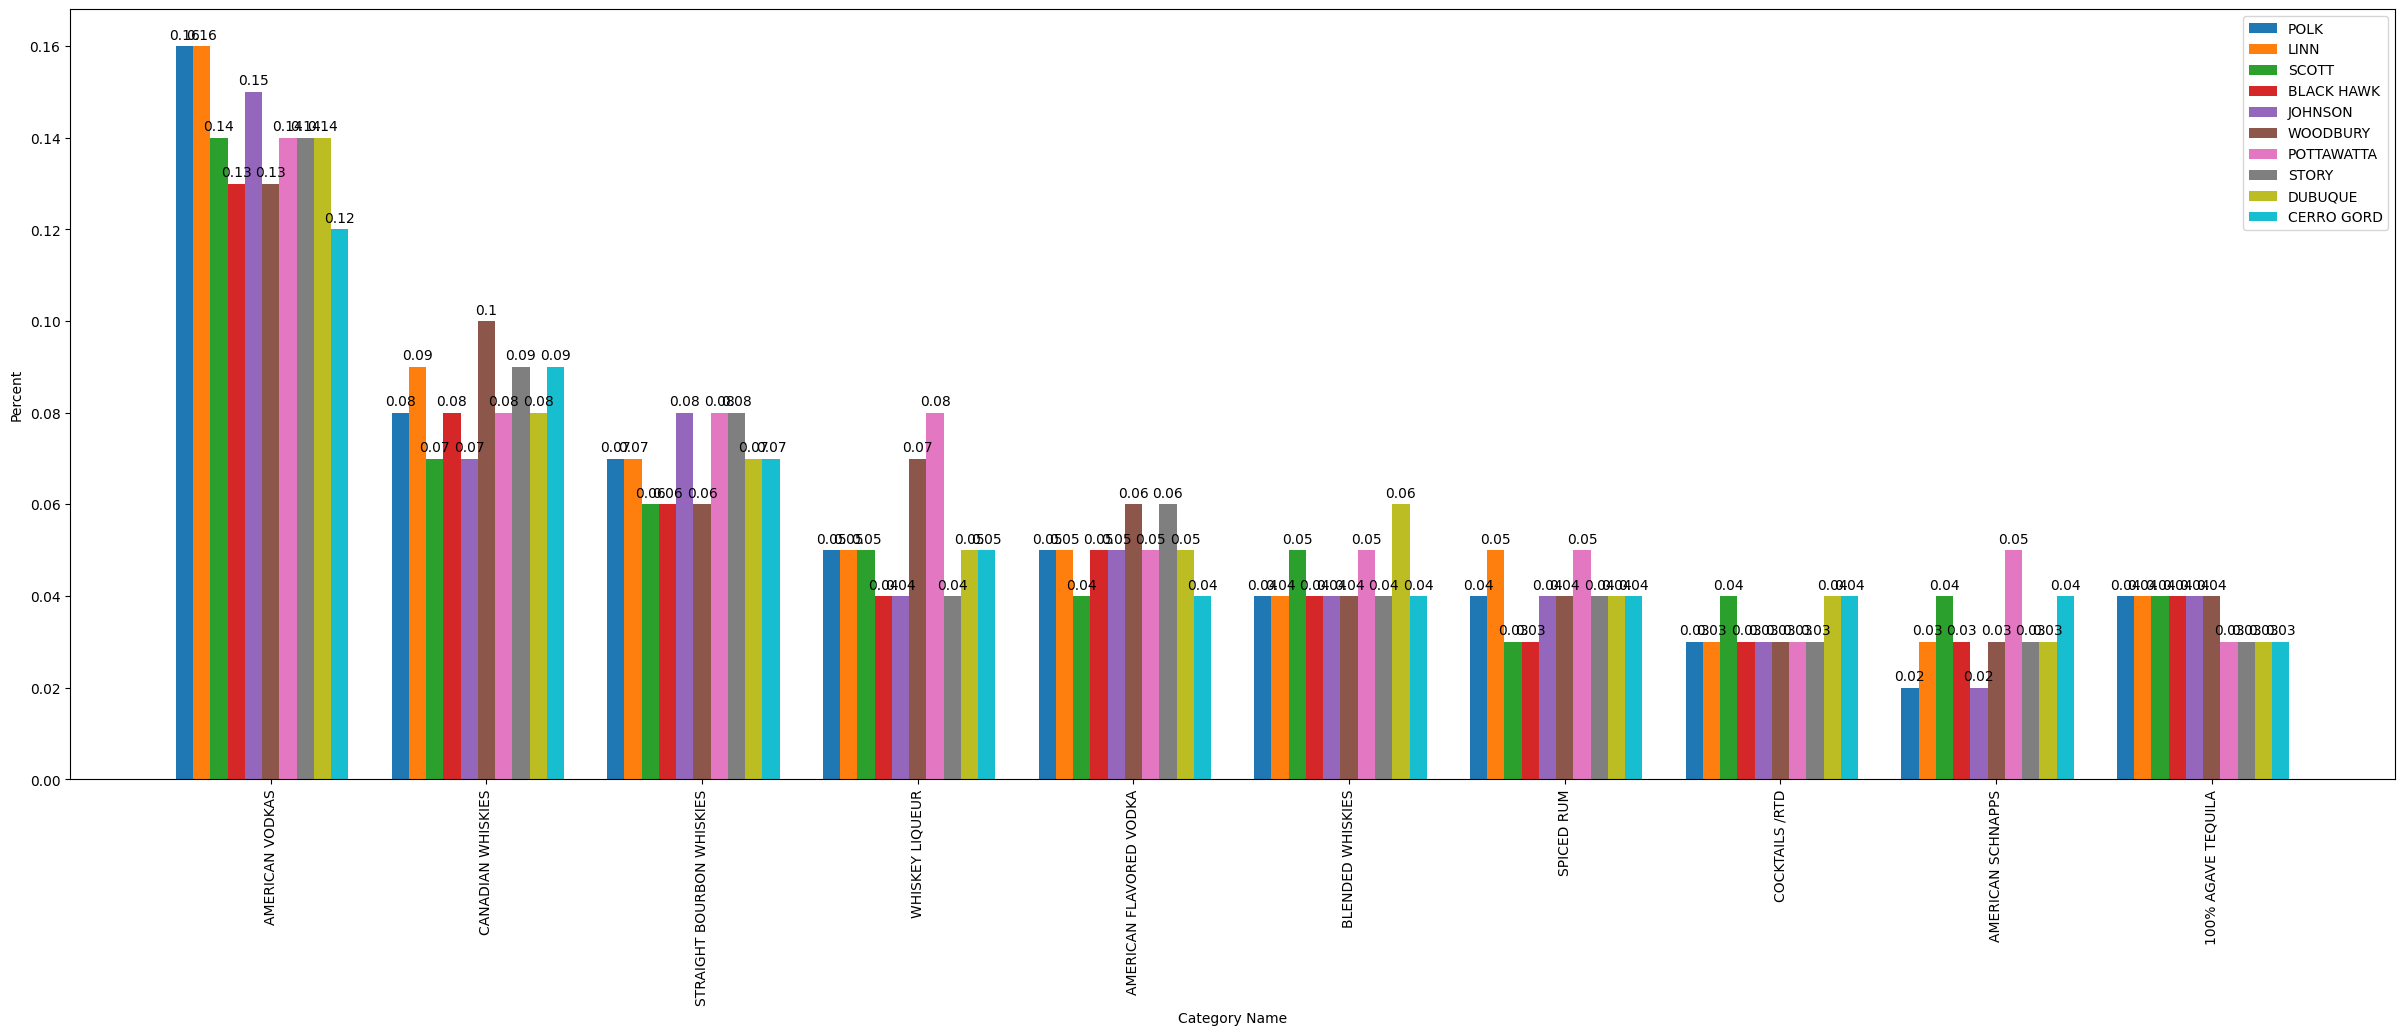

In [ ]:
double_bar_chart('Category Name',category_s,county_s,cat_county)

Almost in all Counties American Vodkas and Canadian Whiskies are the two most popular liquors. Only in Johnson and Pottawatta Counties the Straight Bourbon Whiskies are more popular than Canadian Whiskies.

American Vodkas share more percentage of the market share in Polk and Linn (16% in each county).

In Pottawa city, Whiskey Liqueur, Straight BOURBON Whiskeys, and Canadian Whiskeys share 8% of the market share of individual sales.

 ##### Date - Store


In [ ]:
date_store = two_way_table('Month_Year','Store Name',date_s,store_s,15)
date_store.head(25)


HY-VEE #3 / BDI / DES MOINES  CENTRAL CITY 2  \
Month_Year                                                 
2020-12                           1149.0          1230.0   
2020-06                           1283.0          1407.0   
2021-03                           1873.0          1783.0   
2020-09                           1103.0          1200.0   
2020-10                           1480.0          1390.0   
2021-07                           1591.0          1590.0   
2021-01                           1318.0          1225.0   
2021-04                           1669.0          1518.0   
2021-02                           1348.0          1381.0   
2020-08                            122.0           135.0   
2021-10                            117.0           106.0   
2016-11                              0.0             0.0   
2016-12                              0.0             0.0   
2016-10                              0.0             0.0   
2017-01                              0.0             0.0   
total_                           13053.0         12965.0   

            CENTRAL CITY LIQUOR, INC.  HY-VEE FOOD STORE / CEDAR FALLS  \
Month_Year                                                               
2020-12                        1776.0                           1659.0   
2020-06                        1540.0                           1570.0   
2021-03                        1543.0                           1043.0   
2020-09                        1347.0                           1515.0   
2020-10                        1381.0                           1229.0   
2021-07                        1215.0                           1371.0   
2021-01                        1166.0                           1155.0   
2021-04                        1294.0                           1201.0   
2021-02                        1214.0                           1184.0   
2020-08                         162.0                              0.0   
2021-10                          99.0                              0.0   
2016-11                           0.0                              0.0   
2016-12                           0.0                              0.0   
2016-10                           0.0                              0.0   
2017-01                           0.0                              0.0   
total_                        12737.0                          11927.0   

            HY-VEE #7 / CEDAR RAPIDS  HY-VEE FOOD STORE #2 / STATE ANKENY  \
Month_Year                                                                  
2020-12                       1438.0                               1563.0   
2020-06                       1288.0                               1456.0   
2021-03                       1152.0                               1132.0   
2020-09                       1239.0                               1317.0   
2020-10                       1166.0                               1062.0   
2021-07                        907.0                                980.0   
2021-01                        979.0                                877.0   
2021-04                       1068.0                                943.0   
2021-02                       1014.0                                917.0   
2020-08                        137.0                                  3.0   
2021-10                         82.0                                 32.0   
2016-11                          0.0                                  0.0   
2016-12                          0.0                                  0.0   
2016-10                          0.0                                  0.0   
2017-01                          0.0                                  0.0   
total_                       10470.0                              10283.0   

            HAPPY'S WINE & SPIRITS  HY-VEE WINE AND SPIRITS / BETTENDORF  \
Month_Year                                                                 
2020-12                     1300.0                         

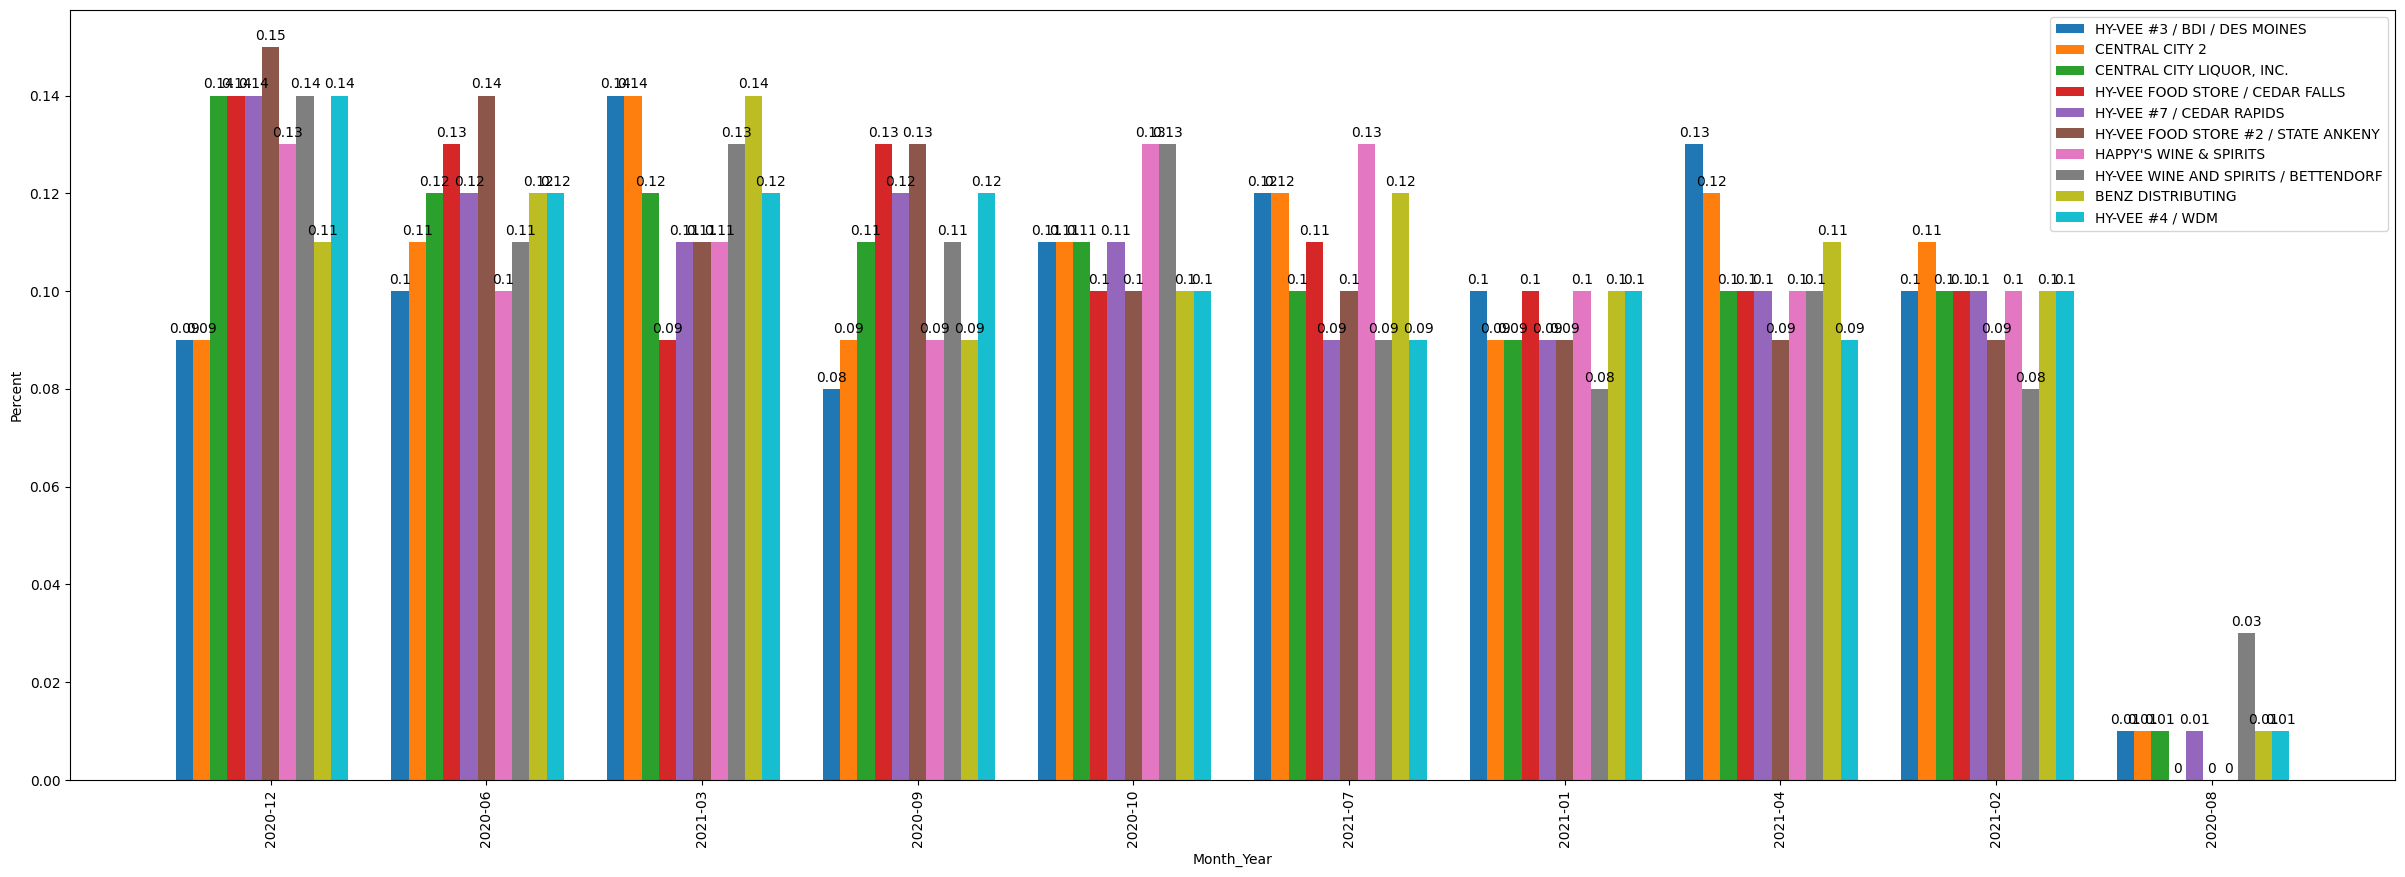

In [ ]:
double_bar_chart('Month_Year',date_s,store_s,date_store)

In december of 2020 the State Ankeny store sold had their best months in individual sales. While Central City 2 and Central City liquor had their best months in Debruary of 2021 and April 2021 (according to the chunk)

 ##### Date - City


In [ ]:
date_city = two_way_table('Month_Year','City',date_s,city_s,15)
date_city.head(25)

DES MOINES  CEDAR RAPIDS  DAVENPORT  WEST DES MOINES  SIOUX CITY  \
Month_Year                                                                     
2020-12        19164.0       15368.0     9768.0           7813.0      8044.0   
2020-06        18496.0       15598.0    10872.0           7574.0      8040.0   
2021-03        17772.0       14745.0     9934.0           7480.0      7182.0   
2020-09        16212.0       13270.0     8928.0           6864.0      7519.0   
2020-10        19238.0       13891.0     8875.0           6202.0      5905.0   
2021-07        18575.0       12464.0     7899.0           6499.0      6797.0   
2021-01        15532.0       12532.0     8232.0           6313.0      6104.0   
2021-04        17378.0       12073.0     7922.0           5946.0      6195.0   
2021-02        15306.0       11758.0     7550.0           6156.0      5496.0   
2020-08         2117.0        1707.0     1069.0            789.0       108.0   
2021-10         1652.0        1169.0      762.0            677.0       148.0   
2016-11            5.0           1.0       12.0              1.0         0.0   
2016-12            6.0           0.0       12.0              1.0         0.0   
2016-10           10.0           1.0        9.0              4.0         0.0   
2017-01            2.0           0.0       12.0              2.0         0.0   
total_        161537.0      124582.0    81936.0          62333.0     61542.0   

            WATERLOO  COUNCIL BLUFFS     AMES  DUBUQUE  IOWA CITY  \
Month_Year                                                          
2020-12       8148.0          6897.0   6776.0   5282.0     6409.0   
2020-06       8170.0          6098.0   4576.0   6236.0     6183.0   
2021-03       6322.0          6827.0   5566.0   5291.0     5834.0   
2020-09       7301.0          6492.0   5622.0   4454.0     6250.0   
2020-10       6159.0          6327.0   6273.0   4987.0     5633.0   
2021-07       5912.0          6937.0   4905.0   4887.0     4066.0   
2021-01       5588.0          5962.0   4898.0   4994.0     4521.0   
2021-04       5753.0          5482.0   4848.0   6158.0     4059.0   
2021-02       5594.0          5621.0   5246.0   4740.0     4711.0   
2020-08         28.0           480.0    228.0    992.0      143.0   
2021-10        139.0           383.0    130.0    491.0      302.0   
2016-11          0.0             0.0     15.0      4.0        7.0   
2016-12          2.0             0.0      7.0      5.0        5.0   
2016-10          3.0             1.0      2.0      5.0        3.0   
2017-01          3.0             0.0      5.0      6.0        2.0   
total_       59131.0         57508.0  49142.0  48571.0    48155.0   

            CEDAR FALLS   ANKENY  CORALVILLE  MASON CITY  URBANDALE      total  
Month_Year                                                                      
2020-12          6094.0   6504.0      4196.0      3507.0     3158.0   253679.0  
2020-06          5262.0   5100.0      3872.0      3059.0     3178.0   242018.0  
2021-03          5073.0   5549.0      3898.0      2626.0     2715.0   229617.0  
2020-09          4738.0   5825.0      2979.0      2745.0     2878.0   220755.0  
2020-10          4780.0   4624.0      3389.0      3297.0     2824.0   217079.0  
2021-07          5323.0   4226.0      3080.0      3208.0     2819.0   211440.0  
2021-01          4345.0   3916.0      2559.0      2475.0     2414.0   196339.0  
2021-04          4539.0   4206.0      2608.0      2736.0     2706.0   195707.0  
2021-02          4394.0   4149.0      2858.0      2682.0     2593.0   189834.0  
2020-08           116.0    147.0       270.0       451.0      257.0    22419.0  
2021-10            30.0    170.0       264.0         0.0      147.0    17341.0  
2016-11             0.0      2.0         0.0         0.0        0.0      114.0  
2016-12             0.0      4.0         0.0         0.0        0.0      105.0  
2016-10             0.0      1.0         0.0         0.0        0.0       97.0  
2017-01             0.0      7.0

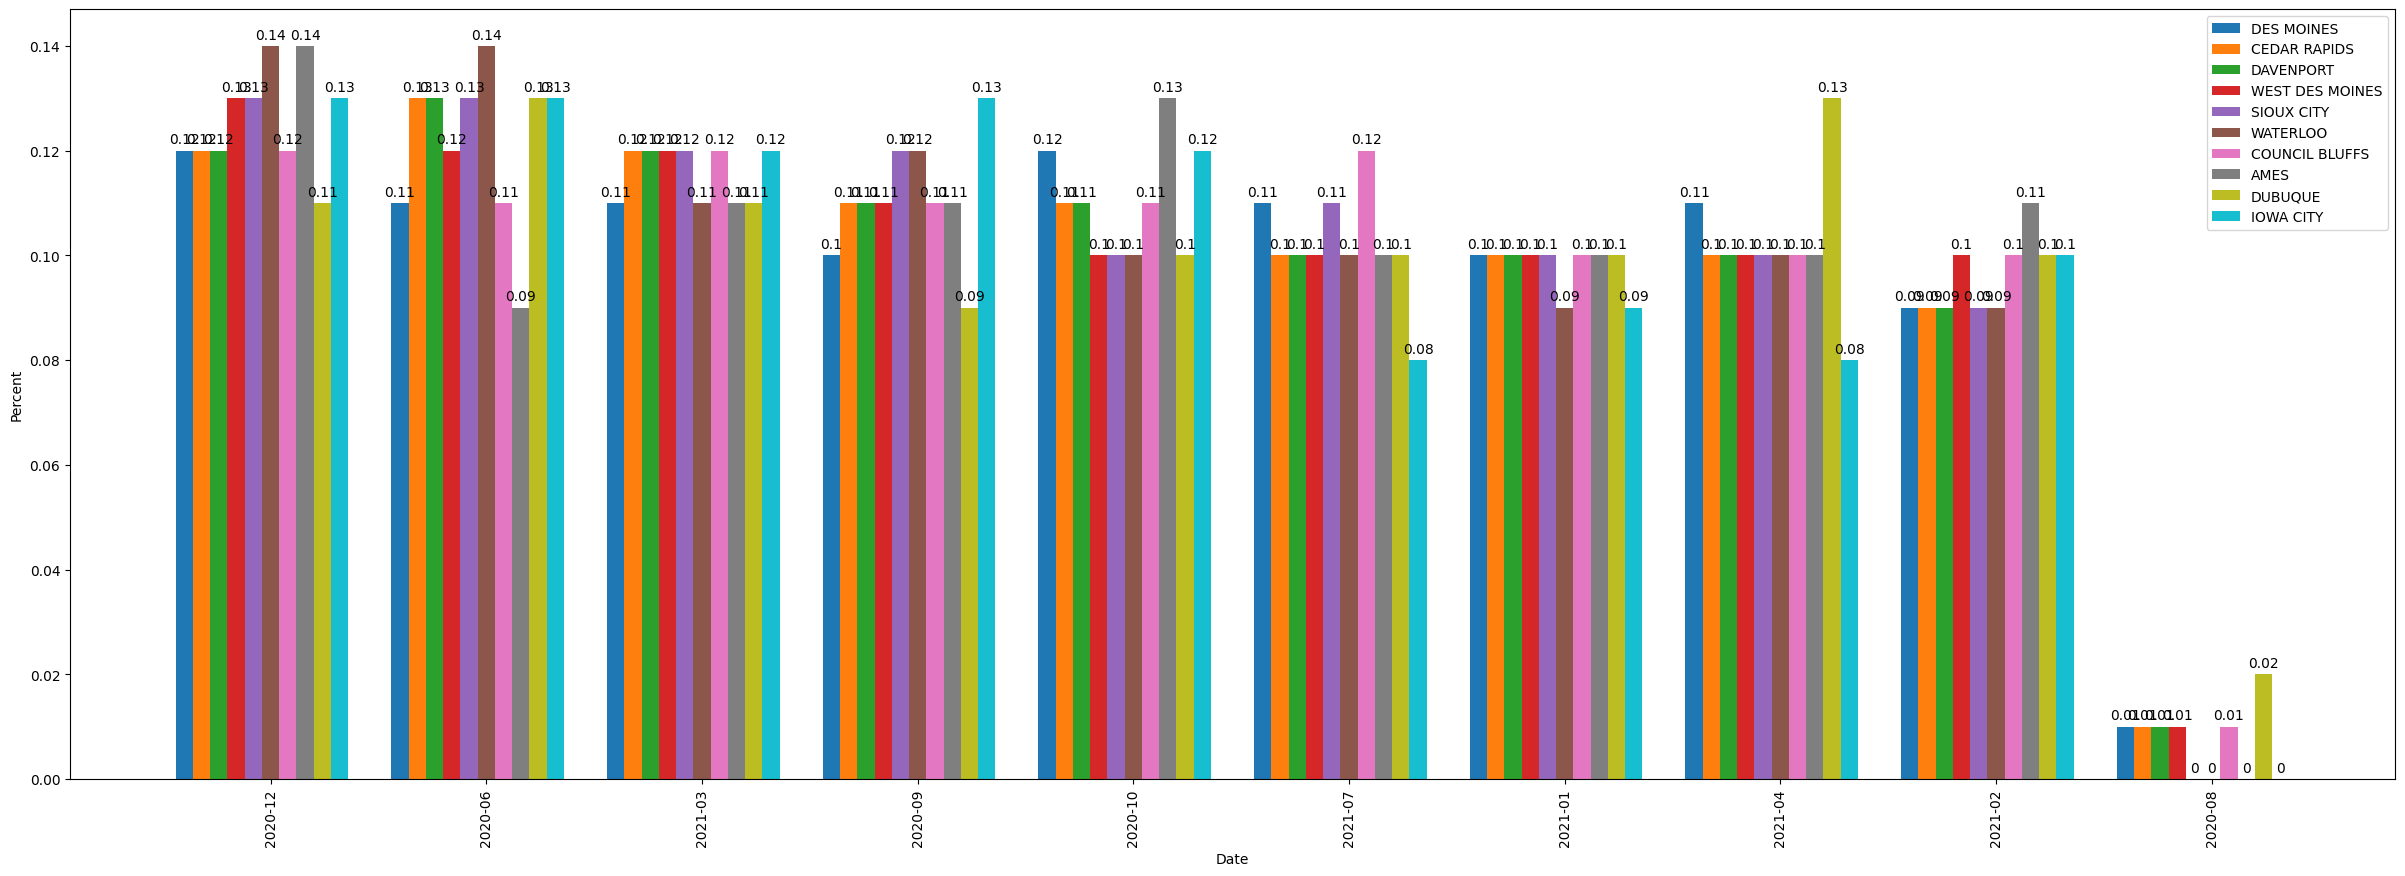

In [ ]:
double_bar_chart('Date',date_s,city_s,date_city)

In average all cities increase and decrease their sales across the state simultaneously. Some exceptions such as Dubuque city in April 2021 are evident where the city sold 13% of the liquor in the period annalyzed while other cities sold the 10% in that month.

 ##### Date - County


In [ ]:
date_county = two_way_table('Month_Year','County',date_s,county_s,15)
date_county.head(25)

POLK      LINN     SCOTT  BLACK HAWK  JOHNSON  WOODBURY  \
Month_Year                                                                
2020-12      48026.0   20089.0   14105.0     15606.0  12812.0    8668.0   
2020-06      43302.0   20068.0   15150.0     14792.0  12343.0    8629.0   
2021-03      41986.0   19157.0   14312.0     12554.0  11804.0    7839.0   
2020-09      40914.0   16902.0   12437.0     13485.0  11397.0    8258.0   
2020-10      41771.0   18553.0   12909.0     11912.0  11066.0    6480.0   
2021-07      41672.0   17175.0   11094.0     12209.0   8708.0    7406.0   
2021-01      36197.0   16400.0   11399.0     10883.0   8739.0    6679.0   
2021-04      38966.0   16037.0   11431.0     11153.0   8372.0    6702.0   
2021-02      36234.0   15424.0   10568.0     10937.0   9236.0    6071.0   
2020-08       4127.0    2459.0    1841.0       141.0    577.0     110.0   
2021-10       3186.0    1782.0    1061.0       221.0    736.0     159.0   
2016-11         11.0      10.0      12.0         0.0      7.0       0.0   
2016-12         18.0       4.0      12.0         3.0      5.0       0.0   
2016-10         17.0       8.0       9.0         3.0      3.0       0.0   
2017-01         21.0       7.0      12.0         3.0      2.0       0.0   
total_      376628.0  164116.0  116434.0    113913.0  95835.0   67005.0   

            POTTAWATTA    STORY  DUBUQUE  CERRO GORD  DES MOINES   DALLAS  \
Month_Year                                                                  
2020-12         7806.0   8086.0   6129.0      4976.0      4143.0   3870.0   
2020-06         6826.0   5805.0   7138.0      4817.0      3253.0   3246.0   
2021-03         7489.0   6588.0   5973.0      3870.0      3211.0   3285.0   
2020-09         7238.0   6725.0   5007.0      4050.0      2929.0   2907.0   
2020-10         7303.0   7295.0   5693.0      4740.0      3507.0   3170.0   
2021-07         7741.0   5949.0   5644.0      4942.0      3591.0   3657.0   
2021-01         6626.0   5951.0   5619.0      3669.0      3061.0   3020.0   
2021-04         6243.0   5794.0   6821.0      3899.0      3077.0   3414.0   
2021-02         6216.0   6244.0   5358.0      3779.0      2712.0   3034.0   
2020-08          651.0    274.0   1202.0       538.0       584.0    393.0   
2021-10          507.0    159.0    658.0        11.0       548.0    508.0   
2016-11            0.0     15.0      4.0         0.0         0.0      0.0   
2016-12            0.0      7.0      6.0         0.0         1.0      0.0   
2016-10            1.0      2.0      5.0         0.0         2.0      1.0   
2017-01            0.0      5.0      7.0         0.0         1.0      1.0   
total_         64650.0  58951.0  55304.0     39291.0     30623.0  30507.0   

            MUSCATINE  CLINTON  DICKINSON      total  
Month_Year                                            
2020-12        3056.0   3056.0     2579.0   253679.0  
2020-06        3934.0   3747.0     3550.0   242018.0  
2021-03        3722.0   3538.0     2801.0   229617.0  
2020-09        2766.0   2574.0     3277.0   220755.0  
2020-10        2922.0   2735.0     2107.0   217079.0  
2021-07        2550.0   2925.0     3759.0   211440.0  
2021-01        2958.0   2704.0     2522.0   196339.0  
2021-04        2930.0   2751.0     2110.0   195707.0  
2021-02        2801.0   2771.0     2002.0   189834.0  
2020-08         706.0    670.0      140.0    22419.0  
2021-10         151.0    464.0        0.0    17341.0  
2016-11           1.0      4.0        0.0      114.0  
2016-12           1.0      2.0        0.0      105.0  
2016-10           0.0      2.0        0.0       97.0  
2017-01           0.0      2.0        0.0       93.0  
total_        28498.0  27964.0    24847.0  1997482.0

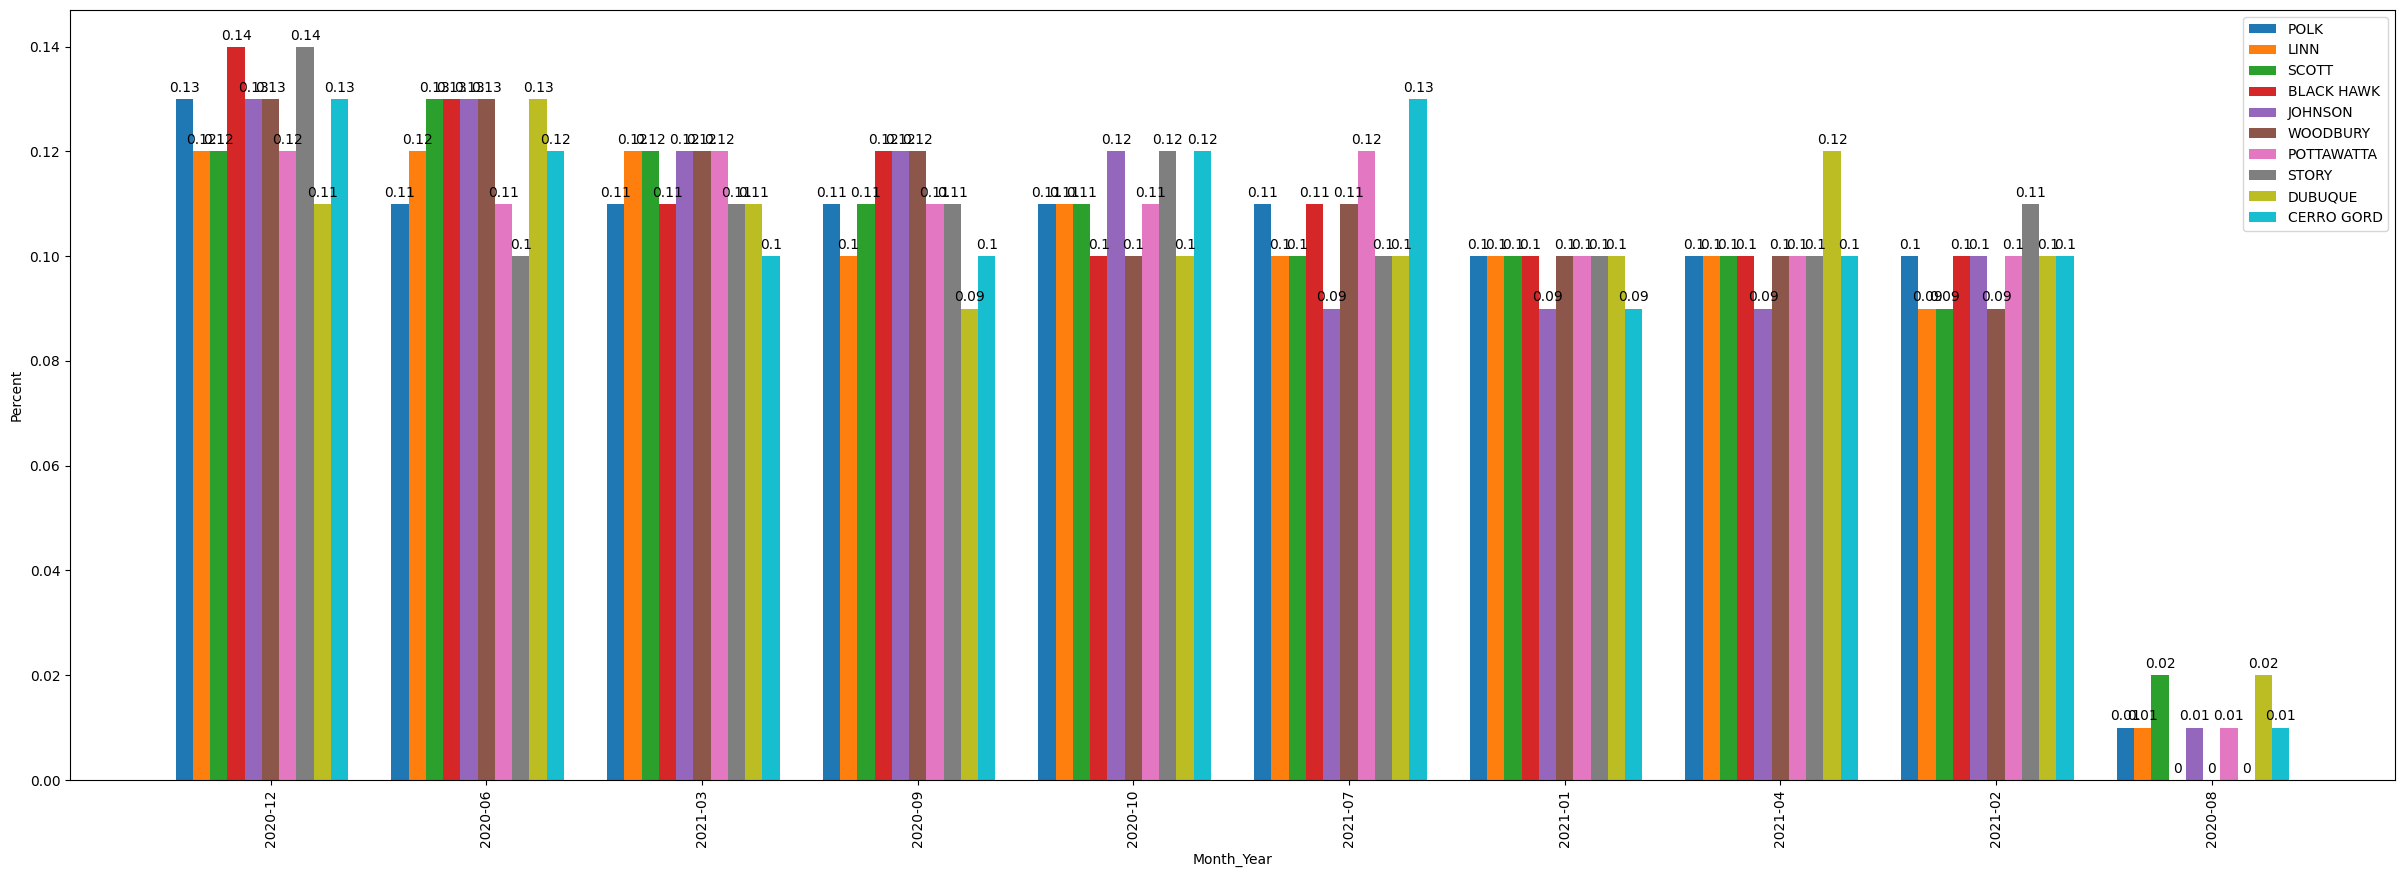

In [ ]:
double_bar_chart('Month_Year',date_s,county_s,date_county)

In average, all counties increase and decrease relative frequency of sales per month simultaneously. But in July 2021, Johnson county sold 9% of the total liquor sold in the period while Cerro Gordo County sold 13%.

 ##### Category Name - Date

In [ ]:
cat_date = two_way_table('Category Name','Month_Year',category_s,date_s,15)
cat_date.head(25)

2020-12   2020-06   2021-03   2020-09   2020-10  \
Category Name                                                                   
AMERICAN VODKAS               34613.0   34609.0   33129.0   32605.0   31840.0   
CANADIAN WHISKIES             25698.0   22164.0   23436.0   18973.0   19567.0   
STRAIGHT BOURBON WHISKIES     18065.0   14789.0   16861.0   16236.0   14914.0   
WHISKEY LIQUEUR               13608.0   12730.0   12477.0   12425.0   12179.0   
AMERICAN FLAVORED VODKA       10572.0   12516.0   10139.0   10589.0    9593.0   
BLENDED WHISKIES              11581.0    9960.0    9766.0    9871.0    9775.0   
SPICED RUM                    11158.0   10251.0    9793.0    9733.0    9275.0   
COCKTAILS /RTD                 7899.0   10507.0    7780.0    6419.0    6125.0   
AMERICAN SCHNAPPS              8741.0    7156.0    7365.0    6853.0    6878.0   
100% AGAVE TEQUILA             7456.0    8287.0    7780.0    6187.0    6531.0   
IMPORTED VODKAS                7624.0    8197.0    6736.0    7270.0    6487.0   
TENNESSEE WHISKIES             7698.0    6829.0    6773.0    6549.0    6525.0   
AMERICAN BRANDIES              6939.0    6039.0    5753.0    5745.0    6006.0   
FLAVORED RUM                   5873.0    7195.0    5675.0    5073.0    4371.0   
AMERICAN CORDIALS & LIQUEUR    5763.0    5794.0    5825.0    4707.0    5325.0   
total_                       253679.0  242065.0  229625.0  220755.0  217079.0   

                              2021-07   2021-01   2021-04   2021-02  2020-08  \
Category Name                                                                  
AMERICAN VODKAS               32678.0   28623.0   28763.0   27736.0   3637.0   
CANADIAN WHISKIES             18641.0   19519.0   18905.0   21504.0   1858.0   
STRAIGHT BOURBON WHISKIES     14806.0   13697.0   13245.0   13971.0   1310.0   
WHISKEY LIQUEUR               11762.0   10693.0   10780.0   10366.0   1263.0   
AMERICAN FLAVORED VODKA       10726.0    8935.0    8818.0    8019.0   1036.0   
BLENDED WHISKIES               8821.0    9036.0    8379.0    8436.0    973.0   
SPICED RUM                     9126.0    8763.0    8274.0    8711.0   1007.0   
COCKTAILS /RTD                 7667.0    5877.0    6985.0    5635.0    820.0   
AMERICAN SCHNAPPS              6427.0    6842.0    6222.0    6437.0    710.0   
100% AGAVE TEQUILA             6667.0    6161.0    6317.0    6094.0    684.0   
IMPORTED VODKAS                6769.0    5818.0    6293.0    5670.0    788.0   
TENNESSEE WHISKIES             5464.0    5633.0    6213.0    5550.0    656.0   
AMERICAN BRANDIES              5022.0    6009.0    4895.0    5419.0    611.0   
FLAVORED RUM                   6018.0    4569.0    5247.0    4264.0    499.0   
AMERICAN CORDIALS & LIQUEUR    5413.0    5074.0    5015.0    4308.0    629.0   
total_                       211440.0  196339.0  195707.0  189887.0  22419.0   

                             2021-10  2016-11  2016-12  2016-10  2017-01  \
Category Name                                                              
AMERICAN VODKAS               2764.0     97.0     61.0     74.0     65.0   
CANADIAN WHISKIES             1771.0     41.0     50.0     34.0     28.0   
STRAIGHT BOURBON WHISKIES     1210.0     25.0     22.0     23.0     23.0   
WHISKEY LIQUEUR               1143.0      8.0     13.0     13.0     11.0   
AMERICAN FLAVORED VODKA        740.0     22.0     15.0     19.0     11.0   
BLENDED WHISKIES               708.0     24.0     23.0     19.0     16.0   
SPICED RUM                     806.0     29.0     21.0     28.0     21.0   
COCKTAILS /RTD                 422.0      6.0     10.0      6.0      2.0   
AMERICAN SCHNAPPS              443.0     10.0     11.0     14.0     19.0   
100% AGAVE TEQUILA             534.0     10.0      8.0     11.0     10.0   
IMPORTED VODKAS                339.0     14.0     25.0     15.0     16.0   
TENNESSEE WHISKIES             471.0      5.0      5.0      6.0      6.0   
AMERICAN BRANDIES              413.0     29.0     17.0     19.0   

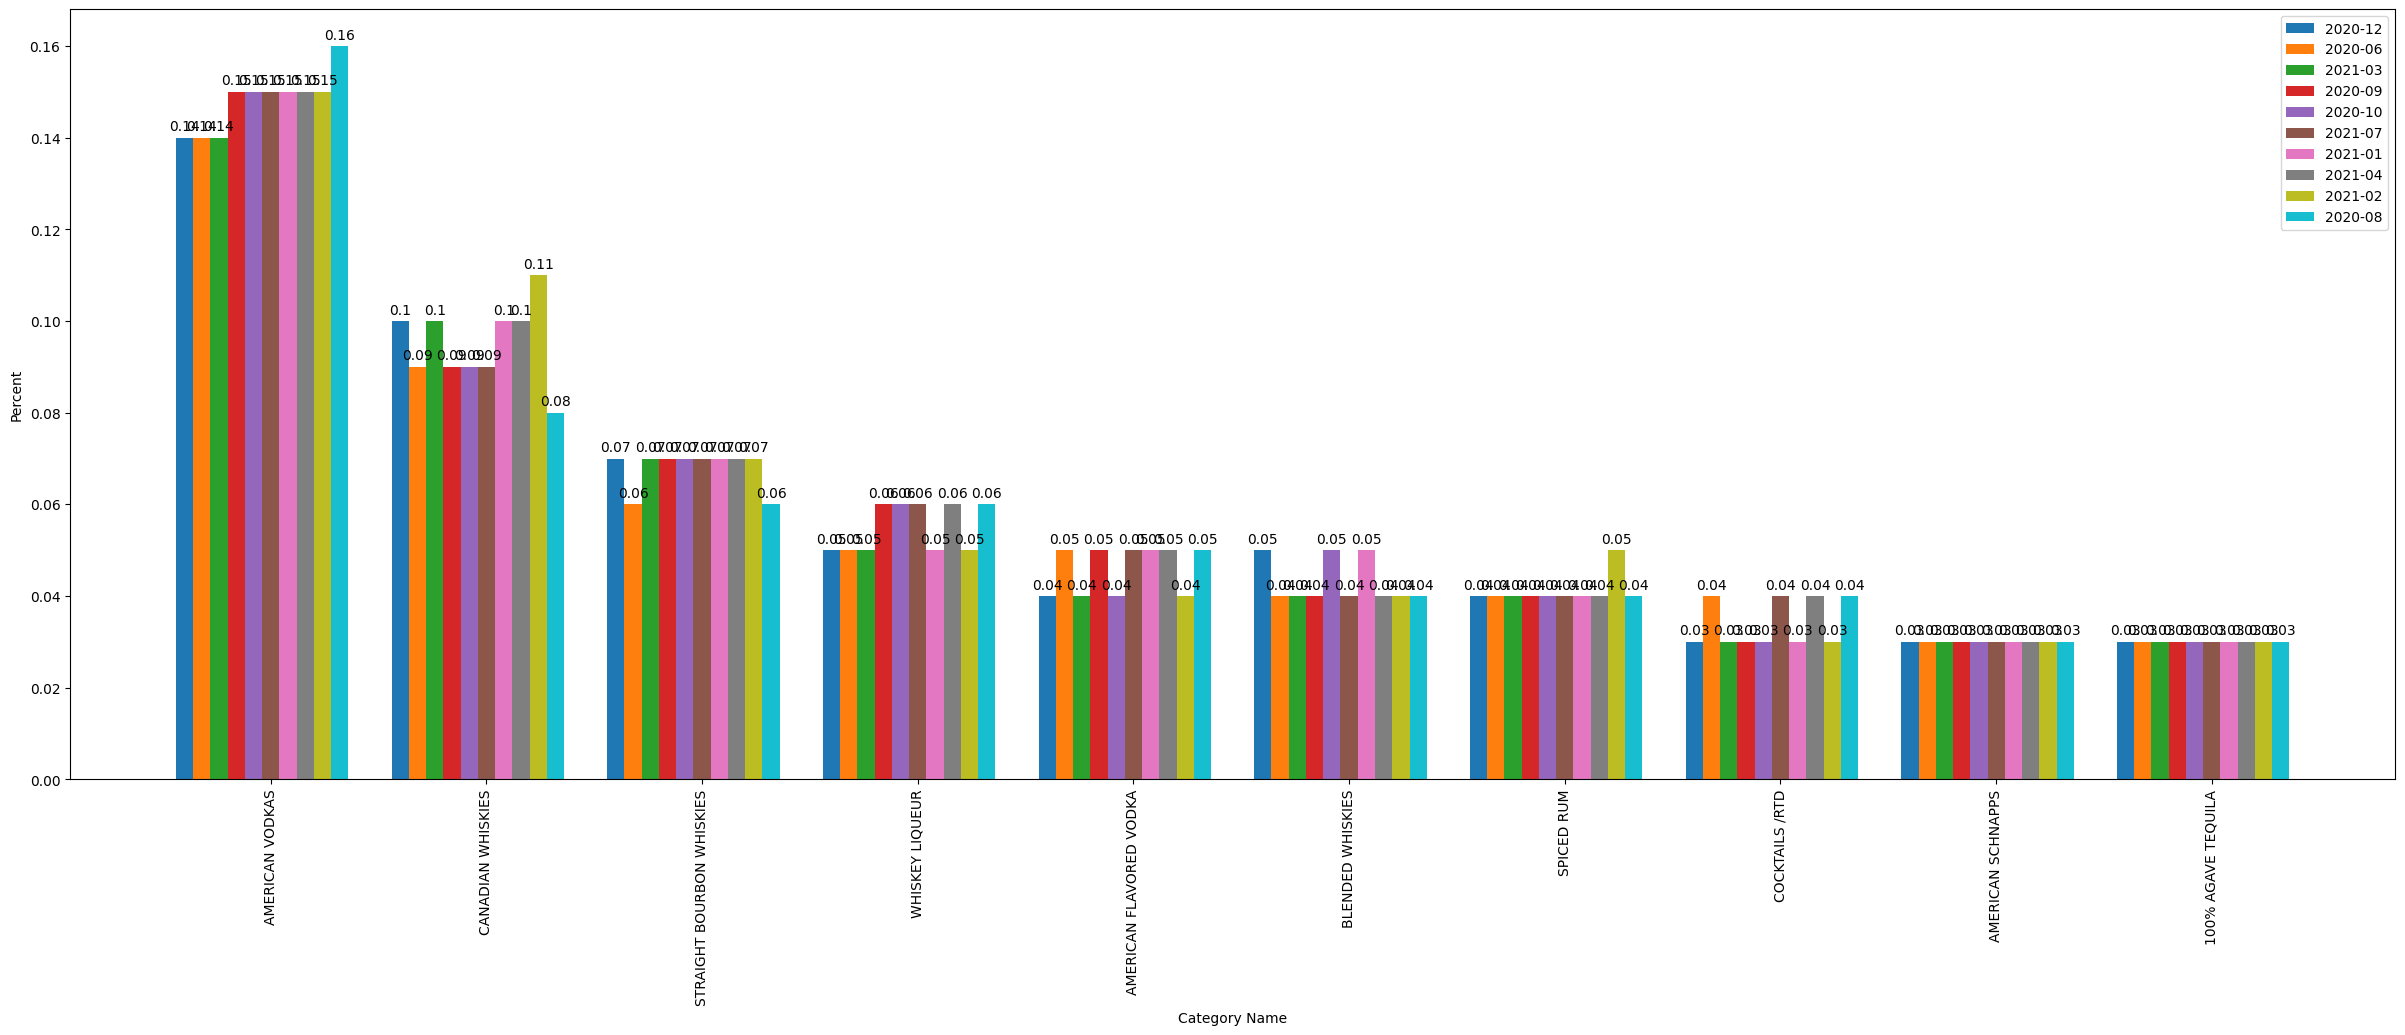

In [ ]:
double_bar_chart('Category Name',category_s,date_s,cat_date)

During all months, American Vodkas and Canadian Whiskies where the most popular liquors, followed by Straight Bourbon Whiskies and Whiskey Liqueur. This follow the general trend that in overall, American Whiskies and Canadian Whiskies are the most popular liquors

#### 1.2.3 Quantitative -> Quantitative

In [ ]:
print(quan_cols)

['Volume Sold (Gallons)', 'Volume Sold (Liters)', 'Sale (Dollars)', 'Bottles Sold', 'State Bottle Retail', 'State Bottle Cost', 'Pack']


##### Volume Sold (Liters) -> Bottles Sold

y=4.481 +0.773*x


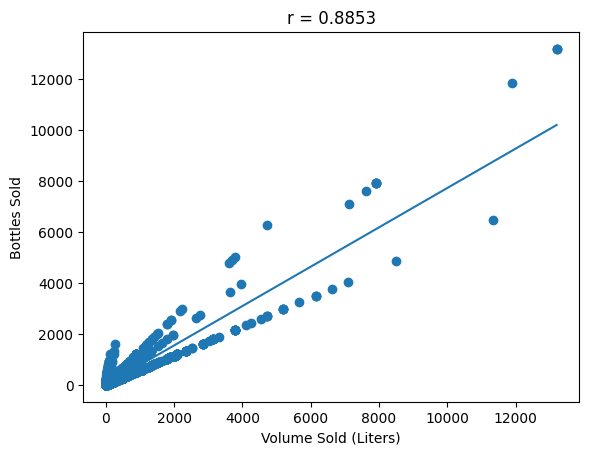

In [ ]:
def plot_scatter_quan(explan, resp,ran):
  """
  This function calculates the least square regression and scatter plot relationship between two quantitative variables
  explan: explanatory quantitative variable
  resp: resp quantitative variable
  ran: max value of explan quantitativa value
  """

  corr_mat = np.corrcoef(chunk[explan],chunk[resp])
  r = corr_mat[0][1]

  #Least square regression
  b = r*(np.std(chunk[resp])/np.std(chunk[explan]))
  a = np.mean(chunk[resp])-b*(np.mean(chunk[explan]))
  x1 = np.linspace(15,ran)
  y1 = b*x1 + a

  plt.scatter(chunk[explan], chunk[resp])
  plt.plot(x1,y1,label=f'y={round(a,3)} +{round(b,3)}*x')
  plt.xlabel(explan)
  plt.ylabel(resp)
  plt.title(f'r = {round(r, 4)}')
  print(f'y={round(a,3)} +{round(b,3)}*x')

plot_scatter_quan('Volume Sold (Liters)', 'Bottles Sold',max(chunk['Volume Sold (Liters)']))


The relationship between Volume Sold and Bottle sold is linear and positive. In overall it is a strong relationship as r= 0.88

According to the equation y = 4.481 + 0.773*x, for each liter of liquor sold, there has been sold 0.733 bottles. In other words, in average, each bottle represents 1/0.733 liters (1.37 liters)

##### Volume Sold (Liters) -> Sale (Dollars)

y=38.946 +12.797*x


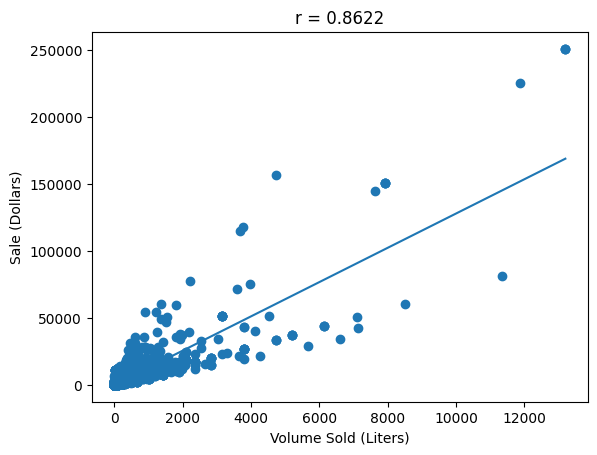

In [ ]:
plot_scatter_quan('Volume Sold (Liters)', 'Sale (Dollars)',max(chunk['Volume Sold (Liters)']))

The volume sold vs the sale in dollars is also linear, strong, and positive relationship as r = 0.8622.

In average, there is a raw cost per bottle of 38.95 dollars and each litter of liquor cost 12.797 as the relationship is represented by: y = 38.95+12.797x

##### Volume Sold (Pack)

y=12.126 +-0.007*x


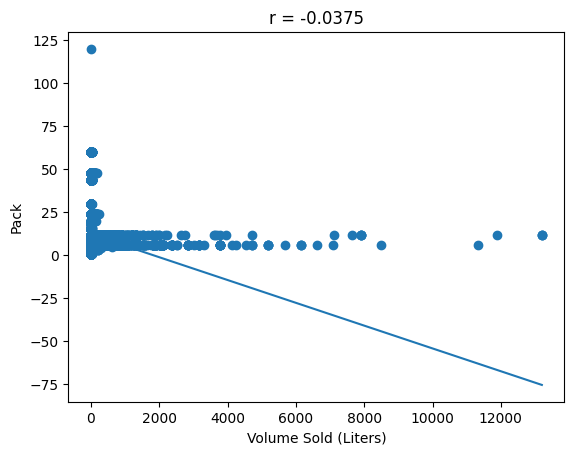

In [ ]:
plot_scatter_quan('Volume Sold (Liters)','Pack',max(chunk['Volume Sold (Liters)']))

The relationship between Volume Sold (Liters) and Pack is not linear. Though, it seems that there could be a non-linear relationship as liters close to 0 need more packs than a big amount of litters sales.

##### volume sold -> State bottle retail

y=16.63 +-0.001*x


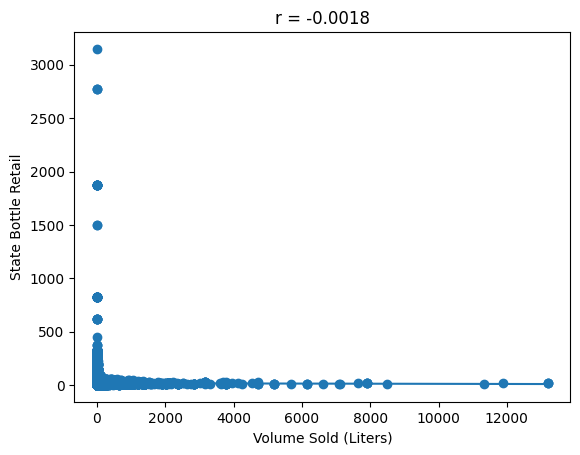

In [ ]:
plot_scatter_quan('Volume Sold (Liters)','State Bottle Retail',max(chunk['Volume Sold (Liters)']))

There is no a linear relationship between volume sold and liters as r is shorter than 1. Anyway, it is interesting that some sales of a few liters sold have state bottle retail higher than 500 while all the other values. of volume sold have a short state bottle retail. So there could be a negative non-linear relationship

##### volume sold -> state bottle cost

y=11.085 +-0.0*x


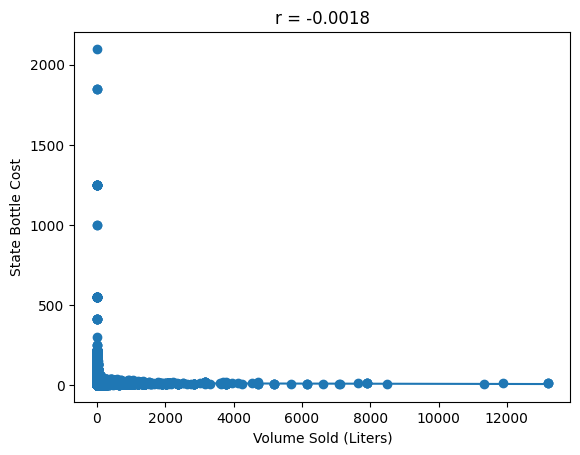

In [ ]:
plot_scatter_quan('Volume Sold (Liters)','State Bottle Cost',max(chunk['Volume Sold (Liters)']))

State bottle cost - Volume sold relationship is similar in shape to State bottle retail-Vokume sold relationship. The most important difference seems to be the the magnitud order od the state bottle cost. While the maximum state bottle retail was around 3000; the max state bottle cost is just higher than 2000.

##### Sale (Dollars) -> Bottles Sold

y=3.605 +0.051*x


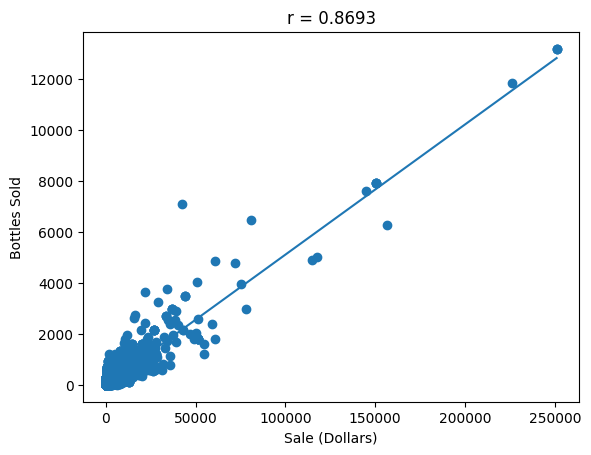

In [ ]:
plot_scatter_quan('Sale (Dollars)','Bottles Sold',max(chunk['Sale (Dollars)']))

The relationship between bottles sold and the sale in dollars is positive, linear, and strong. r is equal to 0.87.

As b is equal to 0.051, in average each dollar of sale represent half of a bottle sold.

##### Sale (Dollars) -> State bottle cost

y=10.88 +0.001*x


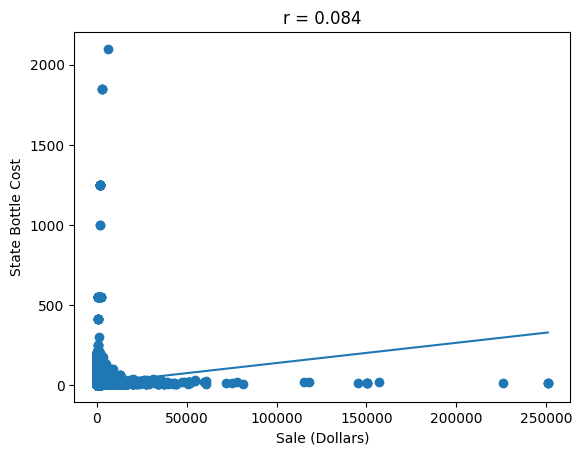

In [ ]:
plot_scatter_quan('Sale (Dollars)','State Bottle Cost',max(chunk['Sale (Dollars)']))

The relationship between State bottle cost and Sale in Dollars is not a linear relationship. According to the shape of the scatteredplot it seems that this relationship is negative and non linear.

##### Sale (Dollars) -> State bottle retail

y=16.323 +0.002*x


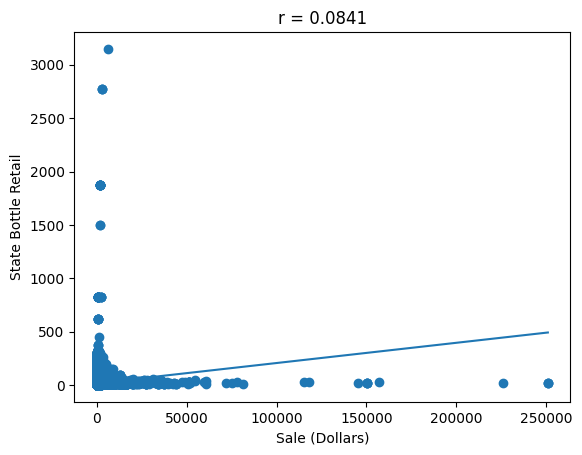

In [ ]:
plot_scatter_quan('Sale (Dollars)','State Bottle Retail',max(chunk['Sale (Dollars)']))

The relationship between State bottle retail and Sale in dollars is similar to the one analyzed between state bottle cost and Sale in dollars

##### Sale (Dollars) - > Pack

y=12.127 +-0.0*x


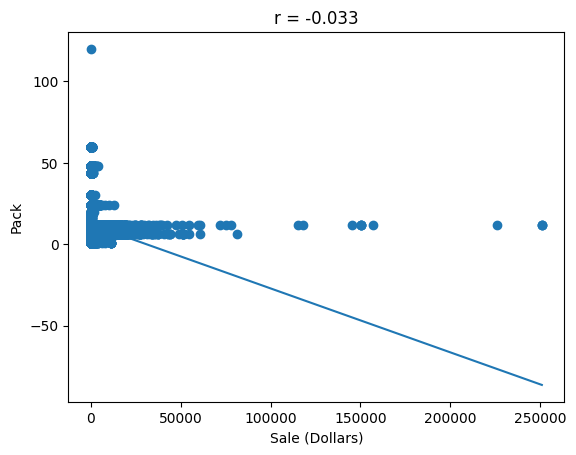

In [ ]:
plot_scatter_quan('Sale (Dollars)','Pack',max(chunk['Sale (Dollars)']))

There seems that the relationship between Sale in dollars and Pack is not linear as r is equal to -0.033

##### Bottles Sold -> state bottle retail

y=16.896 +-0.023*x


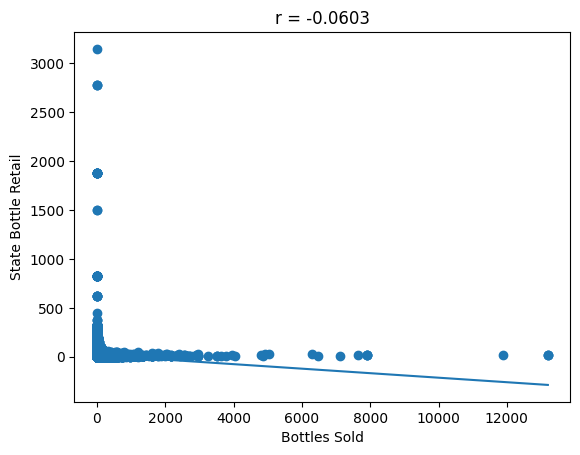

In [ ]:
plot_scatter_quan('Bottles Sold','State Bottle Retail',max(chunk['Bottles Sold']))

The relationship between State bottle retail and Bottles sold is not linear. But it seems to be negative and non linear. As sales of more than 2000 dollars have state bottle retail near to zero while somesales of a few bottles sold have a state retail higher than 500

##### bottles sold -> state bottle cost

y=11.263 +-0.015*x


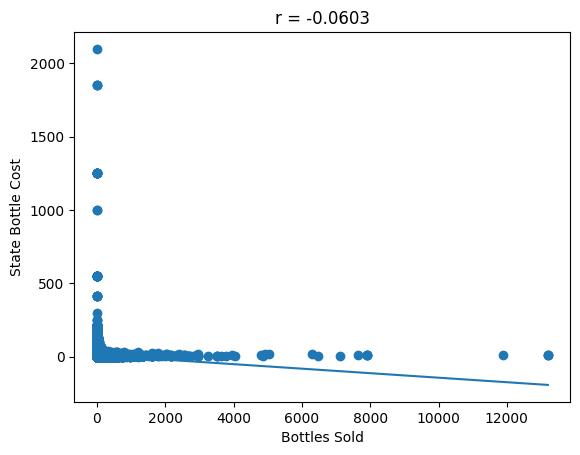

In [ ]:
plot_scatter_quan('Bottles Sold','State Bottle Cost',max(chunk['Bottles Sold']))

The relationship between state bottle cost and bottle sold seems to be similar to the relationship between state bottle retail and bottles sold

##### bottles sold -> pack

y=11.674 +0.033*x


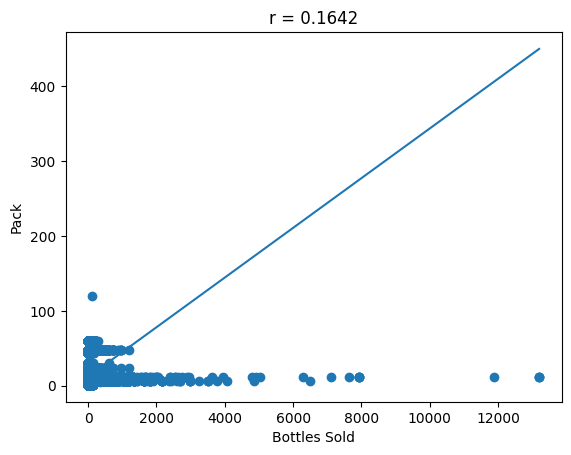

In [ ]:
plot_scatter_quan('Bottles Sold','Pack',max(chunk['Bottles Sold']))

As r is equal to 0.16 it seems that the relationship between pack and bottles sold is not strong, but in general is a positive relationship. It seems that sales of more than 2000 bottles sold need a pack close to 0

##### state bottle retail -> state bottle cost

y=-0.001 +0.667*x


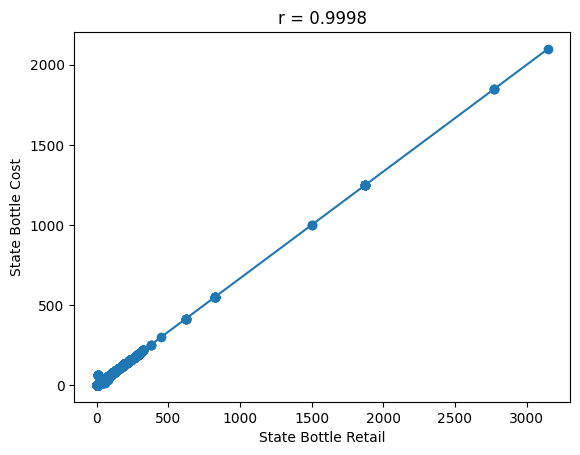

In [ ]:
plot_scatter_quan('State Bottle Retail','State Bottle Cost',max(chunk['State Bottle Retail']))

This is probably the strongest relationship Q-Q in the dataset as r is equal to 0.99. So the relationship is linear and positive.

Each dollar of State bottle retail represents 0.67 State bottle cost. So the state bottle retail is 150% higher than the cost

##### state bottle retail -> pack


y=15.106 +-0.183*x


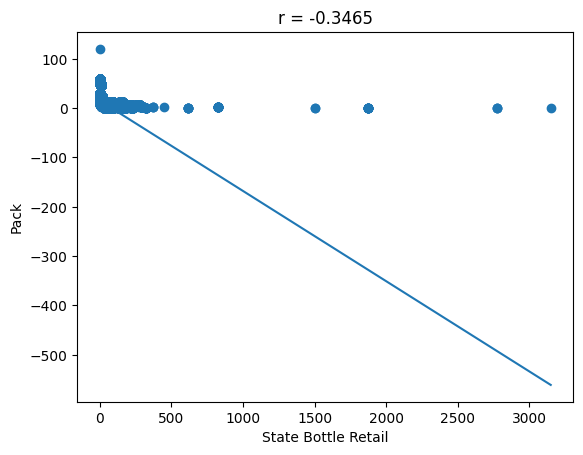

In [ ]:
plot_scatter_quan('State Bottle Retail','Pack',max(chunk['State Bottle Retail']))


There is not a linear relationship between state bottle retail and pack. It is interest that Higher state bottle retail sales need near-to-zero pack. while some sales near to 0 state bottle retail need more pack. So it seems that there could be a negative non-linear relationship

## 2 - Hypothesis Testing


### 2.1 Point Estimate and Intervals

Let¨s recall an interesting relationship in the dataset to propose some point estimate and intervals

In [ ]:
cat_city = two_way_table('Category Name','City',category_s,city_s,15)
cat_city.head(25)


DES MOINES  CEDAR RAPIDS  DAVENPORT  \
Category Name                                                      
AMERICAN VODKAS                 24299.0       18658.0    12019.0   
CANADIAN WHISKIES               12303.0       10127.0     5492.0   
STRAIGHT BOURBON WHISKIES        9581.0        8178.0     4913.0   
WHISKEY LIQUEUR                  8315.0        6597.0     4417.0   
AMERICAN FLAVORED VODKA          9049.0        5737.0     3652.0   
BLENDED WHISKIES                 5849.0        4997.0     4474.0   
SPICED RUM                       5221.0        5588.0     2550.0   
COCKTAILS /RTD                   3241.0        4166.0     2881.0   
AMERICAN SCHNAPPS                3909.0        3294.0     2925.0   
100% AGAVE TEQUILA               8248.0        4808.0     3351.0   
IMPORTED VODKAS                  5868.0        4551.0     2602.0   
TENNESSEE WHISKIES               4616.0        3276.0     2167.0   
AMERICAN BRANDIES                5872.0        3650.0     3446.0   
FLAVORED RUM                     3031.0        2841.0     1683.0   
AMERICAN CORDIALS & LIQUEUR      3139.0        2717.0     2026.0   
total_                         161536.0      124582.0    81935.0   

                             WEST DES MOINES  SIOUX CITY  WATERLOO  \
Category Name                                                        
AMERICAN VODKAS                       9664.0      8015.0    8090.0   
CANADIAN WHISKIES                     4669.0      5841.0    4783.0   
STRAIGHT BOURBON WHISKIES             5312.0      3872.0    2956.0   
WHISKEY LIQUEUR                       3092.0      3883.0    2371.0   
AMERICAN FLAVORED VODKA               3161.0      3486.0    2422.0   
BLENDED WHISKIES                      1956.0      2440.0    2455.0   
SPICED RUM                            2290.0      2543.0    1877.0   
COCKTAILS /RTD                        2497.0      1911.0    1998.0   
AMERICAN SCHNAPPS                     1034.0      2029.0    1600.0   
100% AGAVE TEQUILA                    2281.0      2381.0    2890.0   
IMPORTED VODKAS                       2496.0      1914.0    2242.0   
TENNESSEE WHISKIES                    1811.0      1876.0    1425.0   
AMERICAN BRANDIES                     1079.0      1724.0    3885.0   
FLAVORED RUM                          1226.0      1624.0    1137.0   
AMERICAN CORDIALS & LIQUEUR           1107.0      1967.0    1243.0   
total_                               62332.0     61542.0   59129.0   

                             COUNCIL BLUFFS     AMES  DUBUQUE  IOWA CITY  \
Category Name                                                              
AMERICAN VODKAS                      7922.0   6255.0   6908.0     7531.0   
CANADIAN WHISKIES                    4263.0   3801.0   3603.0     3155.0   
STRAIGHT BOURBON WHISKIES            4533.0   4203.0   3568.0     3871.0   
WHISKEY LIQUEUR                      4134.0   1846.0   2415.0     1815.0   
AMERICAN FLAVORED VODKA              2785.0   2958.0   2257.0     2976.0   
BLENDED WHISKIES                     3048.0   1634.0   2661.0     1530.0   
SPICED RUM                           2616.0   1864.0   1883.0     1673.0   
COCKTAILS /RTD                       1575.0   1740.0   1672.0     1570.0   
AMERICAN SCHNAPPS                    2685.0   1535.0   1357.0      935.0   
100% AGAVE TEQUILA                   1585.0   1692.0   1587.0     1913.0   
IMPORTED VODKAS                      1727.0   1511.0   1560.0     1714.0   
TENNESSEE WHISKIES                   2189.0   1135.0   1207.0     1077.0   
AMERICAN BRANDIES                    1340.0   1082.0   1579.0     1225.0   
FLAVORED RUM                         1112.0   1426.0   1218.0     1044.0   
AMERICAN CORDIALS & LIQUEUR          2112.0   1196.0   1340.0      850.0   
total_                              57508.0  49141.0  48571.0    48155.0   

                             CEDAR FALLS   ANKENY  CORALVILLE  MASON CITY  \
Category Name                                                               
AMERICAN VODKAS     

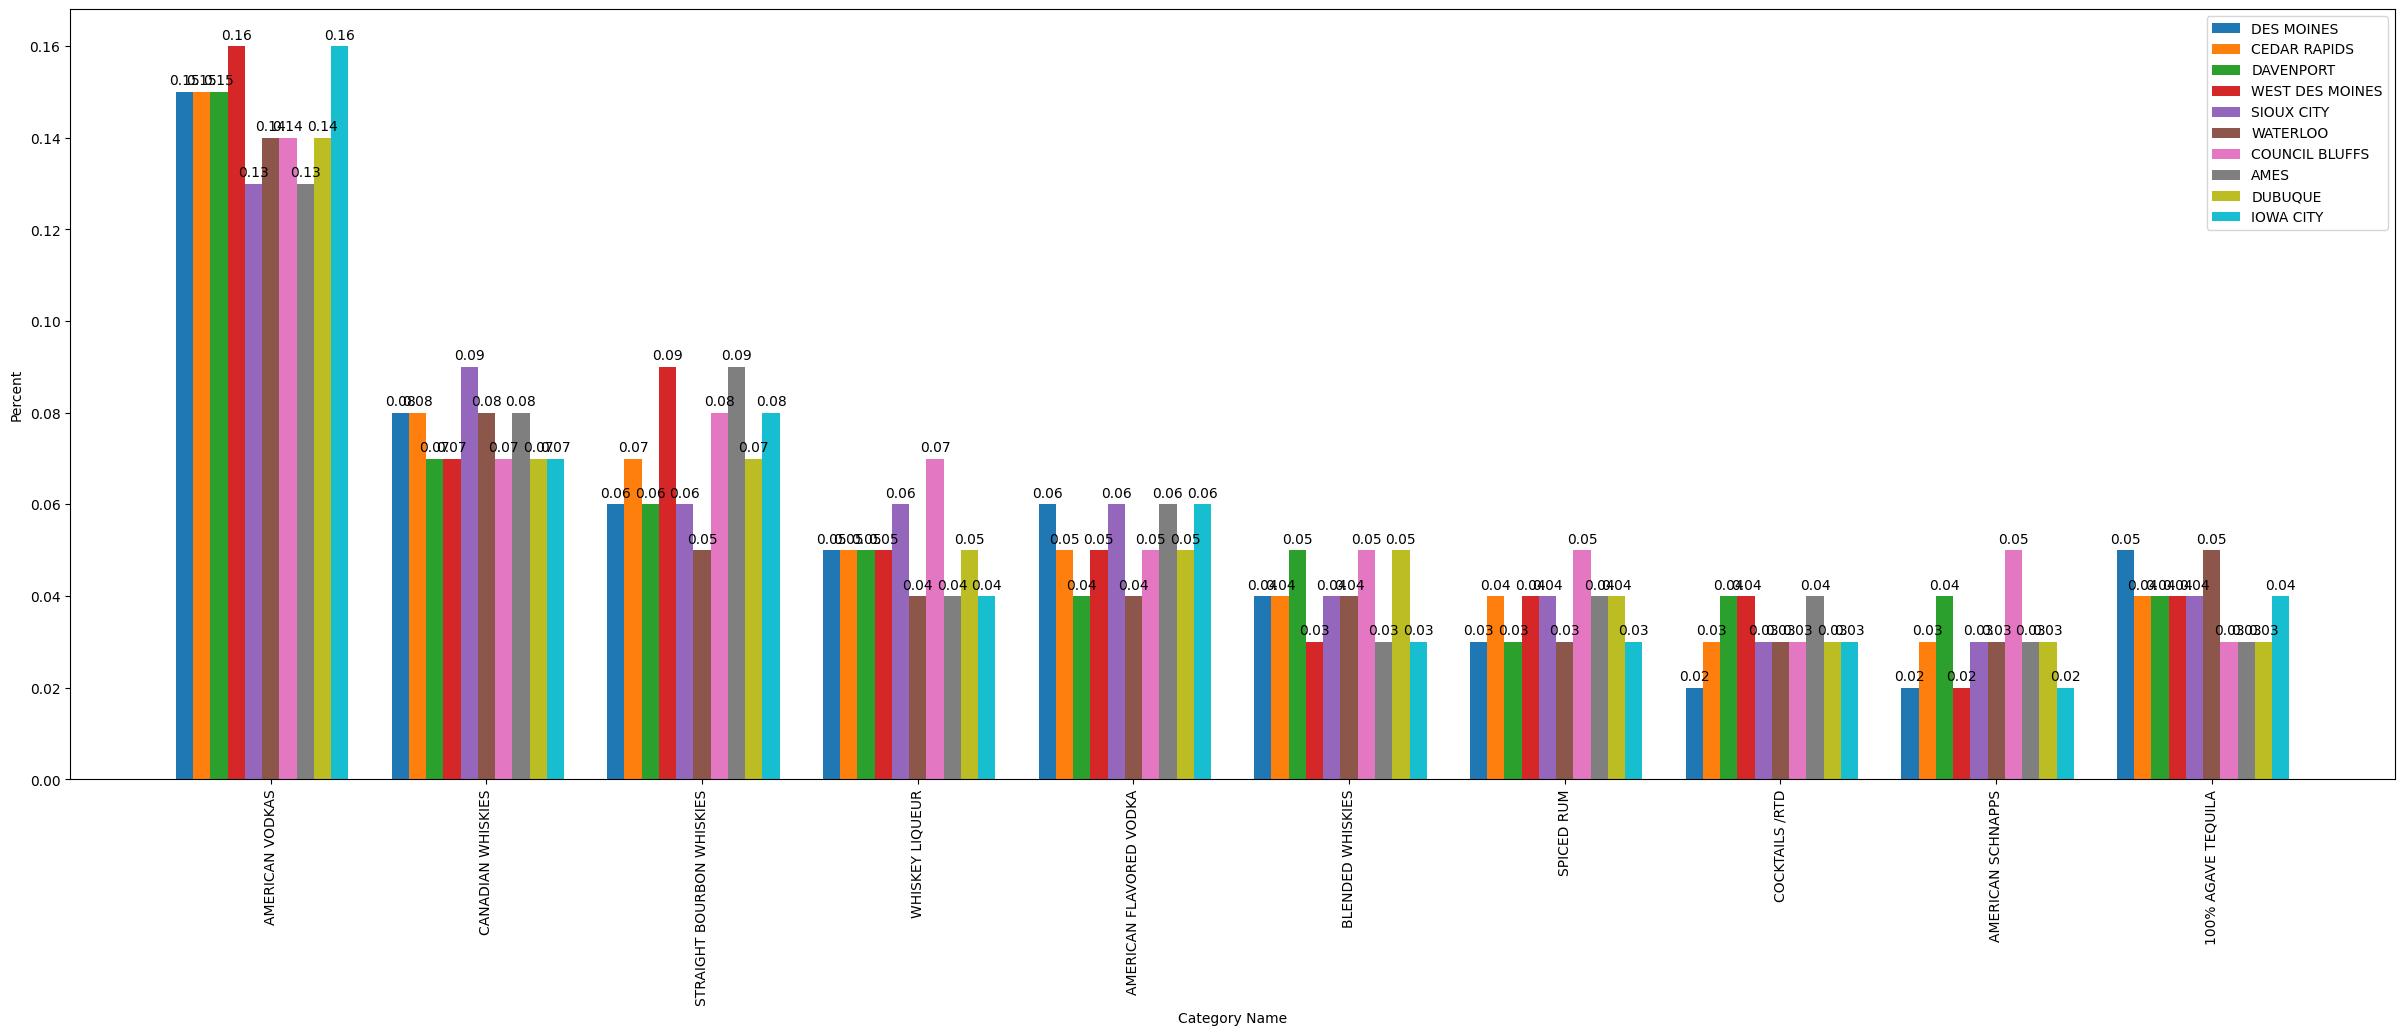

In [ ]:
double_bar_chart('Category Name',category_s,city_s,cat_city)

#### What is the point of estimate of the Category Name of liquor given a city?

to calculate the percentage share of a category given a city, I have to divide the each liquor category sold in a city by the total number of orders in a city. From the privious table, for example, the point estimate of American Vodkas in Des Moines is 24299/161536.

In [ ]:
cat_city_pointest = cat_city.divide(cat_city.iloc[-1])
cat_city_pointest.head(25)

DES MOINES  CEDAR RAPIDS  DAVENPORT  \
Category Name                                                      
AMERICAN VODKAS                0.150425      0.149765   0.146689   
CANADIAN WHISKIES              0.076163      0.081288   0.067029   
STRAIGHT BOURBON WHISKIES      0.059312      0.065644   0.059962   
WHISKEY LIQUEUR                0.051475      0.052953   0.053909   
AMERICAN FLAVORED VODKA        0.056018      0.046050   0.044572   
BLENDED WHISKIES               0.036209      0.040110   0.054604   
SPICED RUM                     0.032321      0.044854   0.031122   
COCKTAILS /RTD                 0.020064      0.033440   0.035162   
AMERICAN SCHNAPPS              0.024199      0.026440   0.035699   
100% AGAVE TEQUILA             0.051060      0.038593   0.040898   
IMPORTED VODKAS                0.036326      0.036530   0.031757   
TENNESSEE WHISKIES             0.028576      0.026296   0.026448   
AMERICAN BRANDIES              0.036351      0.029298   0.042058   
FLAVORED RUM                   0.018764      0.022804   0.020541   
AMERICAN CORDIALS & LIQUEUR    0.019432      0.021809   0.024727   
total_                         1.000000      1.000000   1.000000   

                             WEST DES MOINES  SIOUX CITY  WATERLOO  \
Category Name                                                        
AMERICAN VODKAS                     0.155041    0.130236  0.136819   
CANADIAN WHISKIES                   0.074905    0.094911  0.080891   
STRAIGHT BOURBON WHISKIES           0.085221    0.062916  0.049992   
WHISKEY LIQUEUR                     0.049605    0.063095  0.040099   
AMERICAN FLAVORED VODKA             0.050712    0.056644  0.040961   
BLENDED WHISKIES                    0.031380    0.039648  0.041519   
SPICED RUM                          0.036739    0.041321  0.031744   
COCKTAILS /RTD                      0.040060    0.031052  0.033791   
AMERICAN SCHNAPPS                   0.016589    0.032969  0.027059   
100% AGAVE TEQUILA                  0.036594    0.038689  0.048876   
IMPORTED VODKAS                     0.040044    0.031101  0.037917   
TENNESSEE WHISKIES                  0.029054    0.030483  0.024100   
AMERICAN BRANDIES                   0.017311    0.028013  0.065704   
FLAVORED RUM                        0.019669    0.026388  0.019229   
AMERICAN CORDIALS & LIQUEUR         0.017760    0.031962  0.021022   
total_                              1.000000    1.000000  1.000000   

                             COUNCIL BLUFFS      AMES   DUBUQUE  IOWA CITY  \
Category Name                                                                
AMERICAN VODKAS                    0.137755  0.127287  0.142225   0.156391   
CANADIAN WHISKIES                  0.074129  0.077349  0.074180   0.065518   
STRAIGHT BOURBON WHISKIES          0.078824  0.085529  0.073459   0.080386   
WHISKEY LIQUEUR                    0.071886  0.037565  0.049721   0.037691   
AMERICAN FLAVORED VODKA            0.048428  0.060194  0.046468   0.061800   
BLENDED WHISKIES                   0.053001  0.033251  0.054786   0.031772   
SPICED RUM                         0.045489  0.037932  0.038768   0.034742   
COCKTAILS /RTD                     0.027387  0.035408  0.034424   0.032603   
AMERICAN SCHNAPPS                  0.046689  0.031237  0.027938   0.019416   
100% AGAVE TEQUILA                 0.027561  0.034432  0.032674   0.039726   
IMPORTED VODKAS                    0.030031  0.030748  0.032118   0.035593   
TENNESSEE WHISKIES                 0.038064  0.023097  0.024850   0.022365   
AMERICAN BRANDIES                  0.023301  0.022018  0.032509   0.025439   
FLAVORED RUM                       0.019336  0.029019  0.025077   0.021680   
AMERICAN CORDIALS & LIQUEUR        0.036725  0.024338  0.027588   0.017651   
total_                             1.000000  1.000000  1.000000   1.000000   

                             CEDAR FALLS    ANKENY  CORALVILLE  MASON CITY  \
Category Name                                               

#### What is the 95% confidence interval for the proportion of American Vodkas that are sold in West Des Moines

In [ ]:
p_ame_wdm = cat_city_pointest['WEST DES MOINES'].loc['AMERICAN VODKAS']
print(p_ame_wdm)

0.15504074953474942


In [ ]:
#confidence interval 95%
def inter_p(p,z,n):
  conf = (p-z*(p*(1-p)/n)**0.5,p + z*(p*(1-p)/n)**0.5)
  return conf

conf_ame_wdm = inter_p(p_ame_wdm,2,62332)
print(conf_ame_wdm)

(0.15214130185231933, 0.1579401972171795)


The 95% interval of confidence for the proportion of American Vodkas that are sold in West Des Moines is (15.21%,15.79%)

#### What is the 95% confidence intherval for the proportion of Canadian Whiskies sold inSioux City

In [ ]:
p_can_sio = cat_city_pointest['SIOUX CITY'].loc['CANADIAN WHISKIES']

In [ ]:
 conf_can_sio = inter_p(p_can_sio,2,cat_city['SIOUX CITY'].iloc[-1])
 print(conf_can_sio)

(0.09254787987782602, 0.0972737053810216)


#### What is the 95% confidence interval for the proportion of Straight Burboun whiskies that are sold in Ames city

In [ ]:
p_str_ame = cat_city_pointest['AMES'].loc['STRAIGHT BOURBON WHISKIES']
conf_can_sio = inter_p(p_str_ame,2,cat_city['AMES'].iloc[-1])
print(conf_can_sio)

(0.08300620139880546, 0.08805258861360779)


#### What is the 95% confidence interval for the proportion of Whisky Liquour that are sold in Council Bluffs city

In [ ]:
p_wli_blu = cat_city_pointest['COUNCIL BLUFFS'].loc['WHISKEY LIQUEUR']
conf_wli_blu = inter_p(p_wli_blu,2,cat_city['COUNCIL BLUFFS'].iloc[-1])
print(conf_wli_blu)


(0.06973144231026107, 0.07403985907389418)


#### What is the 95% interval for the proportion of American Flavor Vodka sold in Des Moines City

In [ ]:
p_afl_dmc = cat_city_pointest['DES MOINES'].loc['AMERICAN FLAVORED VODKA']
conf_wli_blu = inter_p(p_afl_dmc,2,cat_city['DES MOINES'].iloc[-1])
print(conf_wli_blu)

(0.05487416524495852, 0.057162780079922614)


### 2.3 hypothesis testing

Let¨s explore and test some interesting hypothesis from the city-Category relationship

### Situation 1
Radio Iowa believes that in Des Moines city, more than 5.6% of the liquor orders include American Flavor Vodka. They took a sample of 100 orders in Des Moines and found out that 11 orders included Flavor Vodka

Ho: (p = 5.6%)

Ha: (p > 5.6%)

In [ ]:
#possible values of the sample proportion follows a normal distributionas long as np >=10 and n(1-p)>=10
c_1 = 100*0.056
print(c_1)

5.6000000000000005


as np is less than 10%, then the data gathered by Radio Iowa don't meet the criteria

### Situation 2
Radio Iowa also believes that the proportion of American Vodkas sold in orders of Est Des Moines city is shorter than 15.5%. They gathered 500 orders of liquor in Des Moines City and found out that 53 orders included American Vodkas.



Ho: p = 15.5%

Ha: p < 15.5


In [ ]:
#possible values of the sample proportion follows a normal distributionas long as np >=10 and n(1-p)>=10
c_2 = 500*0.155
c_3 = 500*(1-0.155)

print(c_2,c_3)


77.5 422.5


The data gathered by Radio Iowa meets the criteria to conduct the test

In [ ]:
# sample proportion
p_rio_afv_dmc = 53/500
print(p_rio_afv_dmc)

0.106


In [ ]:
#Test statistics
z_st = (p_rio_afv_dmc - 0.155)/np.sqrt((0.155*(1-0.155))/500)
print(z_st)

-3.0275190089401884


Assuming that Ho is true, the sample proportion p_rio_afv_dmc is 3.03 standard deviations below the null value (p=15.5%)

In this case, Ha:

In this case Ha : $$ pvalue = p<p_0 : P(Z<z) $$

In [ ]:
#finding the p value of the test
p_value_sit2 = st.norm.cdf(z_st)
print(p_value_sit2)

0.0012328510285182165


Conclusion: As the p_value is less than common used significance level 0.05, we have enough evidence to reject Ho and accept Ha. Therefore, the proportion of American Flavored Vodkas sold in Des Moines City is lesser than 15.5%

### Situation 3

The Sioux City Mayor's office believe that in their city, Canadian Whiskies proportion in liquor orders is higher than 9.5%. They gather information 1000 samples of liquor orders and found out that 104 orders included Canadian Whiskies

Ho: p = 9.5%
Ha: p > 9.5%

In [ ]:
#possible values of the sample proportion follows a normal distributionas long as np >=10 and n(1-p)>=10
c_4 = 1000*0.095
c_5 = 1000*(1-0.095)

print(c_4,c_5)

95.0 905.0


The data gathered by the Major's office meet the criteria to conduct the test

In [ ]:
# sample proportion
p_cwk_sio = 104/1000
print(p_cwk_sio)

0.104


In [ ]:
#Test statistics
z_st_ = (p_cwk_sio - 0.095)/np.sqrt((0.095*(1-0.095))/1000)
print(z_st_)

0.9706360499066096


If Ho is true, the sample proportion p_cwk_sio is 0.97 standard deviations above the null value p = 9.5%

In this case Ha : $$ pvalue = p>p_0 : P(z<Z) $$

In [ ]:
#finding the p value of the test
p_value_sit3 = 1 - st.norm.cdf(z_st_)
print(p_value_sit3)

0.16586477374036557


Conclusion: As 16.58% > 5%, there is no enough evidence to reject Ho and accept Ha. Therefore, Canadian Whiskies proportion in Sioux city orders is 9.5%

## 3. Recommendations

- The Government of Iowa could deploy some marketing strategies to make whiskey liquor, blended whiskies, and straight bourbon Whiskey as famous as Canadian Whiskies. Eventhough they are close in the marketshare, the fact that people looking for a Whiskey select Canadian whiskies mostly demonstrates that there is a lack of marketing strategies from other kind of whiskies.


- As American Vodkas and American Flavored Vodkas represent more than 20% of the liquor sales in the state state and their  percentage of alcohol is around 40%, it would be important to make some commercials about the responsible consumption of this liquor.


- It would be important to make an annalysis of the individual sales of liquor that are above 300 dollars per sale (This value is the outliers starting point for some liquors). Those big sales outliers could represent a big purchasing made from bars, or restaurants; that will resell the liquor. Maybe to by more than 300 dollars in liquor, the buyer should demonstrate some certificates or the commercial intencion of the purchase.